# **Projeto House Prices**

## **Importação das bibliotecas que serão usadas no projeto**

In [14]:
# importações da biblioteca
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
import lightgbm as lgb

from boruta import BorutaPy

import warnings
warnings.filterwarnings("ignore")

## **Importação dos dados em que iremos trabalhar**

In [15]:
train_df = pd.read_csv('https://raw.githubusercontent.com/jherfson/pratica_House_Prices/refs/heads/main/dados/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/jherfson/pratica_House_Prices/refs/heads/main/dados/train.csv')

## **Juntar os dados de trinamento e  os dados  de  teste**

In [16]:
df_completo = pd.concat((train_df.loc[:, :], test_df.loc[:, :]))
df_completo.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## **Informações sobre os tipos de dados, os dados faltantes e os que tem outliers**

In [17]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2920 non-null   int64  
 1   MSSubClass     2920 non-null   int64  
 2   MSZoning       2920 non-null   object 
 3   LotFrontage    2402 non-null   float64
 4   LotArea        2920 non-null   int64  
 5   Street         2920 non-null   object 
 6   Alley          182 non-null    object 
 7   LotShape       2920 non-null   object 
 8   LandContour    2920 non-null   object 
 9   Utilities      2920 non-null   object 
 10  LotConfig      2920 non-null   object 
 11  LandSlope      2920 non-null   object 
 12  Neighborhood   2920 non-null   object 
 13  Condition1     2920 non-null   object 
 14  Condition2     2920 non-null   object 
 15  BldgType       2920 non-null   object 
 16  HouseStyle     2920 non-null   object 
 17  OverallQual    2920 non-null   int64  
 18  OverallCond  

In [18]:
contagem = df_completo.isnull().sum()
contagem[contagem > 0]

LotFrontage      518
Alley           2738
MasVnrType      1744
MasVnrArea        16
BsmtQual          74
BsmtCond          74
BsmtExposure      76
BsmtFinType1      74
BsmtFinType2      76
Electrical         2
FireplaceQu     1380
GarageType       162
GarageYrBlt      162
GarageFinish     162
GarageQual       162
GarageCond       162
PoolQC          2906
Fence           2358
MiscFeature     2812
dtype: int64

### **Removendo a coluna _Id_**

In [19]:
df_completo.drop('Id', axis=1, inplace=True)

## **Separando os dados dos tipo _number_ do tipo _object_**

In [20]:
numeral_colunas = df_completo.select_dtypes(include=['number', 'int64', 'float64']).columns.to_list()

object_colunas = df_completo.select_dtypes(include=['object']).columns.tolist()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSSubClass
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação MSSubClass: None
variações das MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
dados faltantes MSSubClass: 0


<Figure size 1000x600 with 0 Axes>

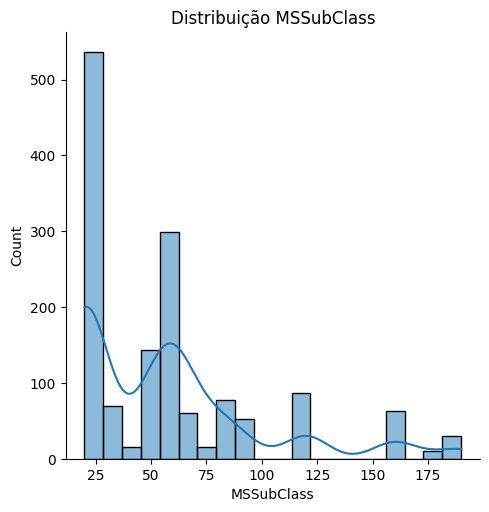

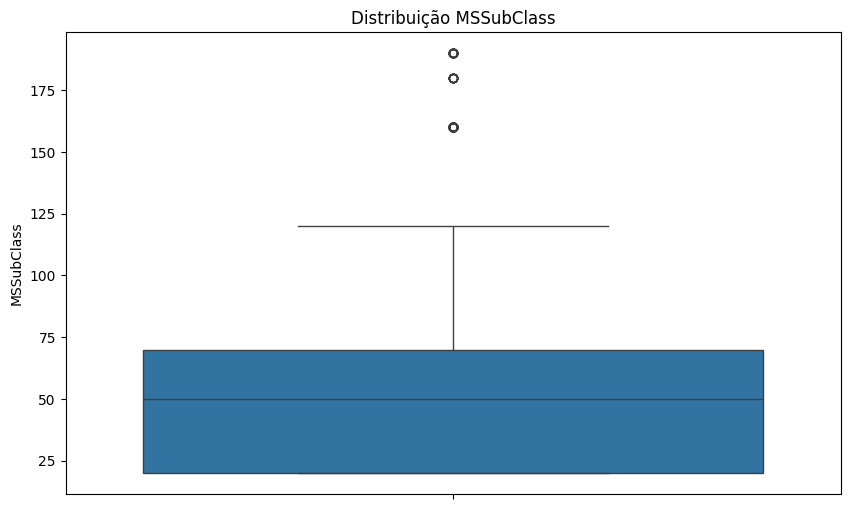

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
informação LotFrontage: None
variações das LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
dados faltantes LotFrontage: 259


<Figure size 1000x600 with 0 Axes>

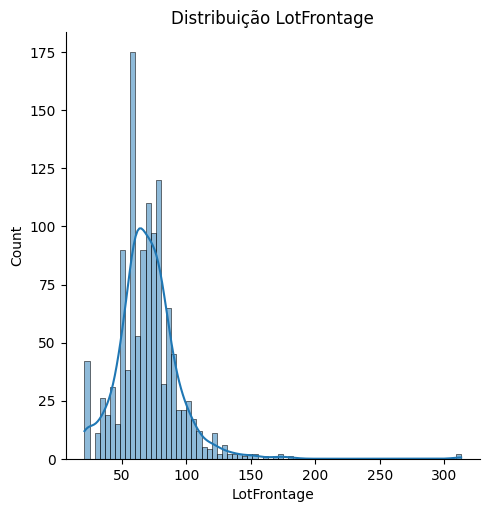

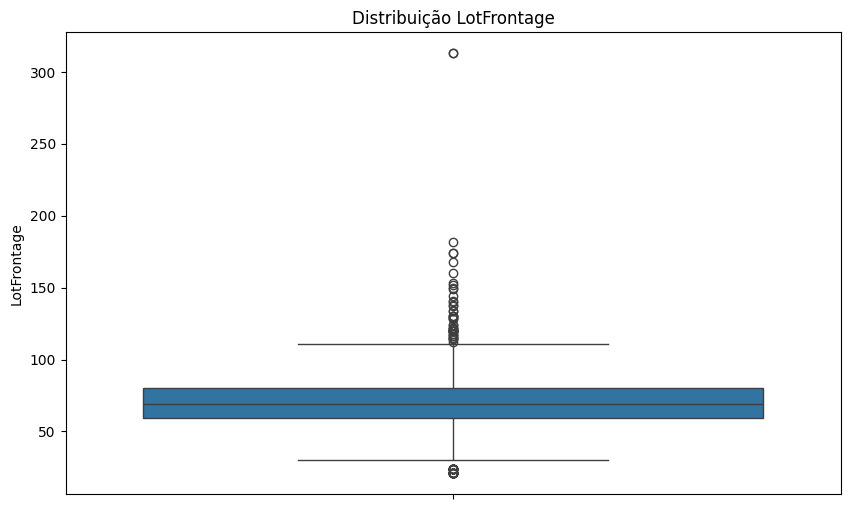

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação LotArea: None
variações das LotArea: [ 8450  9600 11250 ... 17217 13175  9717]
dados faltantes LotArea: 0


<Figure size 1000x600 with 0 Axes>

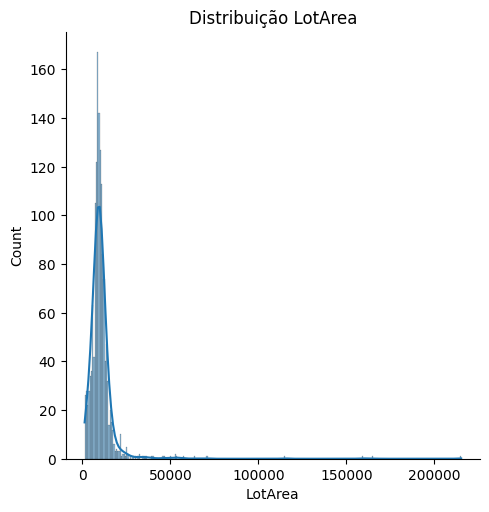

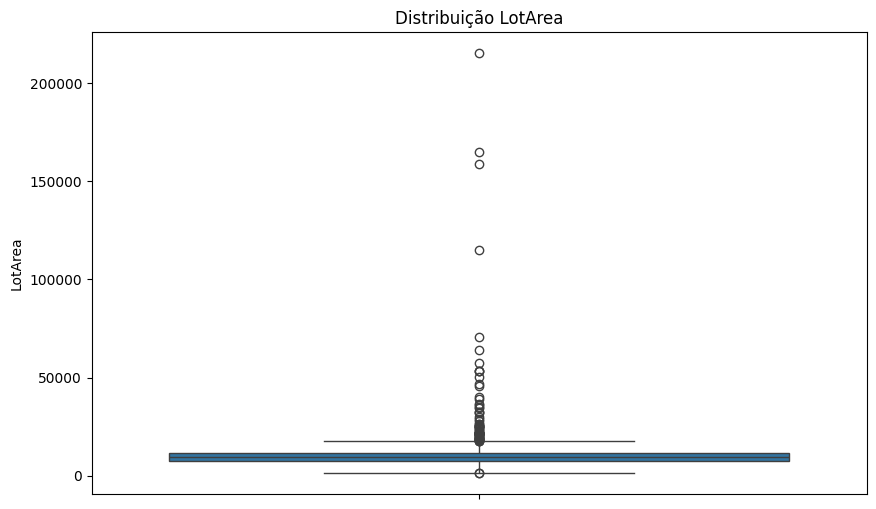

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: OverallQual
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação OverallQual: None
variações das OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
dados faltantes OverallQual: 0


<Figure size 1000x600 with 0 Axes>

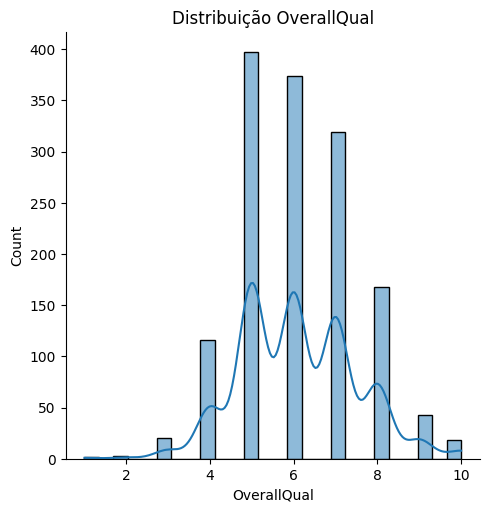

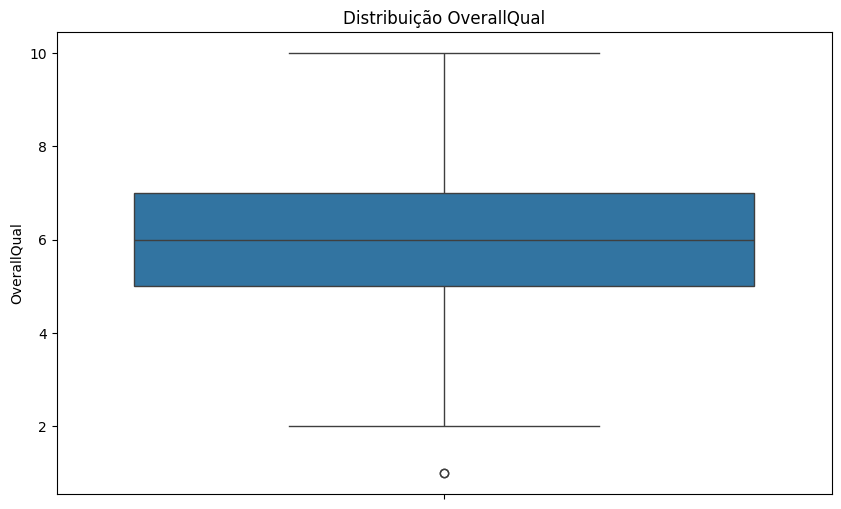

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: OverallCond
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação OverallCond: None
variações das OverallCond: [5 8 6 7 4 2 3 9 1]
dados faltantes OverallCond: 0


<Figure size 1000x600 with 0 Axes>

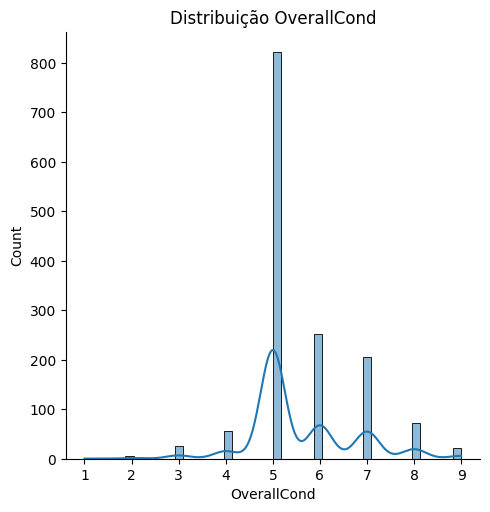

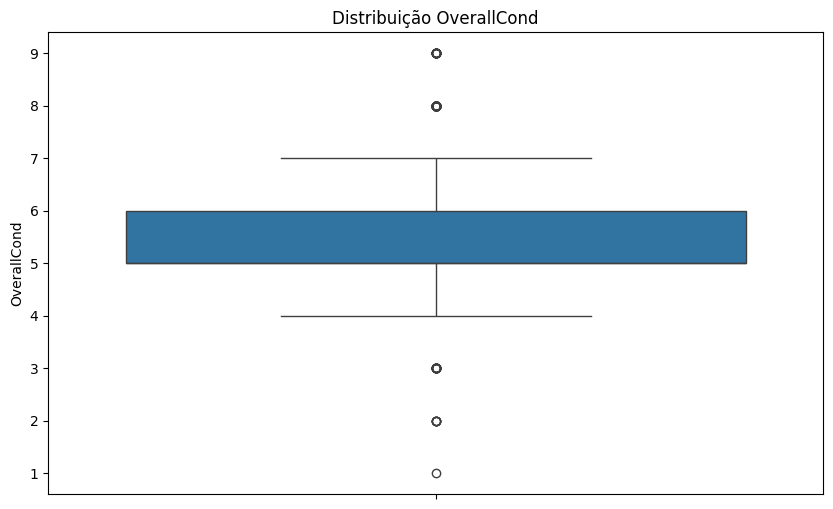

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: YearBuilt
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação YearBuilt: None
variações das YearBuilt: [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
dados faltantes YearBuilt: 0


<Figure size 1000x600 with 0 Axes>

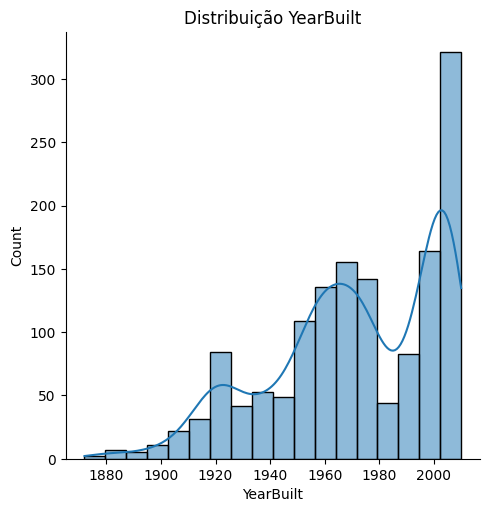

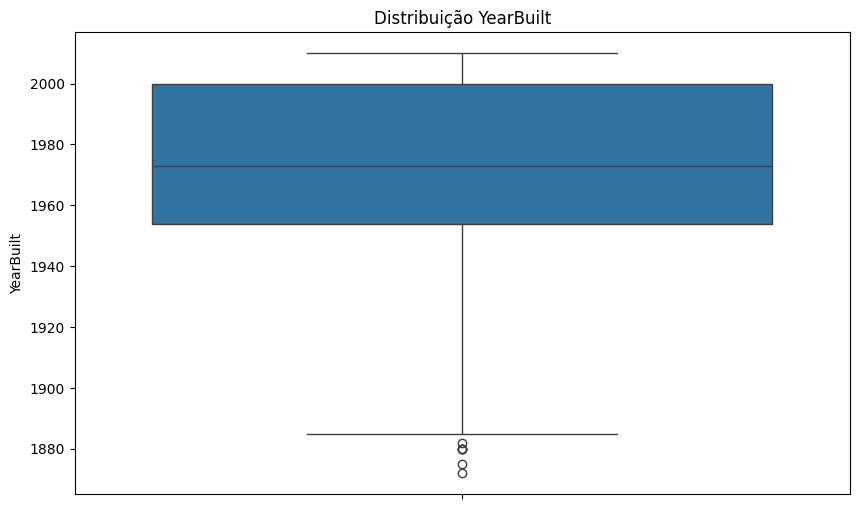

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: YearRemodAdd
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação YearRemodAdd: None
variações das YearRemodAdd: [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
dados faltantes YearRemodAdd: 0


<Figure size 1000x600 with 0 Axes>

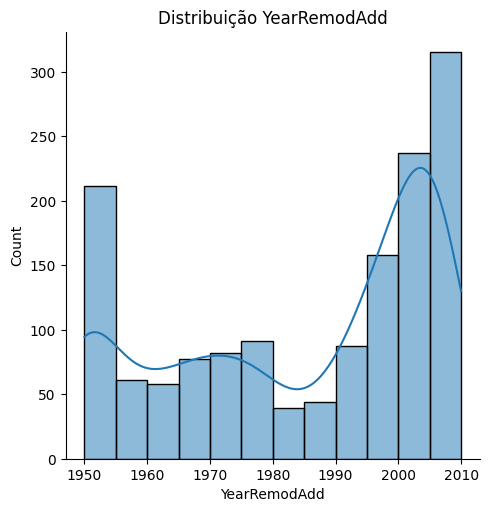

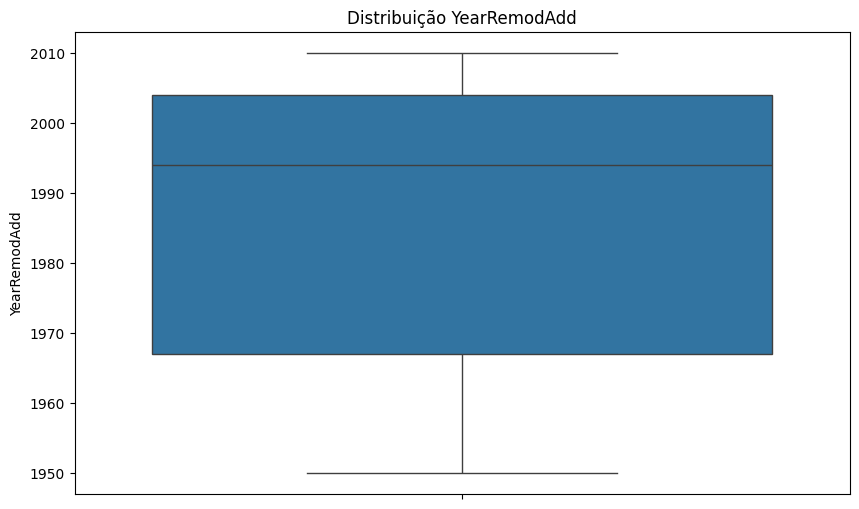

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
informação MasVnrArea: None
variações das MasVnrArea: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e

<Figure size 1000x600 with 0 Axes>

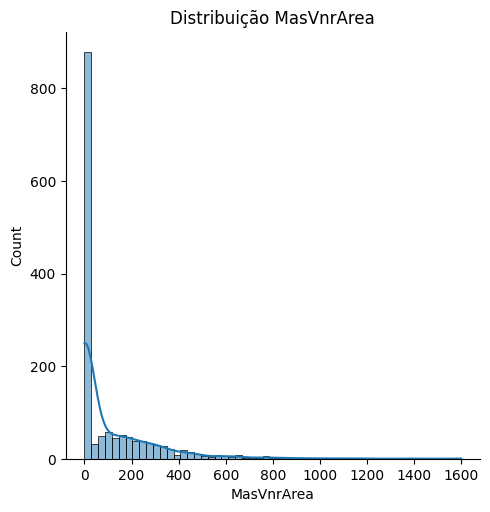

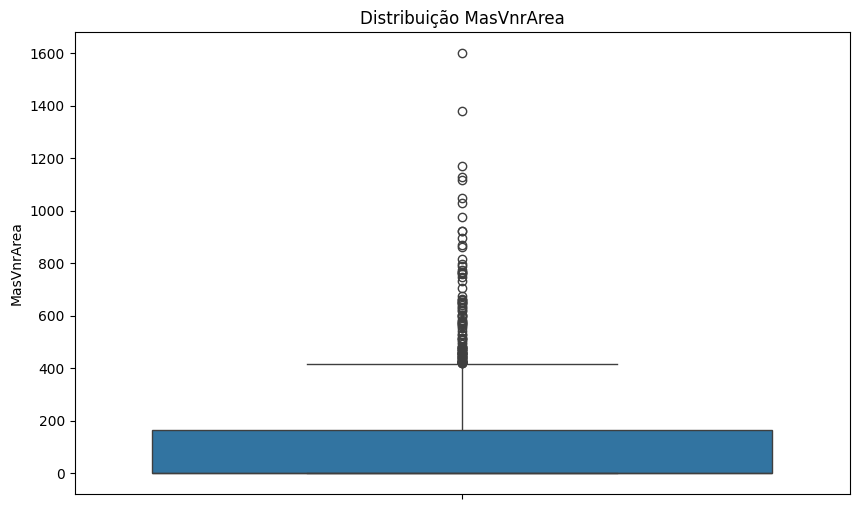

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtFinSF1
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação BsmtFinSF1: None
variações das BsmtFinSF1: [ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  731  643  967
  747  280  179  456 1351   24  763  182  104 1810  384  490  649  632
  941  739  912 1013  603 1880  565  320  462  228  336  448 1201   33
  588  600  713 1046  648  310 1162  520  108  569 1200  224  705  444
  250  984   35  774  419  170 1470  938  570  300  120  116  512  567
  445  695  405 1005  668  821  432 1300  507  679 1332  209  680  716
 1400  416  429  222   57  660 1016  370  351  379 1288  360  639  495
  288 1398  477  831 1904  436  352  611 1086  297  626  560  390  566
 1126 1036 1088  641  617  662  312 1065  787  468   36  822  378  946
  341   16  550  524   56  321  842

<Figure size 1000x600 with 0 Axes>

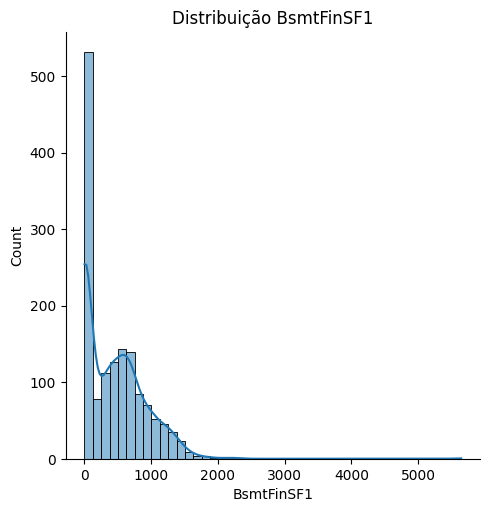

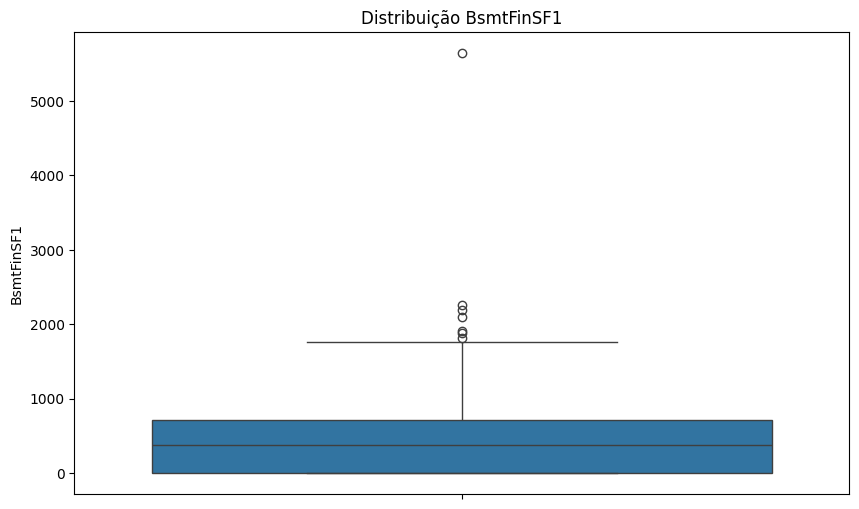

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtFinSF2
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação BsmtFinSF2: None
variações das BsmtFinSF2: [   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029]
dados faltant

<Figure size 1000x600 with 0 Axes>

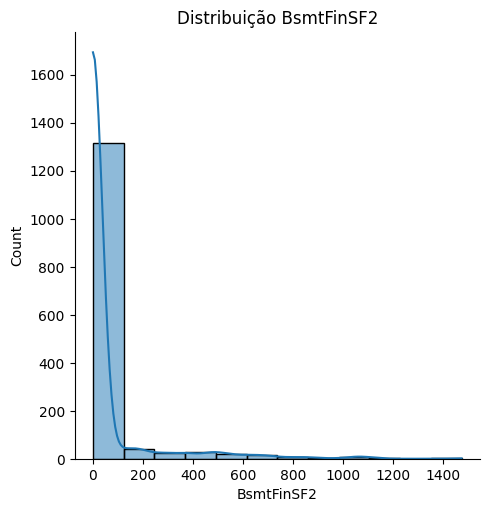

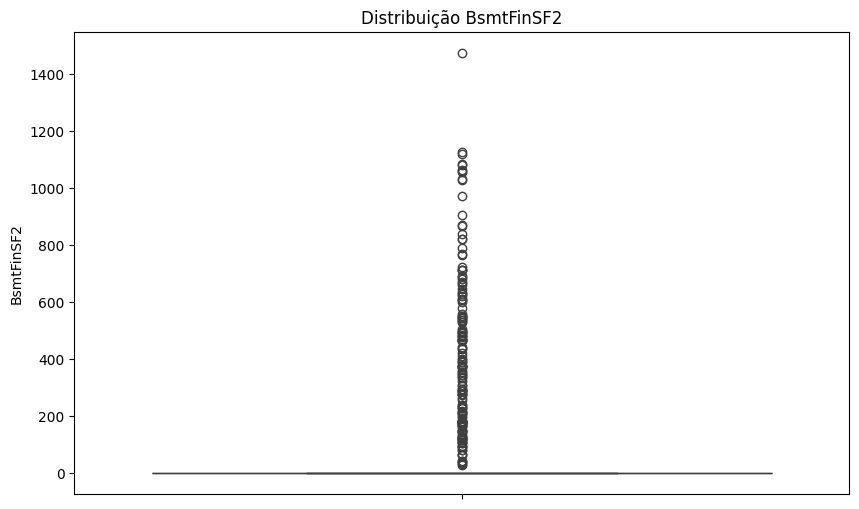

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtUnfSF
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação BsmtUnfSF: None
variações das BsmtUnfSF: [ 150  284  434  540  490   64  317  216  952  140  134  177  175 1494
  520  832  426    0  468  525 1158  637 1777  200  204 1566  180  486
  207  649 1228 1234  380  408 1117 1097   84  326  445  383  167  465
 1296   83 1632  736  192  612  816   32  935  321  860 1410  148  217
  530 1346  576  318 1143 1035  440  747  701  343  280  404  840  724
  295 1768  448   36 1530 1065  384 1288  684 1013  402  635  163  168
  176  370  350  381  410  741 1226 1053  641  516  793 1139  550  905
  104  310  252 1125  203  728  732  510  899 1362   30  958  556  413
  479  297  658  262  891 1304  519 1907  336  107  432  403  811  396
  970  506  884  400  896  253  409   93 1200  572  774  769 1335  340
  882  779  112  470  294 1686  360  4

<Figure size 1000x600 with 0 Axes>

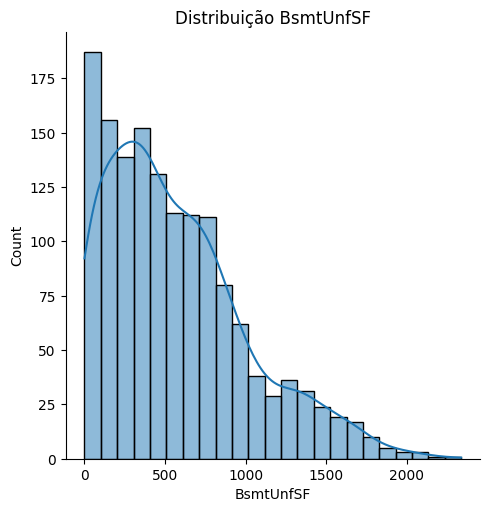

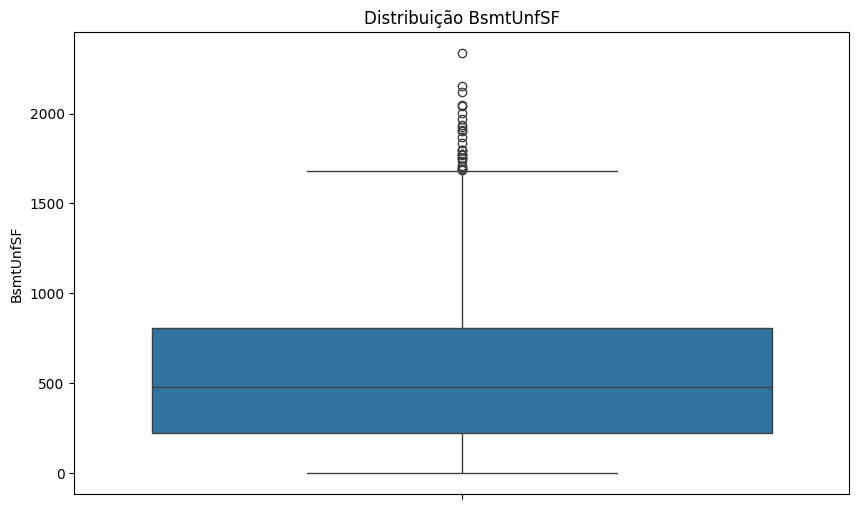

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: TotalBsmtSF
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação TotalBsmtSF: None
variações das TotalBsmtSF: [ 856 1262  920  756 1145  796 1686 1107  952  991 1040 1175  912 1494
 1253  832 1004    0 1114 1029 1158  637 1777 1060 1566  900 1704 1484
  520  649 1228 1234 1398 1561 1117 1097 1297 1057 1088 1350  840  938
 1150 1752 1434 1656  736  955  794  816 1842  384 1425  970  860 1410
  780  530 1370  576 1143 1947 1453  747 1304 2223  845 1086  462  672
 1768  440  896 1237 1563 1065 1288  684  612 1013  990 1235  876 1214
  824  680 1588  960  458  950 1610  741 1226 1053  641  789  793 1844
  994 1264 1809 1028  729 1092 1125 1673  728  732 1080 1199 1362 1078
  660 1008  924  992 1063 1267 1461 1907  928  864 1734  910 1490 1728
  715  884  969 1710  825 1602 1200  572  774 1392 1232 1572 1541  882
 1149  644 1617 1582  720 1064 1

<Figure size 1000x600 with 0 Axes>

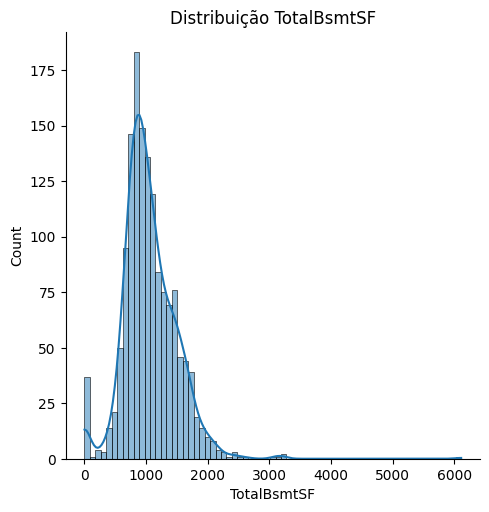

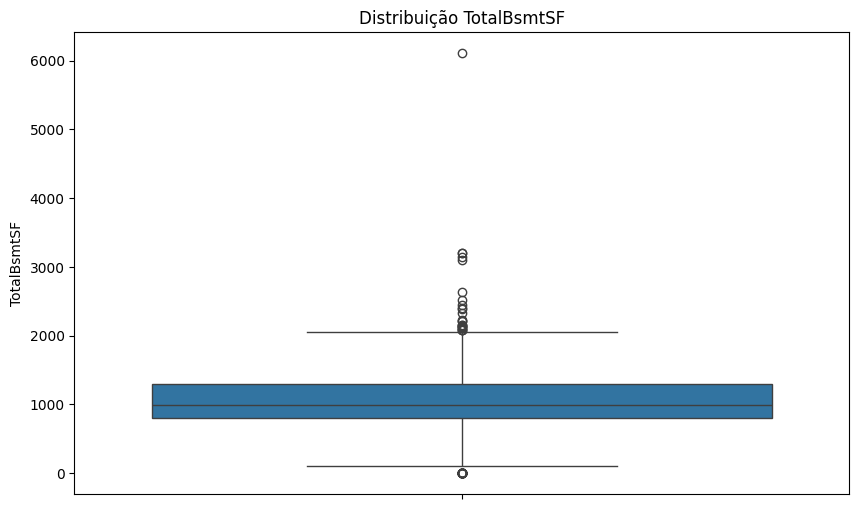

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: 1stFlrSF
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação 1stFlrSF: None
variações das 1stFlrSF: [ 856 1262  920  961 1145  796 1694 1107 1022 1077 1040 1182  912 1494
 1253  854 1004 1296 1114 1339 1158 1108 1795 1060 1600  900 1704  520
  649 1228 1234 1700 1561 1132 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 1518 1656  736  955  794  816 1842 1360 1425  983  860 1426
  780  581 1370  902 1143 2207 1479  747 1304 2223  845  885 1086  840
  526  952 1072 1768  682 1337 1563 1065  804 1301  684  612 1013  990
 1235  964 1260  905  680 1588  960  835 1225 1610  977 1535 1226 1053
 1047  789  997 1844 1216  774 1282 2259 1436  729 1092 1125 1699  728
  988  772 1080 1199 1586  958  660 1327 1721 1682 1214 1959  928  864
 1734  910 1501 1728  970  875  896  969 1710 1252 1200  572  991 1392
 1232 1572 1541  882 1149  808 1867 1707 

<Figure size 1000x600 with 0 Axes>

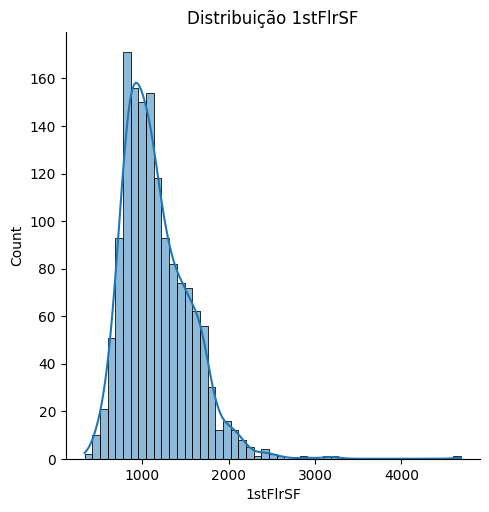

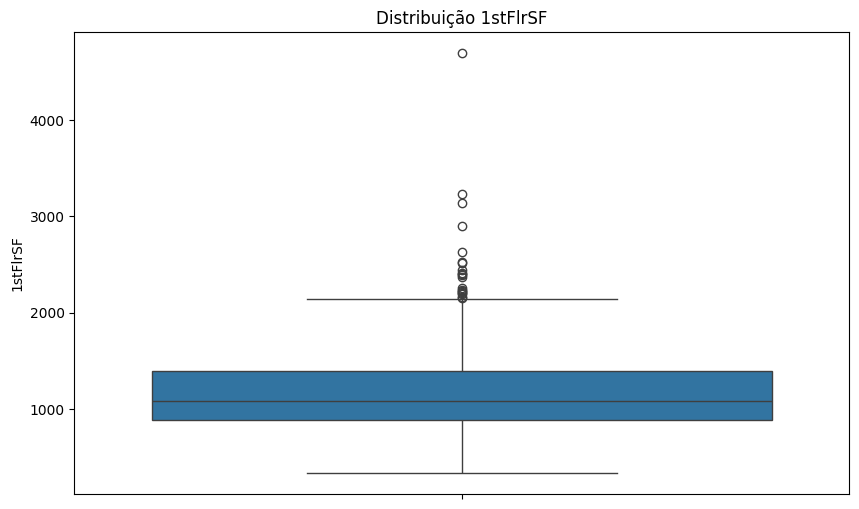

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: 2ndFlrSF
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação 2ndFlrSF: None
variações das 2ndFlrSF: [ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665 

<Figure size 1000x600 with 0 Axes>

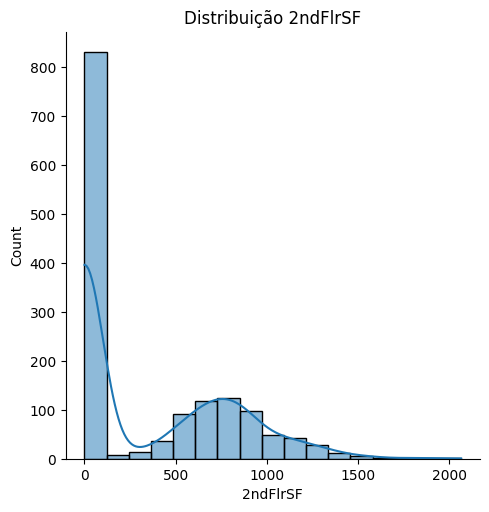

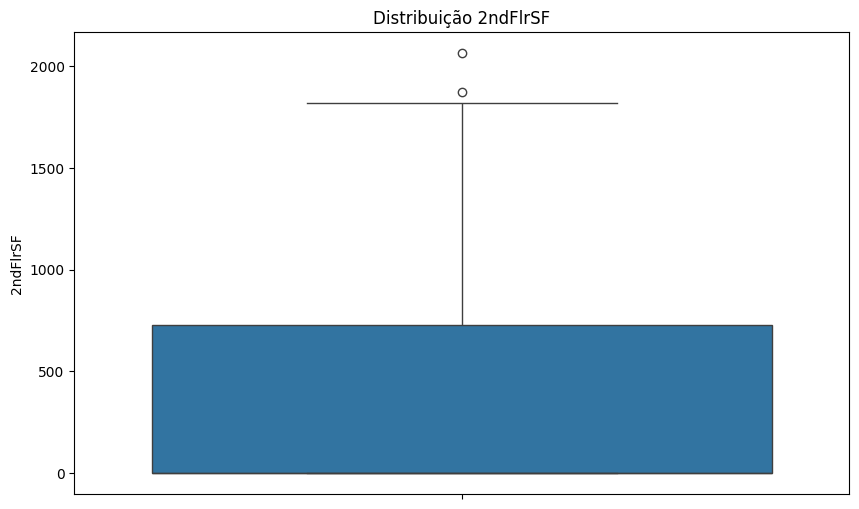

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LowQualFinSF
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação LowQualFinSF: None
variações das LowQualFinSF: [  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384]
dados faltantes LowQualFinSF: 0


<Figure size 1000x600 with 0 Axes>

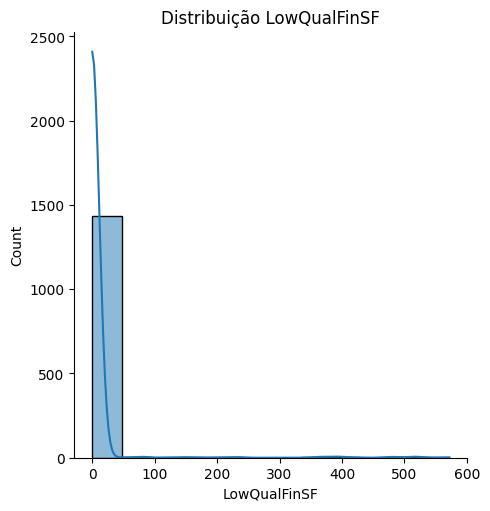

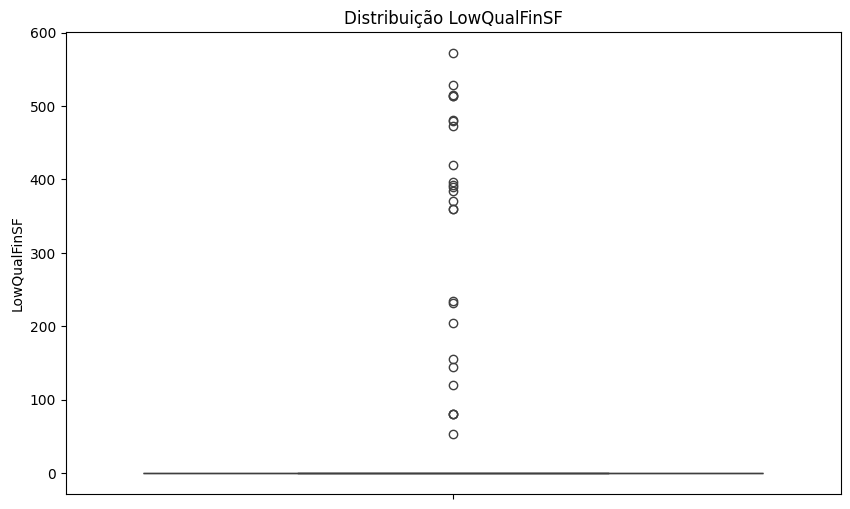

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GrLivArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação GrLivArea: None
variações das GrLivArea: [1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 1040 2324  912 1494
 1253  854 1004 1296 1114 1339 2376 1108 1795 1060 1600  900 1704  520
 1317 1228 1234 1700 1561 2452 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 2149 1656 1452  955 1470 1176  816 1842 1360 1425 1739 1720
 2945  780 1158 1111 1370 2034 2473 2207 1479  747 2287 2223  845 1718
 1086 1605  988  952 1285 1768 1230 2142 1337 1563 1065 1474 2417 1560
 1224 1526  990 1235  964 2291 1588  960  835 1225 1610 1732 1535 1226
 1818 1992 1047  789 1517 1844 1855 1430 2696 2259 2320 1458 1092 1125
 3222 1456 1123 1080 1199 1586  754  958  840 1348 1053 2157 2054 1327
 1721 1682 1214 1959 1852 1764  864 1734 1385 1501 1728 1709  875 2035
 1344  969 1993 1252 1200 1096 1968 19

<Figure size 1000x600 with 0 Axes>

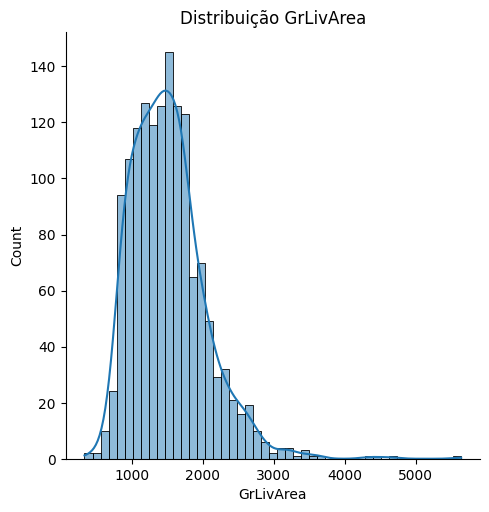

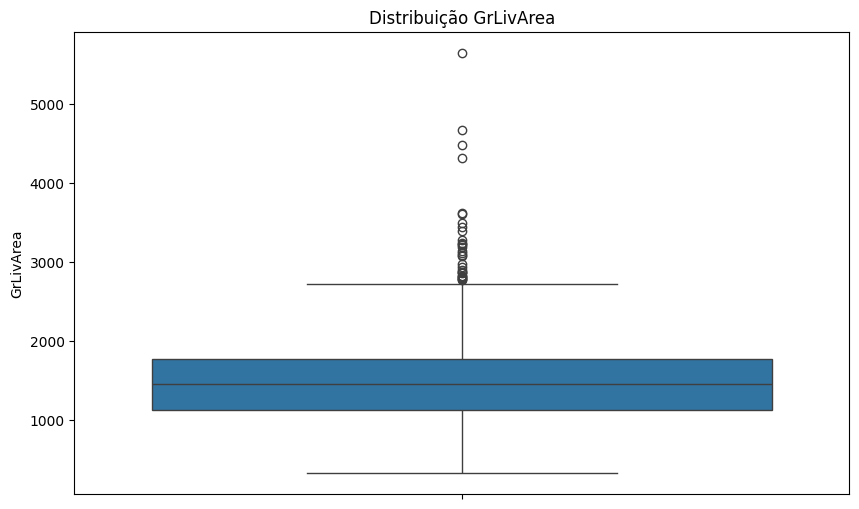

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtFullBath
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação BsmtFullBath: None
variações das BsmtFullBath: [1 0 2 3]
dados faltantes BsmtFullBath: 0


<Figure size 1000x600 with 0 Axes>

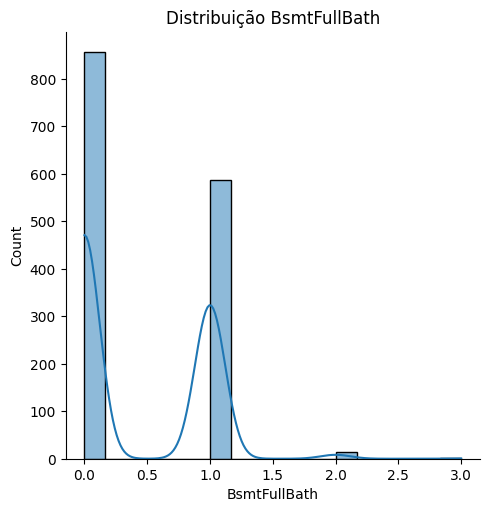

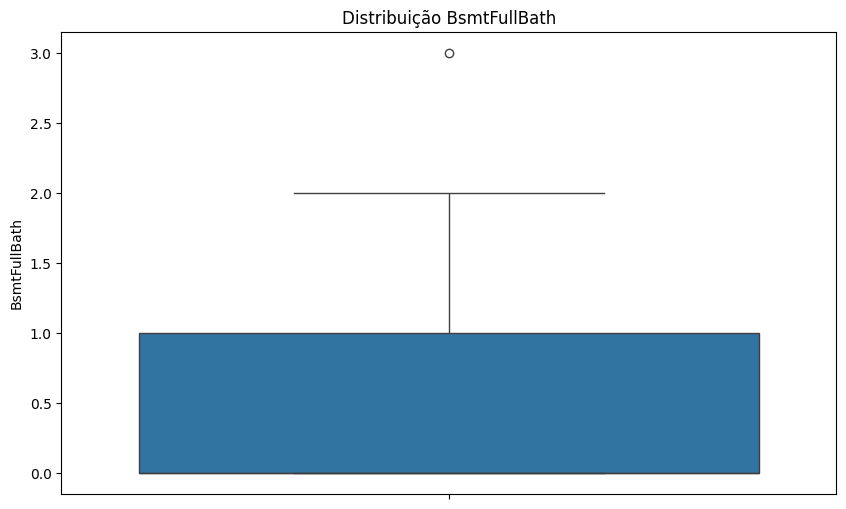

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtHalfBath
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação BsmtHalfBath: None
variações das BsmtHalfBath: [0 1 2]
dados faltantes BsmtHalfBath: 0


<Figure size 1000x600 with 0 Axes>

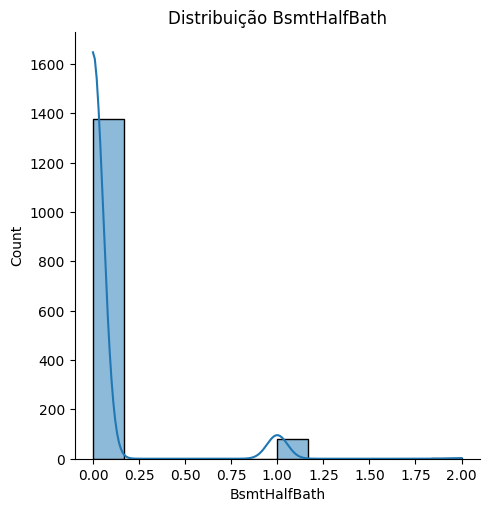

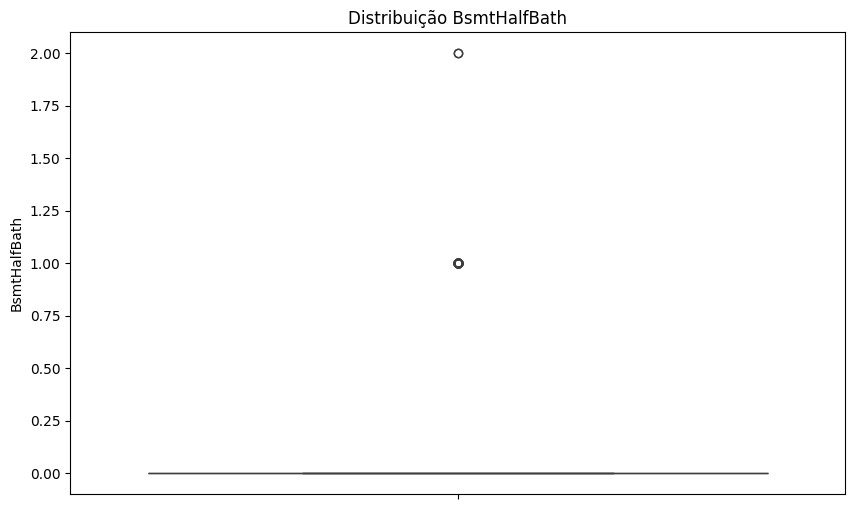

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: FullBath
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação FullBath: None
variações das FullBath: [2 1 3 0]
dados faltantes FullBath: 0


<Figure size 1000x600 with 0 Axes>

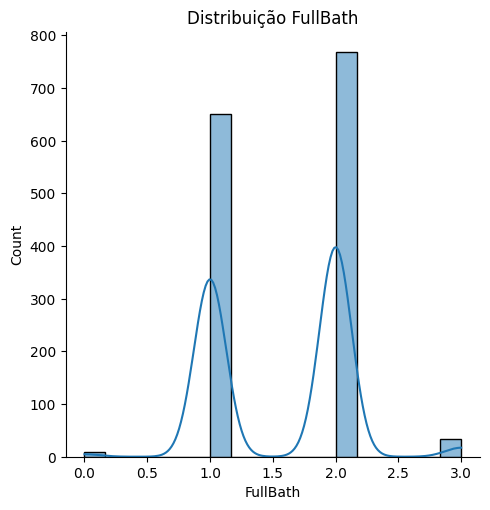

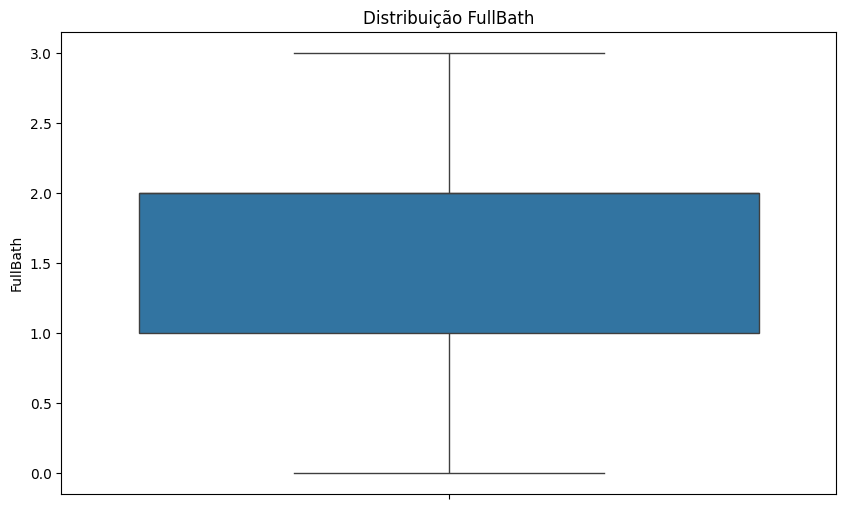

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: HalfBath
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação HalfBath: None
variações das HalfBath: [1 0 2]
dados faltantes HalfBath: 0


<Figure size 1000x600 with 0 Axes>

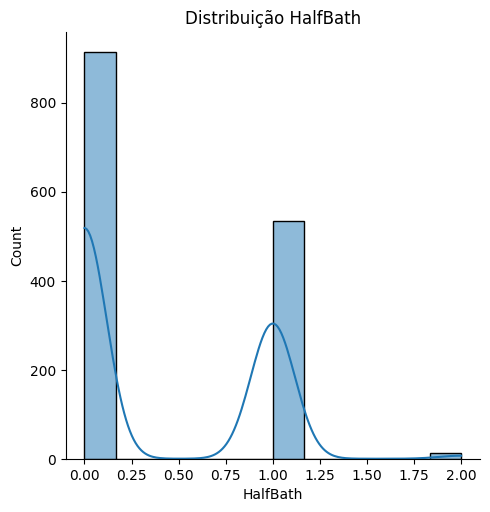

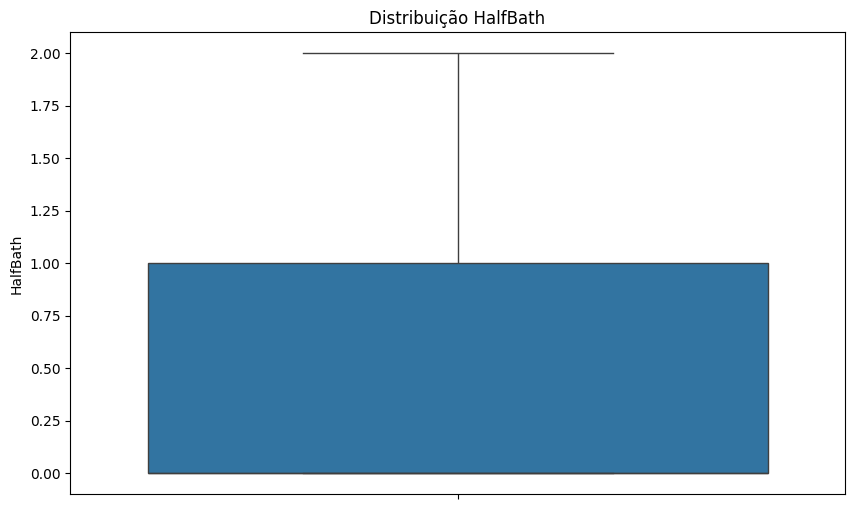

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BedroomAbvGr
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação BedroomAbvGr: None
variações das BedroomAbvGr: [3 4 1 2 0 5 6 8]
dados faltantes BedroomAbvGr: 0


<Figure size 1000x600 with 0 Axes>

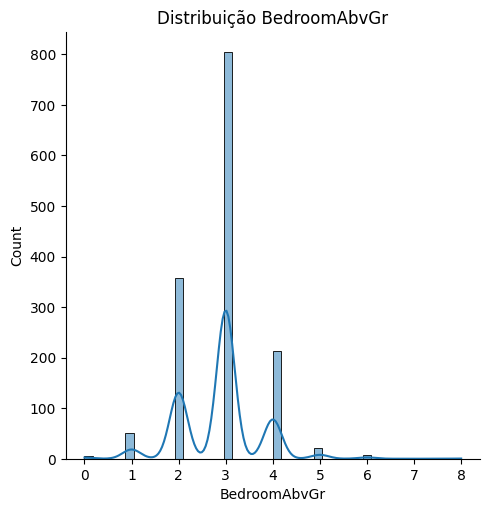

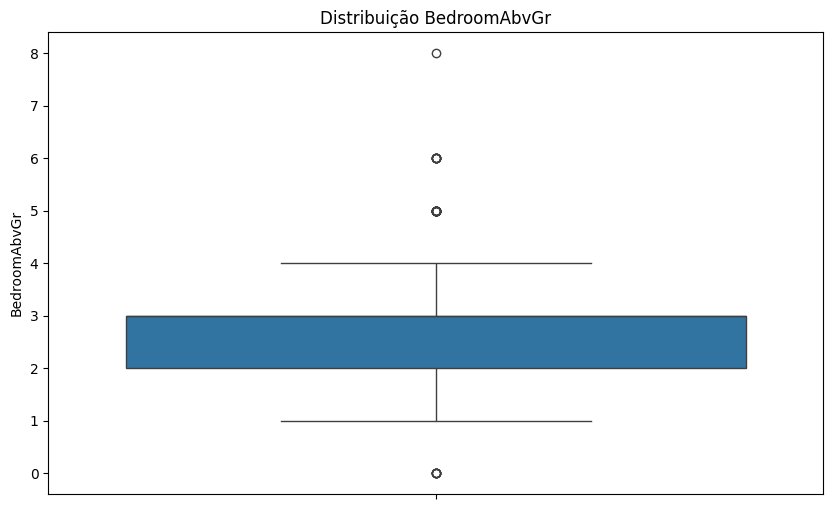

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: KitchenAbvGr
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação KitchenAbvGr: None
variações das KitchenAbvGr: [1 2 3 0]
dados faltantes KitchenAbvGr: 0


<Figure size 1000x600 with 0 Axes>

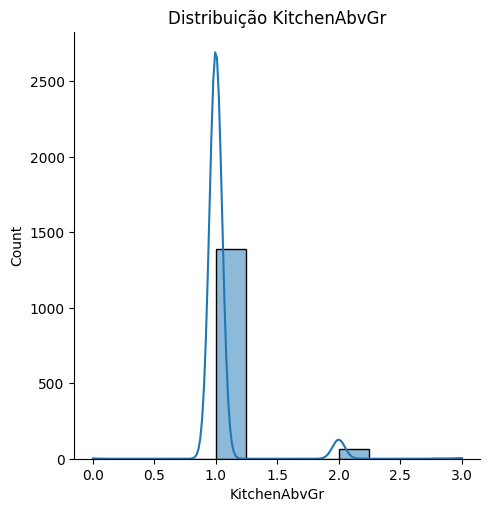

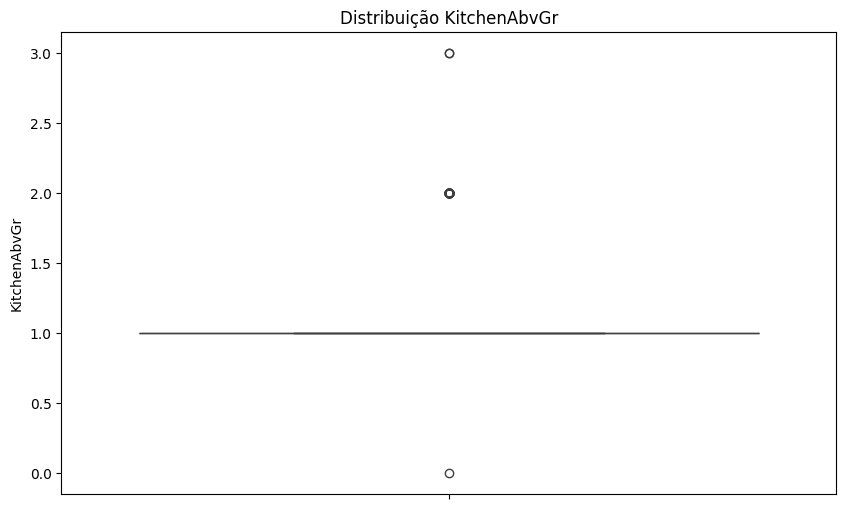

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: TotRmsAbvGrd
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação TotRmsAbvGrd: None
variações das TotRmsAbvGrd: [ 8  6  7  9  5 11  4 10 12  3  2 14]
dados faltantes TotRmsAbvGrd: 0


<Figure size 1000x600 with 0 Axes>

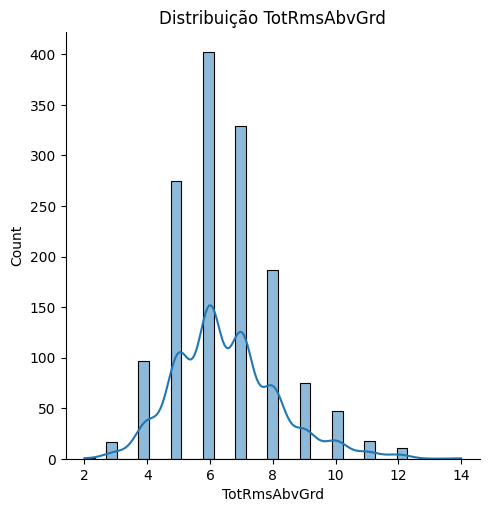

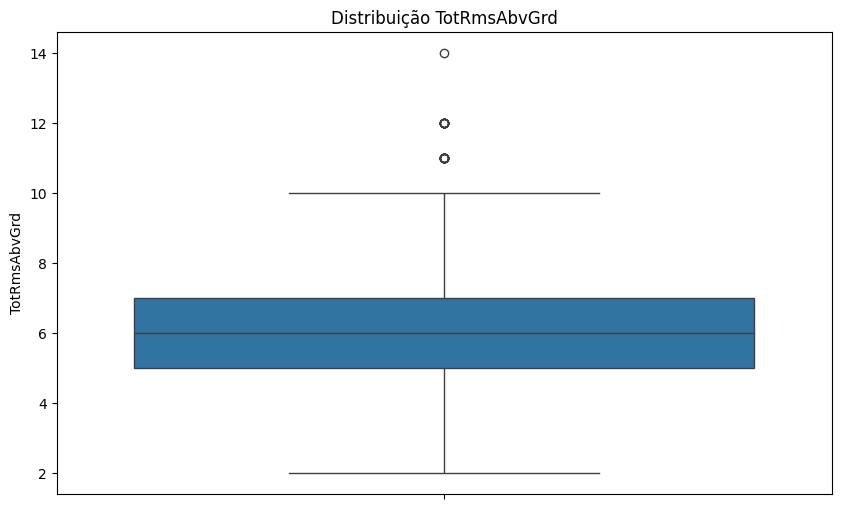

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Fireplaces
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação Fireplaces: None
variações das Fireplaces: [0 1 2 3]
dados faltantes Fireplaces: 0


<Figure size 1000x600 with 0 Axes>

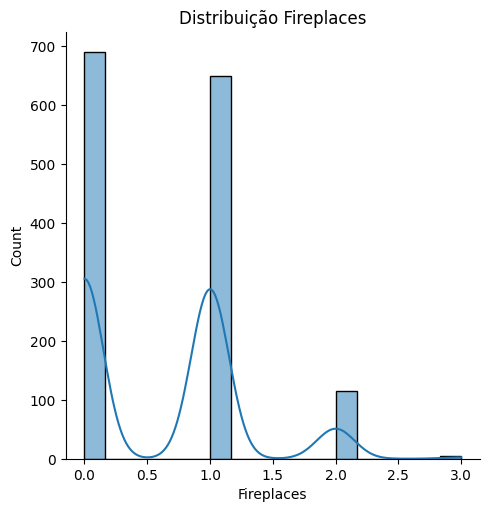

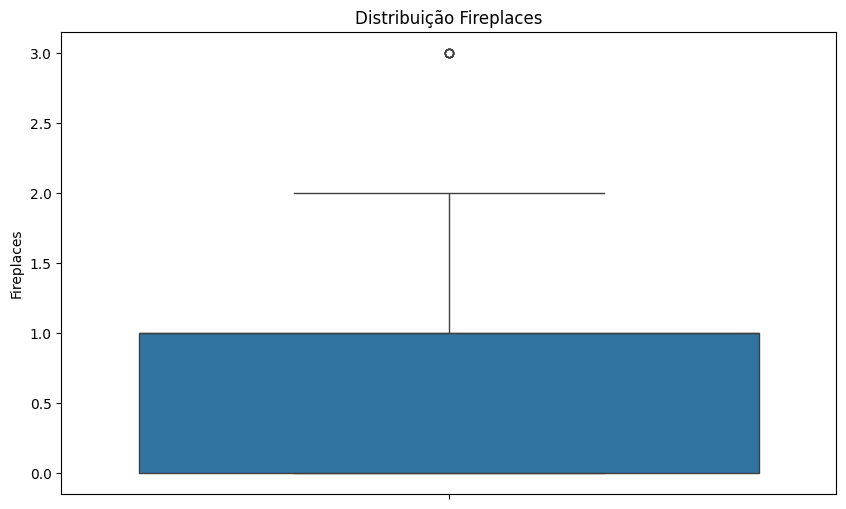

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1379 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
informação GarageYrBlt: None
variações das GarageYrBlt: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
dados faltantes GarageYrBlt: 81


<Figure size 1000x600 with 0 Axes>

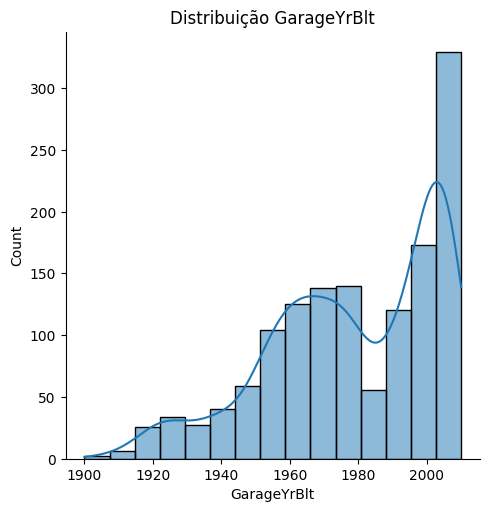

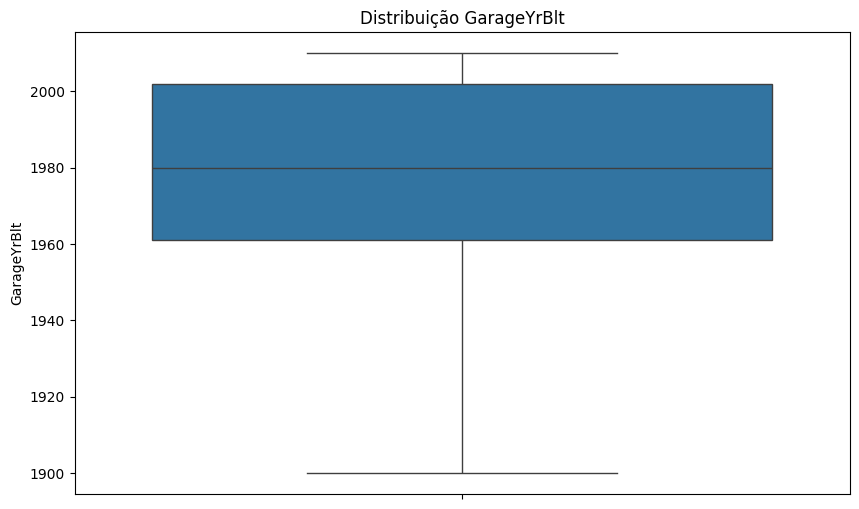

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageCars
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação GarageCars: None
variações das GarageCars: [2 3 1 0 4]
dados faltantes GarageCars: 0


<Figure size 1000x600 with 0 Axes>

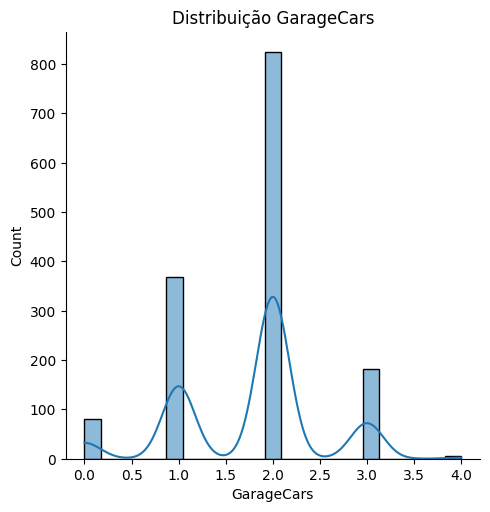

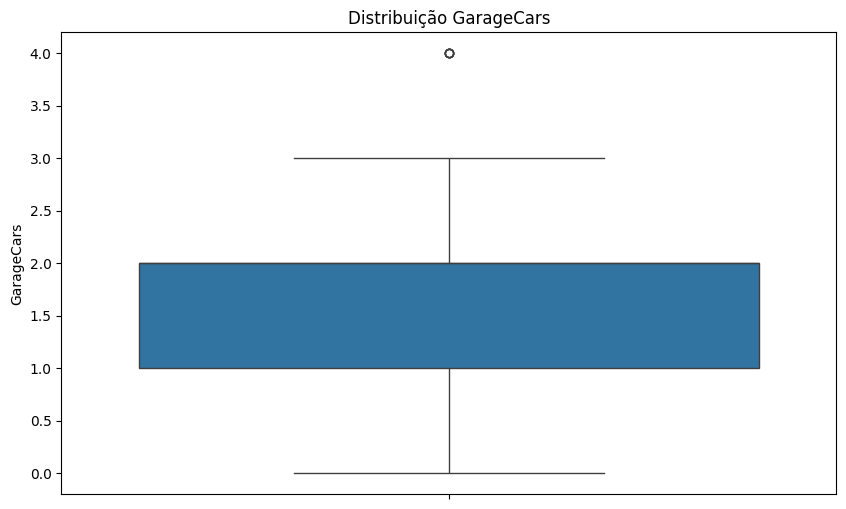

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação GarageArea: None
variações das GarageArea: [ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538

<Figure size 1000x600 with 0 Axes>

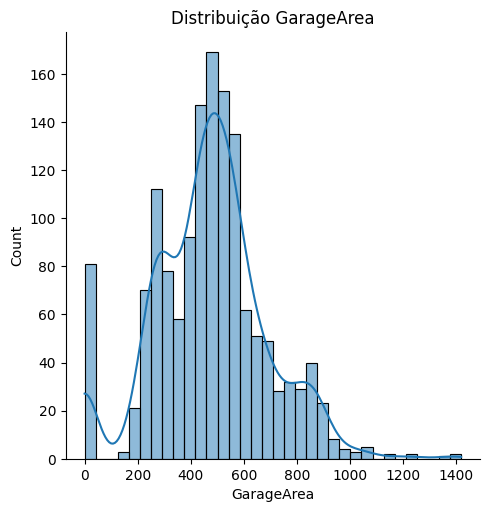

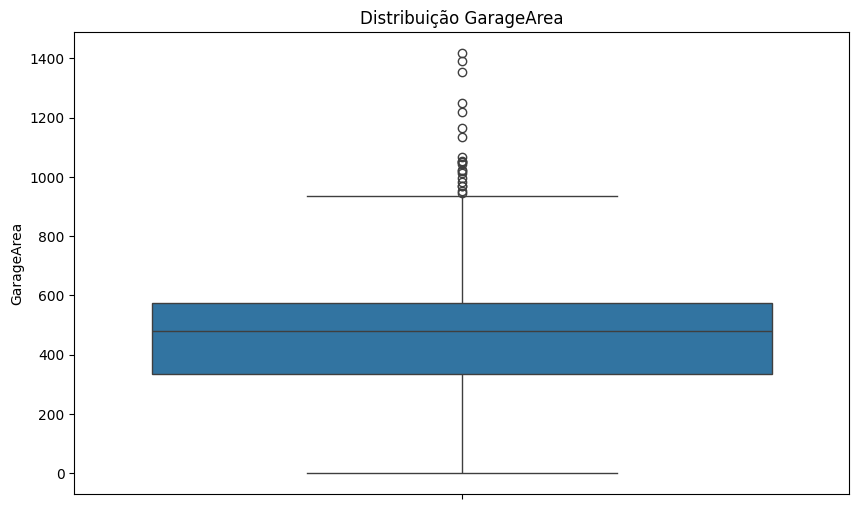

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: WoodDeckSF
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação WoodDeckSF: None
variações das WoodDeckSF: [  0 298 192  40 255 235  90 147 140 160  48 240 171 100 406 222 288  49
 203 113 392 145 196 168 112 106 857 115 120  12 576 301 144 300  74 127
 232 158 352 182 180 166 224  80 367  53 188 105  24  98 276 200 409 239
 400 476 178 574 237 210 441 116 280 104  87 132 238 149 355  60 139 108
 351 209 216 248 143 365 370  58 197 263 123 138 333 250 292  95 262  81
 289 124 172 110 208 468 256 302 190 340 233 184 201 142 122 155 670 135
 495 536 306  64 364 353  66 159 146 296 125  44 215 264  88  89  96 414
 519 206 141 260 324 156 220  38 261 126  85 466 270  78 169 320 268  72
 349  42  35 326 382 161 179 103 253 148 335 176 390 328 312 185 269 195
  57 236 517 304 198 426  28 316 322 307 257 219 416 344 380  68 114 327
 165 187 181  9

<Figure size 1000x600 with 0 Axes>

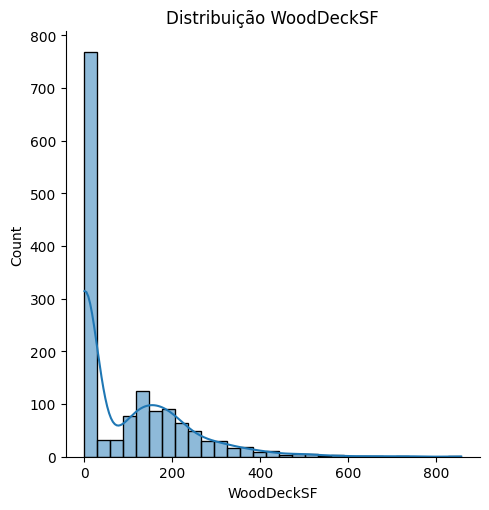

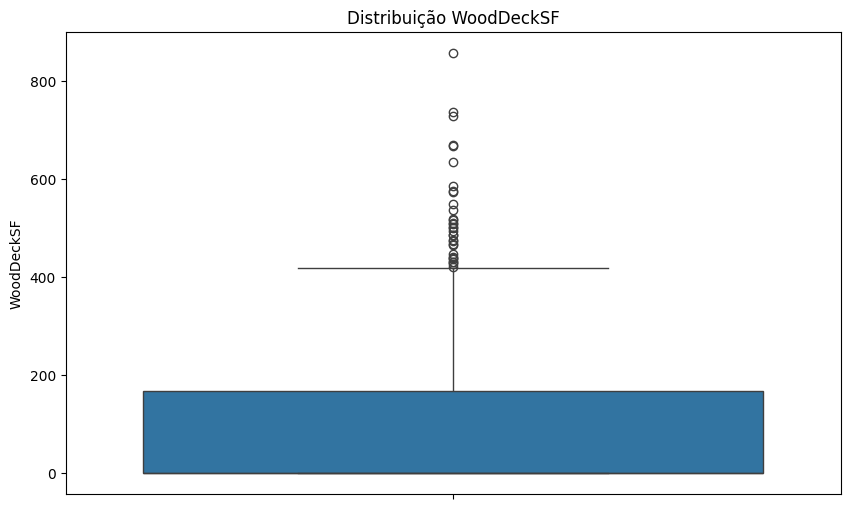

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: OpenPorchSF
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação OpenPorchSF: None
variações das OpenPorchSF: [ 61   0  42  35  84  30  57 204   4  21  33 213 112 102 154 159 110  90
  56  32  50 258  54  65  38  47  64  52 138 104  82  43 146  75  72  70
  49  11  36 151  29  94 101 199  99 234 162  63  68  46  45 122 184 120
  20  24 130 205 108  80  66  48  25  96 111 106  40 114   8 136 132  62
 228  60 238 260  27  74  16 198  26  83  34  55  22  98 172 119 208 105
 140 168  28  39 148  12  51 150 117 250  10  81  44 144 175 195 128  76
  17  59 214 121  53 231 134 192 123  78 187  85 133 176 113 137 125 523
 100 285  88 406 155  73 182 502 274 158 142 243 235 312 124 267 265  87
 288  23 152 341 116 160 174 247 291  18 170 156 166 129 418 240  77 364
 188 207  67  69 131 191  41 118 252 189 282 135  95 224 169 319  58  93
 244 185 200

<Figure size 1000x600 with 0 Axes>

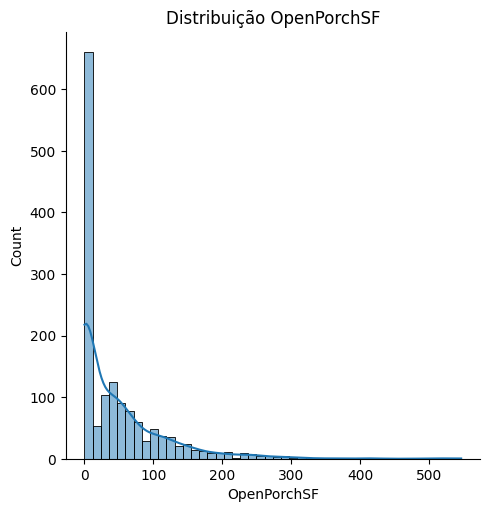

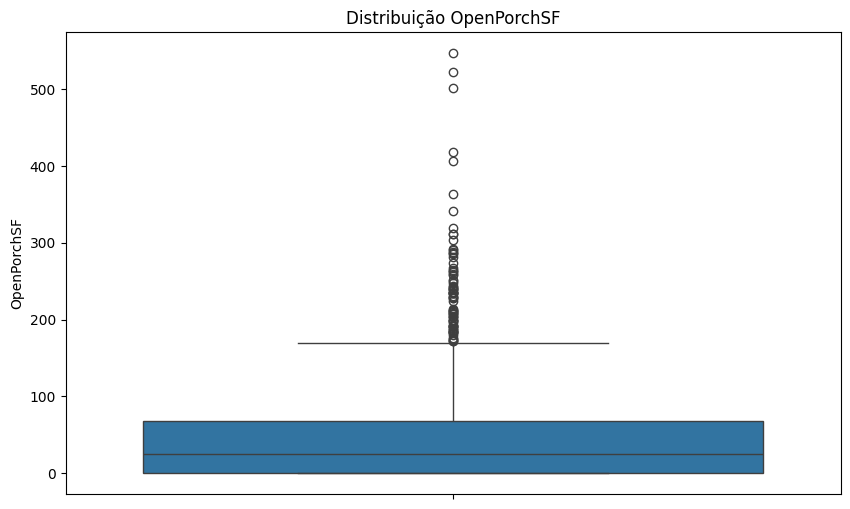

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: EnclosedPorch
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação EnclosedPorch: None
variações das EnclosedPorch: [  0 272 228 205 176  87 172 102  37 144  64 114 202 128 156  44  77 192
 140 180 183  39 184  40 552  30 126  96  60 150 120 112 252  52 224 234
 244 268 137  24 108 294 177 218 242  91 160 130 169 105  34 248 236  32
  80 115 291 116 158 210  36 200  84 148 136 240  54 100 189 293 164 216
 239  67  90  56 129  98 143  70 386 154 185 134 196 264 275 230 254  68
 194 318  48  94 138 226 174  19 170 220 214 280 190 330 208 145 259  81
  42 123 162 286 168  20 301 198 221 212  50  99]
dados faltantes EnclosedPorch: 0


<Figure size 1000x600 with 0 Axes>

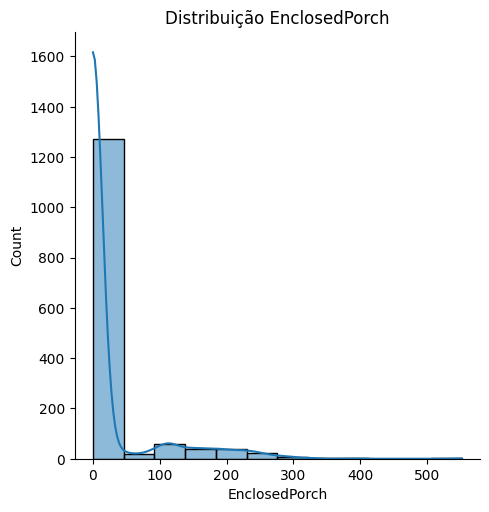

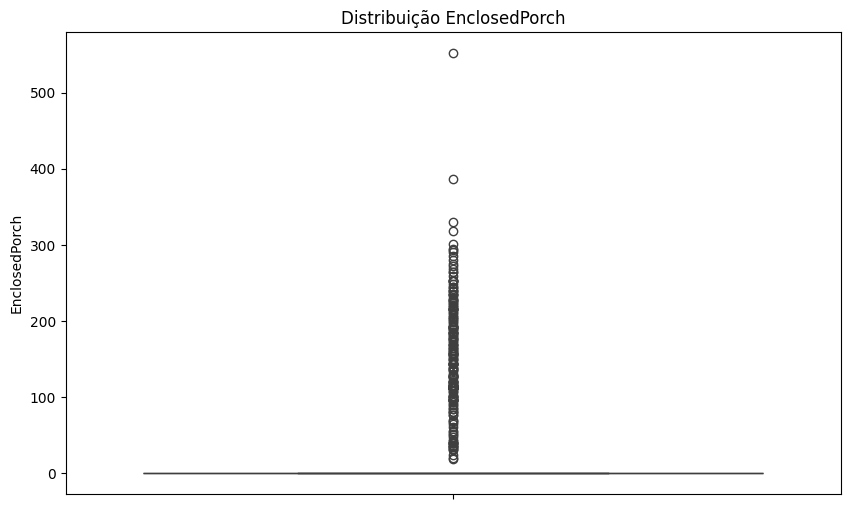

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: 3SsnPorch
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação 3SsnPorch: None
variações das 3SsnPorch: [  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304]
dados faltantes 3SsnPorch: 0


<Figure size 1000x600 with 0 Axes>

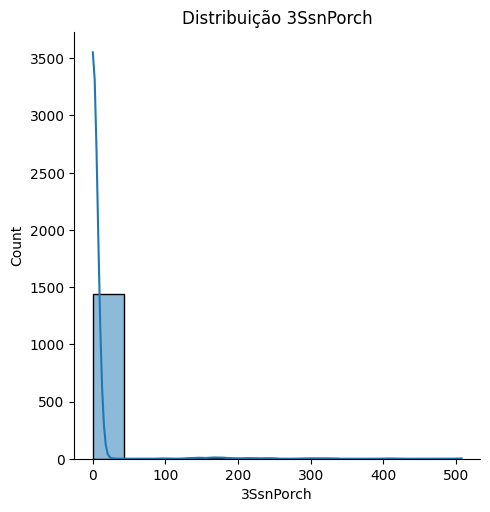

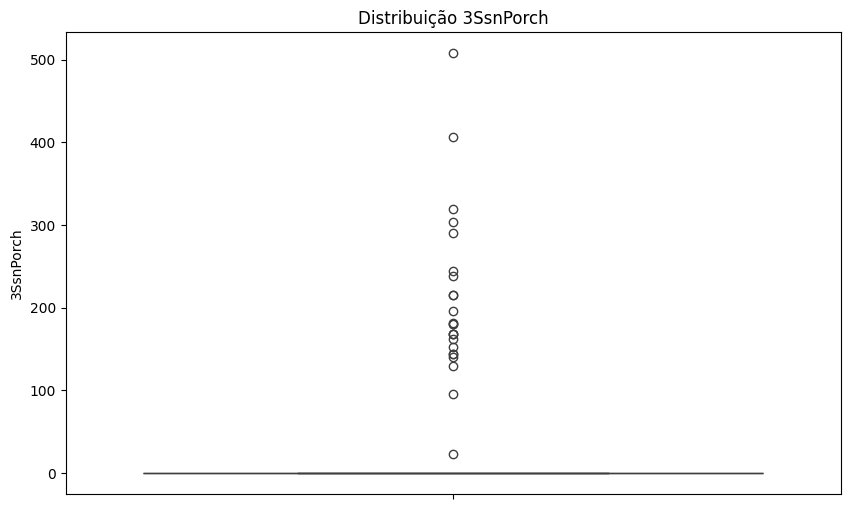

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: ScreenPorch
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação ScreenPorch: None
variações das ScreenPorch: [  0 176 198 291 252  99 184 168 130 142 192 410 224 266 170 154 153 144
 128 259 160 271 234 374 185 182  90 396 140 276 180 161 145 200 122  95
 120  60 126 189 260 147 385 287 156 100 216 210 197 204 225 152 175 312
 222 265 322 190 233  63  53 143 273 288 263  80 163 116 480 178 440 155
 220 119 165  40]
dados faltantes ScreenPorch: 0


<Figure size 1000x600 with 0 Axes>

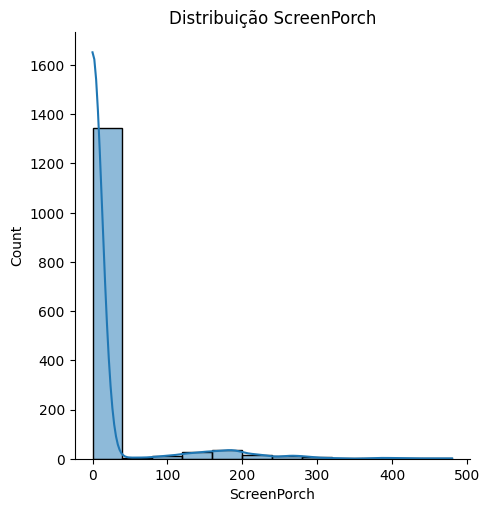

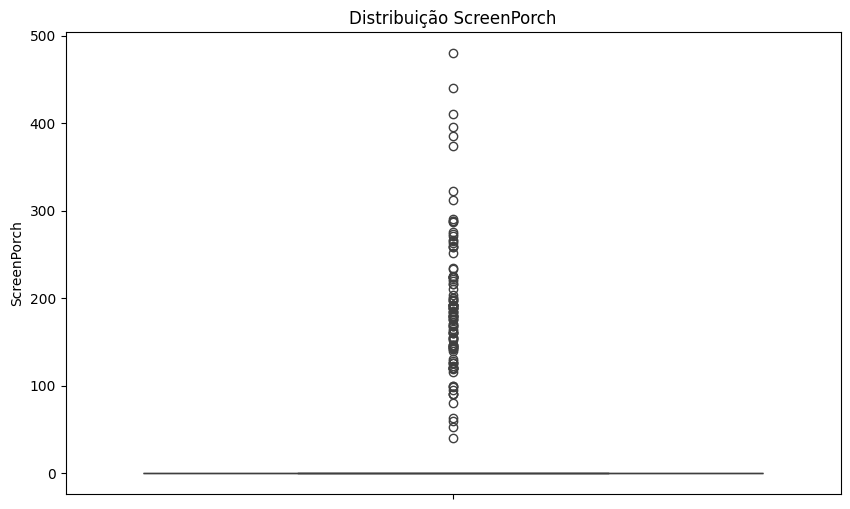

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: PoolArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação PoolArea: None
variações das PoolArea: [  0 512 648 576 555 480 519 738]
dados faltantes PoolArea: 0


<Figure size 1000x600 with 0 Axes>

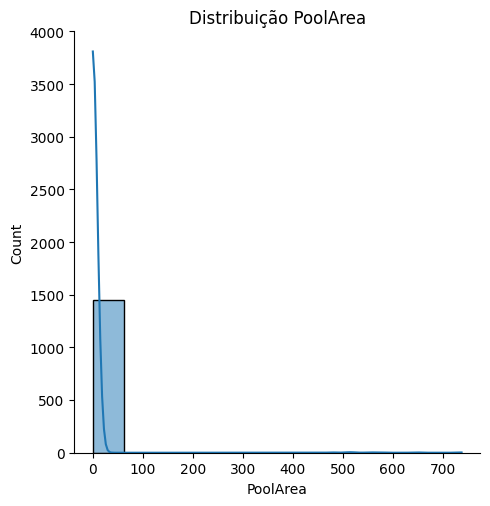

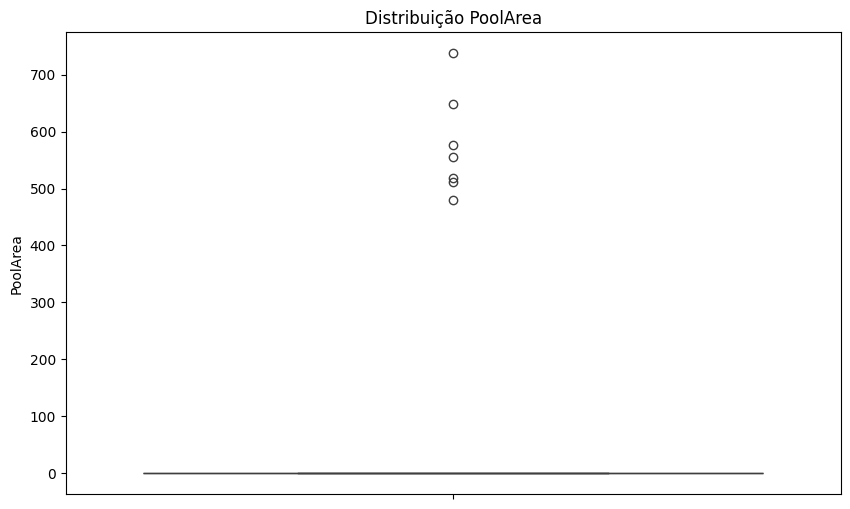

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MiscVal
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação MiscVal: None
variações das MiscVal: [    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]
dados faltantes MiscVal: 0


<Figure size 1000x600 with 0 Axes>

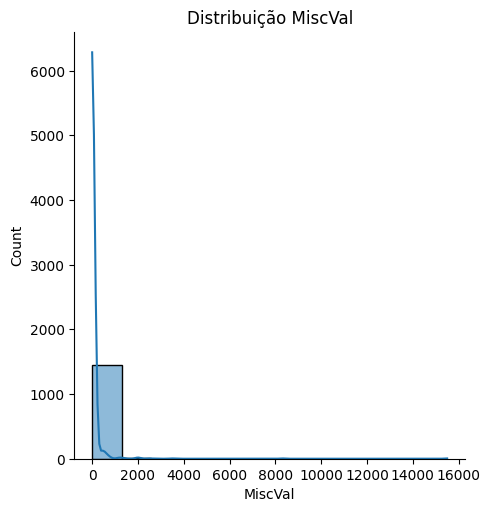

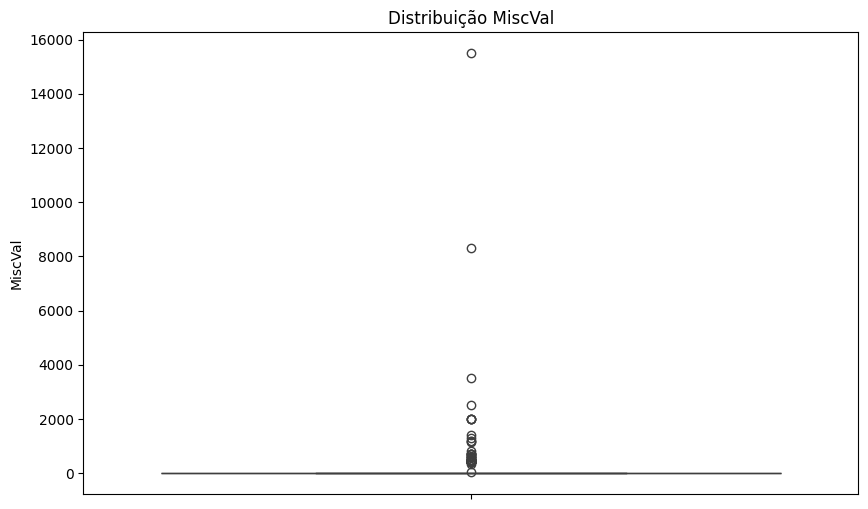

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MoSold
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação MoSold: None
variações das MoSold: [ 2  5  9 12 10  8 11  4  1  7  3  6]
dados faltantes MoSold: 0


<Figure size 1000x600 with 0 Axes>

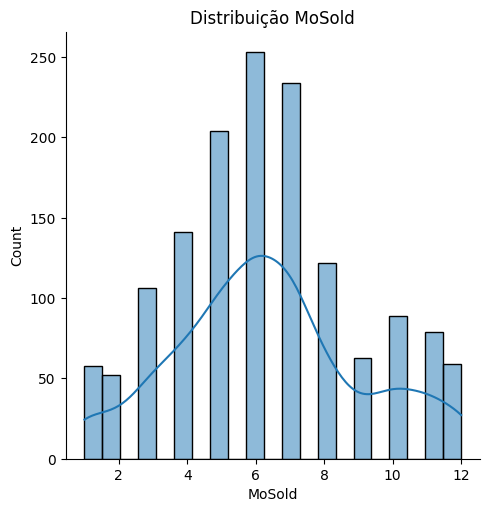

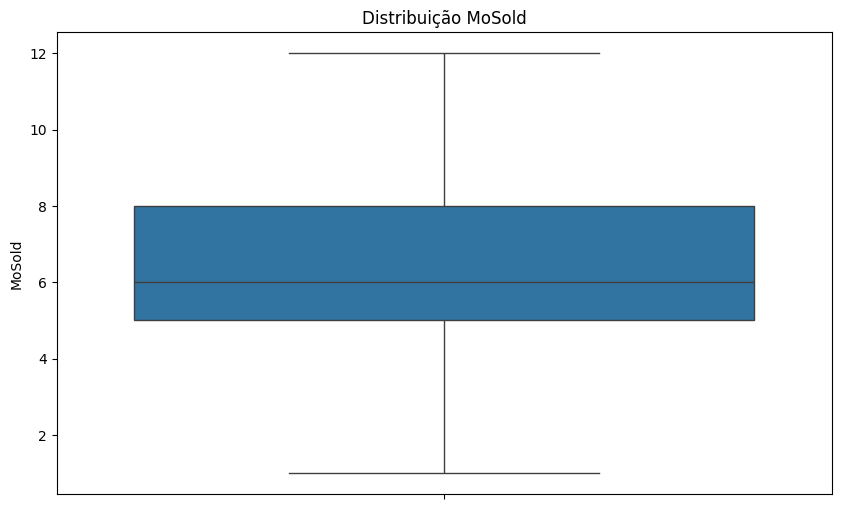

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: YrSold
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação YrSold: None
variações das YrSold: [2008 2007 2006 2009 2010]
dados faltantes YrSold: 0


<Figure size 1000x600 with 0 Axes>

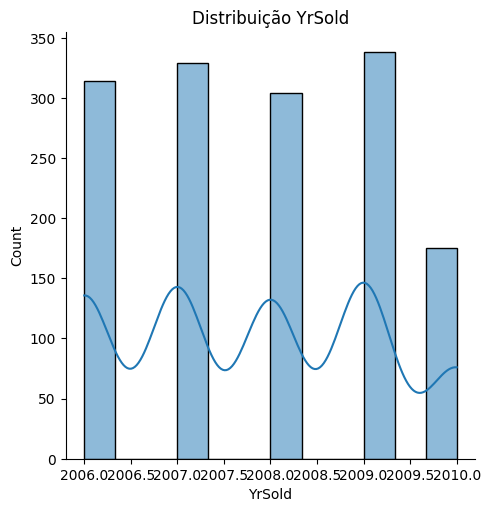

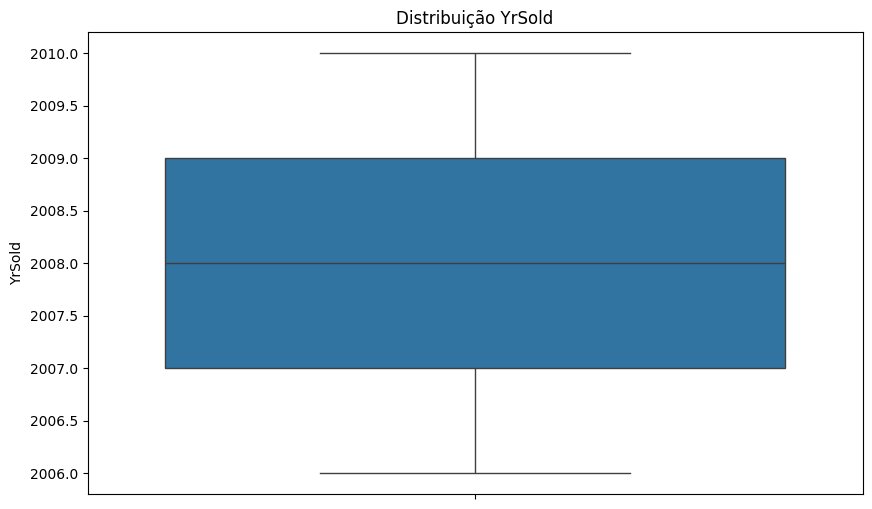

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
informação SalePrice: None
variações das SalePrice: [208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 385000 130000 180500 172500 196500 438780 124900 158000 101000
 202500 219500 317000 180000 226000  80000 225000 244000 185000 144900
 107400  91000 135750 136500 193500 153500 245000 126500 168500 260000
 174000 164500  85000 123600 109900  98600 163500 133900 204750 214000
  94750  83000 128950 205000 178000 118964 198900 169500 100000 115000
 190000 136900 383970 217000 259500 17

<Figure size 1000x600 with 0 Axes>

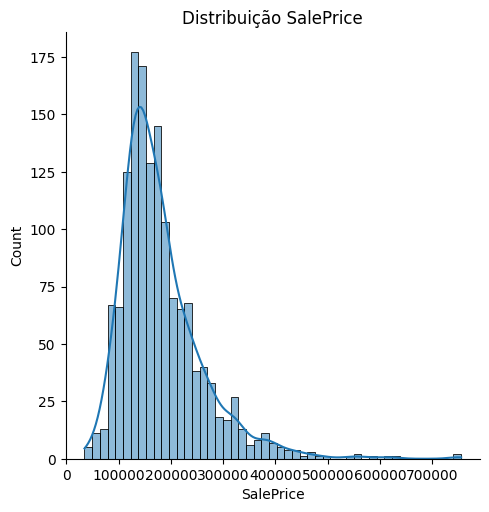

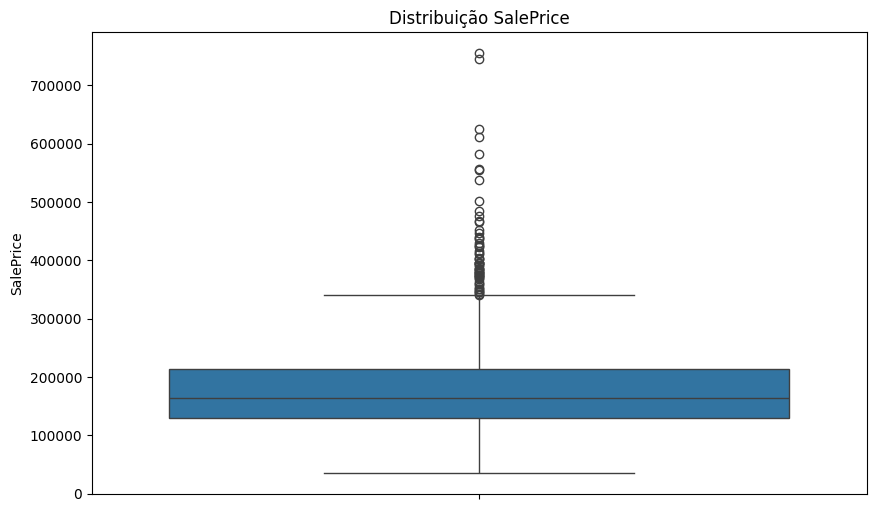

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSZoning
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação MSZoning: None
dados faltantes MSZoning: 0
variações das MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']


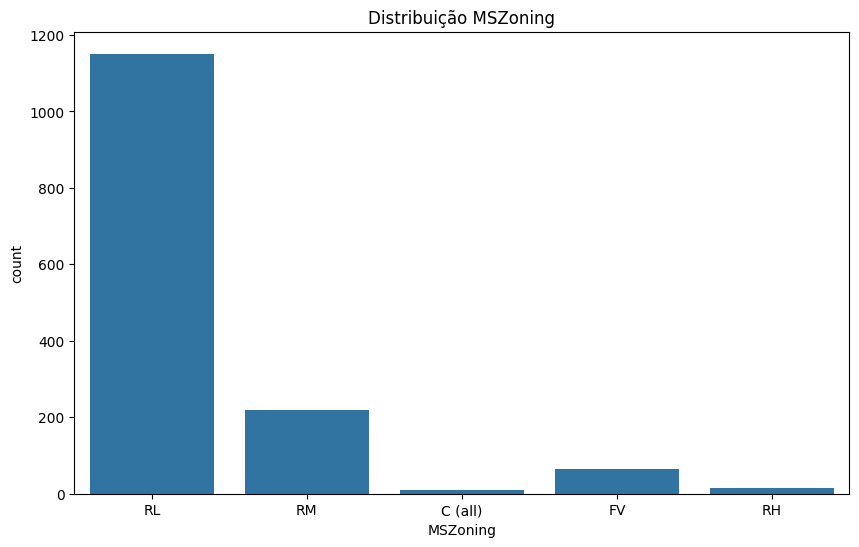

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Street
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Street: None
dados faltantes Street: 0
variações das Street: ['Pave' 'Grvl']


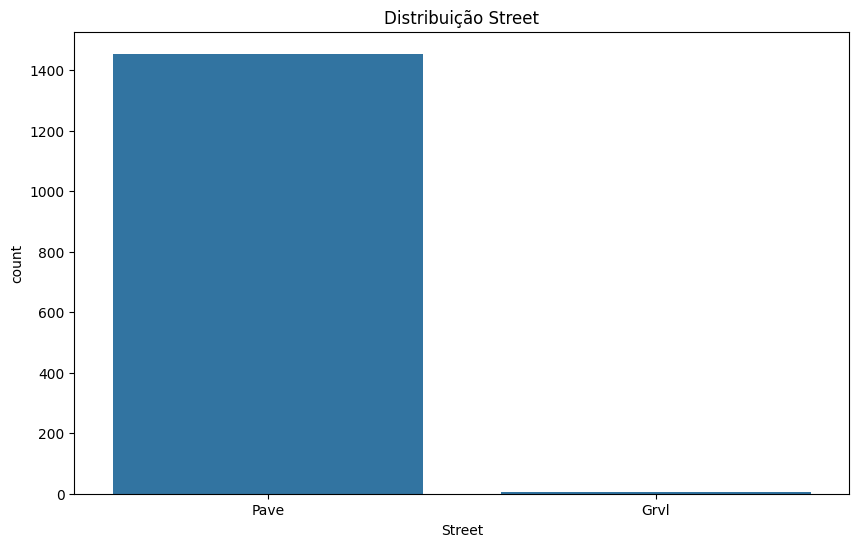

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Alley
Non-Null Count  Dtype 
--------------  ----- 
91 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB
informação Alley: None
dados faltantes Alley: 1369
variações das Alley: [nan 'Grvl' 'Pave']


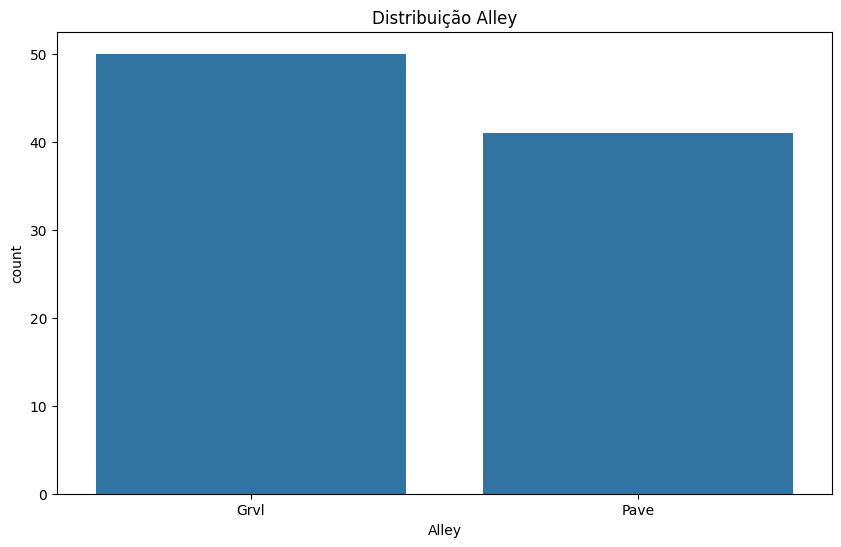

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotShape
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação LotShape: None
dados faltantes LotShape: 0
variações das LotShape: ['Reg' 'IR1' 'IR2' 'IR3']


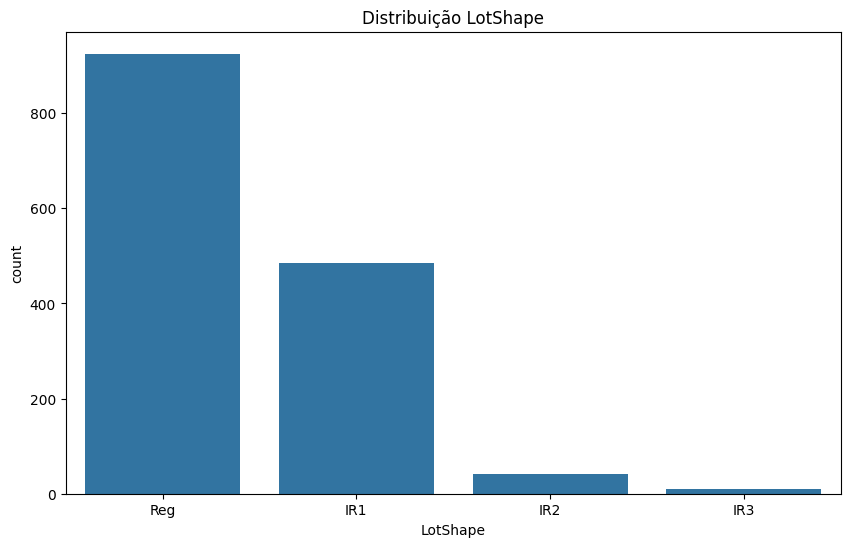

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LandContour
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação LandContour: None
dados faltantes LandContour: 0
variações das LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']


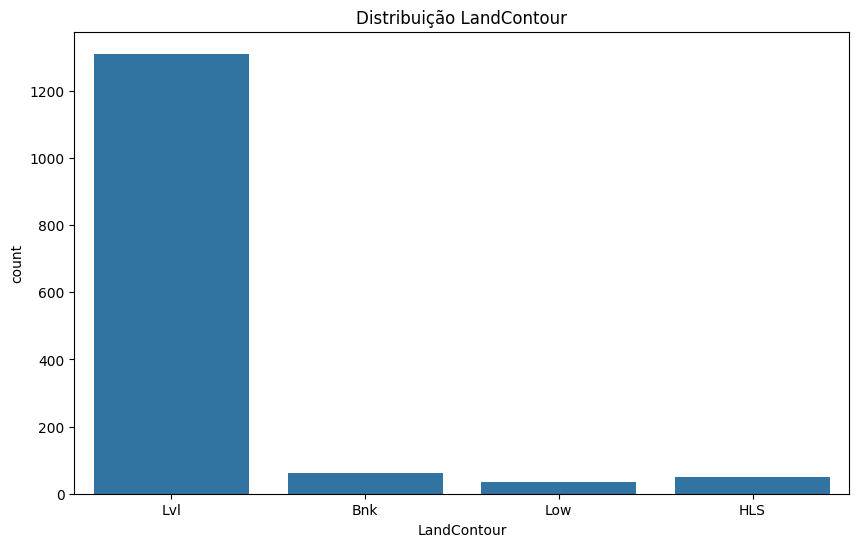

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Utilities
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Utilities: None
dados faltantes Utilities: 0
variações das Utilities: ['AllPub' 'NoSeWa']


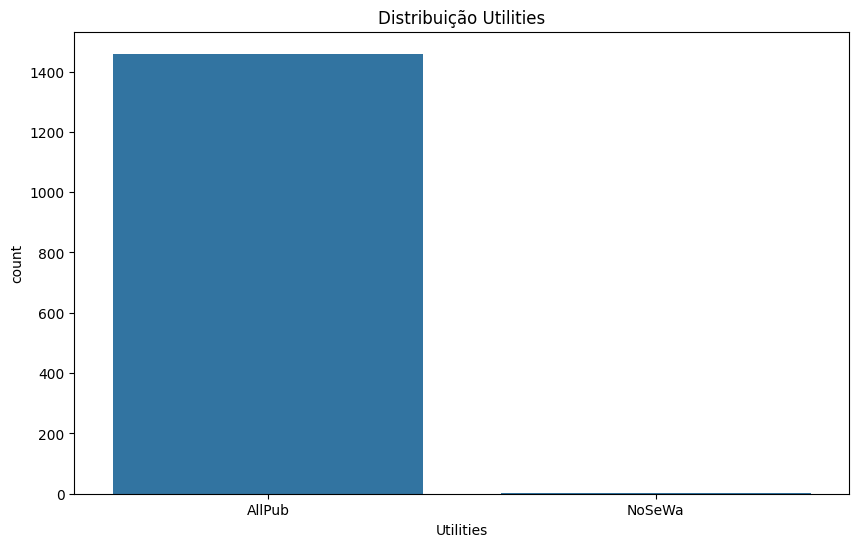

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotConfig
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação LotConfig: None
dados faltantes LotConfig: 0
variações das LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


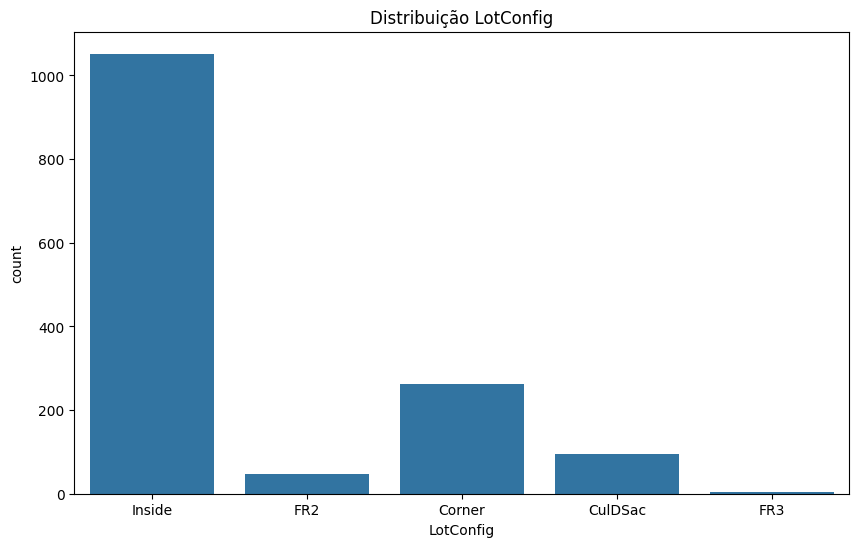

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LandSlope
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação LandSlope: None
dados faltantes LandSlope: 0
variações das LandSlope: ['Gtl' 'Mod' 'Sev']


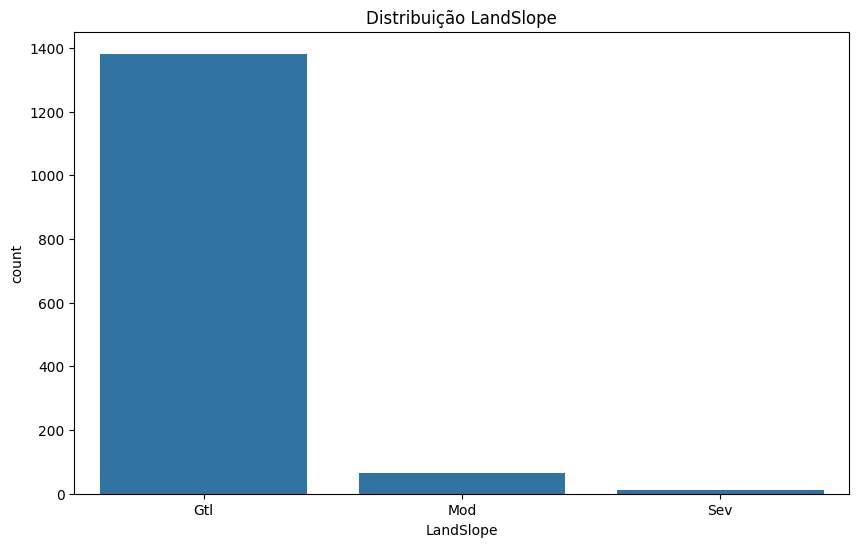

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Neighborhood
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Neighborhood: None
dados faltantes Neighborhood: 0
variações das Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


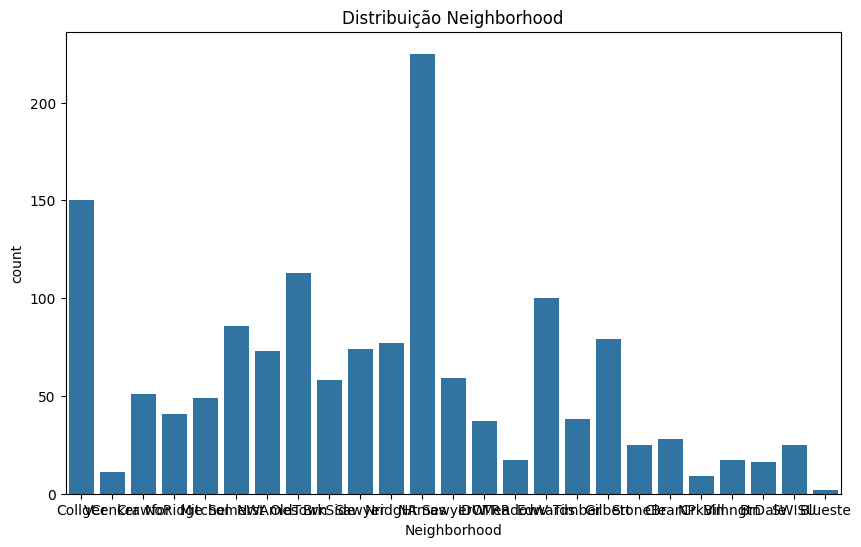

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Condition1
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Condition1: None
dados faltantes Condition1: 0
variações das Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


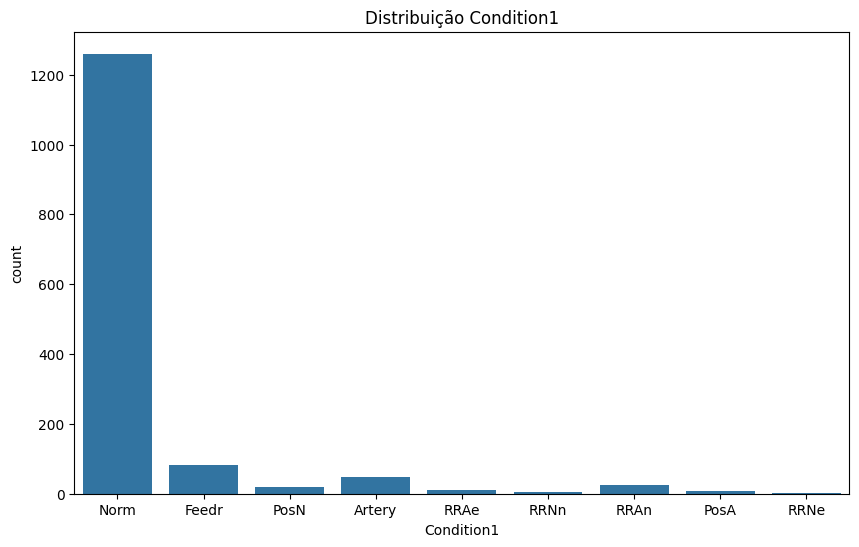

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Condition2
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Condition2: None
dados faltantes Condition2: 0
variações das Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


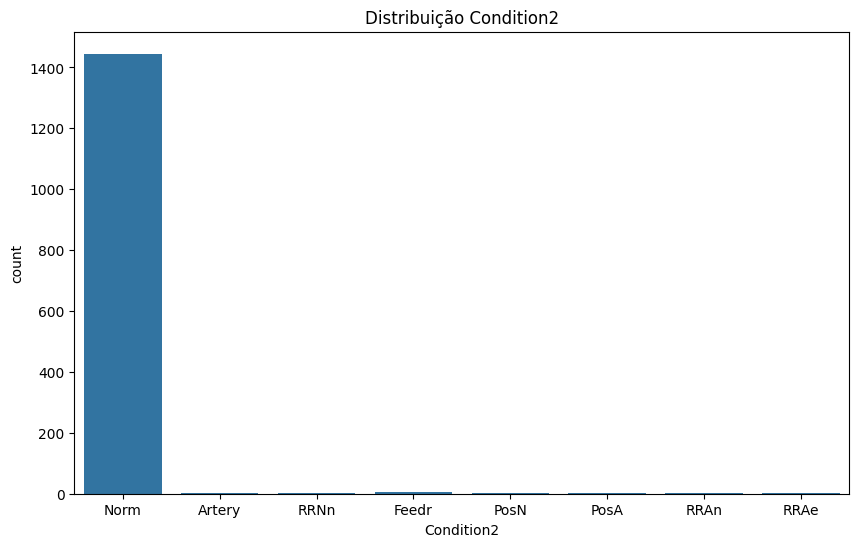

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BldgType
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação BldgType: None
dados faltantes BldgType: 0
variações das BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


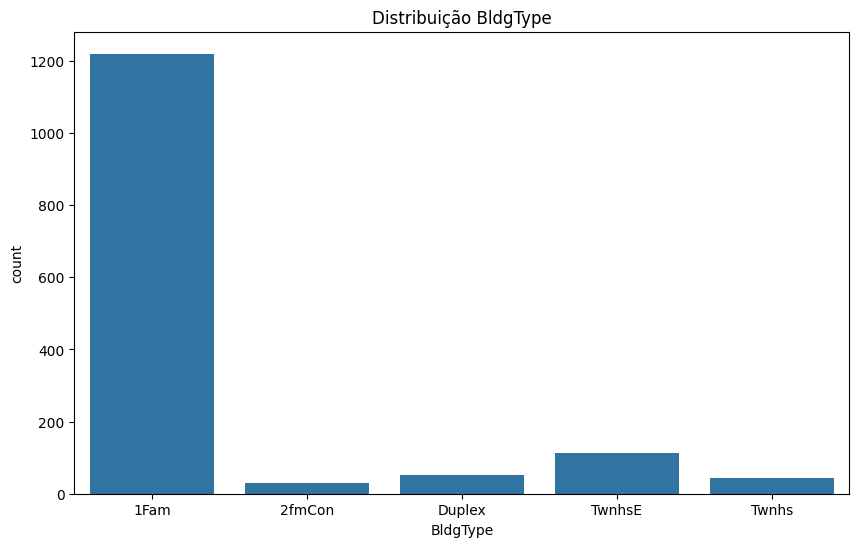

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: HouseStyle
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação HouseStyle: None
dados faltantes HouseStyle: 0
variações das HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


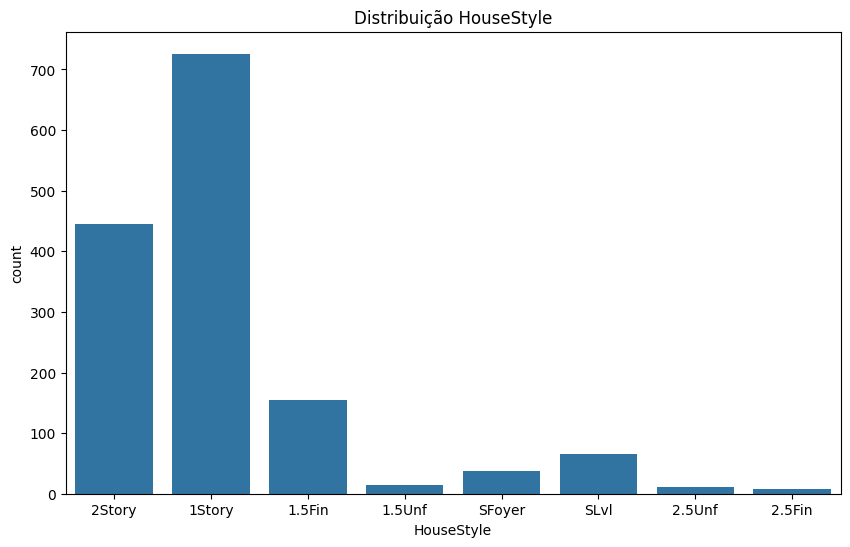

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: RoofStyle
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação RoofStyle: None
dados faltantes RoofStyle: 0
variações das RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


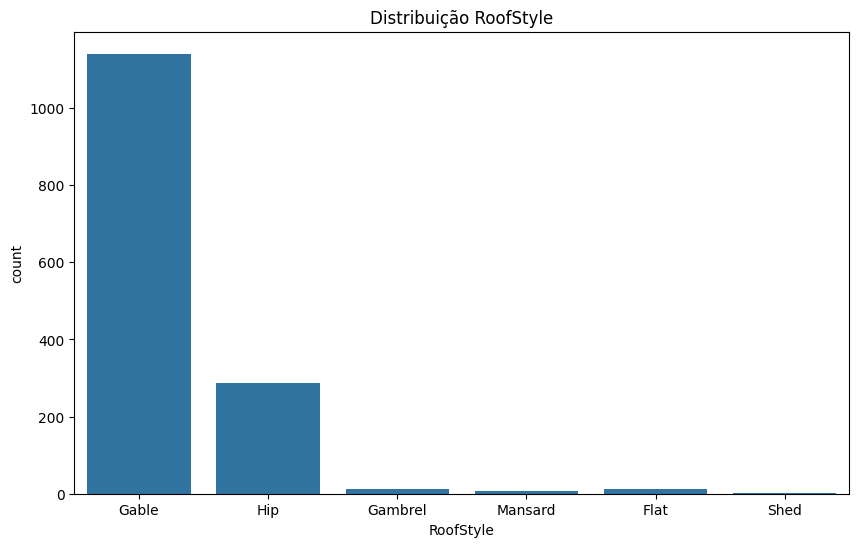

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: RoofMatl
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação RoofMatl: None
dados faltantes RoofMatl: 0
variações das RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


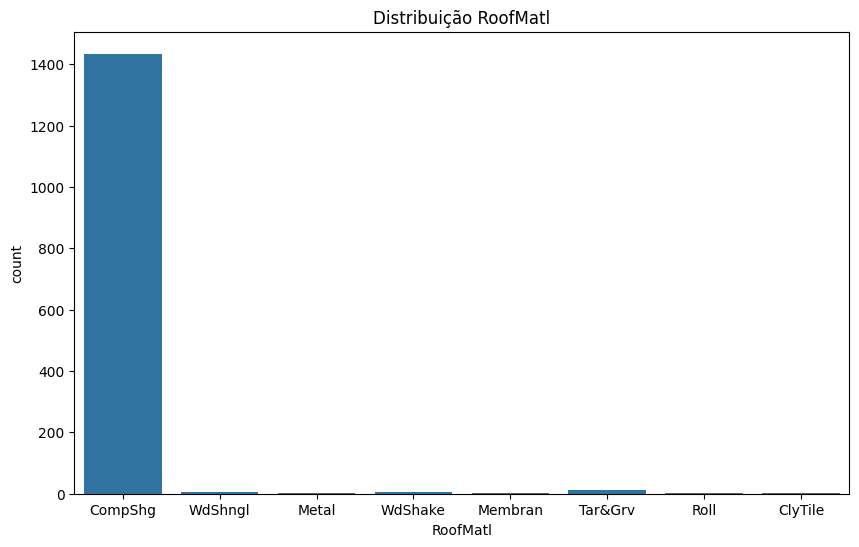

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Exterior1st
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Exterior1st: None
dados faltantes Exterior1st: 0
variações das Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


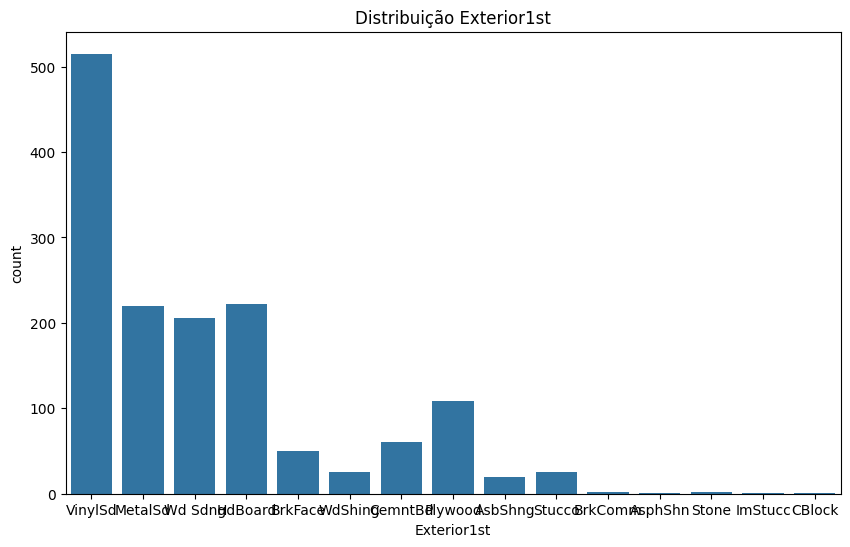

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Exterior2nd
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Exterior2nd: None
dados faltantes Exterior2nd: 0
variações das Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


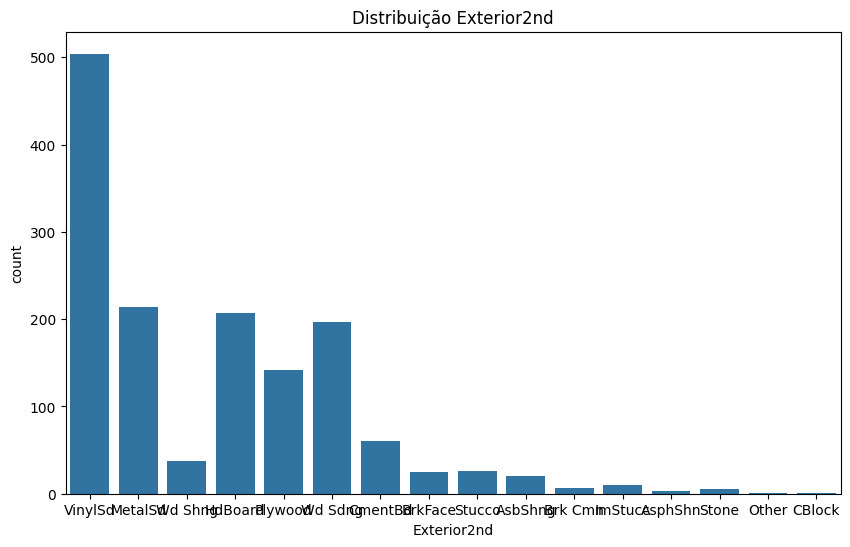

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrType
Non-Null Count  Dtype 
--------------  ----- 
588 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB
informação MasVnrType: None
dados faltantes MasVnrType: 872
variações das MasVnrType: ['BrkFace' nan 'Stone' 'BrkCmn']


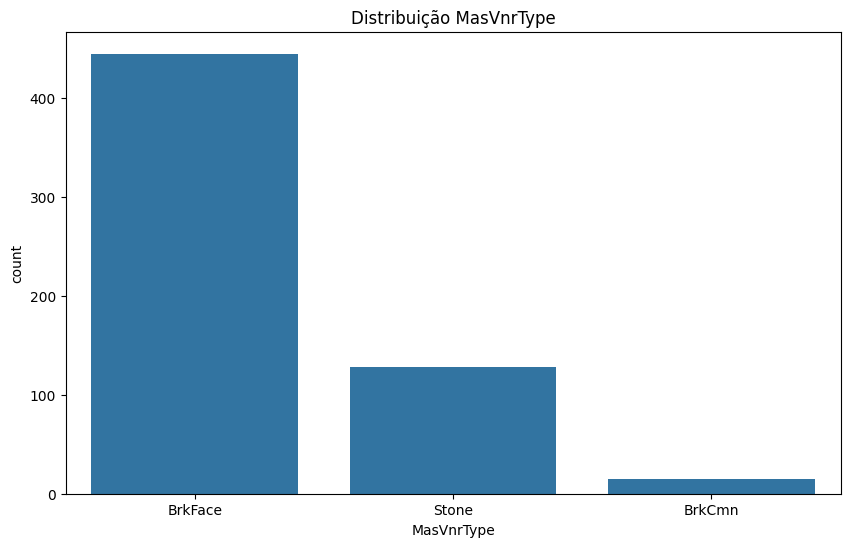

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: ExterQual
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação ExterQual: None
dados faltantes ExterQual: 0
variações das ExterQual: ['Gd' 'TA' 'Ex' 'Fa']


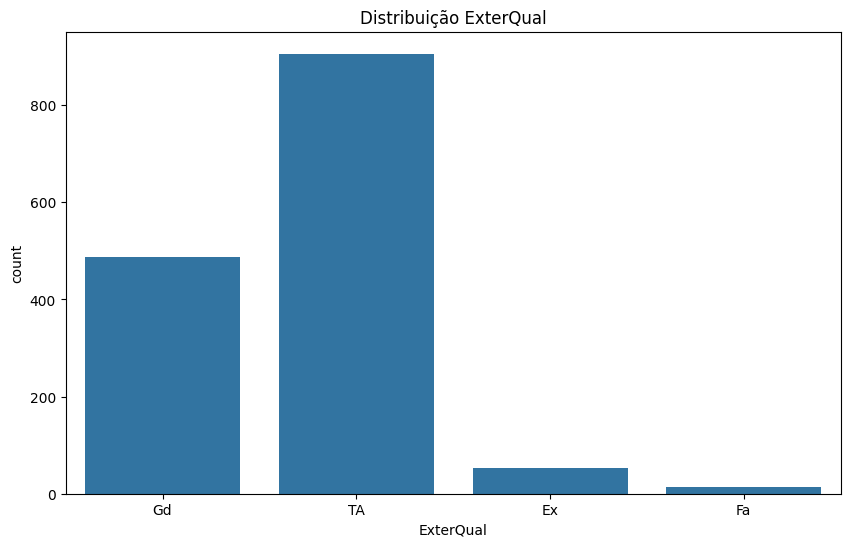

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: ExterCond
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação ExterCond: None
dados faltantes ExterCond: 0
variações das ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']


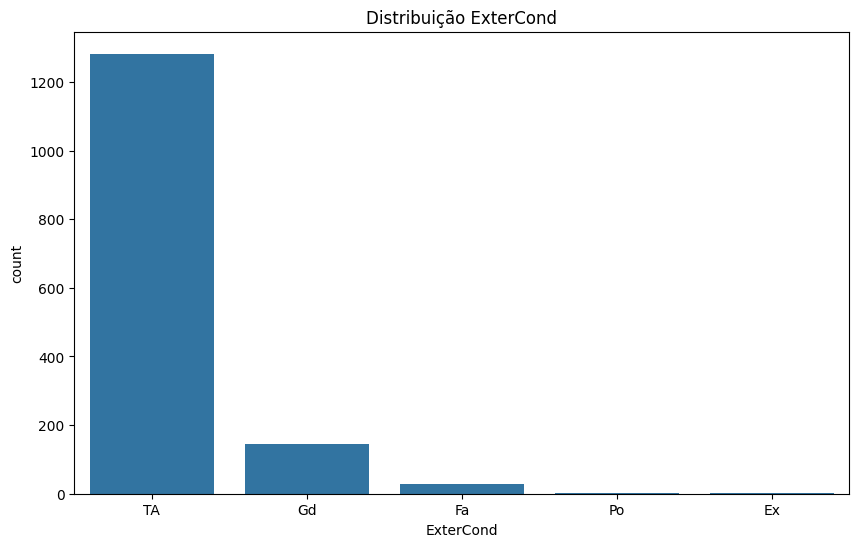

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Foundation
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Foundation: None
dados faltantes Foundation: 0
variações das Foundation: ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


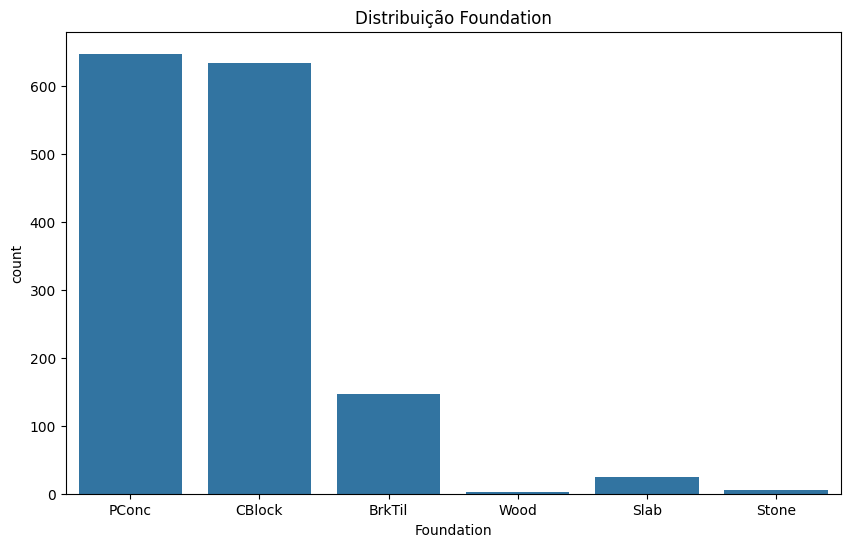

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtQual
Non-Null Count  Dtype 
--------------  ----- 
1423 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação BsmtQual: None
dados faltantes BsmtQual: 37
variações das BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']


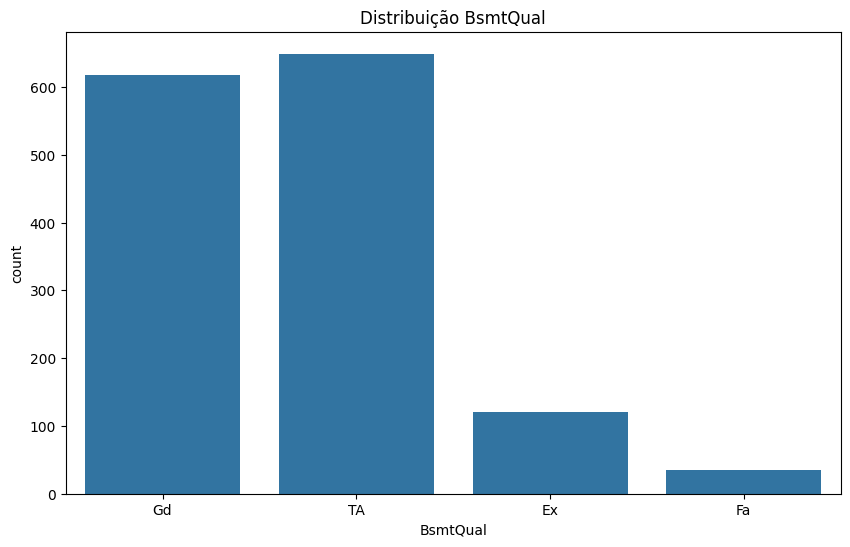

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtCond
Non-Null Count  Dtype 
--------------  ----- 
1423 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação BsmtCond: None
dados faltantes BsmtCond: 37
variações das BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']


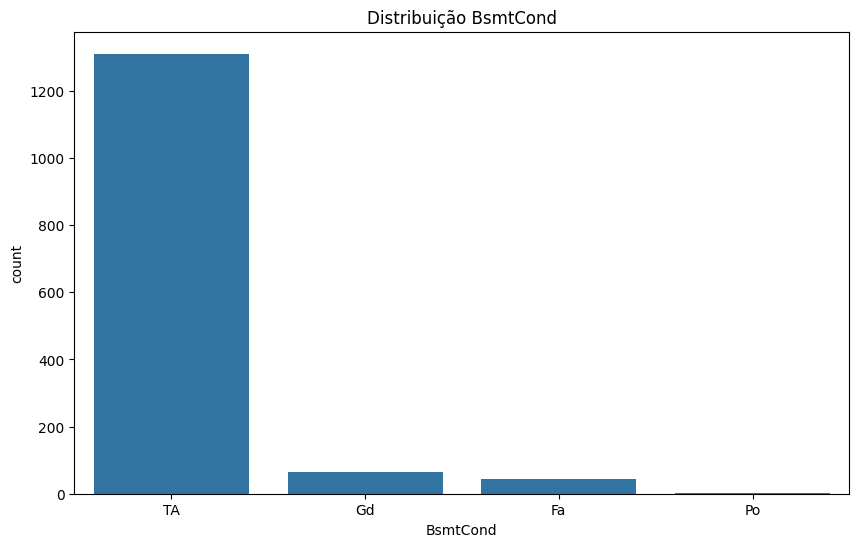

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtExposure
Non-Null Count  Dtype 
--------------  ----- 
1422 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação BsmtExposure: None
dados faltantes BsmtExposure: 38
variações das BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]


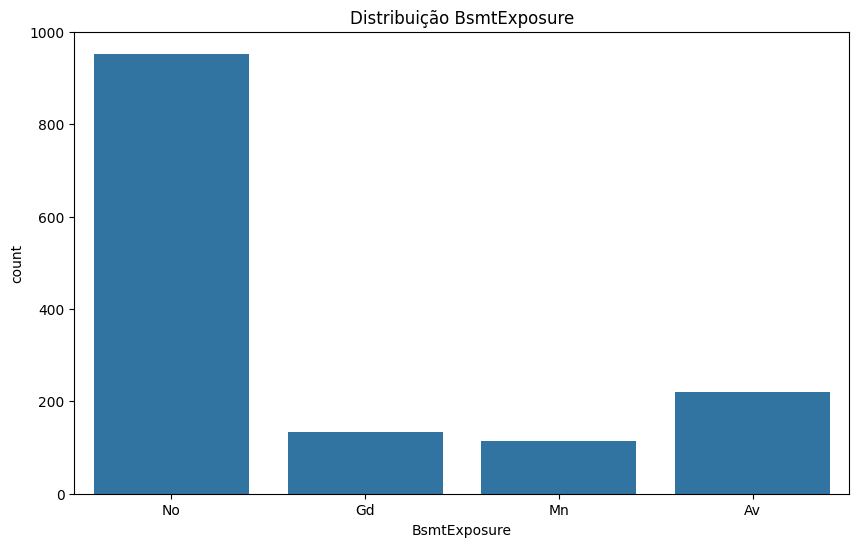

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtFinType1
Non-Null Count  Dtype 
--------------  ----- 
1423 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação BsmtFinType1: None
dados faltantes BsmtFinType1: 37
variações das BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


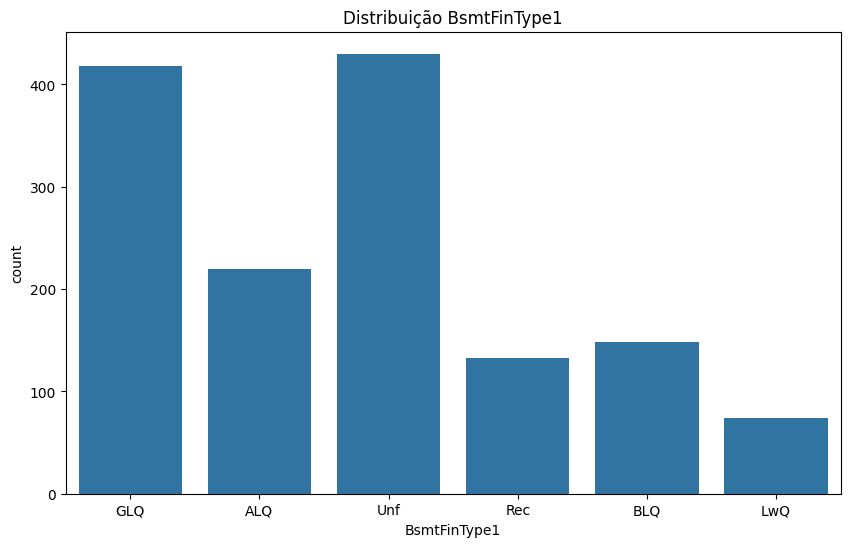

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtFinType2
Non-Null Count  Dtype 
--------------  ----- 
1422 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação BsmtFinType2: None
dados faltantes BsmtFinType2: 38
variações das BsmtFinType2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


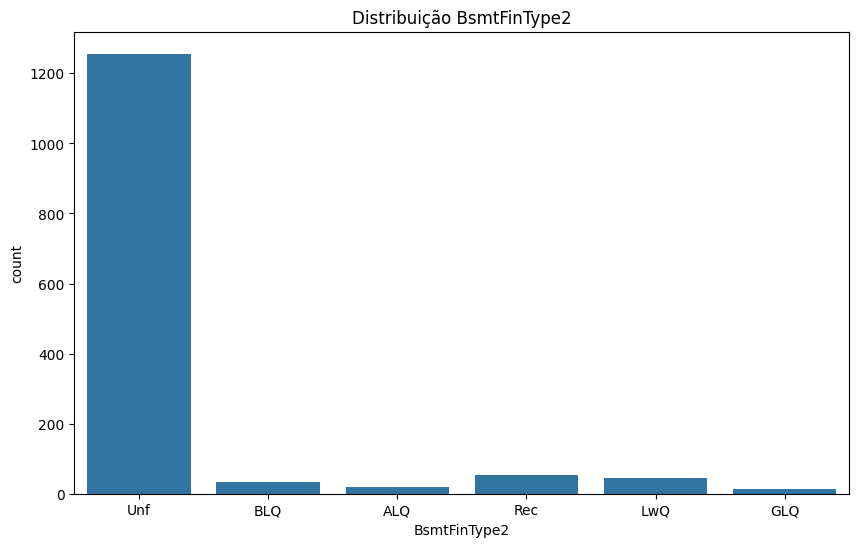

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Heating
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Heating: None
dados faltantes Heating: 0
variações das Heating: ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


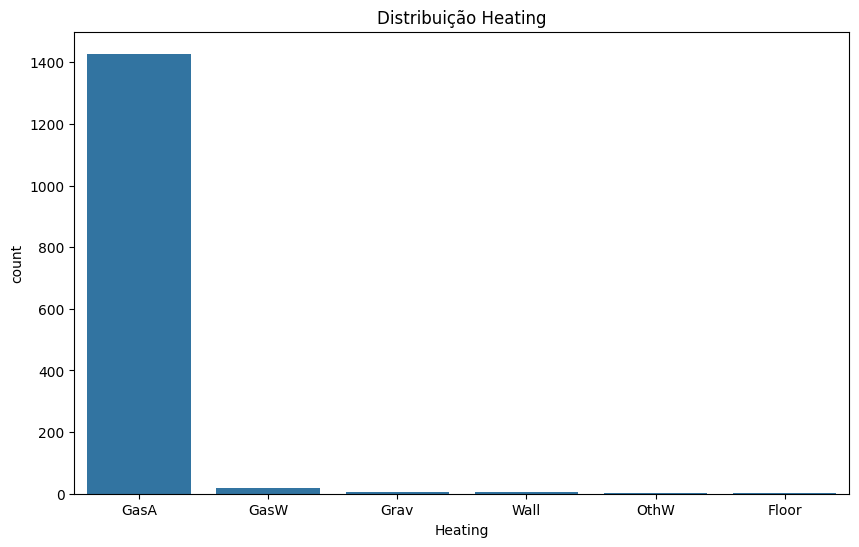

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: HeatingQC
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação HeatingQC: None
dados faltantes HeatingQC: 0
variações das HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']


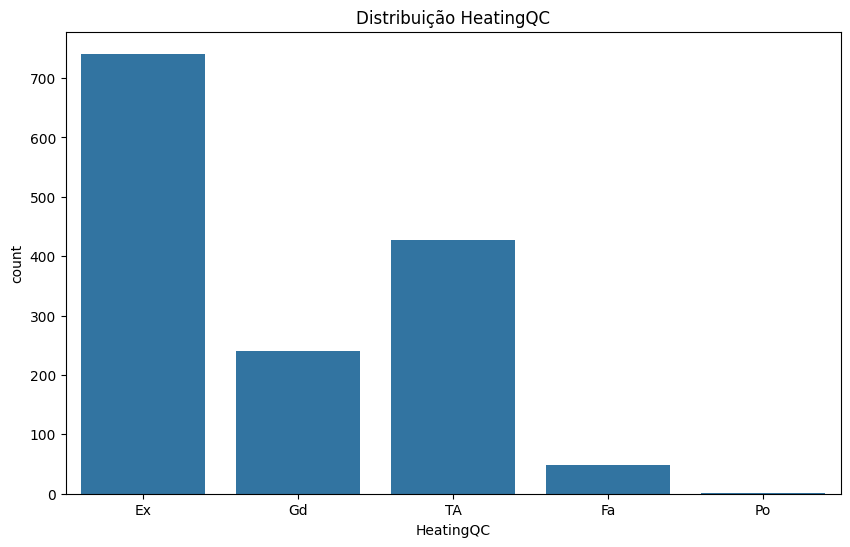

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: CentralAir
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação CentralAir: None
dados faltantes CentralAir: 0
variações das CentralAir: ['Y' 'N']


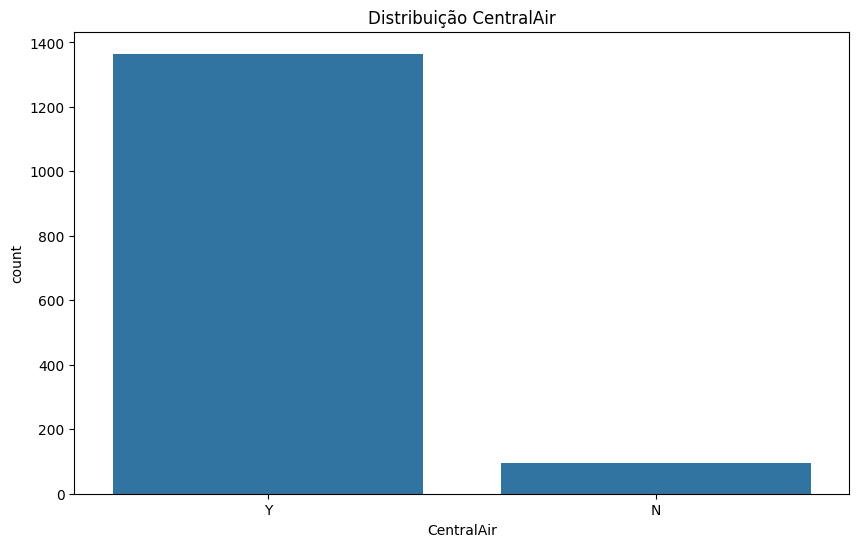

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Electrical
Non-Null Count  Dtype 
--------------  ----- 
1459 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Electrical: None
dados faltantes Electrical: 1
variações das Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


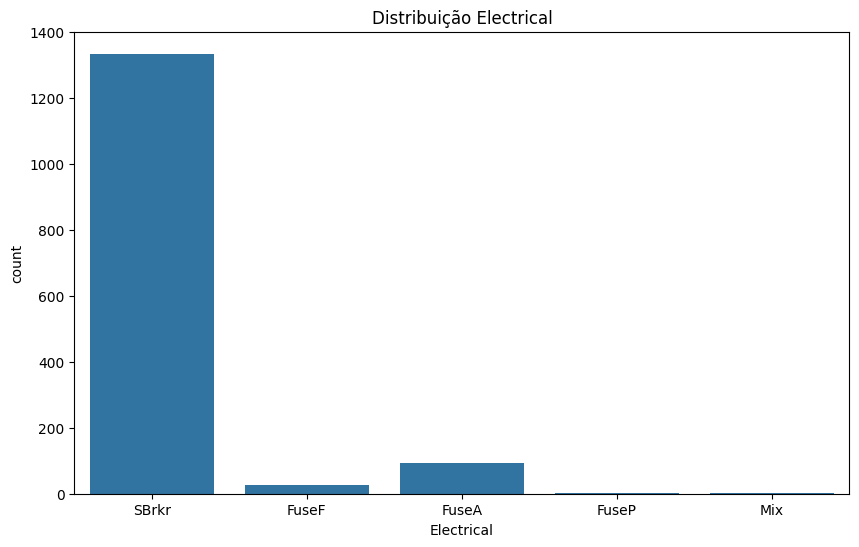

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: KitchenQual
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação KitchenQual: None
dados faltantes KitchenQual: 0
variações das KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']


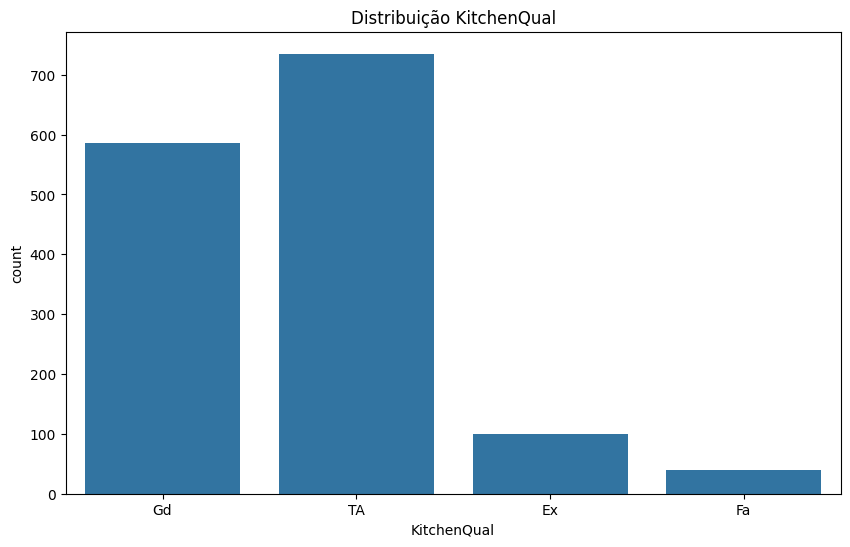

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Functional
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação Functional: None
dados faltantes Functional: 0
variações das Functional: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


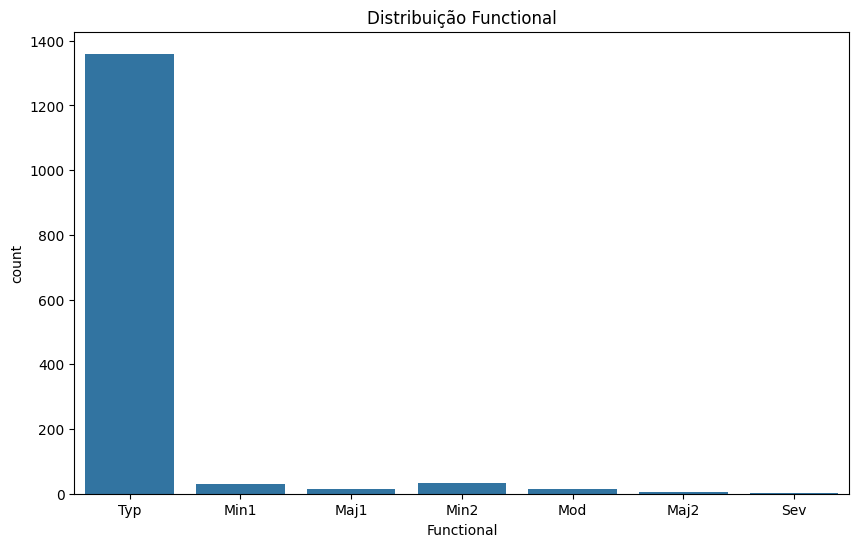

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: FireplaceQu
Non-Null Count  Dtype 
--------------  ----- 
770 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB
informação FireplaceQu: None
dados faltantes FireplaceQu: 690
variações das FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


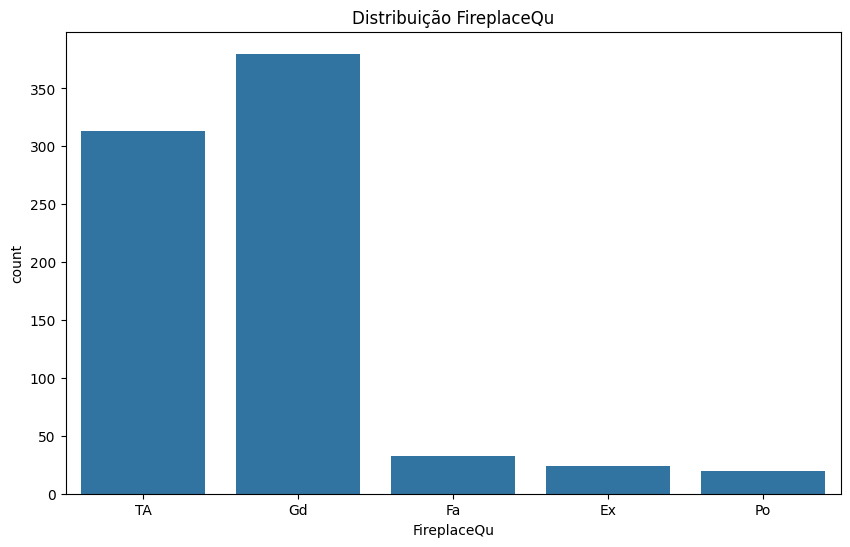

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageType
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação GarageType: None
dados faltantes GarageType: 81
variações das GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


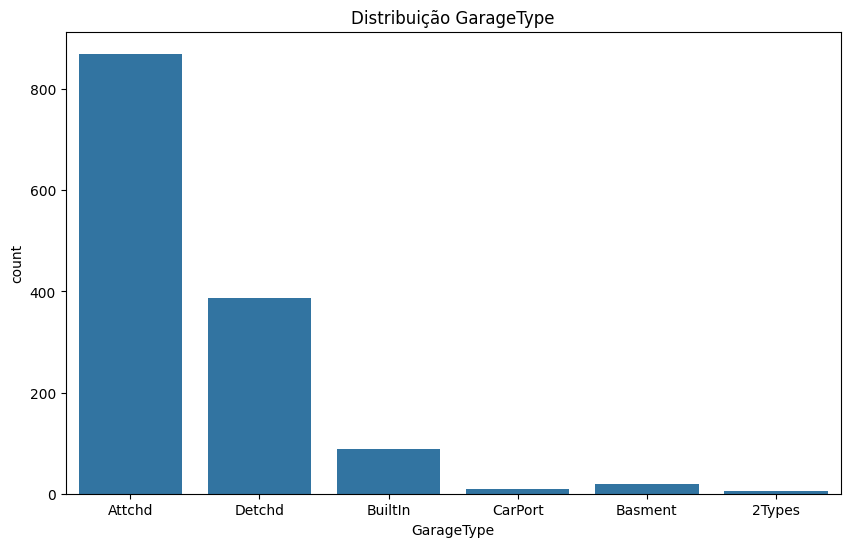

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageFinish
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação GarageFinish: None
dados faltantes GarageFinish: 81
variações das GarageFinish: ['RFn' 'Unf' 'Fin' nan]


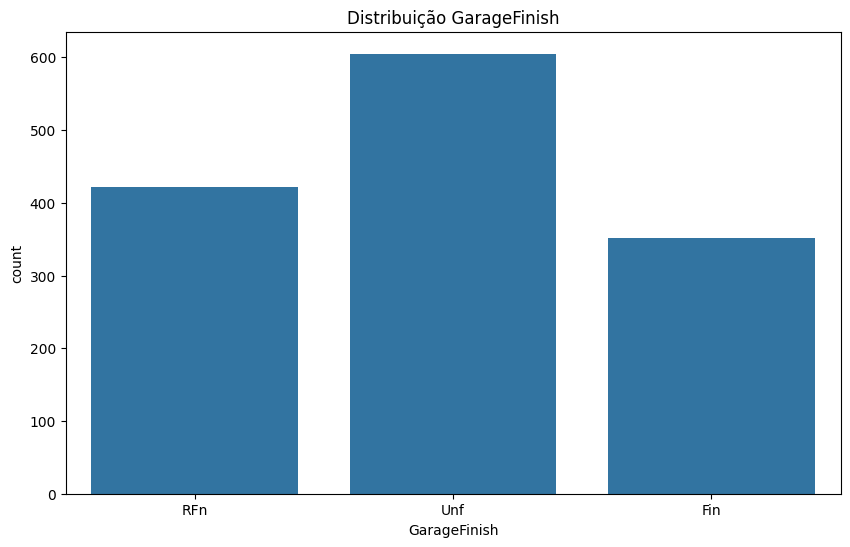

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageQual
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação GarageQual: None
dados faltantes GarageQual: 81
variações das GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


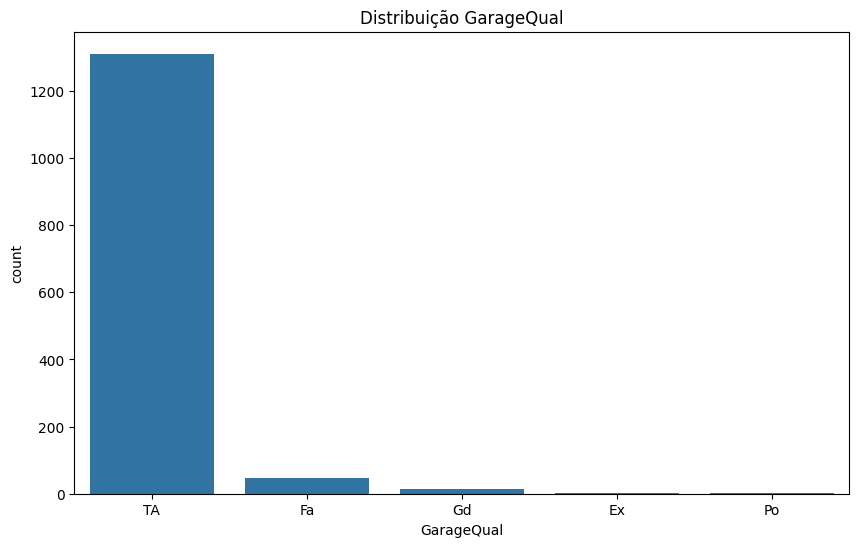

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageCond
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação GarageCond: None
dados faltantes GarageCond: 81
variações das GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


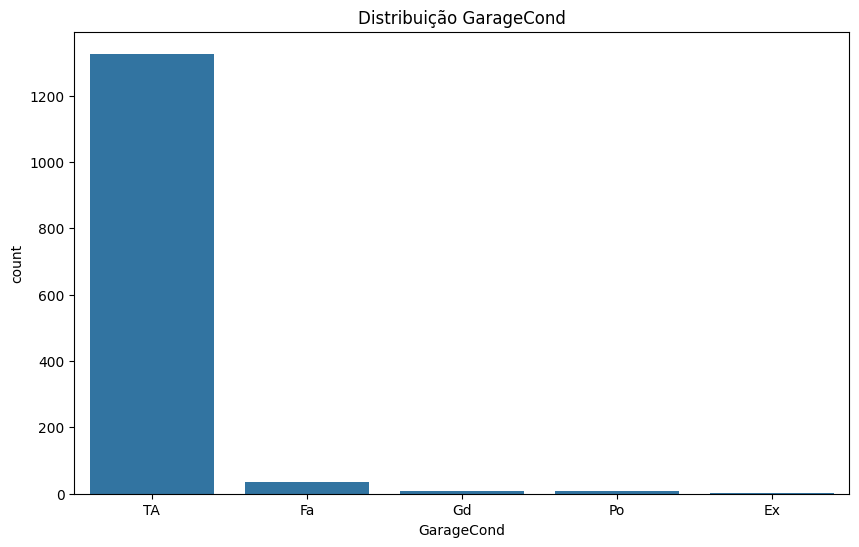

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: PavedDrive
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação PavedDrive: None
dados faltantes PavedDrive: 0
variações das PavedDrive: ['Y' 'N' 'P']


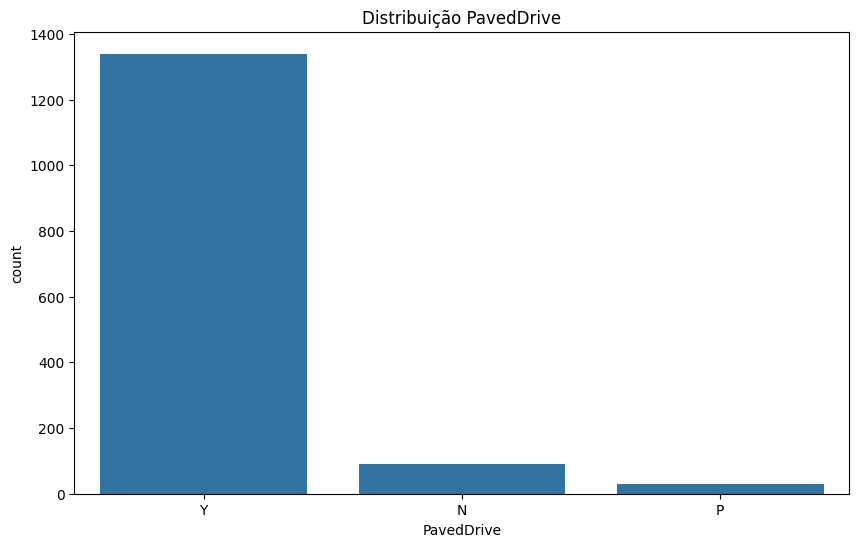

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: PoolQC
Non-Null Count  Dtype 
--------------  ----- 
7 non-null      object
dtypes: object(1)
memory usage: 11.5+ KB
informação PoolQC: None
dados faltantes PoolQC: 1453
variações das PoolQC: [nan 'Ex' 'Fa' 'Gd']


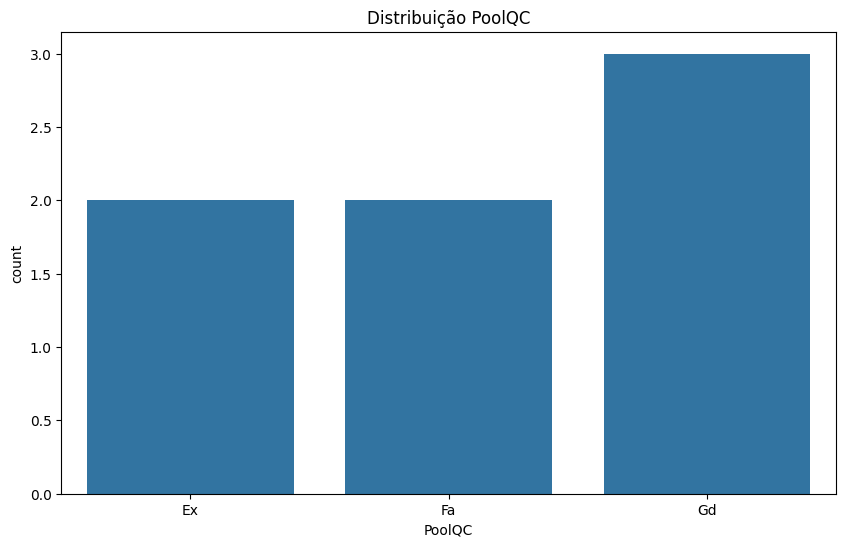

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Fence
Non-Null Count  Dtype 
--------------  ----- 
281 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB
informação Fence: None
dados faltantes Fence: 1179
variações das Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


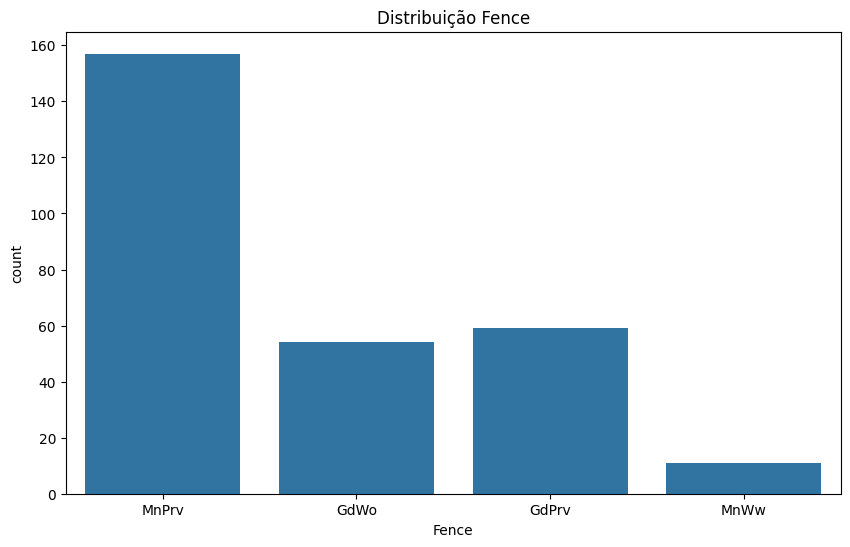

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MiscFeature
Non-Null Count  Dtype 
--------------  ----- 
54 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB
informação MiscFeature: None
dados faltantes MiscFeature: 1406
variações das MiscFeature: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


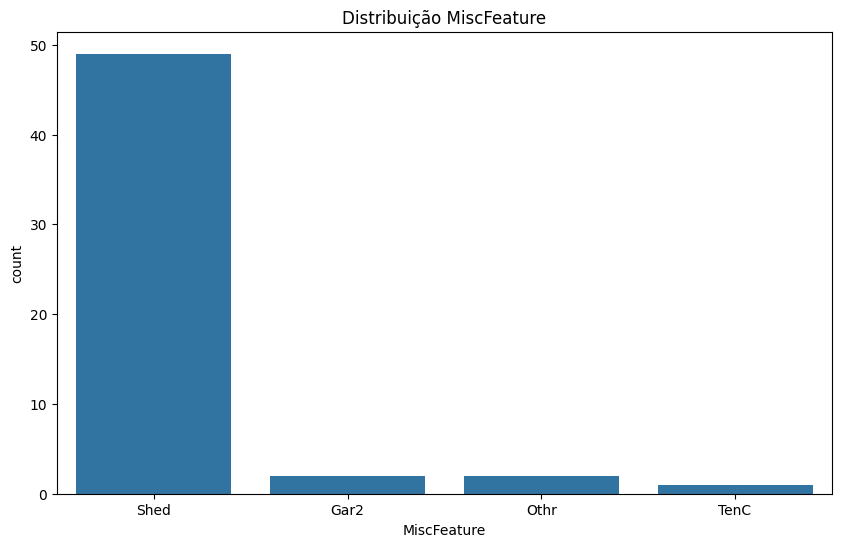

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SaleType
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação SaleType: None
dados faltantes SaleType: 0
variações das SaleType: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


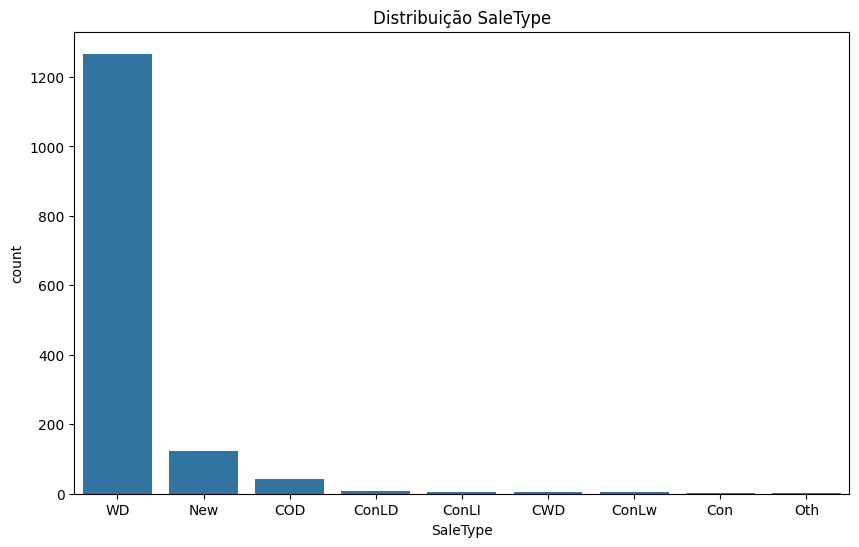

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SaleCondition
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
informação SaleCondition: None
dados faltantes SaleCondition: 0
variações das SaleCondition: ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


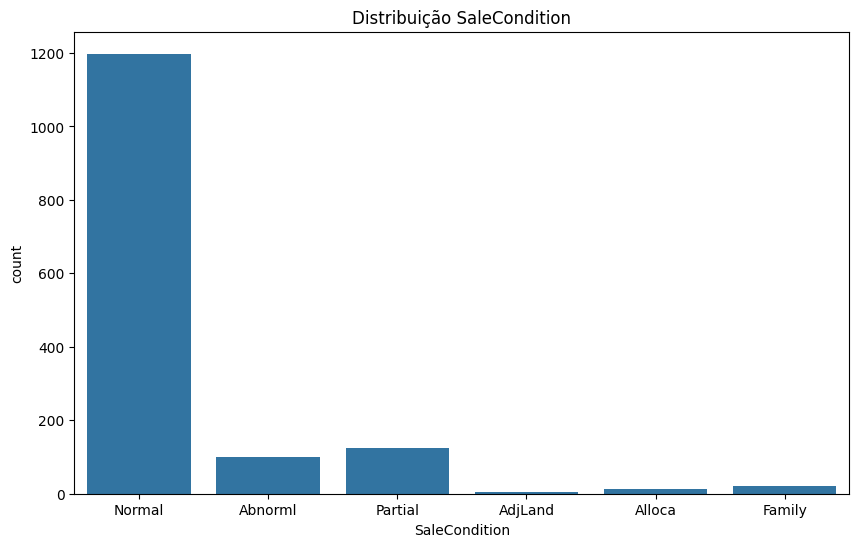

In [21]:

# gráfico displot
def displot(data, coluna):
    plt.figure(figsize=(10, 6))
    sns.displot(data[coluna], kde=True, kind='hist')
    plt.title(f'Distribuição {coluna}')
    plt.show()

# gráfico de boxplot
def boxplot(data, coluna):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, y=train_df[coluna])
    plt.title(f'Distribuição {coluna}')
    plt.show()

# gráfico de countplot
def countplot(data, coluna):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=coluna, data=data)
    plt.title(f'Distribuição {coluna}')
    plt.show()


for coluna in numeral_colunas:
    print(f'informação {coluna}: {train_df[coluna].info()}')
    print(f'variações das {coluna}: {train_df[coluna].unique()}')
    print(f'dados faltantes {coluna}: {train_df[coluna].isnull().sum()}')
    displot(train_df, coluna)
    boxplot(train_df, coluna)


for coluna_object in object_colunas:
    print(f'informação {coluna_object}: {train_df[coluna_object].info()}')
    print(f'dados faltantes {coluna_object}: {train_df[coluna_object].isnull().sum()}')
    print(f'variações das {coluna_object}: {train_df[coluna_object].unique()}')
    countplot(train_df, coluna_object)


### **Análise de dados faltante**

Já vimos que tem campos com dados faltantes ao imprimir com o método info(). No entanto, vamos colocar de forma gráfica para melhor observação.

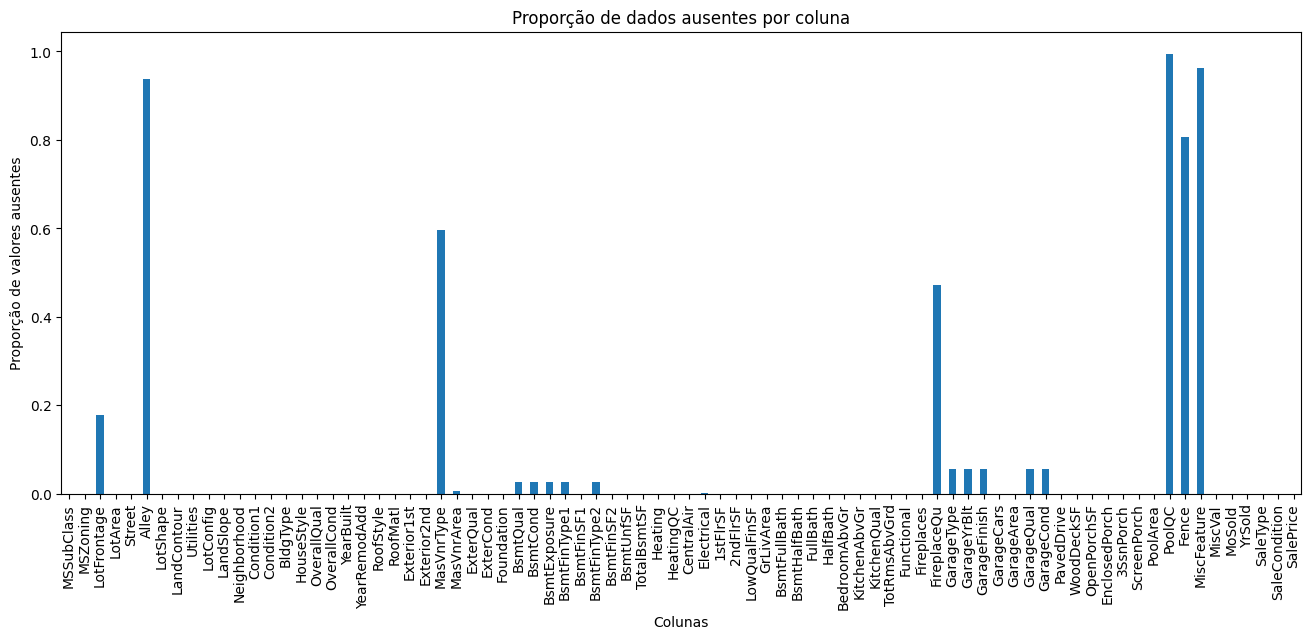

In [22]:
fig, ax = plt.subplots(figsize=(16, 6))
df_completo.isnull().mean().abs().plot.bar(ax=ax)
ax.set_title('Proporção de dados ausentes por coluna')
ax.set_xlabel('Colunas')
ax.set_ylabel('Proporção de valores ausentes')
plt.show()

<Axes: >

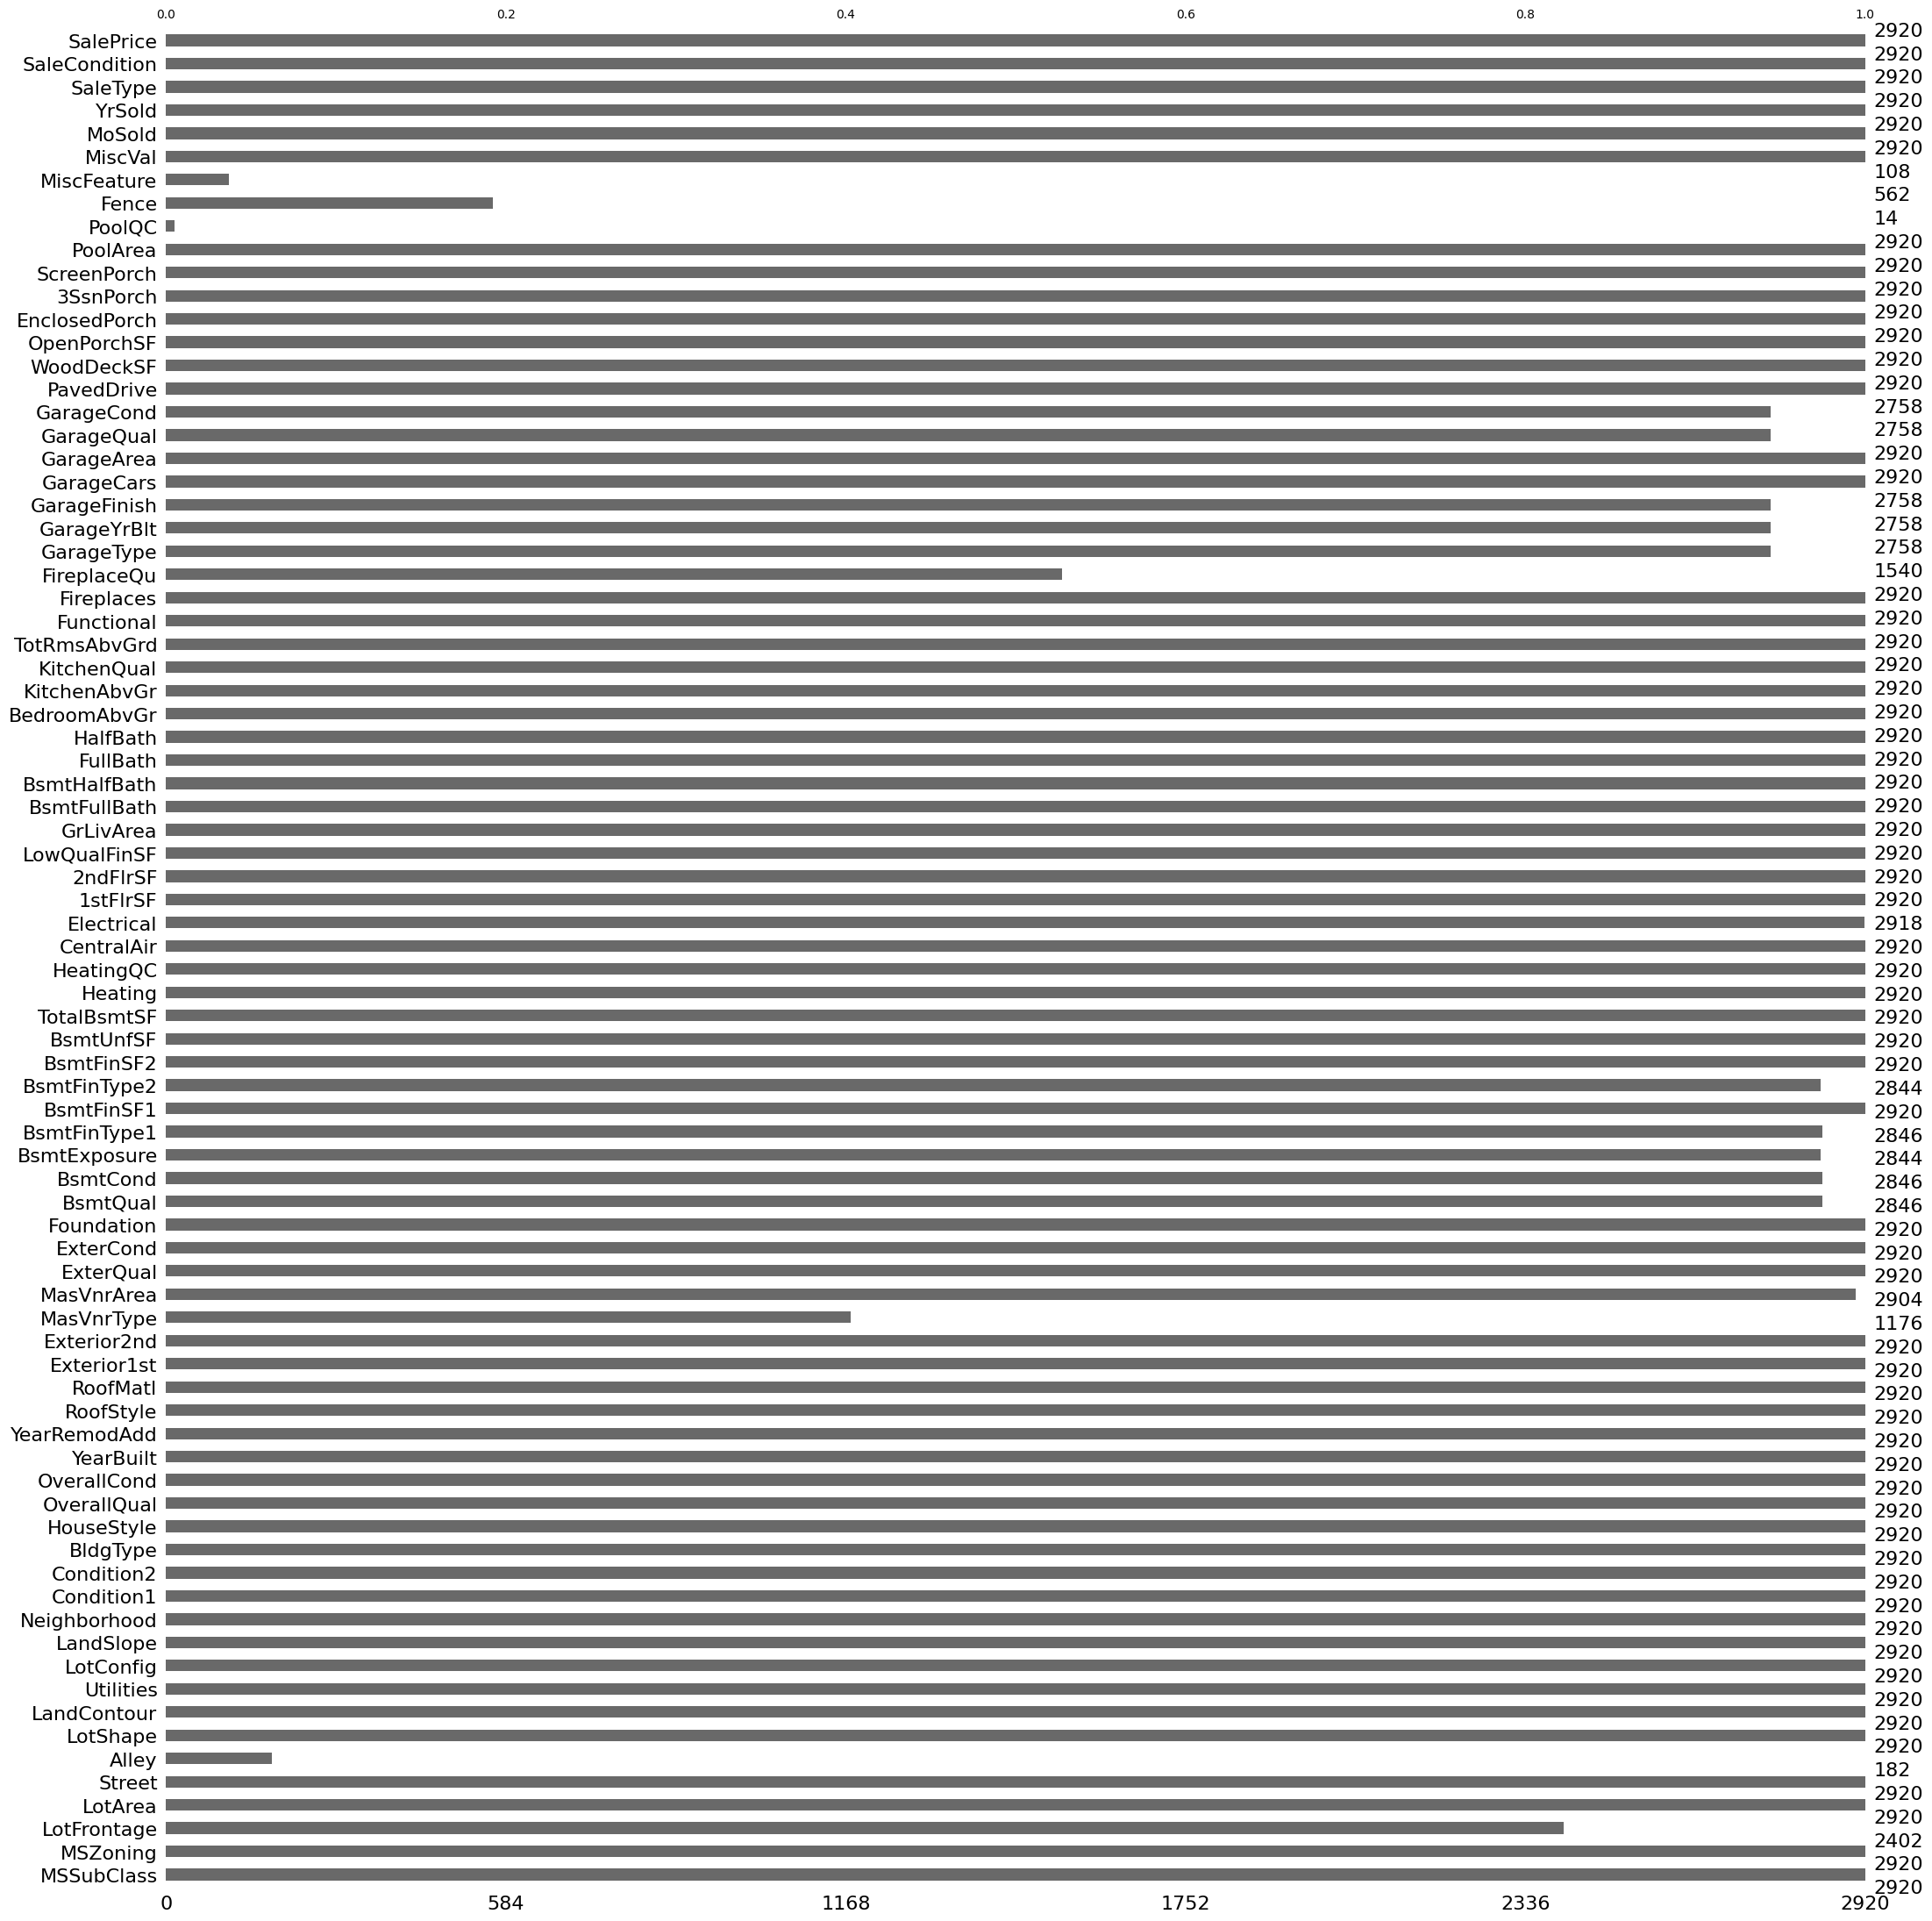

In [23]:
msno.bar(df_completo.sample(df_completo.shape[0]))

### **Tratamento dos dados ausentes**
#### **Tratando os dados com outliers e dados faltantes do tipo numérico**

In [39]:
def tratar_dados_numericos(df, colunas_numericas):
    # criar uma copia do dataframe original
    df_tratado = df.copy(deep=True)

    # Para evitar duplicidade vou resetar o indice
    df_tratado = df_tratado.reset_index(drop=True)

    # coluna que não devem ter outliers removidos YearBuilt
    colunas_sem_outliers = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 
                           'MoSold', 'YrSold', 'BsmtFullBath', 'BsmtHalfBath', 
                           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                           'Fireplaces', 'GarageCars']
    
    # colunas que podem ter outliers tratados
    colunas_com_outliers = [
        col for col in colunas_numericas
        if col not in colunas_sem_outliers
    ]

    # Tratamento de valores faltantes
    for coluna in colunas_numericas:
        if df_tratado[coluna].isnull().any():
            if coluna == 'GarageYrBlt':
                # Pega a data da garagem do ano da construção
                df_tratado[coluna] = df_tratado[coluna].fillna(df_tratado['YearBuilt'])
            elif coluna == 'LotFrontage':
                # calcular a mediana 
                medianas_bairro = df_tratado.groupby('Neighborhood')[coluna].transform('median')
                df_tratado[coluna] = df_tratado[coluna].fillna(medianas_bairro)
            elif coluna in ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
                df_tratado[coluna] = df_tratado[coluna].fillna(0)
            else:
                df_tratado[coluna] = df_tratado[coluna].fillna(df_tratado[coluna].median())

    # tratamento de outlier
    for coluna in colunas_com_outliers:
        Q1 = df_tratado[coluna].quantile(0.25)
        Q3 = df_tratado[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        df_tratado[coluna] = df_tratado[coluna].clip(lower=limite_inferior, upper=limite_superior)

    return df_tratado

In [25]:
def definir_tipo_encoding():
    encoding_map = {
        'ordinal': {
            'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade externa
            'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Condição externa
            'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade do porão
            'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Condição do porão
            'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade do aquecimento
            'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade da cozinha
            'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade da lareira
            'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade da garagem
            'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Condição da garagem
            'PoolQC': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade da piscina
            'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],  # Forma do lote (mais irregular para mais regular)
            'LandSlope': ['Sev', 'Mod', 'Gtl'],  # Inclinação do terreno
            'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],  # Exposição do porão
            'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Tipo de acabamento do porão 1
            'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Tipo de acabamento do porão 2
            'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Funcionalidade
            'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],  # Acabamento da garagem
        },
        
        'label': [
            'MSZoning',      # Zona
            'Street',        # Tipo de rua
            'Alley',        # Beco
            'LandContour',   # Contorno do terreno
            'Utilities',     # Utilidades
            'LotConfig',     # Configuração do lote
            'Neighborhood',  # Vizinhança
            'Condition1',    # Condição 1
            'Condition2',    # Condição 2
            'BldgType',      # Tipo de construção
            'HouseStyle',    # Estilo da casa
            'RoofStyle',     # Estilo do telhado
            'RoofMatl',      # Material do telhado
            'Exterior1st',   # Material exterior 1
            'Exterior2nd',   # Material exterior 2
            'MasVnrType',    # Tipo de alvenaria
            'Foundation',    # Fundação
            'Heating',       # Aquecimento
            'CentralAir',    # Ar central
            'Electrical',    # Sistema elétrico
            'GarageType',    # Tipo de garagem
            'PavedDrive',    # Entrada pavimentada
            'Fence',         # Cerca
            'MiscFeature',   # Característica diversa
            'SaleType',      # Tipo de venda
            'SaleCondition'  # Condição de venda
        ]
    }
    return encoding_map

def identificar_colunas_categoricas(df):
    categoricas = df.select_dtypes(include=['object']).columns
    return list(categoricas)

def tratar_colunas_categoricas(df):
    df_tratado = df.copy()
    encoding_map = definir_tipo_encoding()
    colunas_categoricas = identificar_colunas_categoricas(df)

    for coluna in colunas_categoricas:
        if coluna in encoding_map['ordinal']:
            if 'NA' in encoding_map['ordinal'][coluna]:
                df_tratado[coluna] = df_tratado[coluna].fillna('NA')
            else:
                df_tratado[coluna] = df_tratado[coluna].fillna(encoding_map['ordinal'][coluna][0])
            ordinal_encoder = OrdinalEncoder(categories=[encoding_map['ordinal'][coluna]])
            df_tratado[coluna] = ordinal_encoder.fit_transform(df_tratado[[coluna]])
        elif coluna in encoding_map['label']:
            df_tratado[coluna] = df_tratado[coluna].fillna('NA')
            label_encoder = LabelEncoder()
            df_tratado[coluna] = label_encoder.fit_transform(df_tratado[coluna].astype(str))

    return df_tratado

def tratar_valores_ausentes_categoricos(df):
    df_tratado = df.copy()

    for coluna in df.select_dtypes(include=['object']).columns:
        moda = df[coluna].mode()[0]
        df_tratado[coluna] = df_tratado[coluna].fillna(moda)

    return df_tratado

def tratar_lot_frontage(df):
    df_tratado = df.copy()

    df_tratado['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    )
    df_tratado['LotFrontage'] = df_tratado['LotFrontage'].fillna(df['LotFrontage'].median())

    return df_tratado


## **Visualização**

### **Visualização tratamento number**

In [26]:
# Visualização de tratamento
def visualizar_tratamento_number(df_original, df_tratado, coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Garante que os dataframes tem indices unicos
    df_original = df_original.reset_index(drop=True)
    df_tratado = df_tratado.reset_index(drop=True)

    # plto com Seaborn
    sns.boxplot(data=df_original, y=coluna, ax=ax1)
    ax1.set_title(f'{coluna} - Antes do tratamento')

    sns.boxplot(data=df_tratado, y=coluna, ax=ax2)
    ax2.set_title(f'{coluna} - Depois do tratamento')

    plt.tight_layout()
    plt.show()

### **Visualização tratamento oject**

In [27]:
def visualizar_tratamento_object(df_original, df_tratado, colunas=None):
    if colunas is None:
        colunas = df_original.select_dtypes(include=['object']).columns
    for coluna in colunas:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(f'Distribuição da coluna: {coluna}')

        # Plot original
        if df_original[coluna].dtype == 'object':
            contar_valor = df_original[coluna].value_counts()
            #sns.barplot(x=contar_valor.values, y=contar_valor.index, ax=ax1)
            sns.barplot(x=contar_valor.index, y=contar_valor.values, ax=ax1)
            ax1.set_xlabel('Contagem')
        else:
            sns.histplot(data=df_original, x=coluna, ax=ax1)
        ax1.set_title('Dados Originais')
        ax1.set_ylabel('')

        nan_count = df_original[coluna].isna().sum()
        ax1.text(0.05, -0.1, f'NaN: {nan_count}', transform=ax1.transAxes, color='red')

        # plot tratado
        if isinstance(df_tratado[coluna].dtype, pd.CategoricalDtype) or df_tratado[coluna].dtype == 'object':
            contar_valor = df_tratado[coluna].value_counts()
            #sns.barplot(x=contar_valor.values, y=contar_valor.index, ax=ax2)
            sns.barplot(x=contar_valor.index, y=contar_valor.values, ax=ax2)
            ax2.set_xlabel('Contagem')
        else:
            sns.histplot(data=df_tratado, x=coluna, ax=ax2)
        ax2.set_title('Dados Tratados')
        ax2.set_ylabel('')

        nan_count_tratado = df_tratado[coluna].isna().sum()
        ax2.text(0.05, -0.1, f'NaN: {nan_count_tratado}', transform=ax2.transAxes, color='red')

        plt.tight_layout()
        plt.show()

### **Visualização da correlação**

In [28]:
def visualizar_correlacoes_encoded(df_tratado, colunas=None, limite_correlacao=0.1):
    if colunas is None:
        colunas = df_tratado.select_dtypes(include=['number']).columns

    corr_matrix = df_tratado[colunas].corr()

    corr = corr_matrix.copy()

    corr_filtrada = corr.copy()
    corr_filtrada[abs(corr) < limite_correlacao] = 0

    mask = np.triu(np.ones_like(corr_filtrada), k=1)

    plt.style.use('default')
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_filtrada)

### **Visualização da correlação**

In [29]:
def visualizar_correlacoes_encoded(df_tratado, colunas=None, limite_correlacao=0.1):    
    if colunas is None:
        colunas = df_tratado.select_dtypes(include=['number']).columns
    

    corr_matrix = df_tratado[colunas].corr()

    corr = corr_matrix.copy()

    corr_filtrada = corr.copy()
    corr_filtrada[abs(corr) < limite_correlacao] = 0

    mask = np.triu(np.ones_like(corr_filtrada), k=1)


    plt.style.use('default')
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_filtrada,
                mask=mask,
                cmap='coolwarm',
                center=0,
                annot=True,
                fmt='.2f',
                square=True,
                vmin=-1,
                vmax=1,
                cbar_kws={'shrink': .8},
                annot_kws={'size': 8})
    
    plt.title('Matriz de Correlação após Encoding', pad=20, size=16)
    plt.xticks(rotation=45, ha='right', size=8)
    plt.yticks(rotation=0, size=8)
    plt.tight_layout()
    plt.show()

### **Resumo dos tratamentos**

In [30]:
def resumo_tratamentos(df_original, df_tratado):
    print('Resumo dos Tratamentos:')
    print('-' * 50)

    # comparação de tipos
    print('\nMudanças nos tipos de dados:')
    tipos_antes = df_tratado.dtypes
    tipos_depois = df_tratado.dtypes
    for coluna in df_original.columns:
        if tipos_antes[coluna] != tipos_depois[coluna]:
            print(f'{coluna}: {tipos_antes[coluna]} -> {tipos_depois[coluna]}')

    # valores ausentes
    print('\nValores ausente antes e depois:')
    nulos_antes = df_original.isnull().sum()
    nulos_depois = df_tratado.isnull().sum()
    for coluna in df_original.columns:
        if nulos_antes[coluna] > 0:
            print(f'{coluna}: {nulos_antes[coluna]} -> {nulos_depois[coluna]}')

    
    # Cardinalizadade das variáveis categóricas
    print('\nCardinalidade das variáveis categóricas:')
    card_cols = df_original.select_dtypes(include=['object']).columns
    for coluna in card_cols:
        n_antes = df_original[coluna].nunique()
        n_depois = df_tratado[coluna].nunique()
        print(f'{coluna}: {n_antes} -> {n_depois} categoricas')

In [31]:
def verificar_tratamento(df_original, df_tratado):
    """Função para verificar o resultado do tratamento"""
    print("\nResumo do tratamento:")
    print("-" * 50)
    print("\nTipos de dados originais:")
    print(df_original.dtypes.value_counts())
    print("\nTipos de dados após tratamento:")
    print(df_tratado.dtypes.value_counts())
    print("\nColunas com valores nulos (original):")
    print(df_original.isnull().sum()[df_original.isnull().sum() > 0])
    print("\nColunas com valores nulos (tratado):")
    print(df_tratado.isnull().sum()[df_tratado.isnull().sum() > 0])

### **Visualizando as alterações que foram feito**

#### **Os primeiro do tipo  number**

In [44]:
# Executando a função tratamento dos dados numericos
df_tratado = tratar_dados_numericos(df_completo,  numeral_colunas)


In [42]:
print("Nomes de colunas duplicados:", df_completo.columns[df_completo.columns.duplicated()].tolist())
print("Todas as colunas:", df_completo.columns.tolist())

Nomes de colunas duplicados: []
Todas as colunas: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

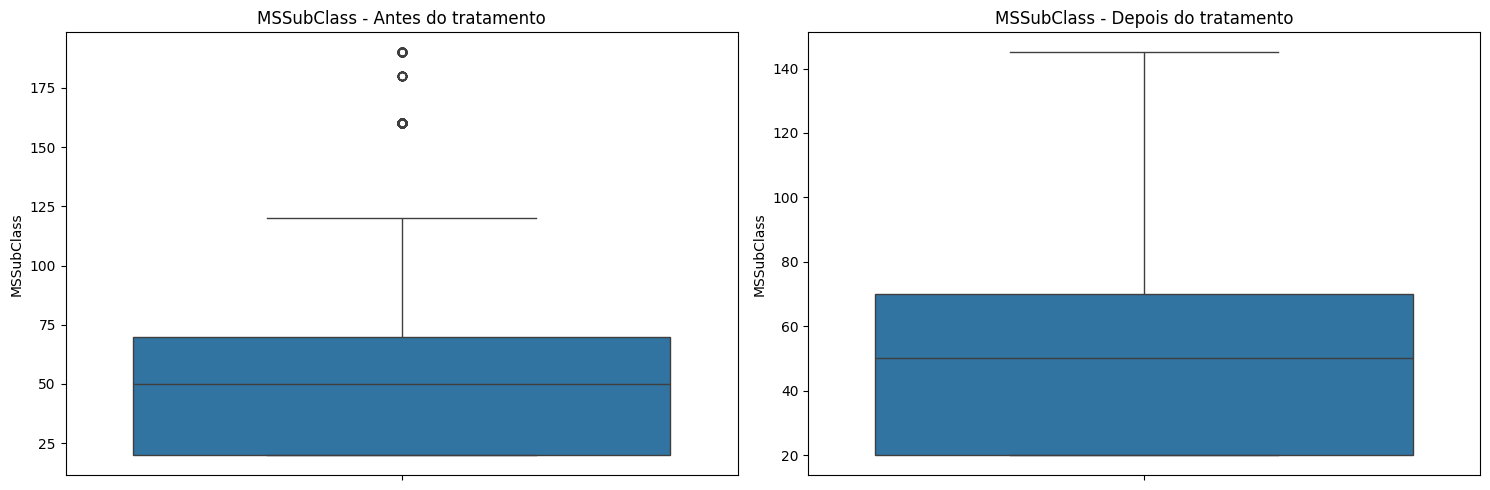

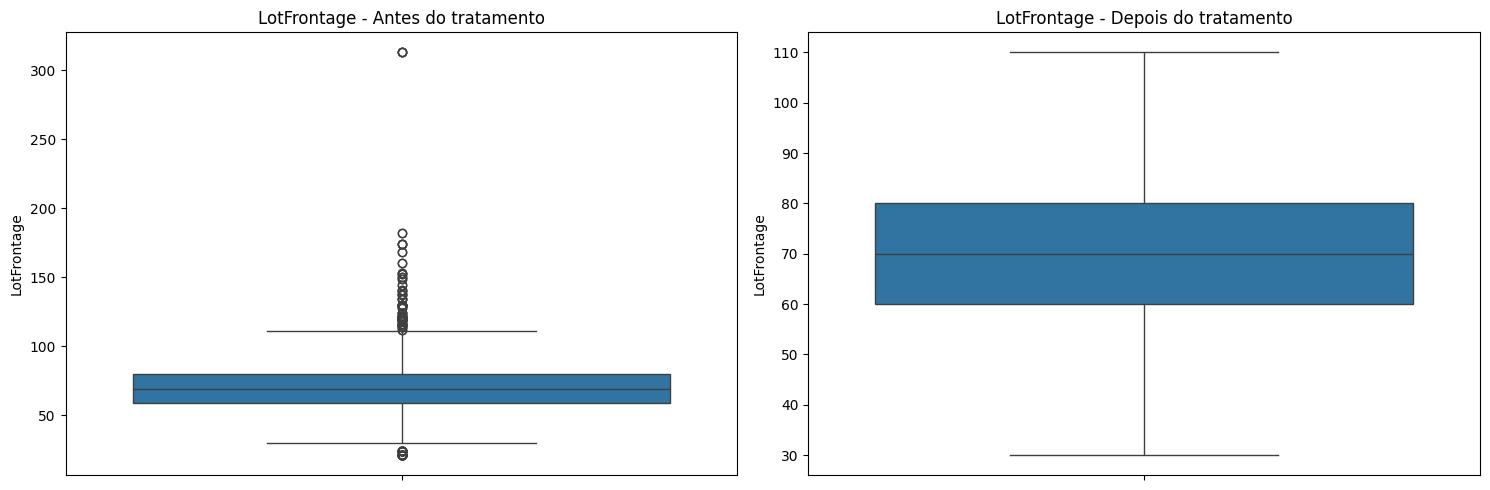

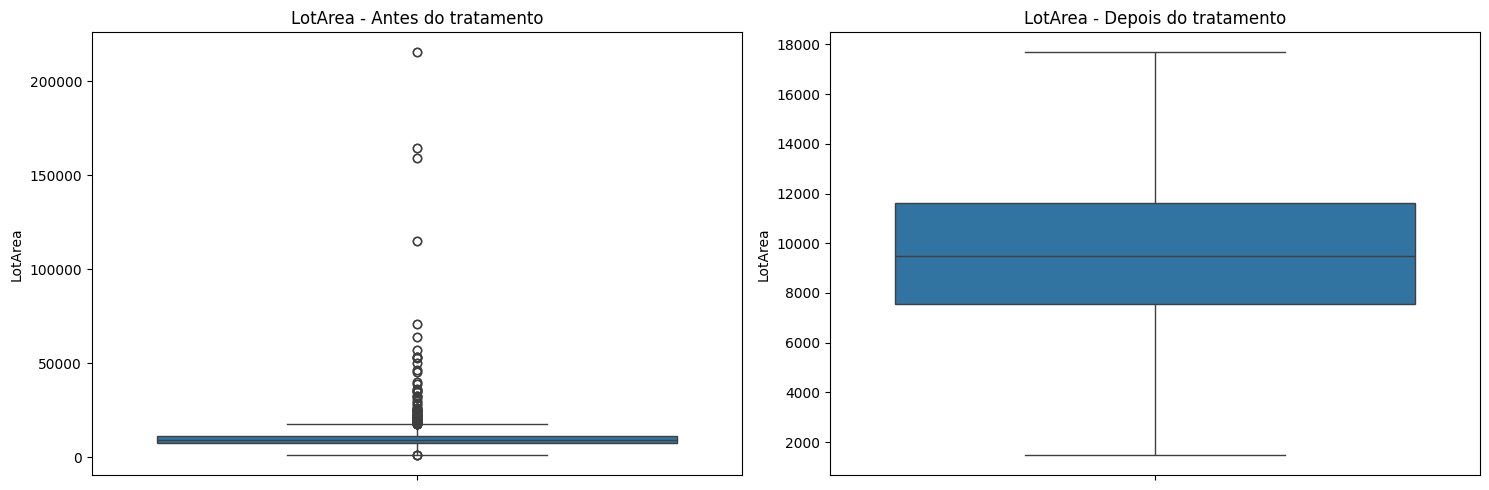

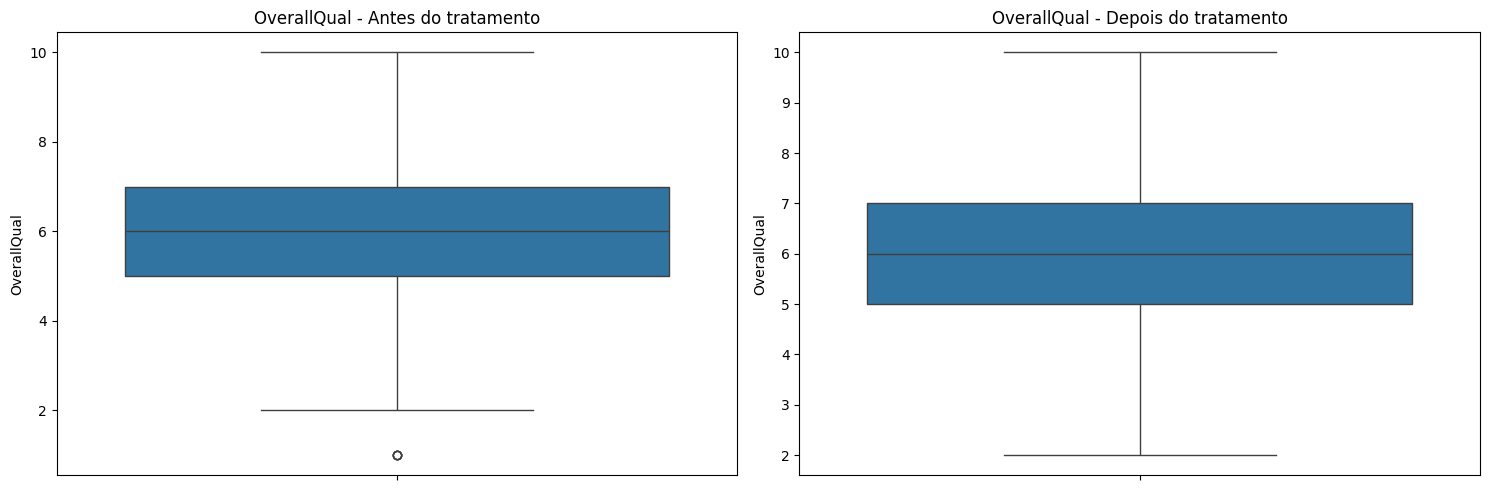

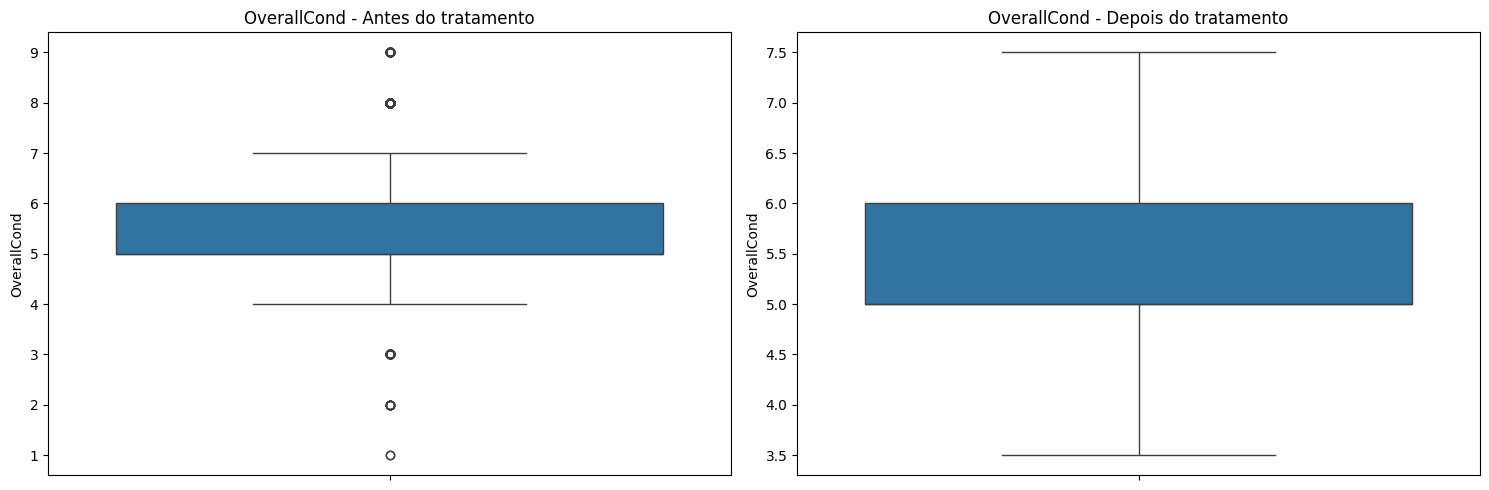

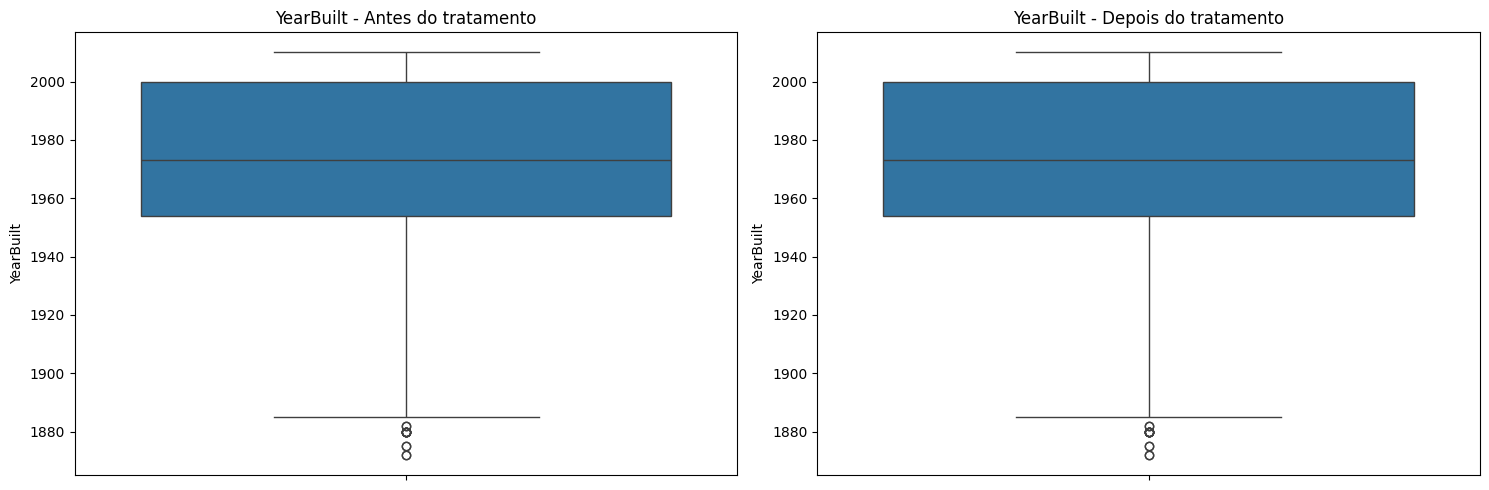

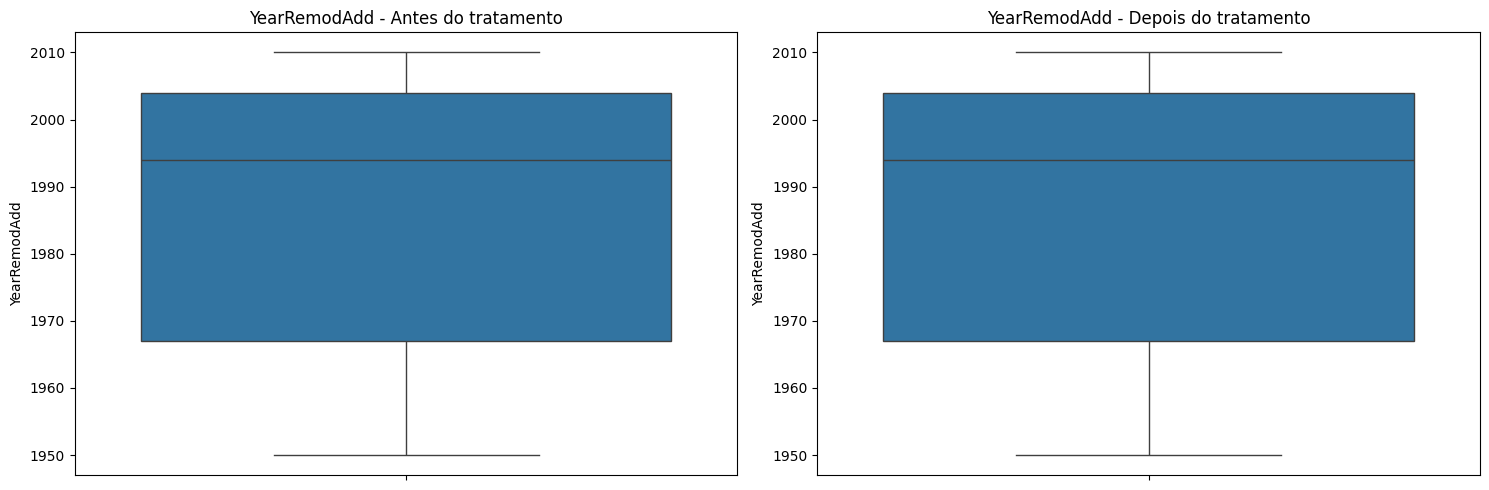

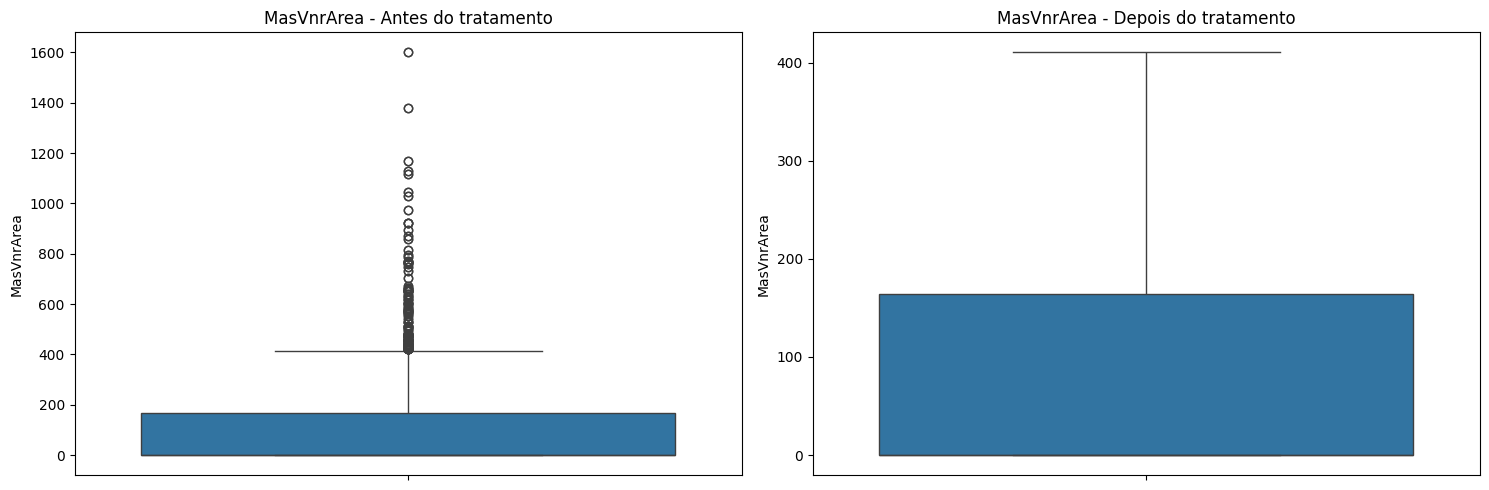

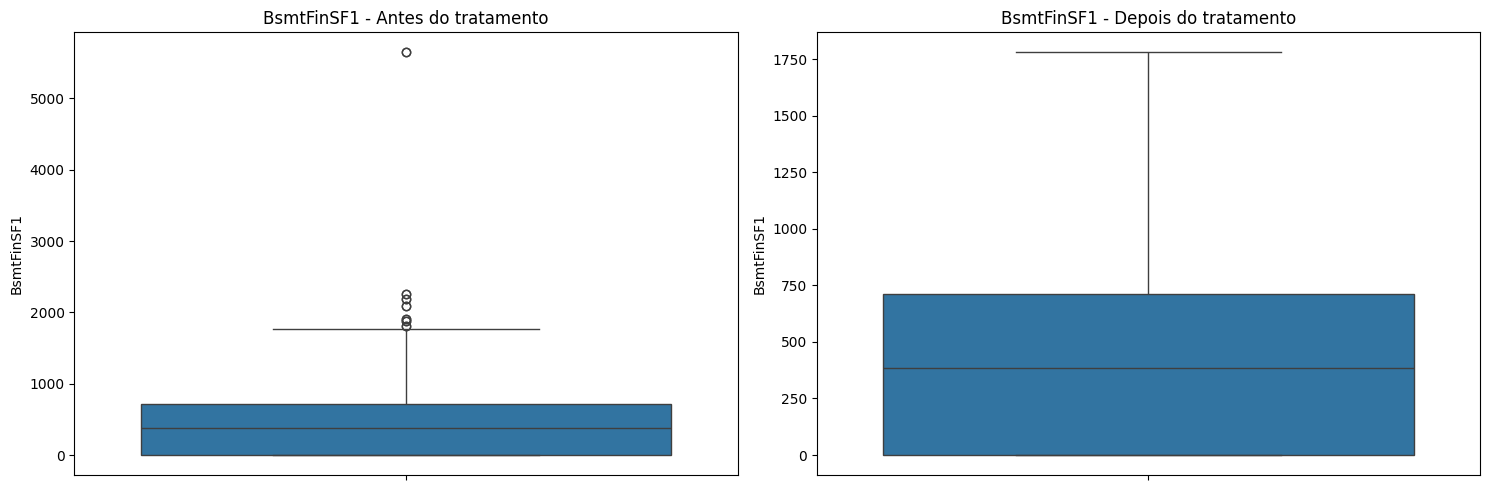

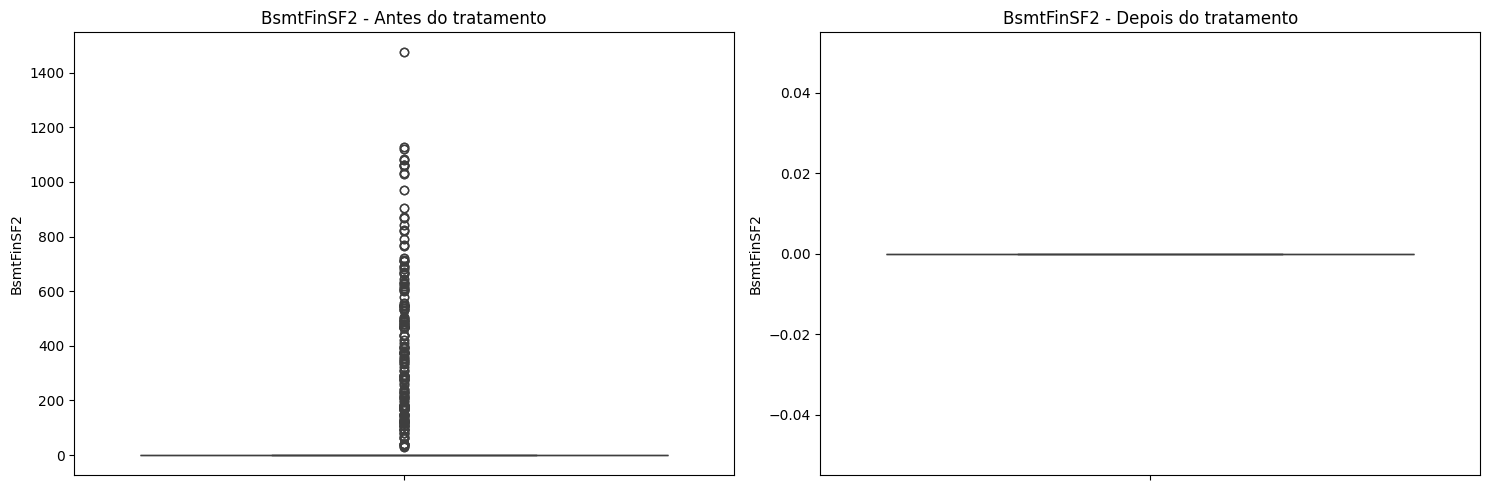

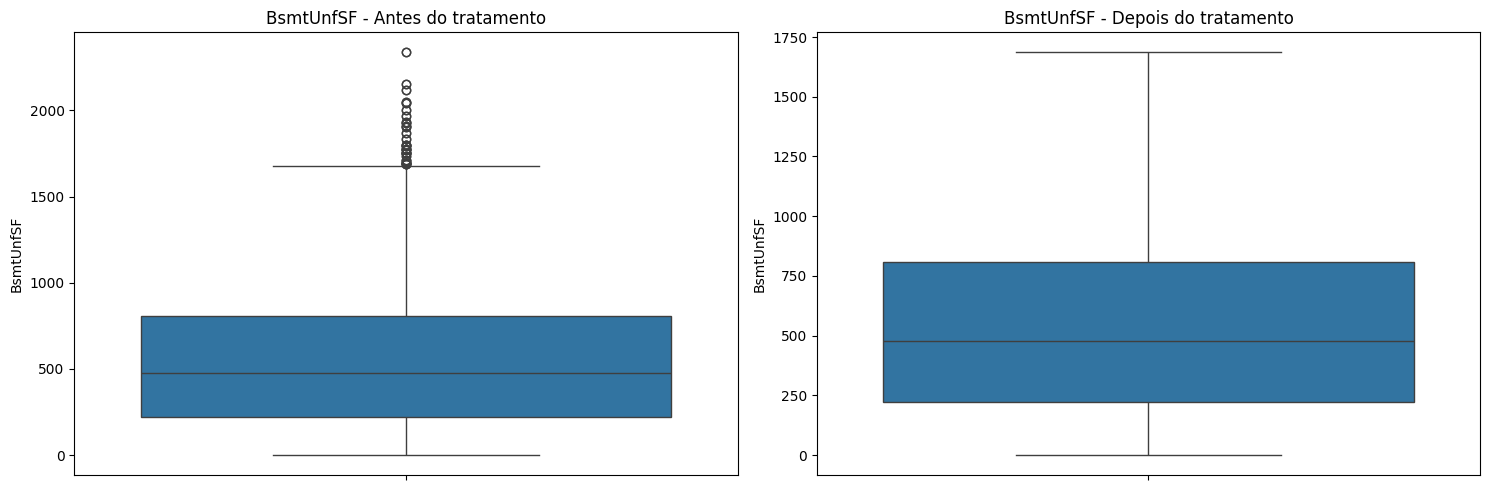

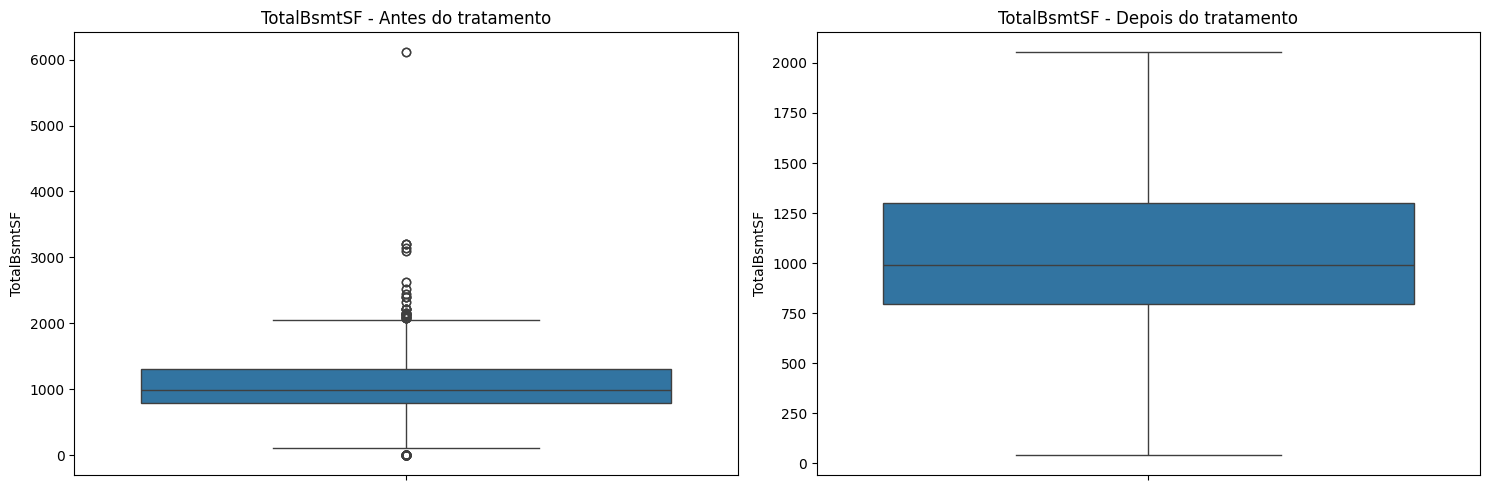

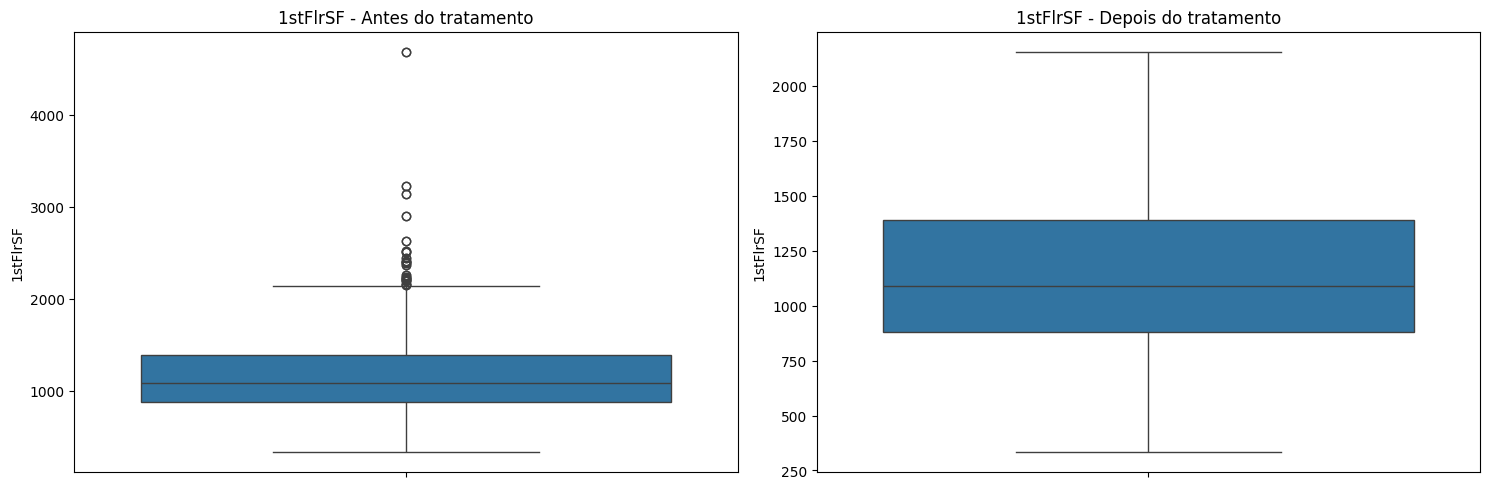

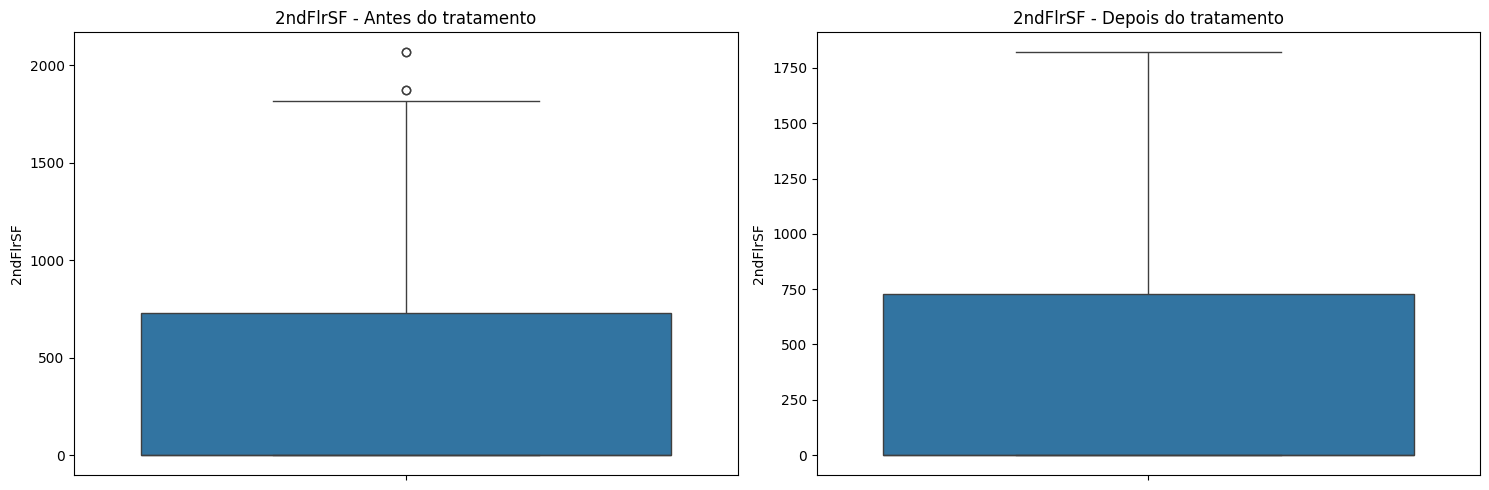

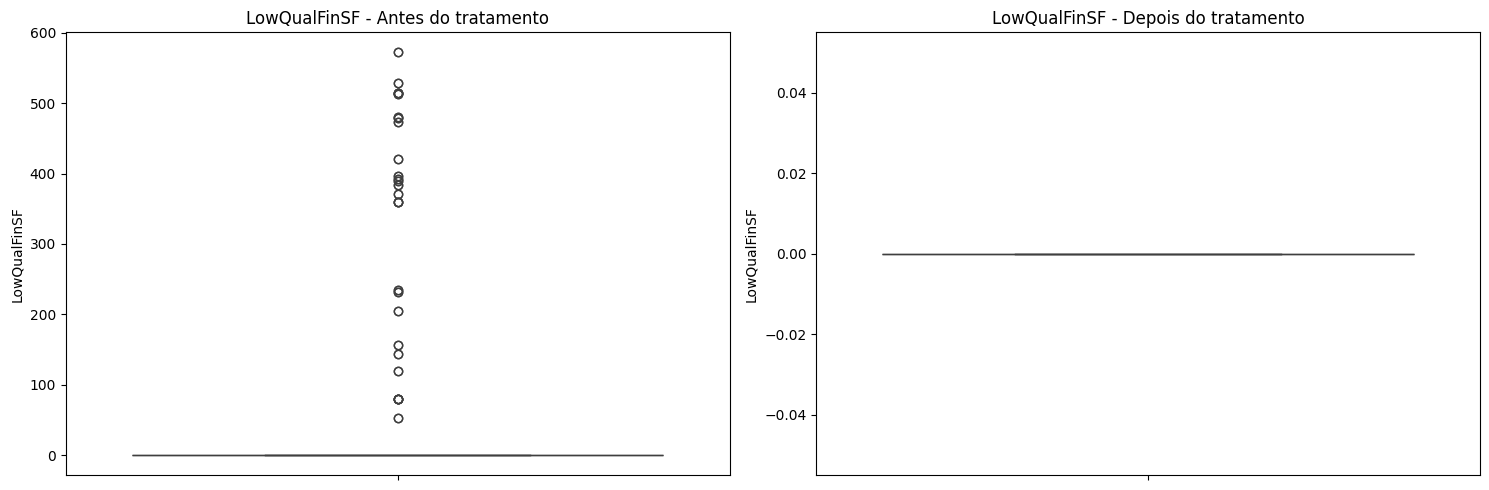

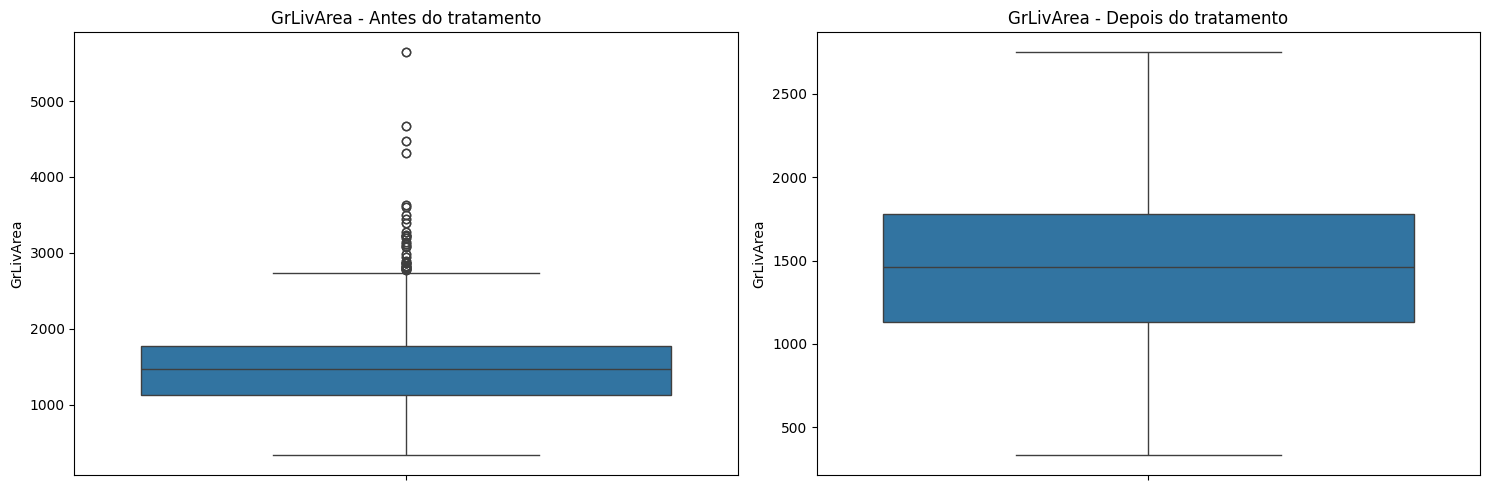

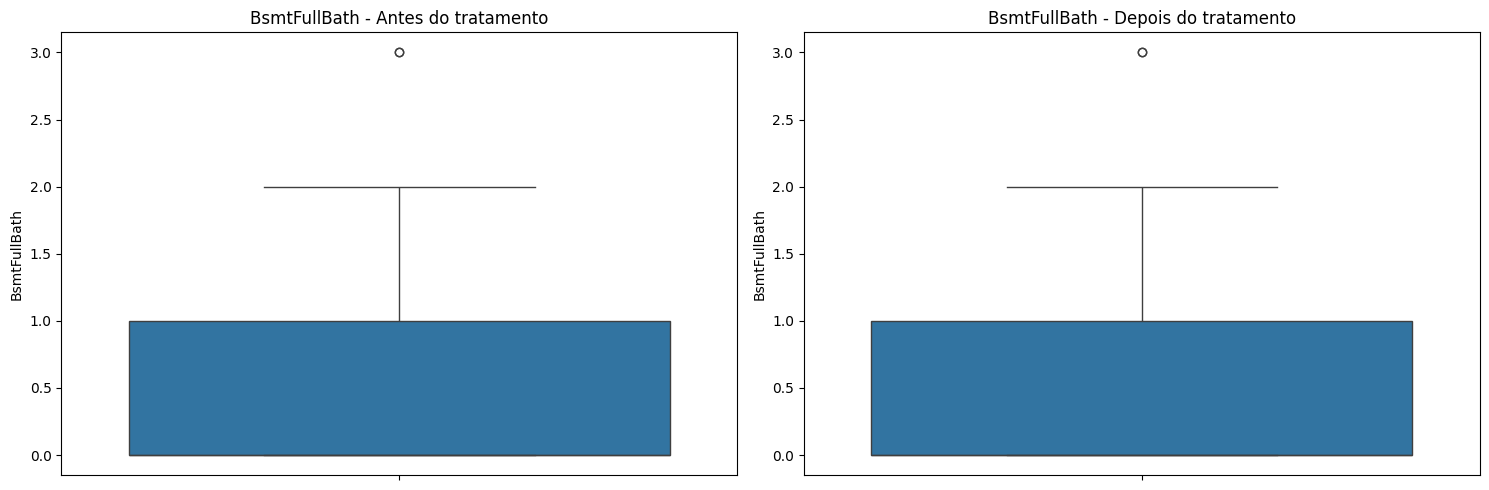

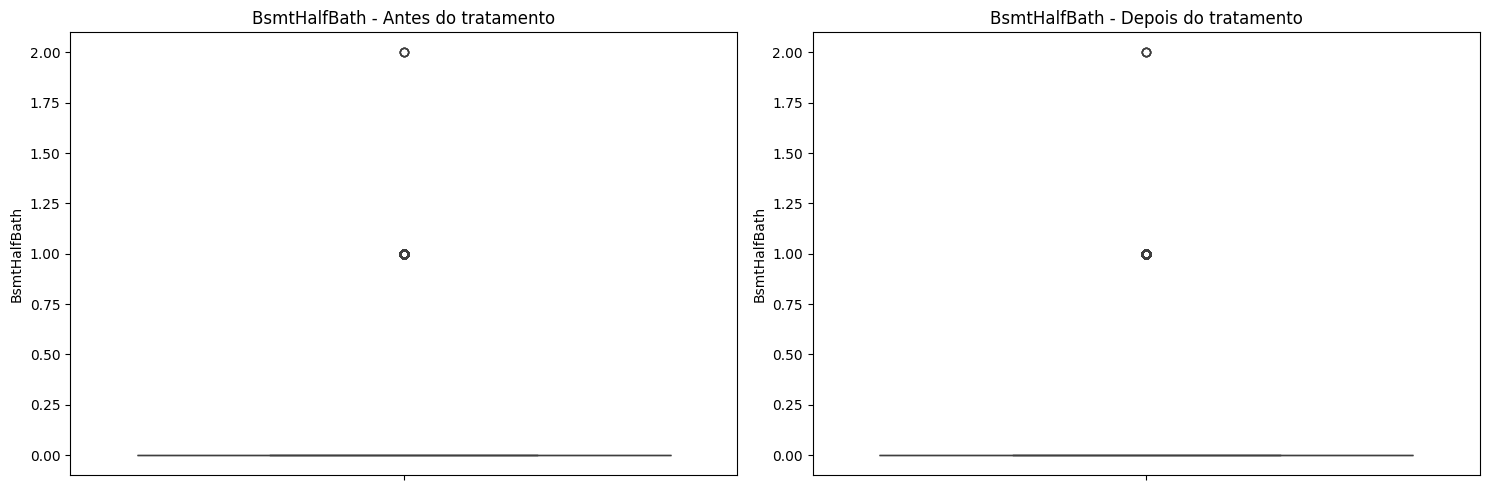

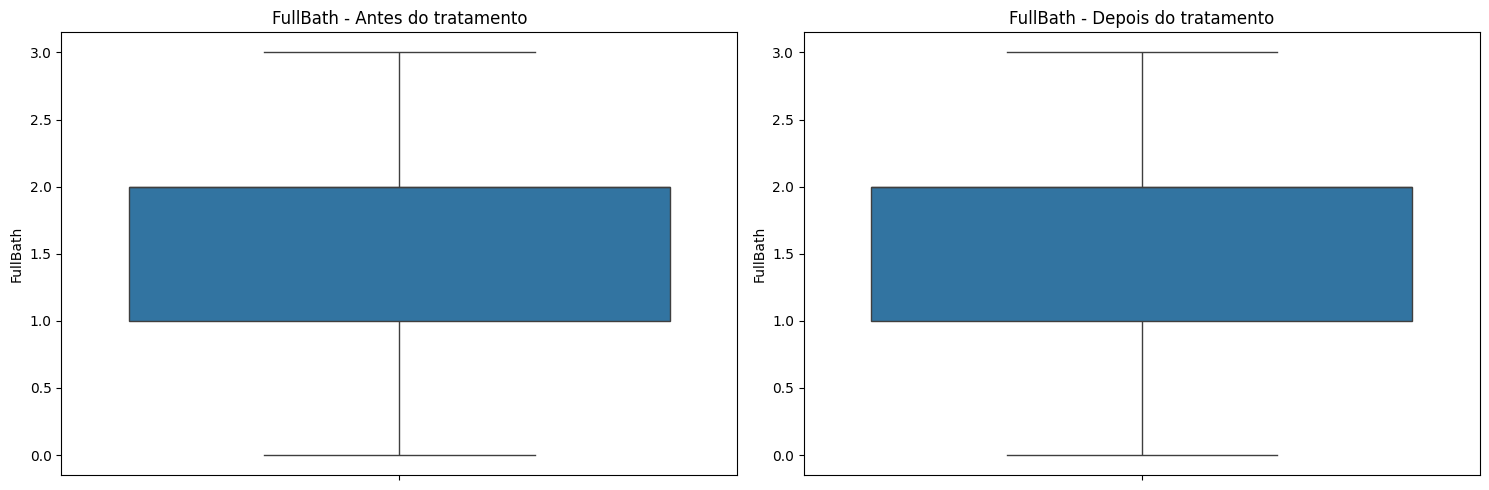

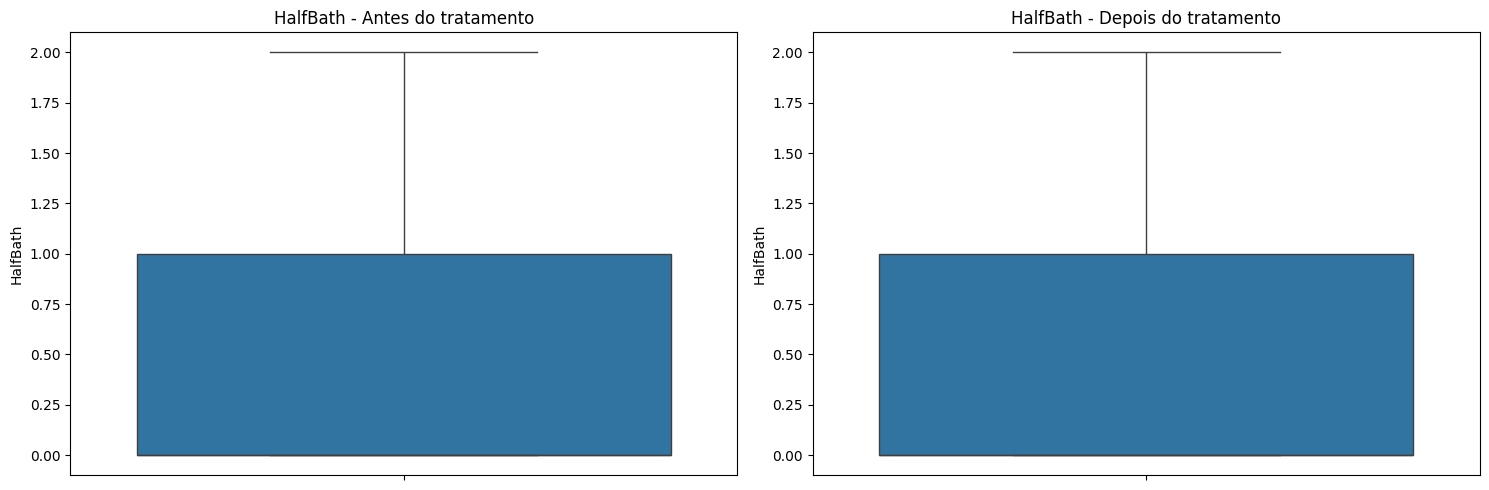

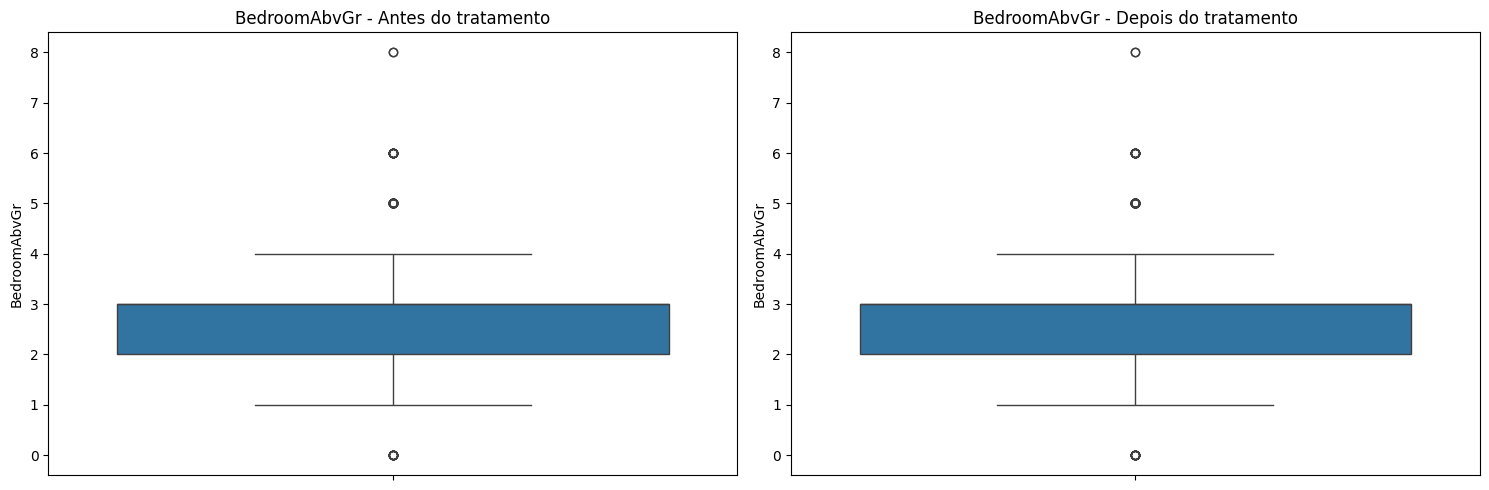

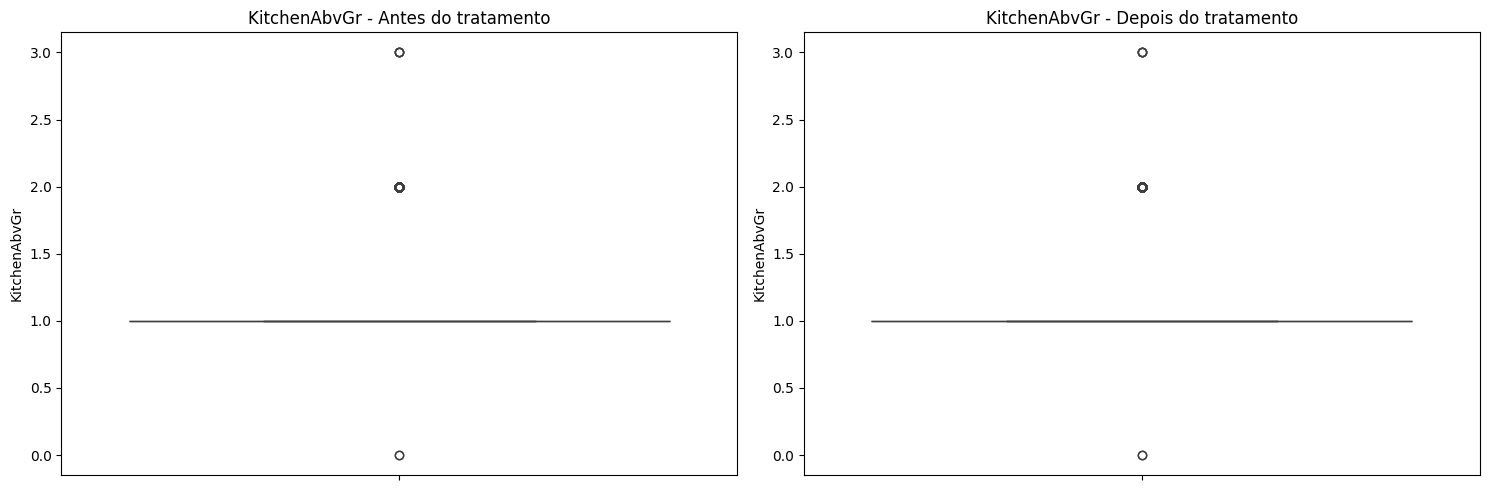

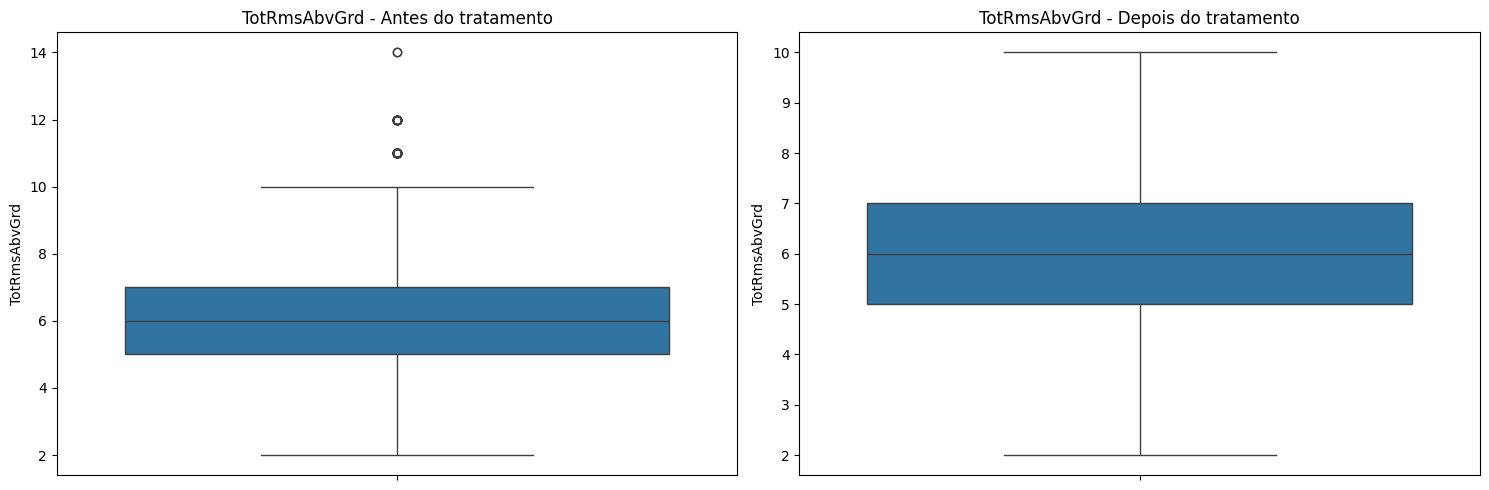

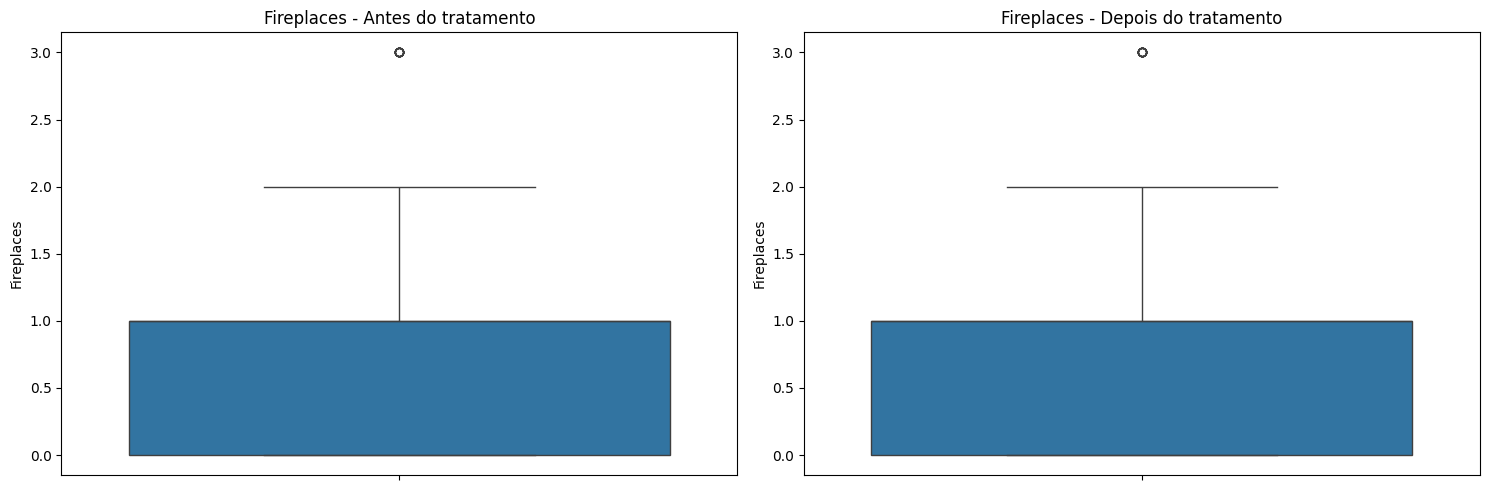

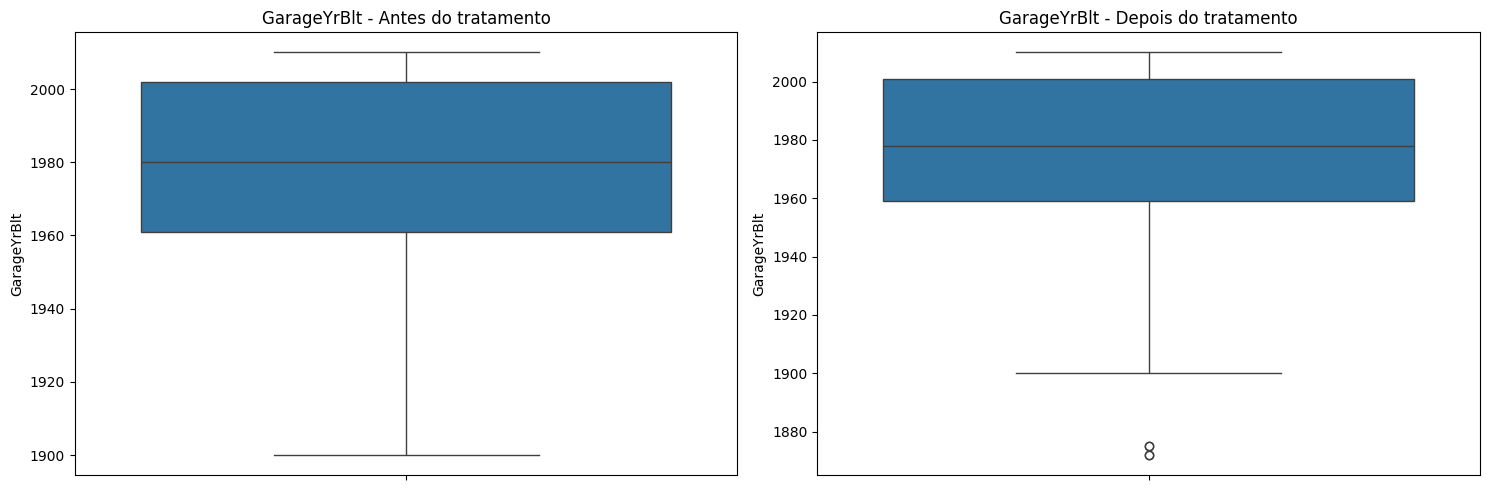

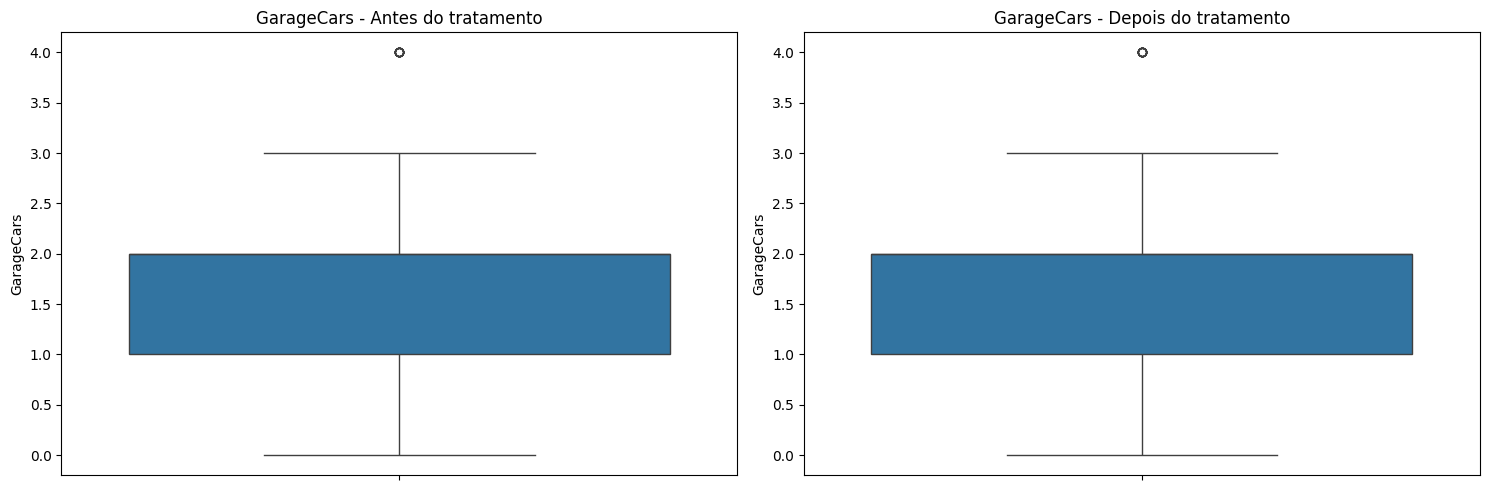

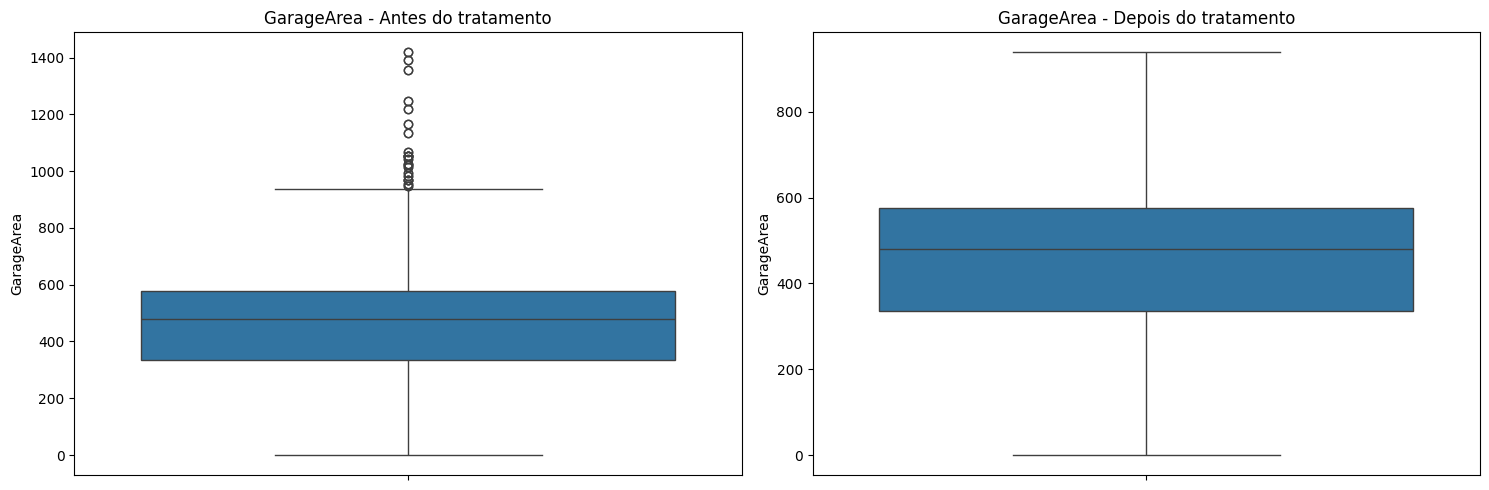

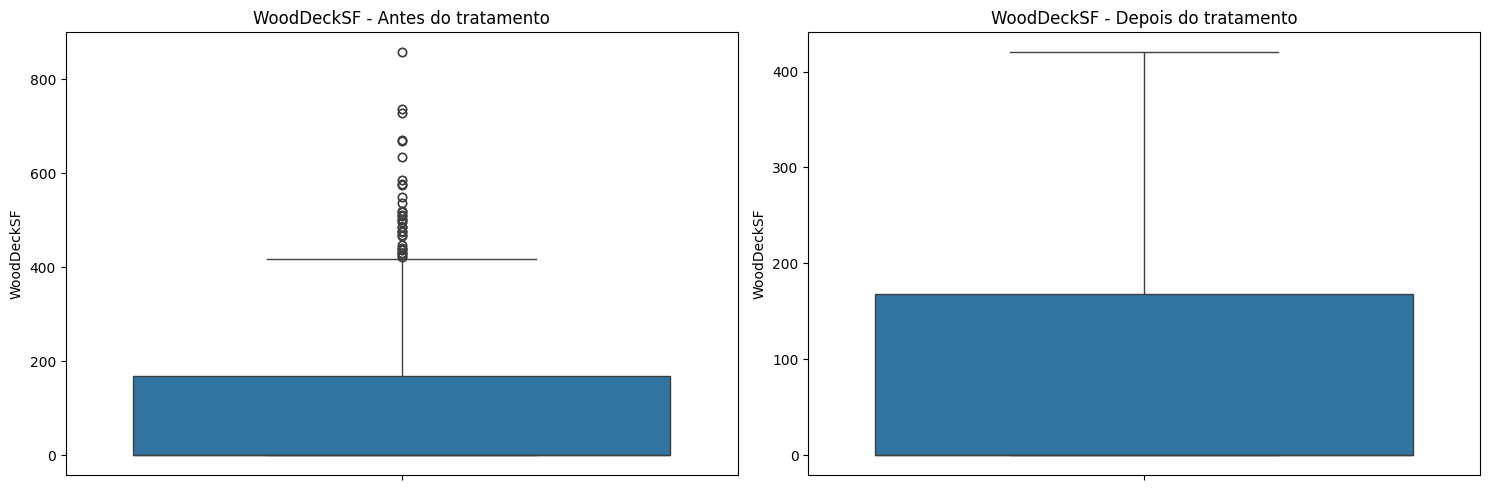

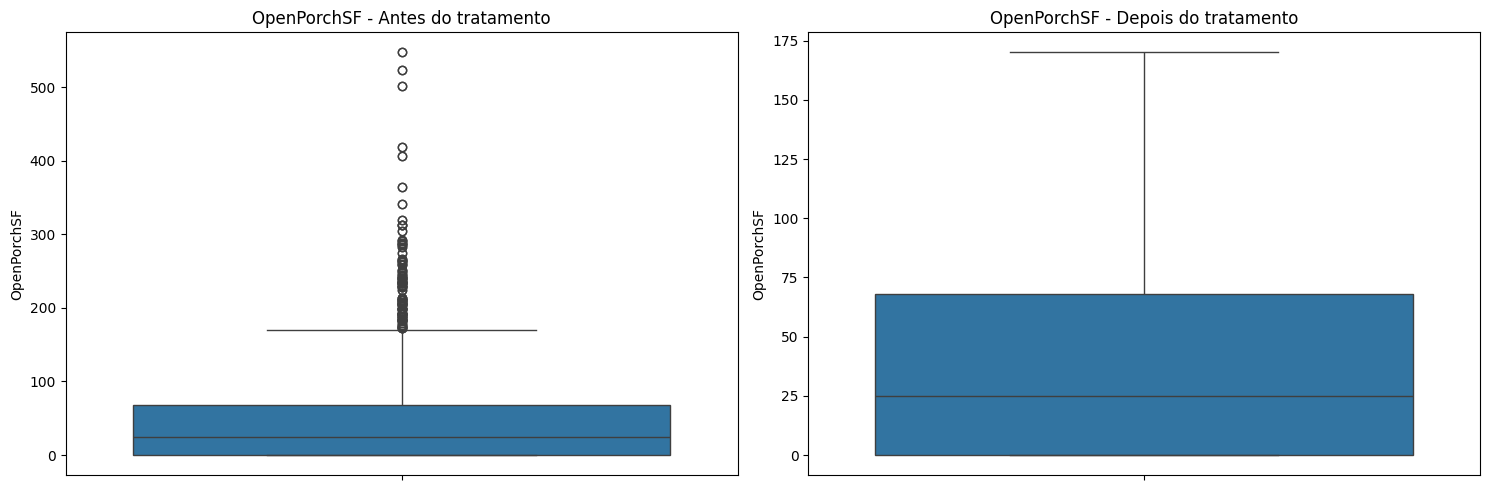

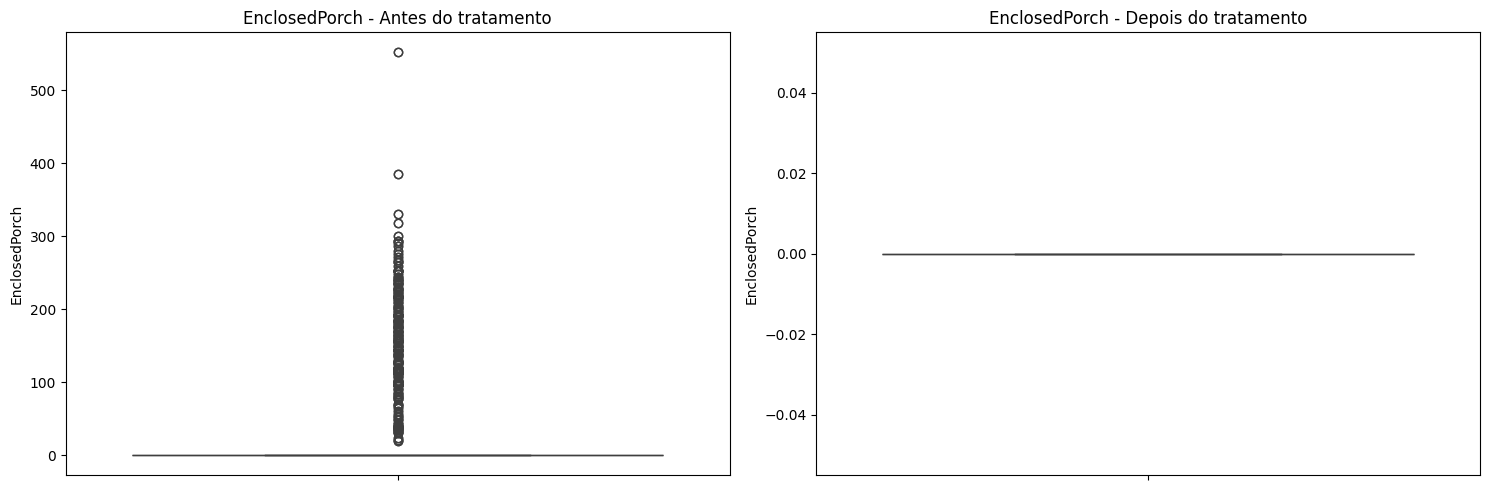

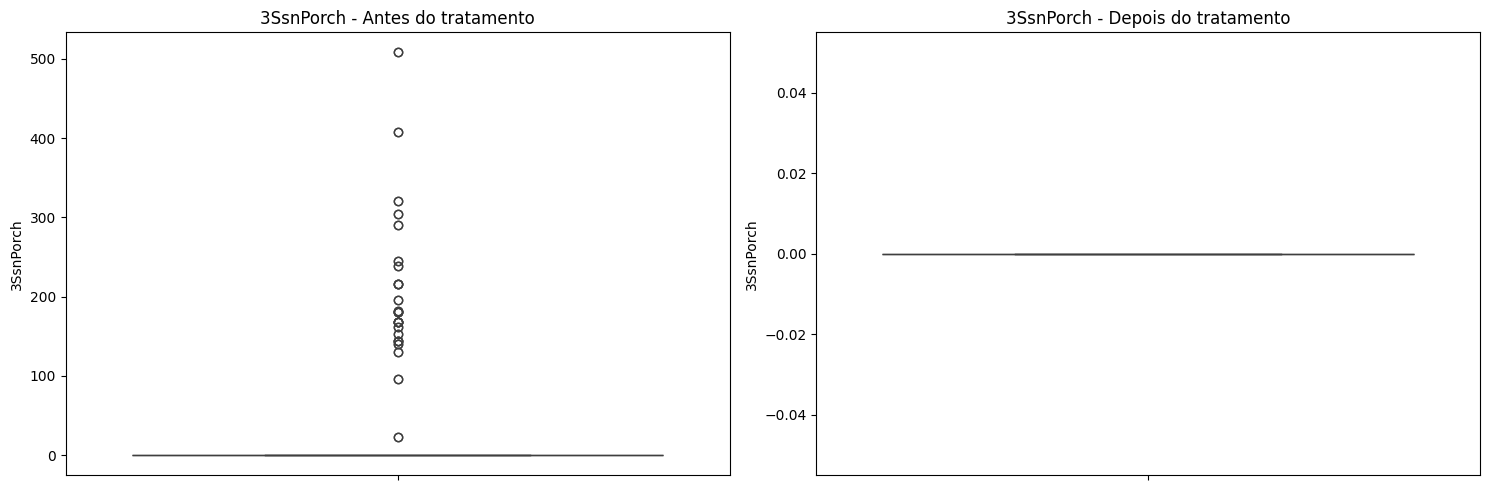

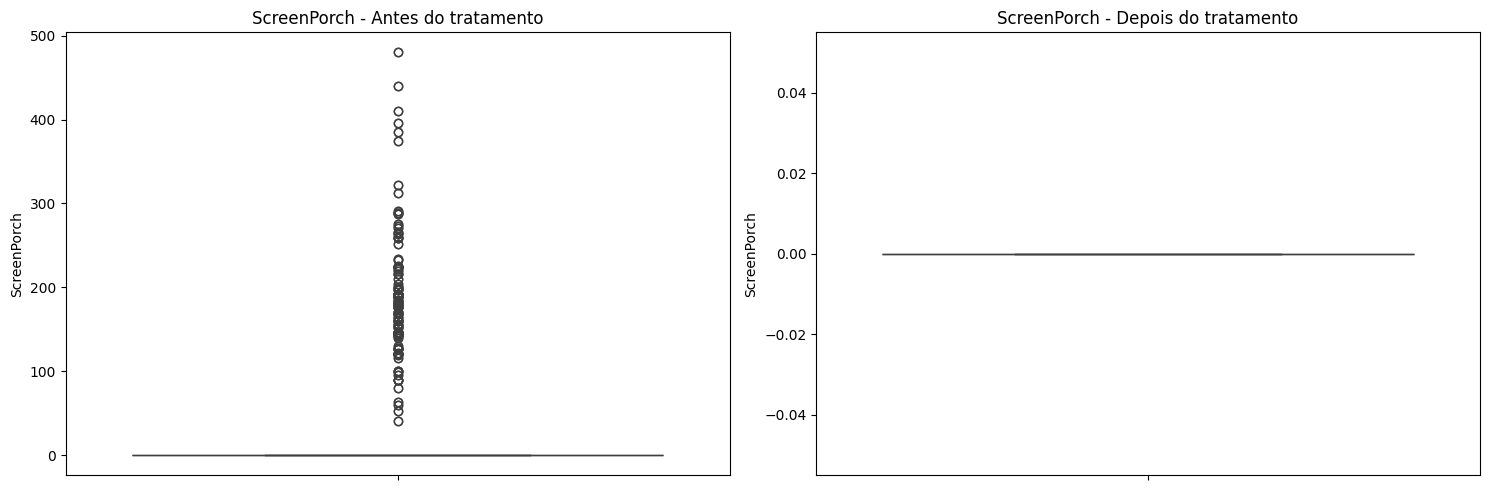

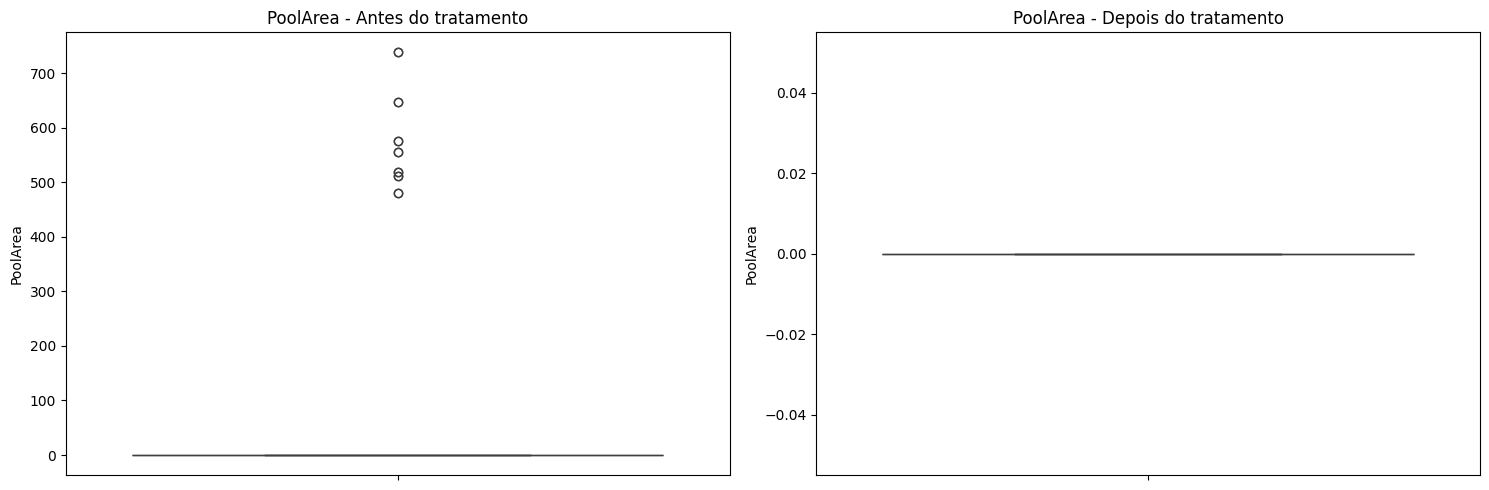

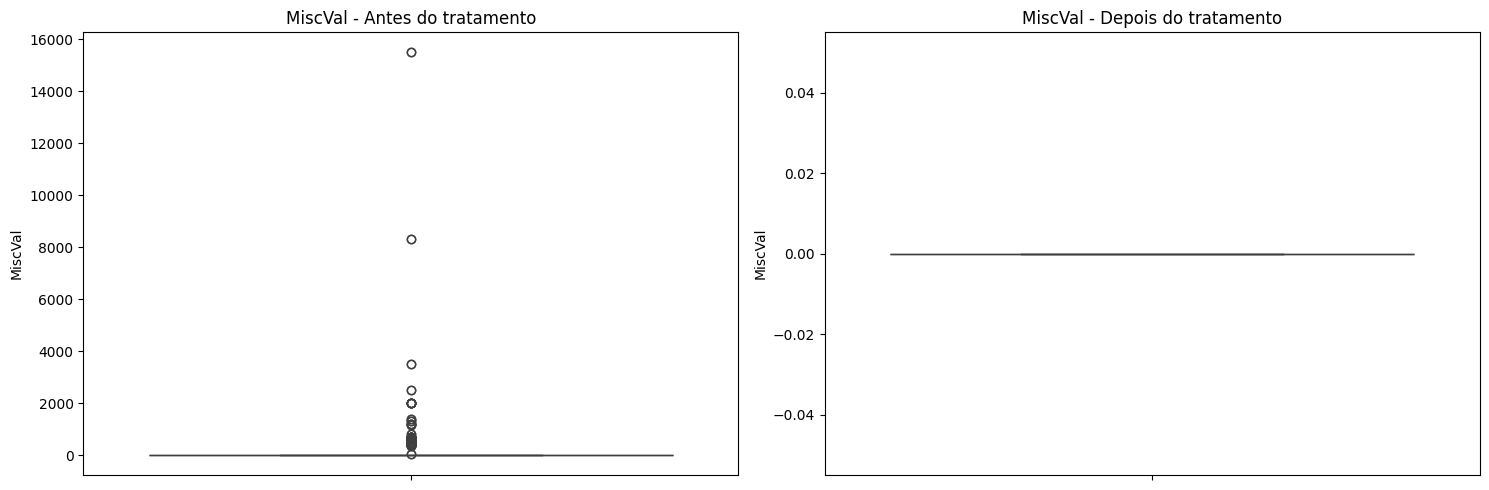

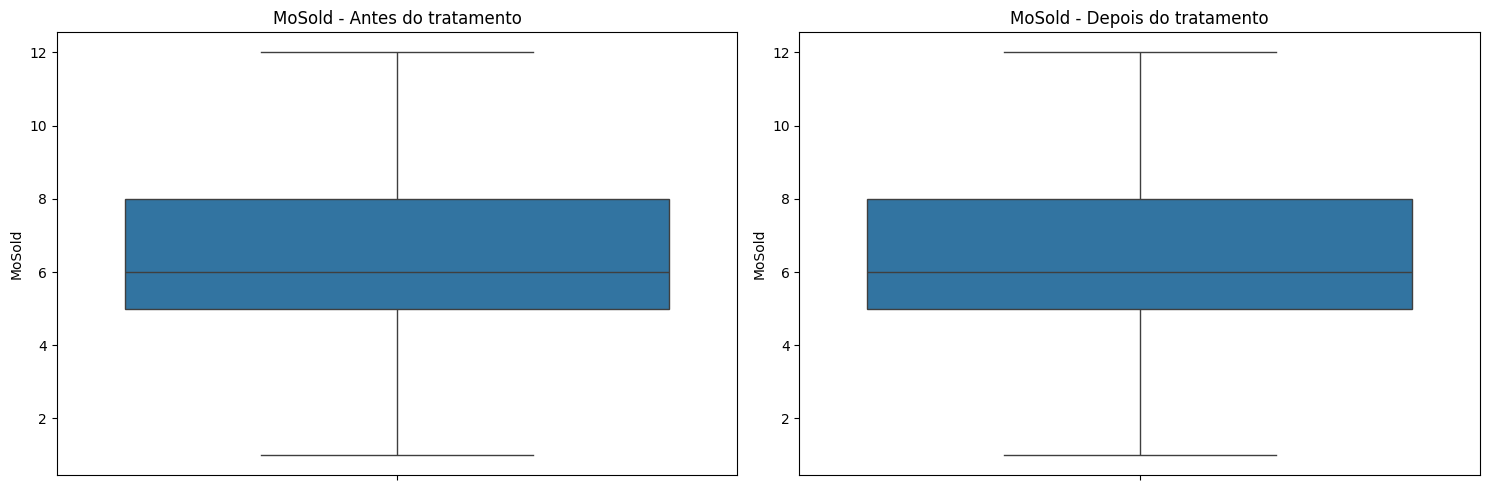

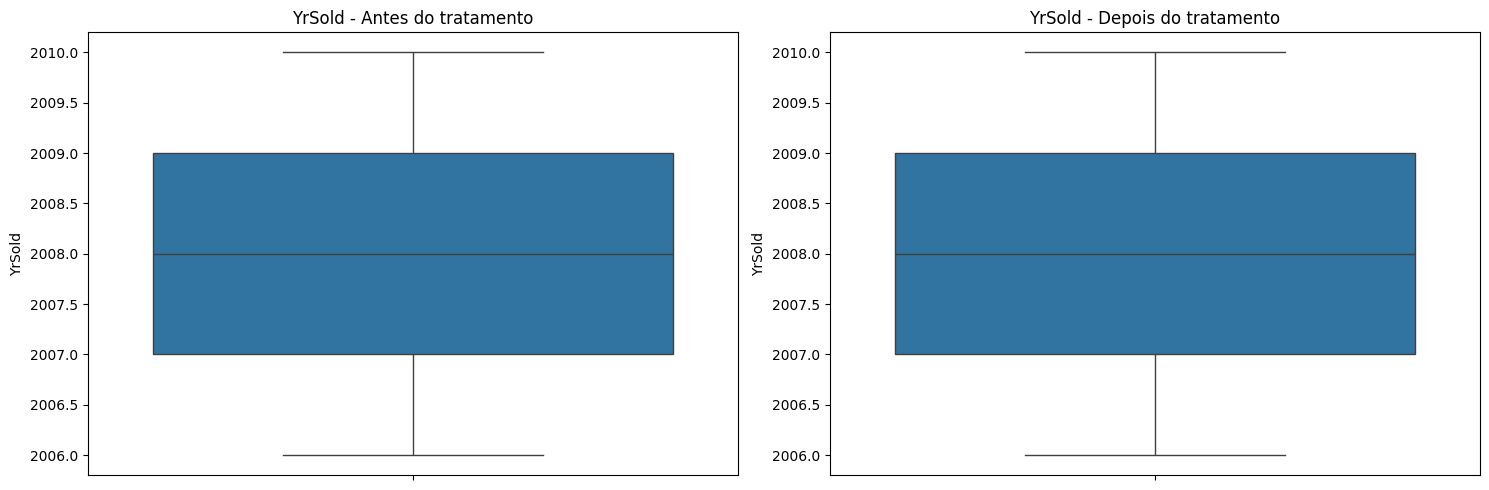

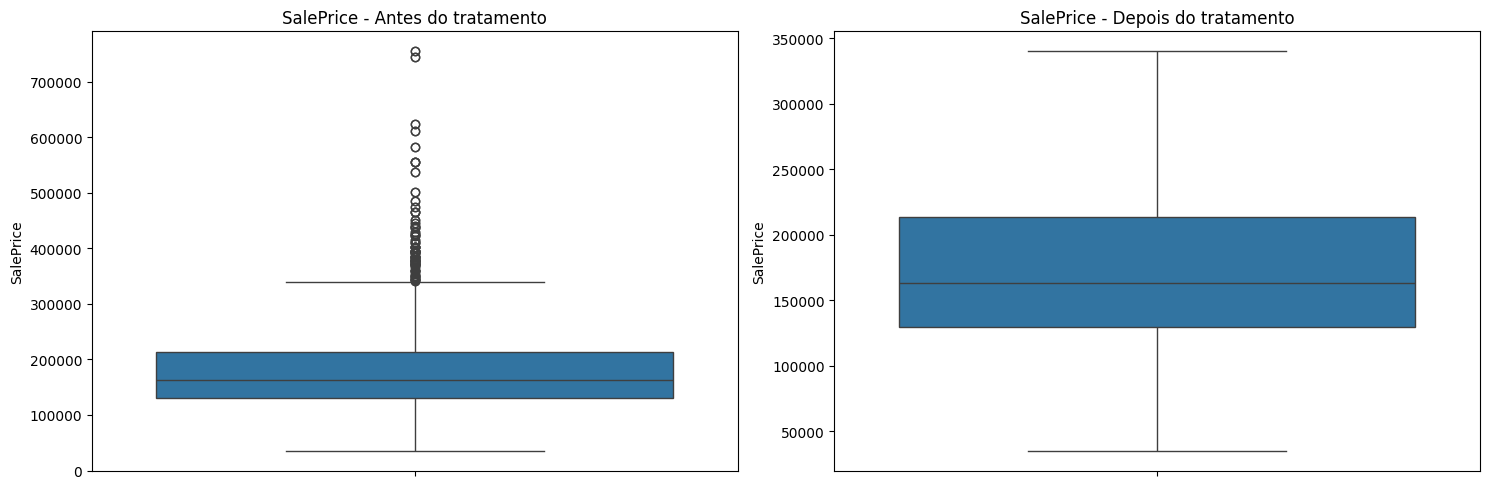

In [ ]:
for coluna in numeral_colunas:
    visualizar_tratamento_number(df_completo,  df_tratado, coluna)

#### **Juntando algumas colunas**

In [12]:
df_completo["TotalSF"] = df_completo["1stFlrSF"] + df_completo["2ndFlrSF"]

df_completo["TotalBath"] = df_completo["FullBath"] + 0.5*df_completo["HalfBath"] + df_completo["BsmtFullBath"] + 0.5*df_completo["BsmtHalfBath"]

df_completo["LogSalePrice"] = np.log1p(df_completo["SalePrice"])

df_completo["AvgRoomSize"] = df_completo["GrLivArea"] / df_completo["TotRmsAbvGrd"]

NameError: name 'df_completo' is not defined

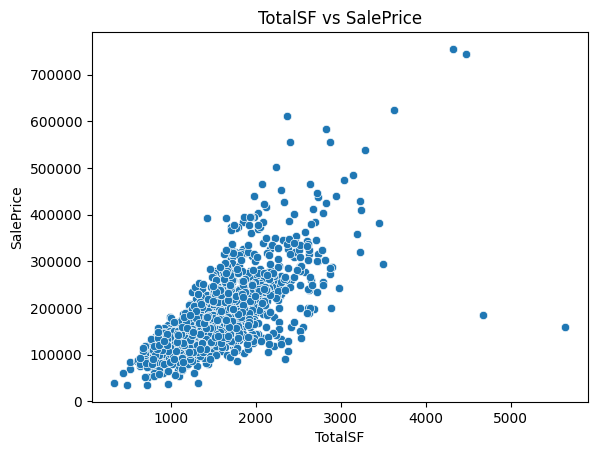

In [28]:
sns.scatterplot(x=df_completo["TotalSF"], y=df_completo["SalePrice"])
plt.title("TotalSF vs SalePrice")
plt.show()

<Axes: >

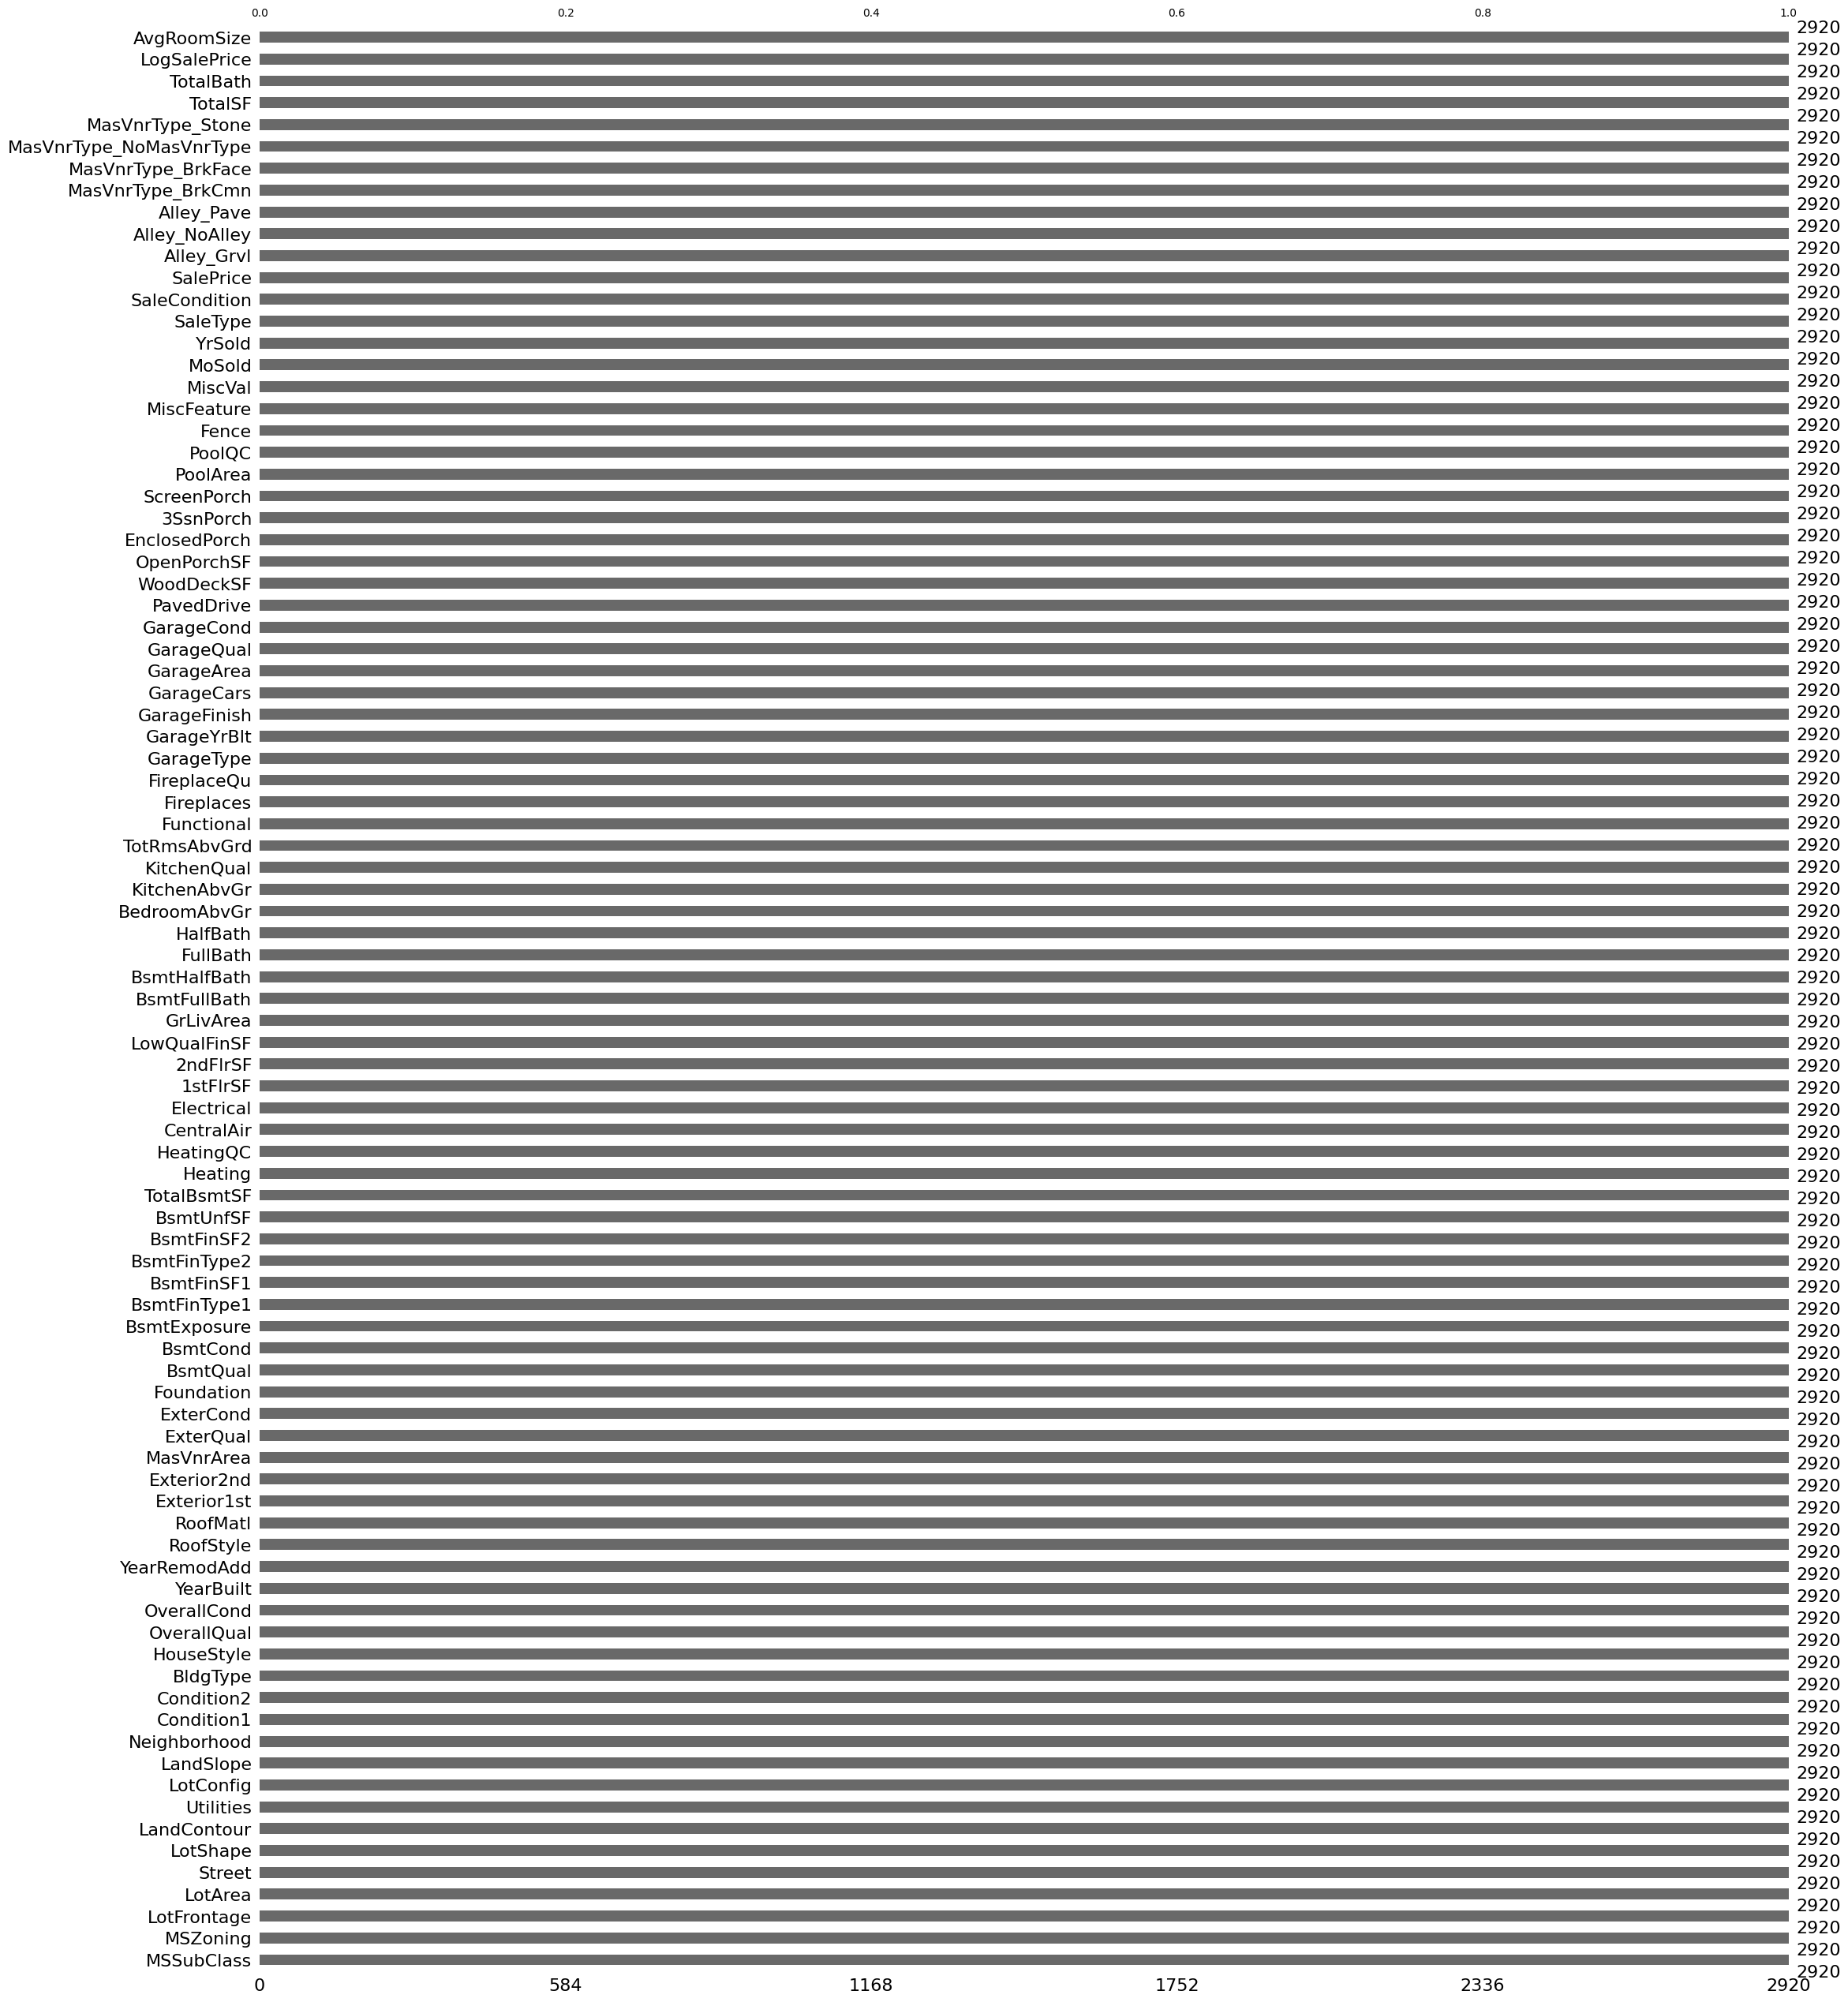

In [ ]:
msno.bar(df_copia.sample(df_copia.shape[0]))

## **MSZoning**

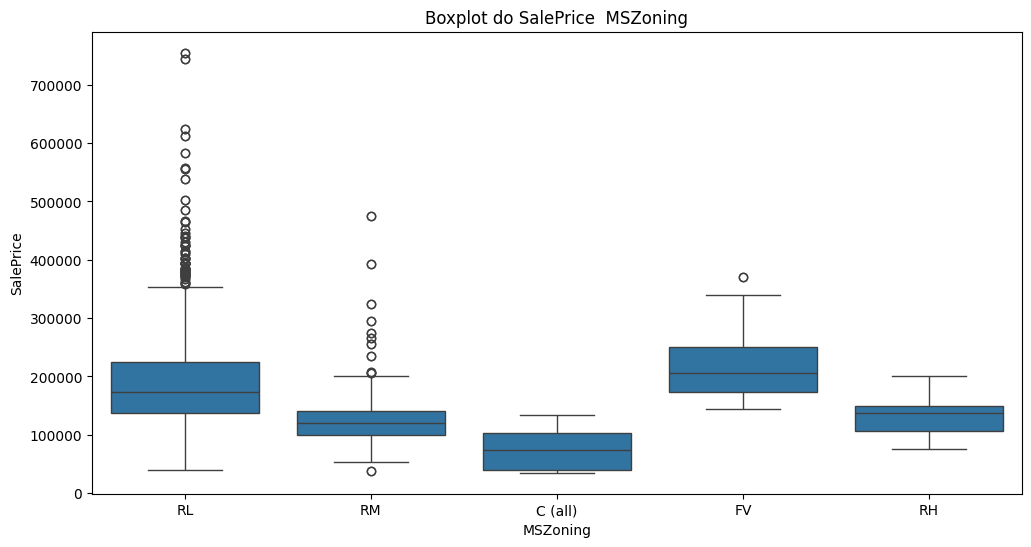

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=df_copia)
plt.title('Boxplot do SalePrice  MSZoning')
plt.show()

In [ ]:
df_copia['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
ordenacao_zoning = [['C (all)', 'RM', 'RH', 'RL', 'FV']]

encoder = OrdinalEncoder(categories=ordenacao_zoning)
df_copia['MSZoning_num'] = encoder.fit_transform(df_copia[['MSZoning']])

df_copia.drop('MSZoning', axis=1, inplace=True)

In [ ]:
df_copia.MSZoning_num

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
2915    3.0
2916    3.0
2917    3.0
2918    3.0
2919    3.0
Name: MSZoning_num, Length: 2920, dtype: float64

In [ ]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MSSubClass               2920 non-null   int64  
 1   LotFrontage              2920 non-null   float64
 2   LotArea                  2920 non-null   int64  
 3   Street                   2920 non-null   object 
 4   LotShape                 2920 non-null   object 
 5   LandContour              2920 non-null   object 
 6   Utilities                2920 non-null   object 
 7   LotConfig                2920 non-null   object 
 8   LandSlope                2920 non-null   object 
 9   Neighborhood             2920 non-null   object 
 10  Condition1               2920 non-null   object 
 11  Condition2               2920 non-null   object 
 12  BldgType                 2920 non-null   object 
 13  HouseStyle               2920 non-null   object 
 14  OverallQual             

## **Street**

In [ ]:
df_copia.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [ ]:
ordenacao_street = [['Pave', 'Grvl']]

encoder = OrdinalEncoder(categories=ordenacao_street)

df_copia['Street_num'] = encoder.fit_transform(df_copia[['Street']])


df_copia.drop('Street', axis=1, inplace=True)

In [ ]:
df_copia.Street_num.unique()

array([0., 1.])

In [ ]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MSSubClass               2920 non-null   int64  
 1   LotFrontage              2920 non-null   float64
 2   LotArea                  2920 non-null   int64  
 3   LotShape                 2920 non-null   object 
 4   LandContour              2920 non-null   object 
 5   Utilities                2920 non-null   object 
 6   LotConfig                2920 non-null   object 
 7   LandSlope                2920 non-null   object 
 8   Neighborhood             2920 non-null   object 
 9   Condition1               2920 non-null   object 
 10  Condition2               2920 non-null   object 
 11  BldgType                 2920 non-null   object 
 12  HouseStyle               2920 non-null   object 
 13  OverallQual              2920 non-null   int64  
 14  OverallCond             

## **LotShape**

In [ ]:
df_copia.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [ ]:
ordenacao_lotshape  = [df_copia.LotShape.unique()]

encoder = OrdinalEncoder(categories=ordenacao_lotshape)

df_copia['Lotshape_num'] = encoder.fit_transform(df_copia[['LotShape']])


df_copia.drop('LotShape', axis=1, inplace=True)

## **Função Ordenação LabelEncoder (Variáveis Categóricas)**

Função para representar cada categoria com um valor númerico único.
Função utilizar LabelEncoder

In [ ]:
def ordenacao(target: str):
    ordenacao = [df_copia[target].unique()]

    encoder = OrdinalEncoder(categories=ordenacao)
    df_copia[target+'_num'] = encoder.fit_transform(df_copia[[target]])

    df_copia.drop(target, axis=1, inplace=True)

## **Função OneHotEncoder (Variáveis nominais)**

In [ ]:
def nominal(target: str):
    encoder = OneHotEncoder(sparse=False, drop='first')
    onehot_encoded = encoder.fit_transform(df_copia[[target]])

    onehot_df = pd.DataFrame(
        onehot_encoded, 
        columns=encoder.get_feature_names_out([target])
    )

    df_copia = pd.concat([df_copia, onehot_df], axis=1)

    df_copia.drop(columns=[target], inplace=True)

## **LandContour**

In [ ]:
ordenacao('LandContour')

In [ ]:
df_copia.select_dtypes(include=['object']).columns

Index(['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
colunas = ['Utilities', 'LotConfig' ]

## **LotConfig**

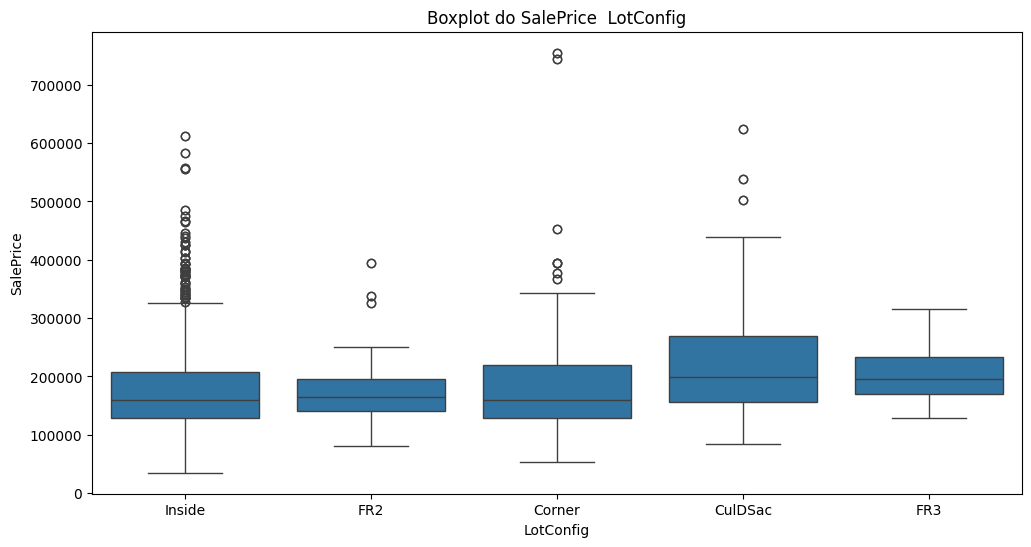

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LotConfig', y='SalePrice', data=df_copia)
plt.title('Boxplot do SalePrice  LotConfig')
plt.show()

## **LandSlope**

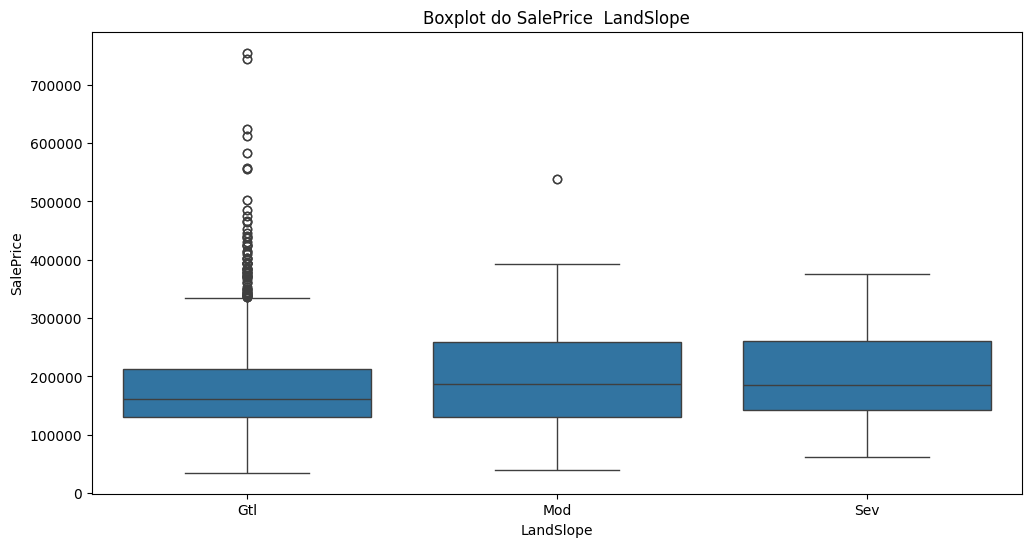

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LandSlope', y='SalePrice', data=df_copia)
plt.title('Boxplot do SalePrice  LandSlope')
plt.show()

## **Neighborhood**

In [ ]:
def box_plot(targat: str):
    plt.figure(figsize=(20, 18))
    sns.boxplot(x=targat, y='SalePrice', data=df_copia)
    plt.title(f'Boxplot do SalePrice  {targat}')
    plt.show()

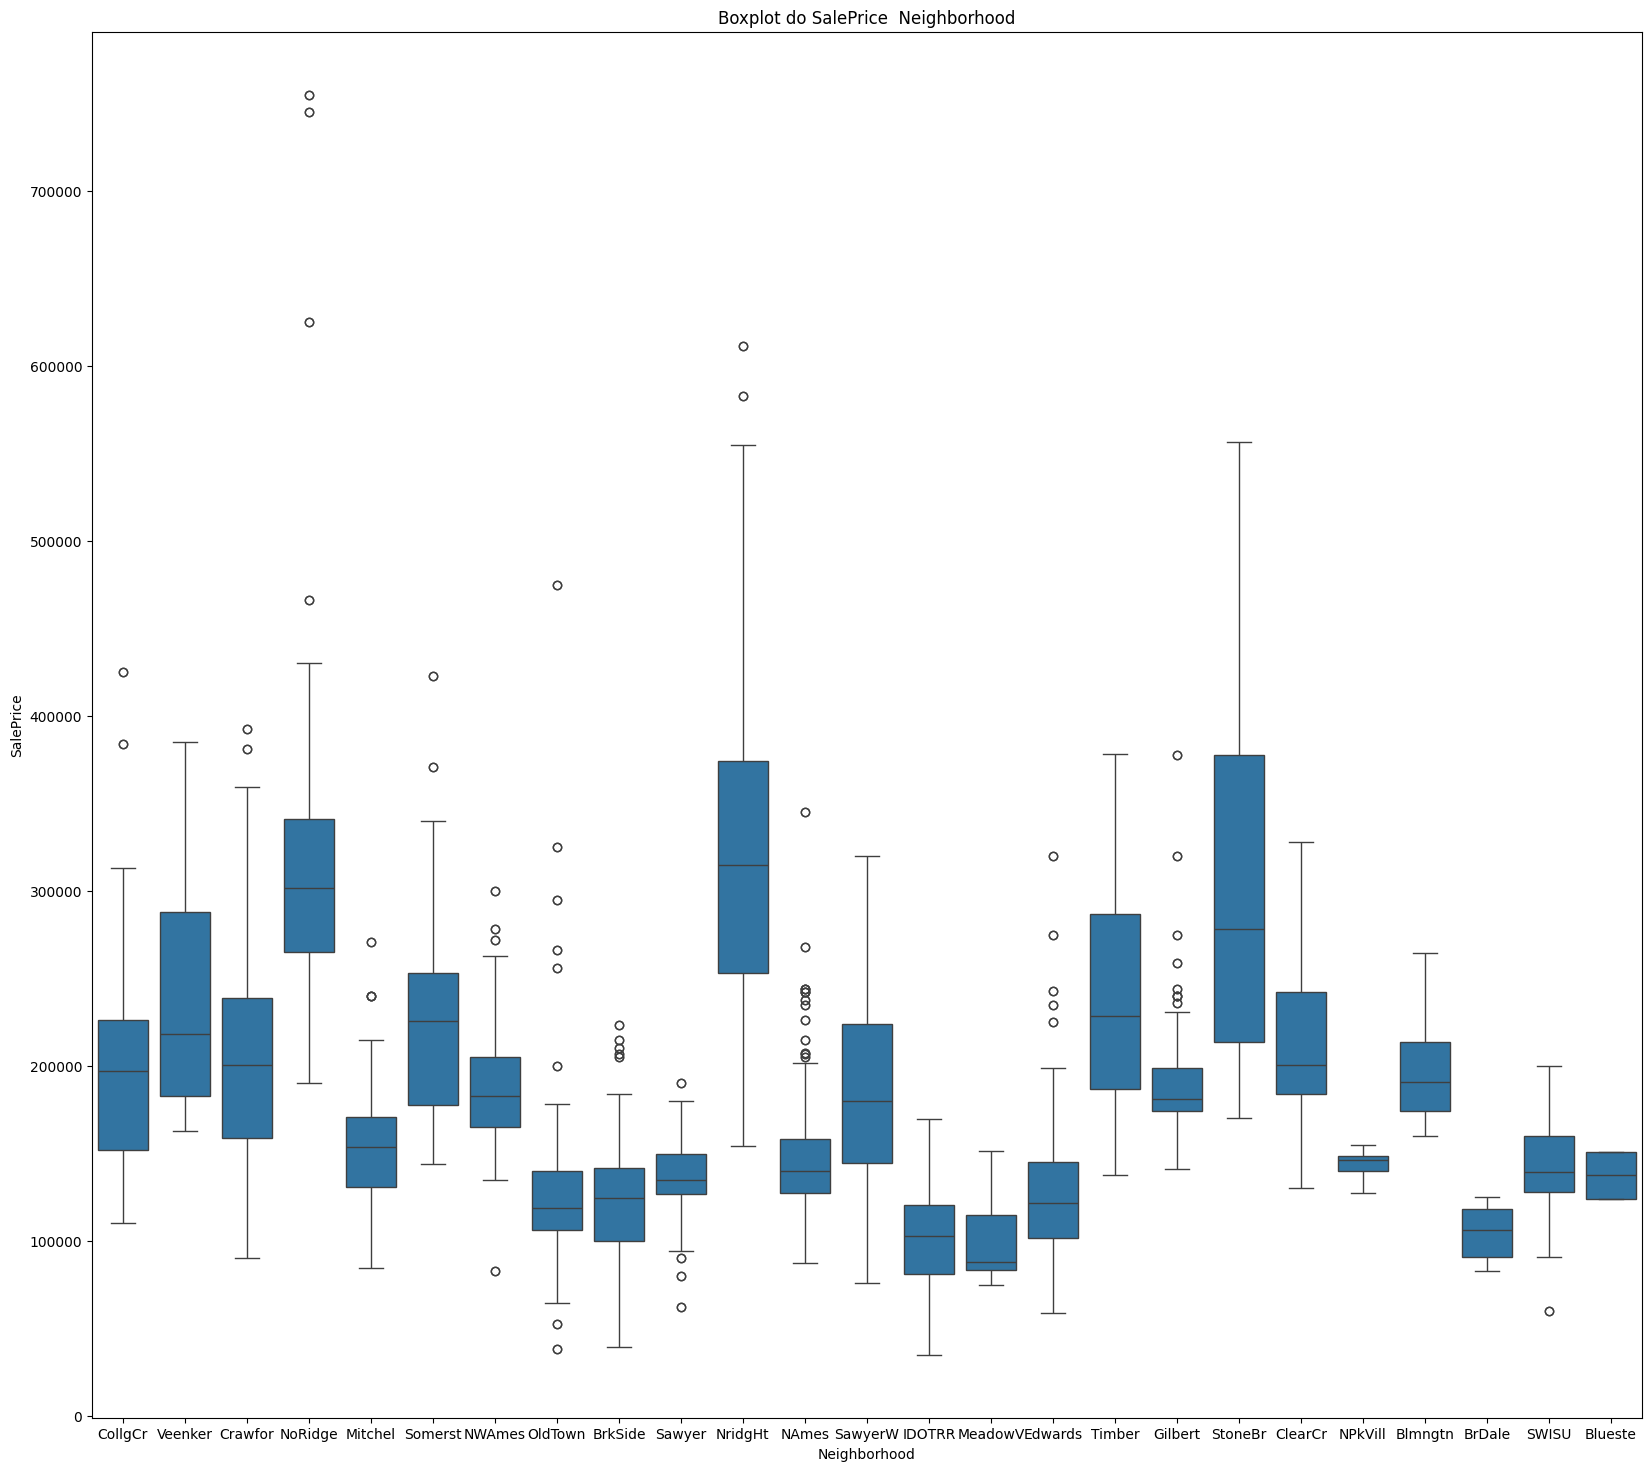

In [ ]:
box_plot('Neighborhood')

In [ ]:
df_copia.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

## **Condition1**

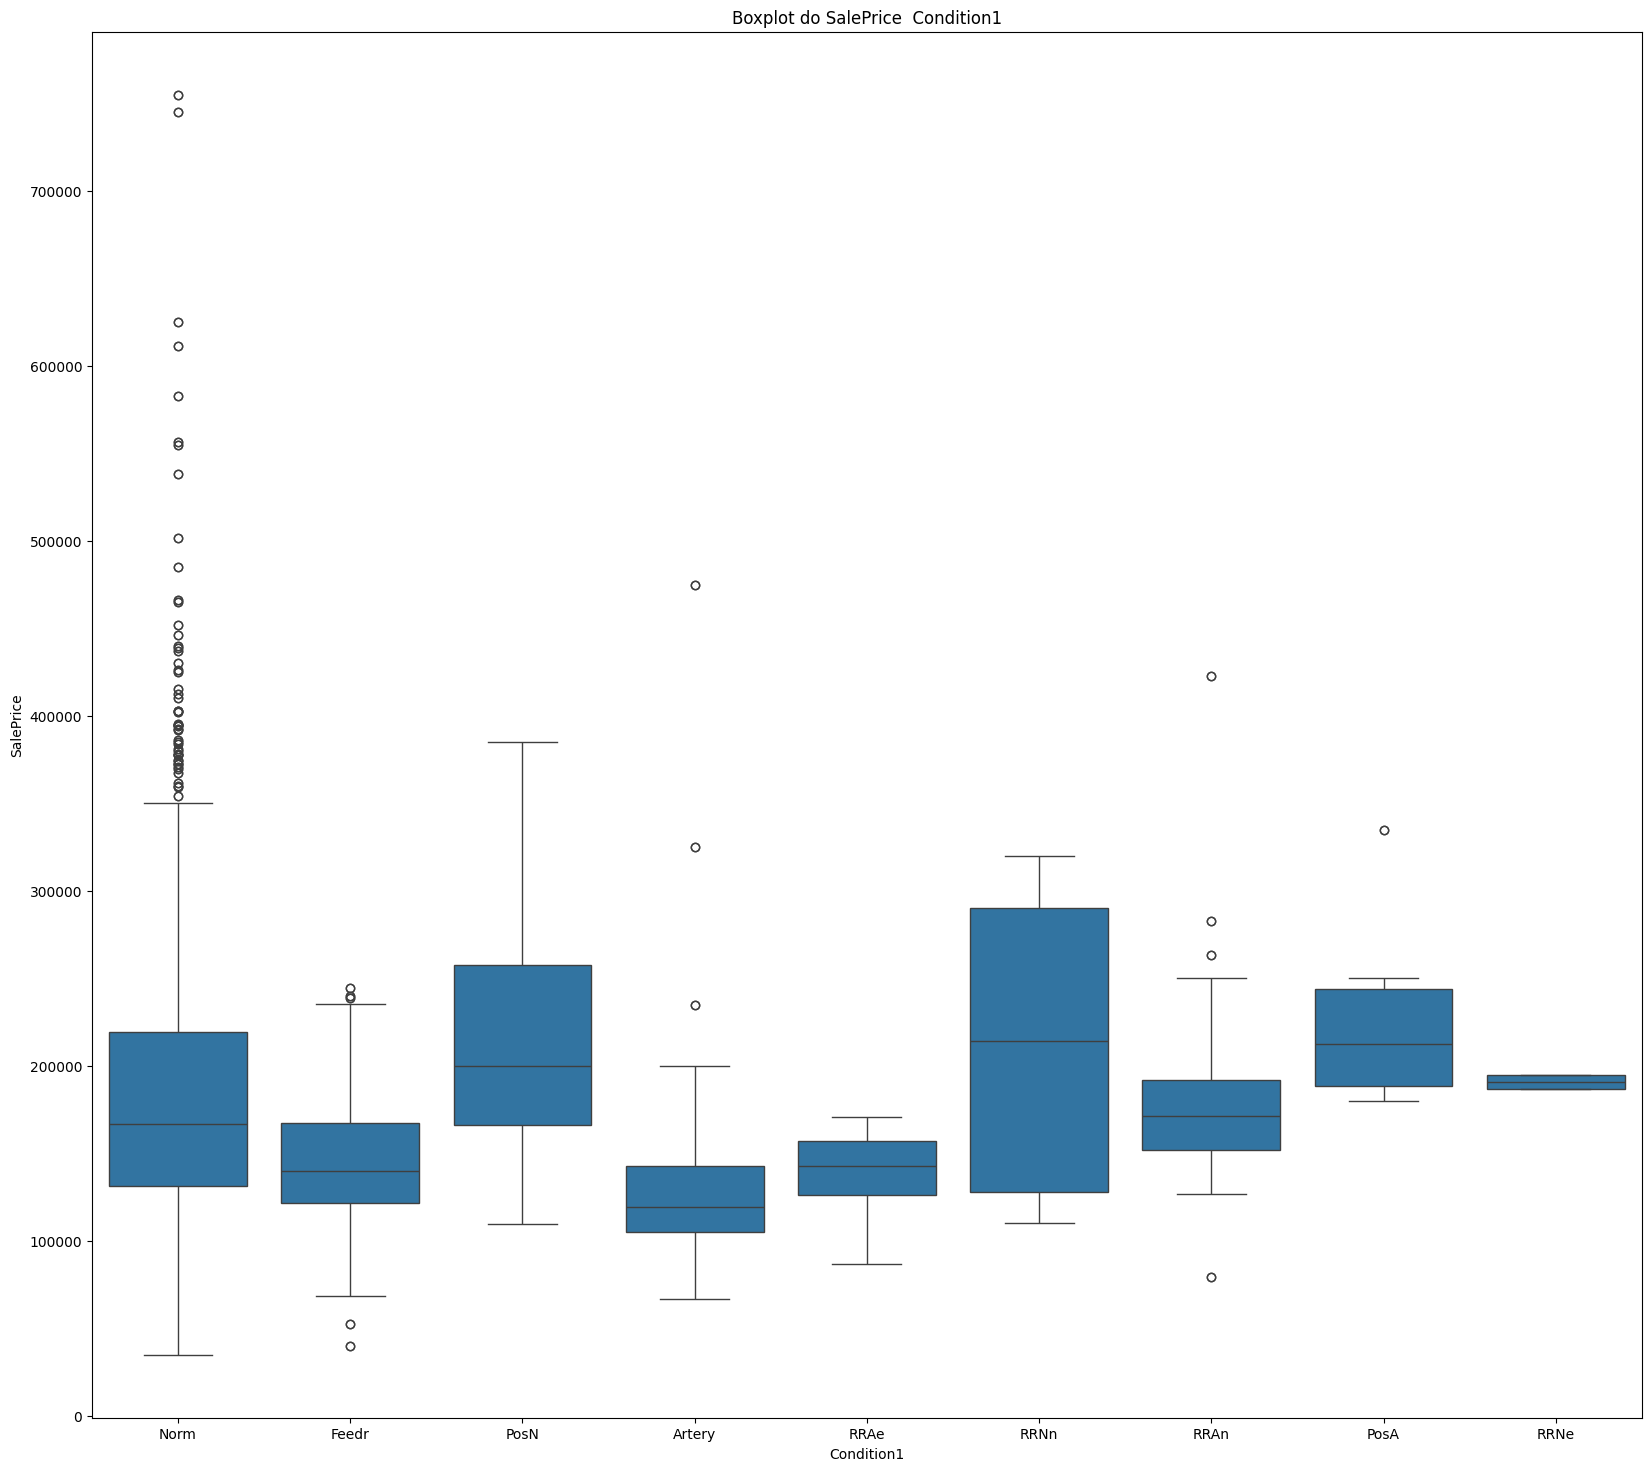

In [ ]:
box_plot('Condition1')

## **Condition2**

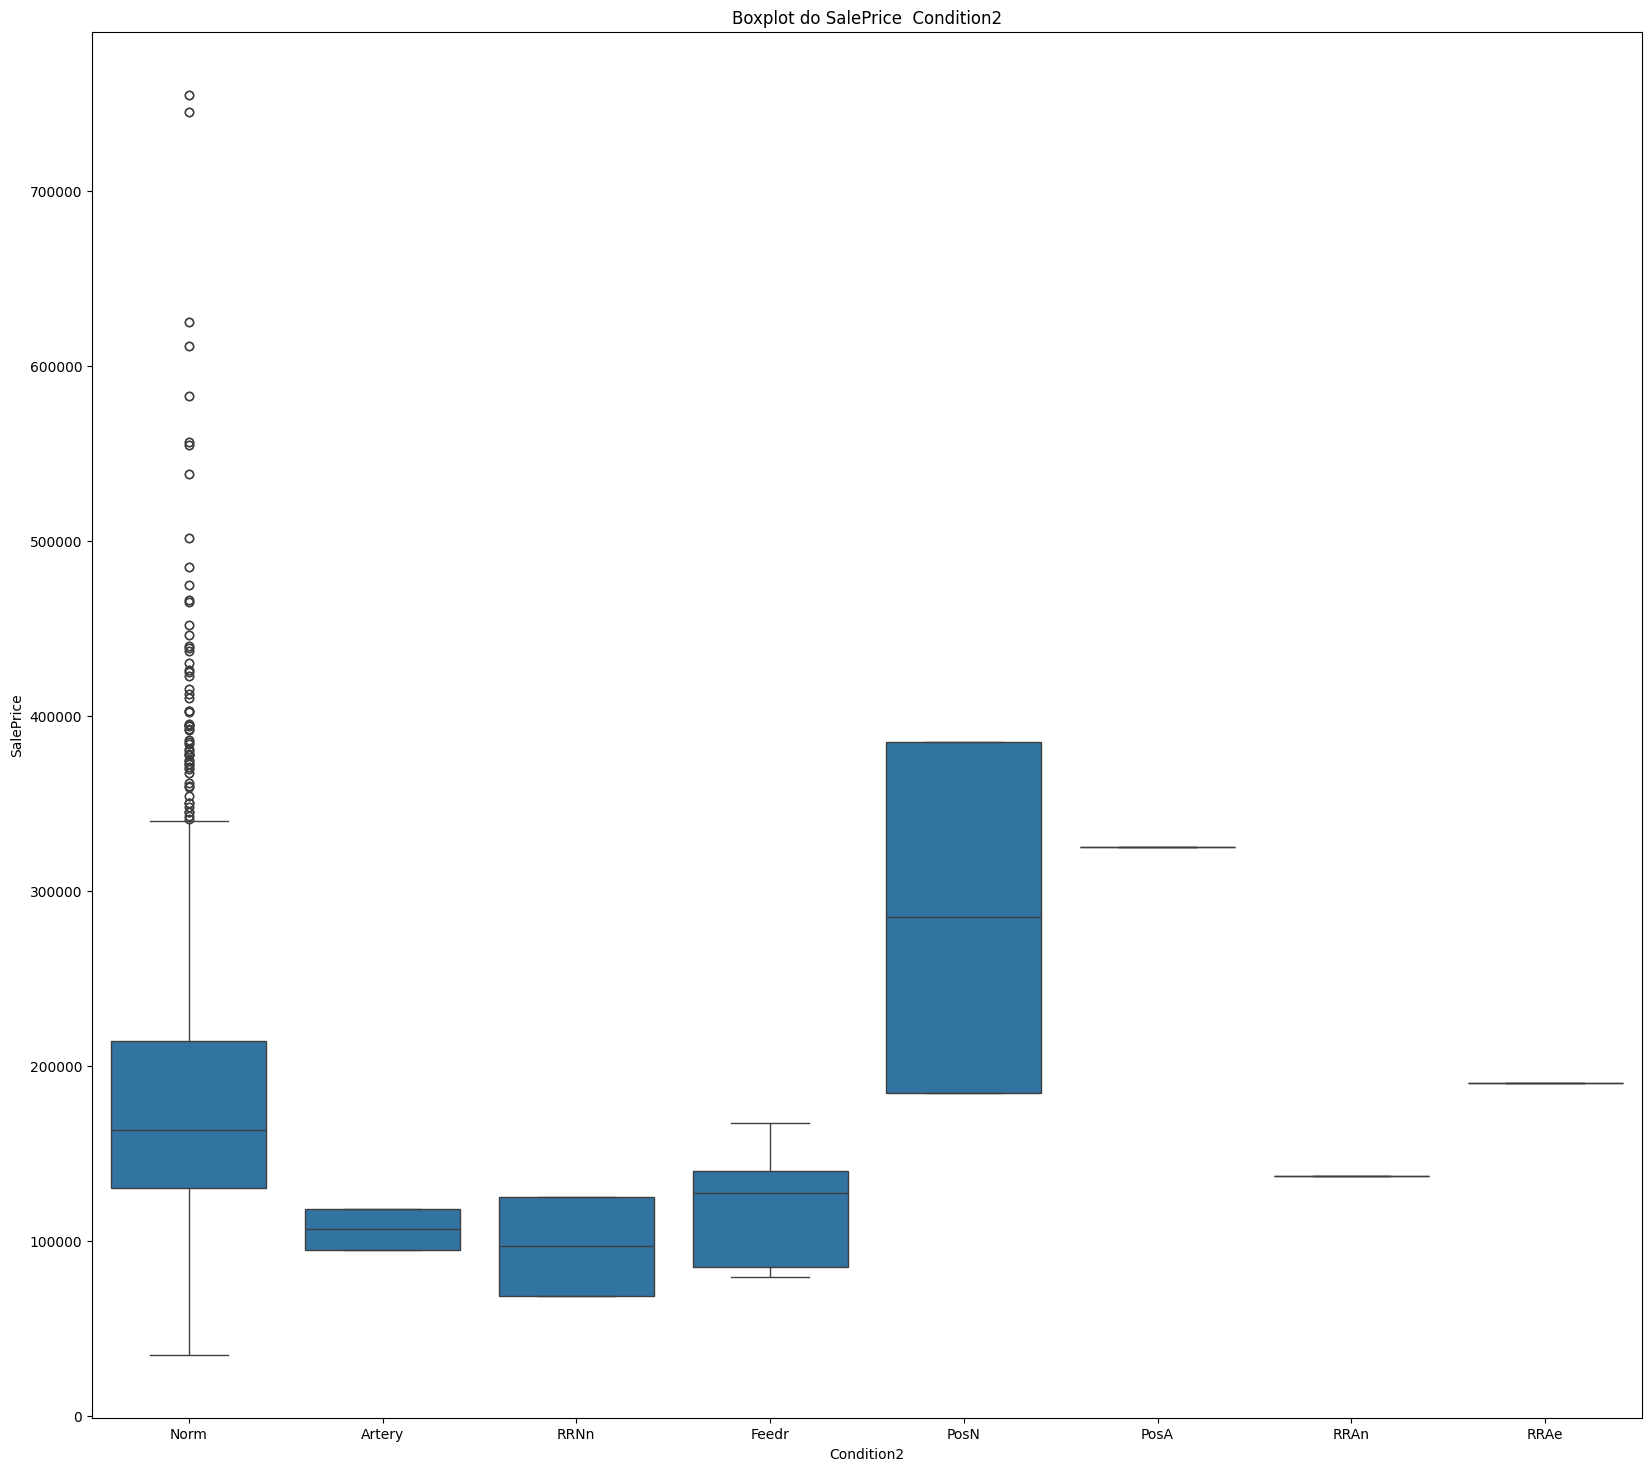

In [ ]:
box_plot('Condition2')

## **BldgType**

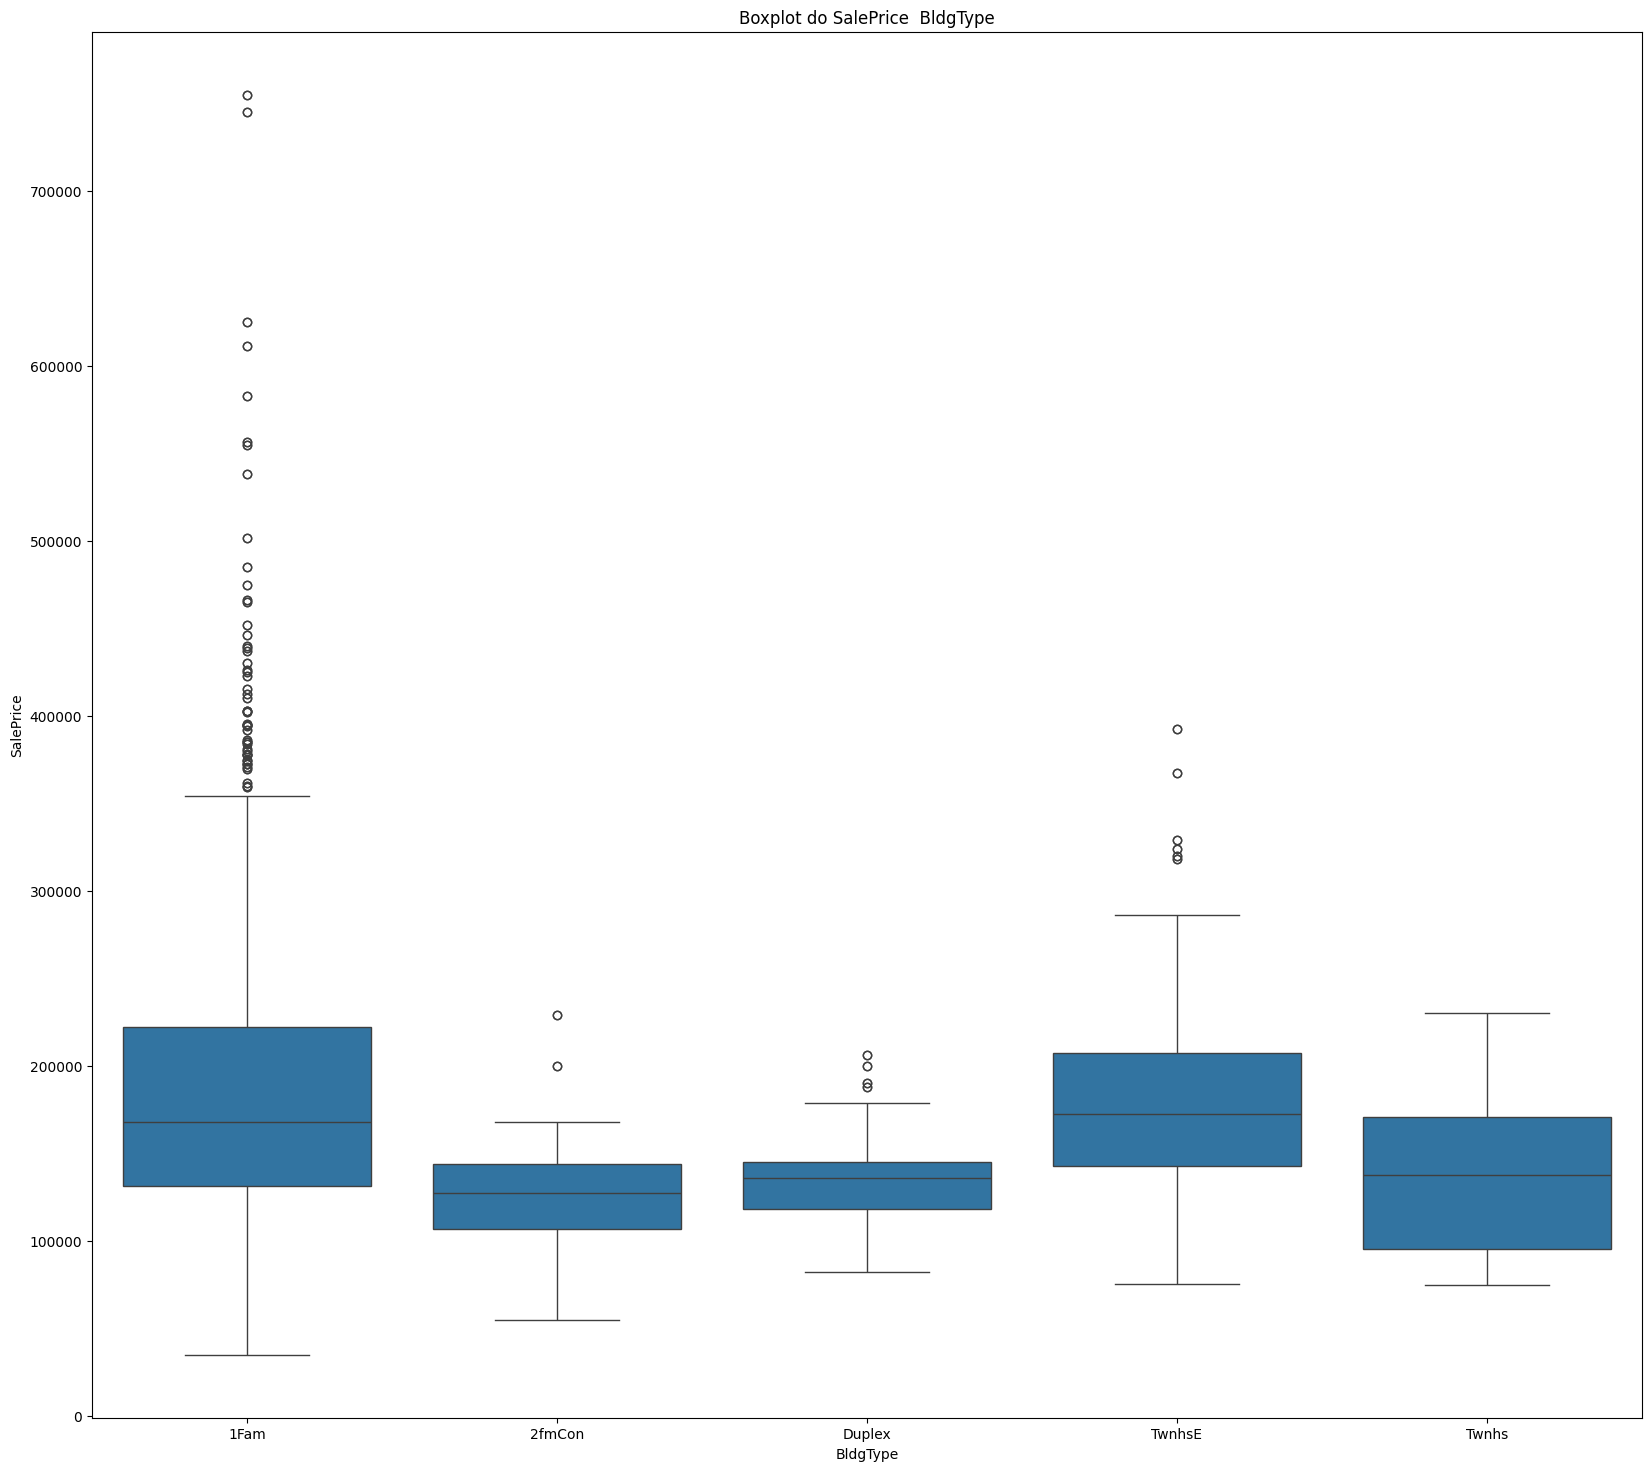

In [ ]:
box_plot('BldgType')

## **HouseStyle**

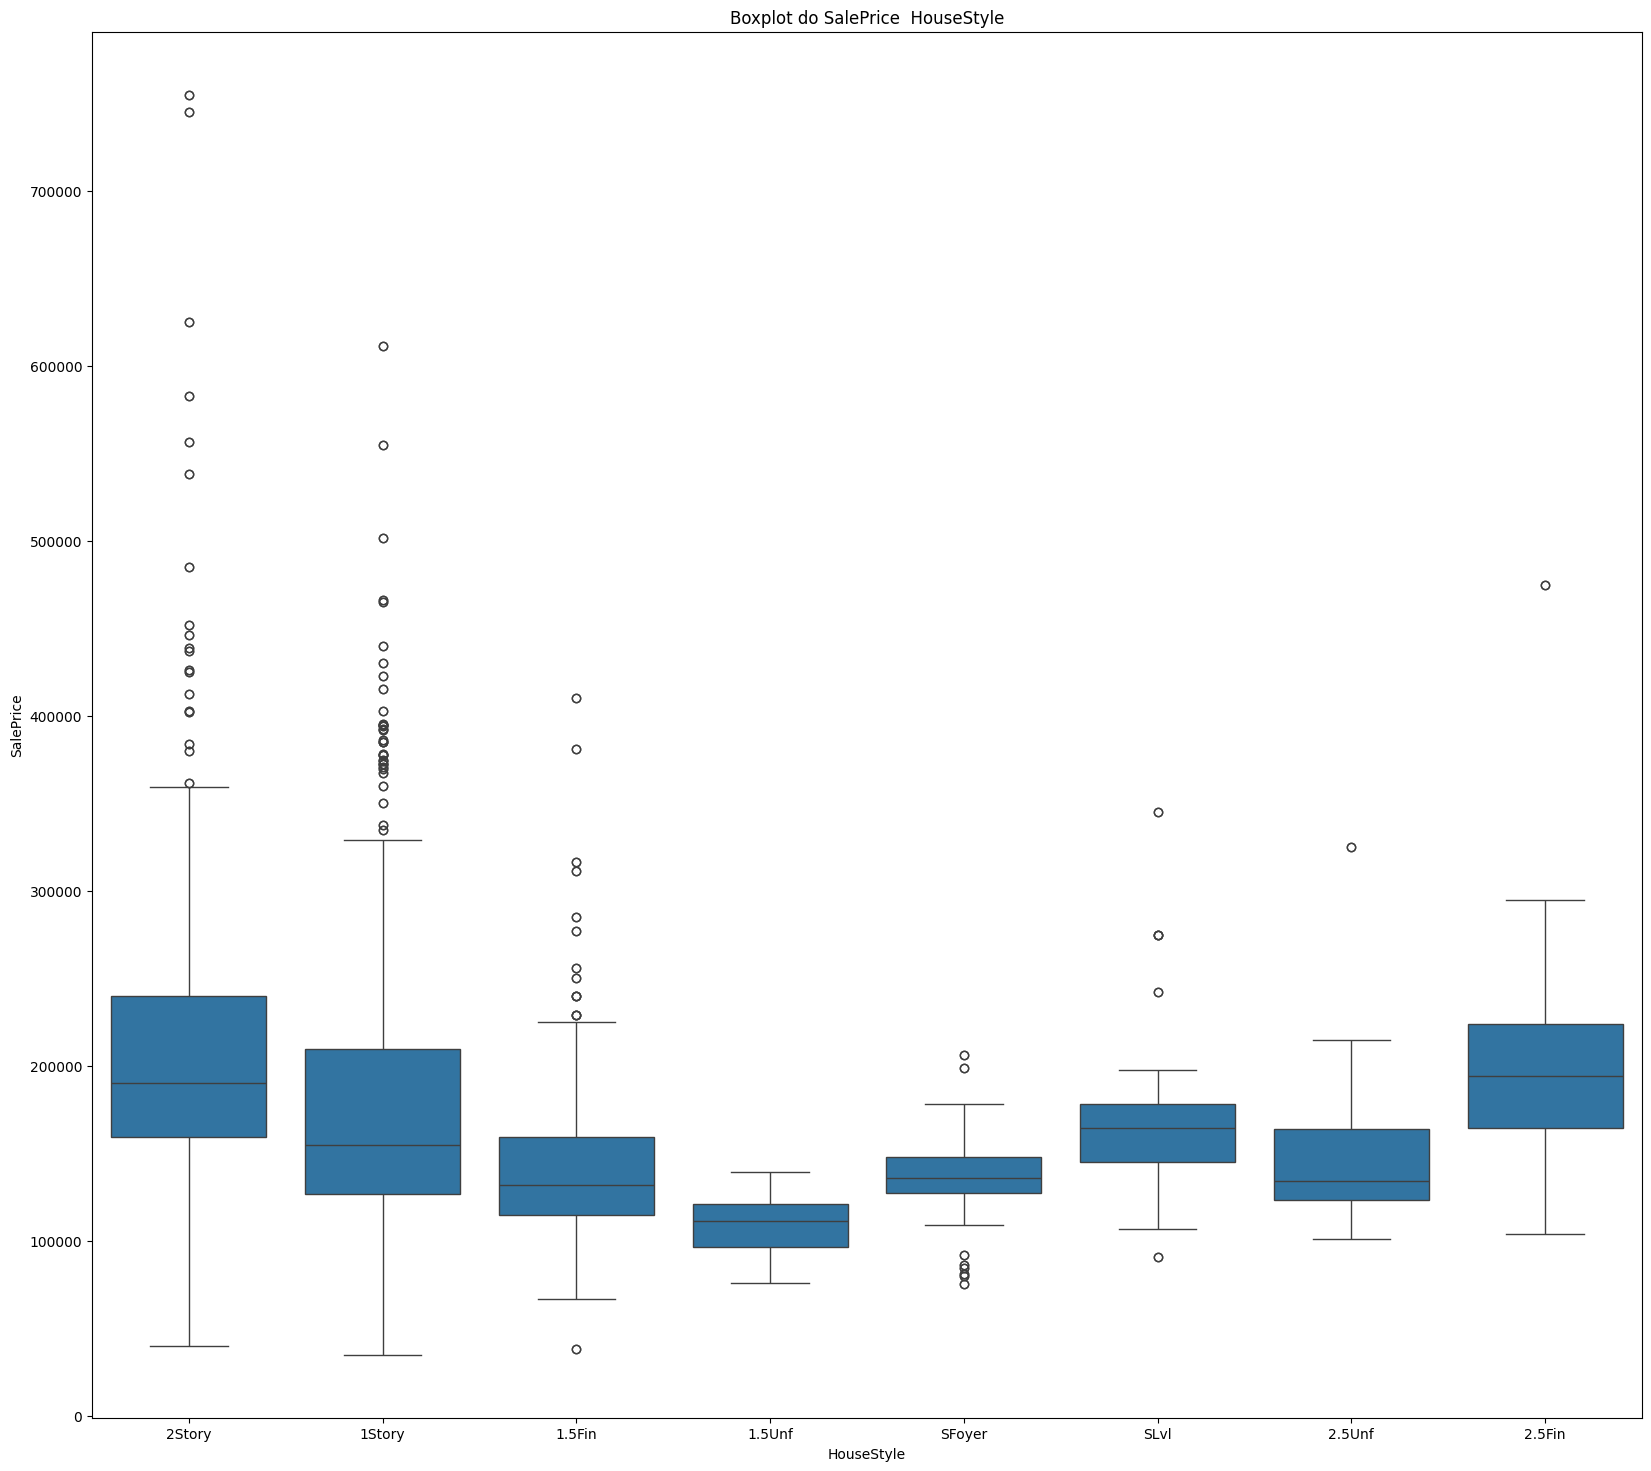

In [ ]:
box_plot('HouseStyle')

## **RoofStyle**

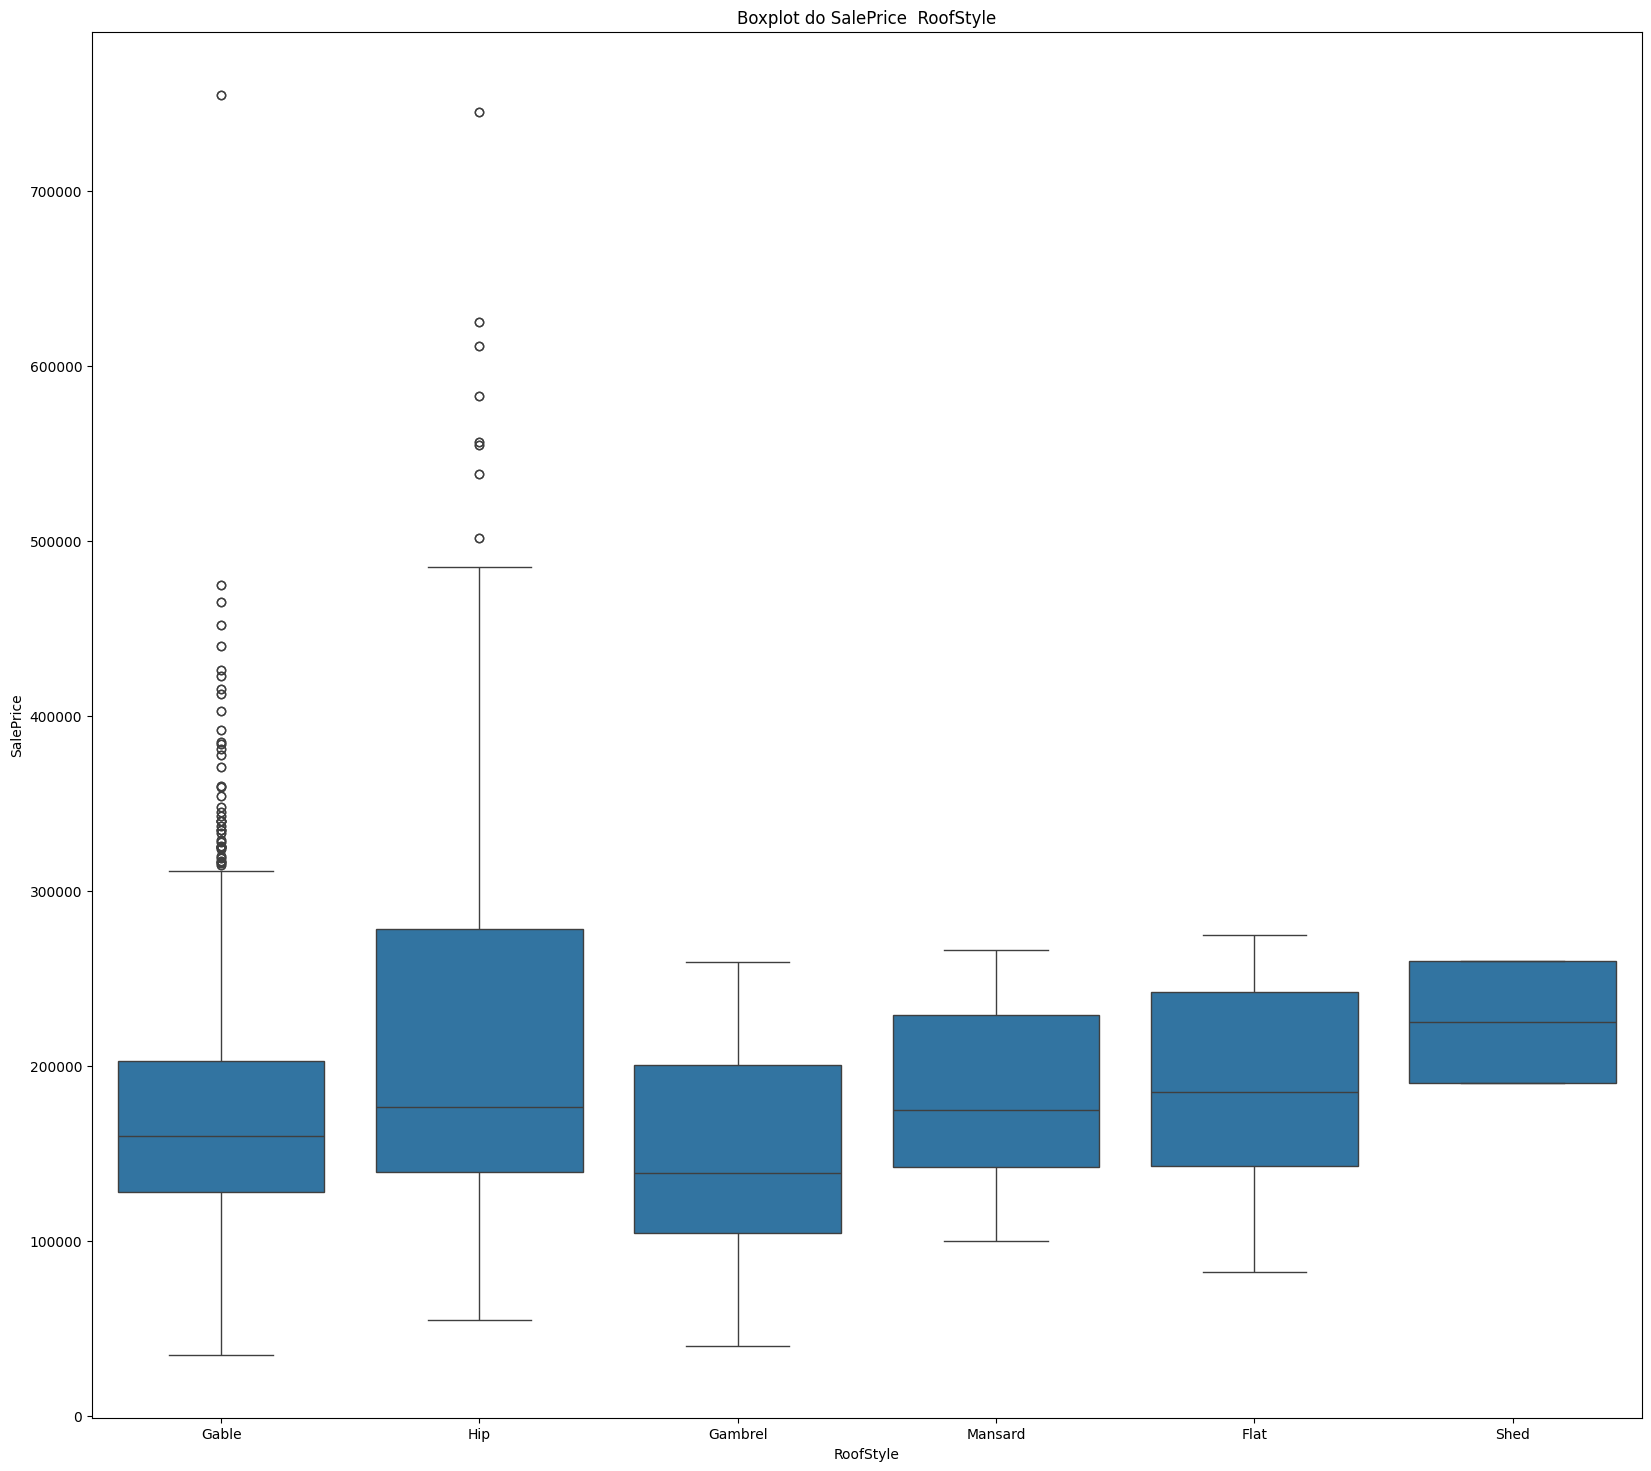

In [ ]:
box_plot('RoofStyle')

## **RoofMatl**

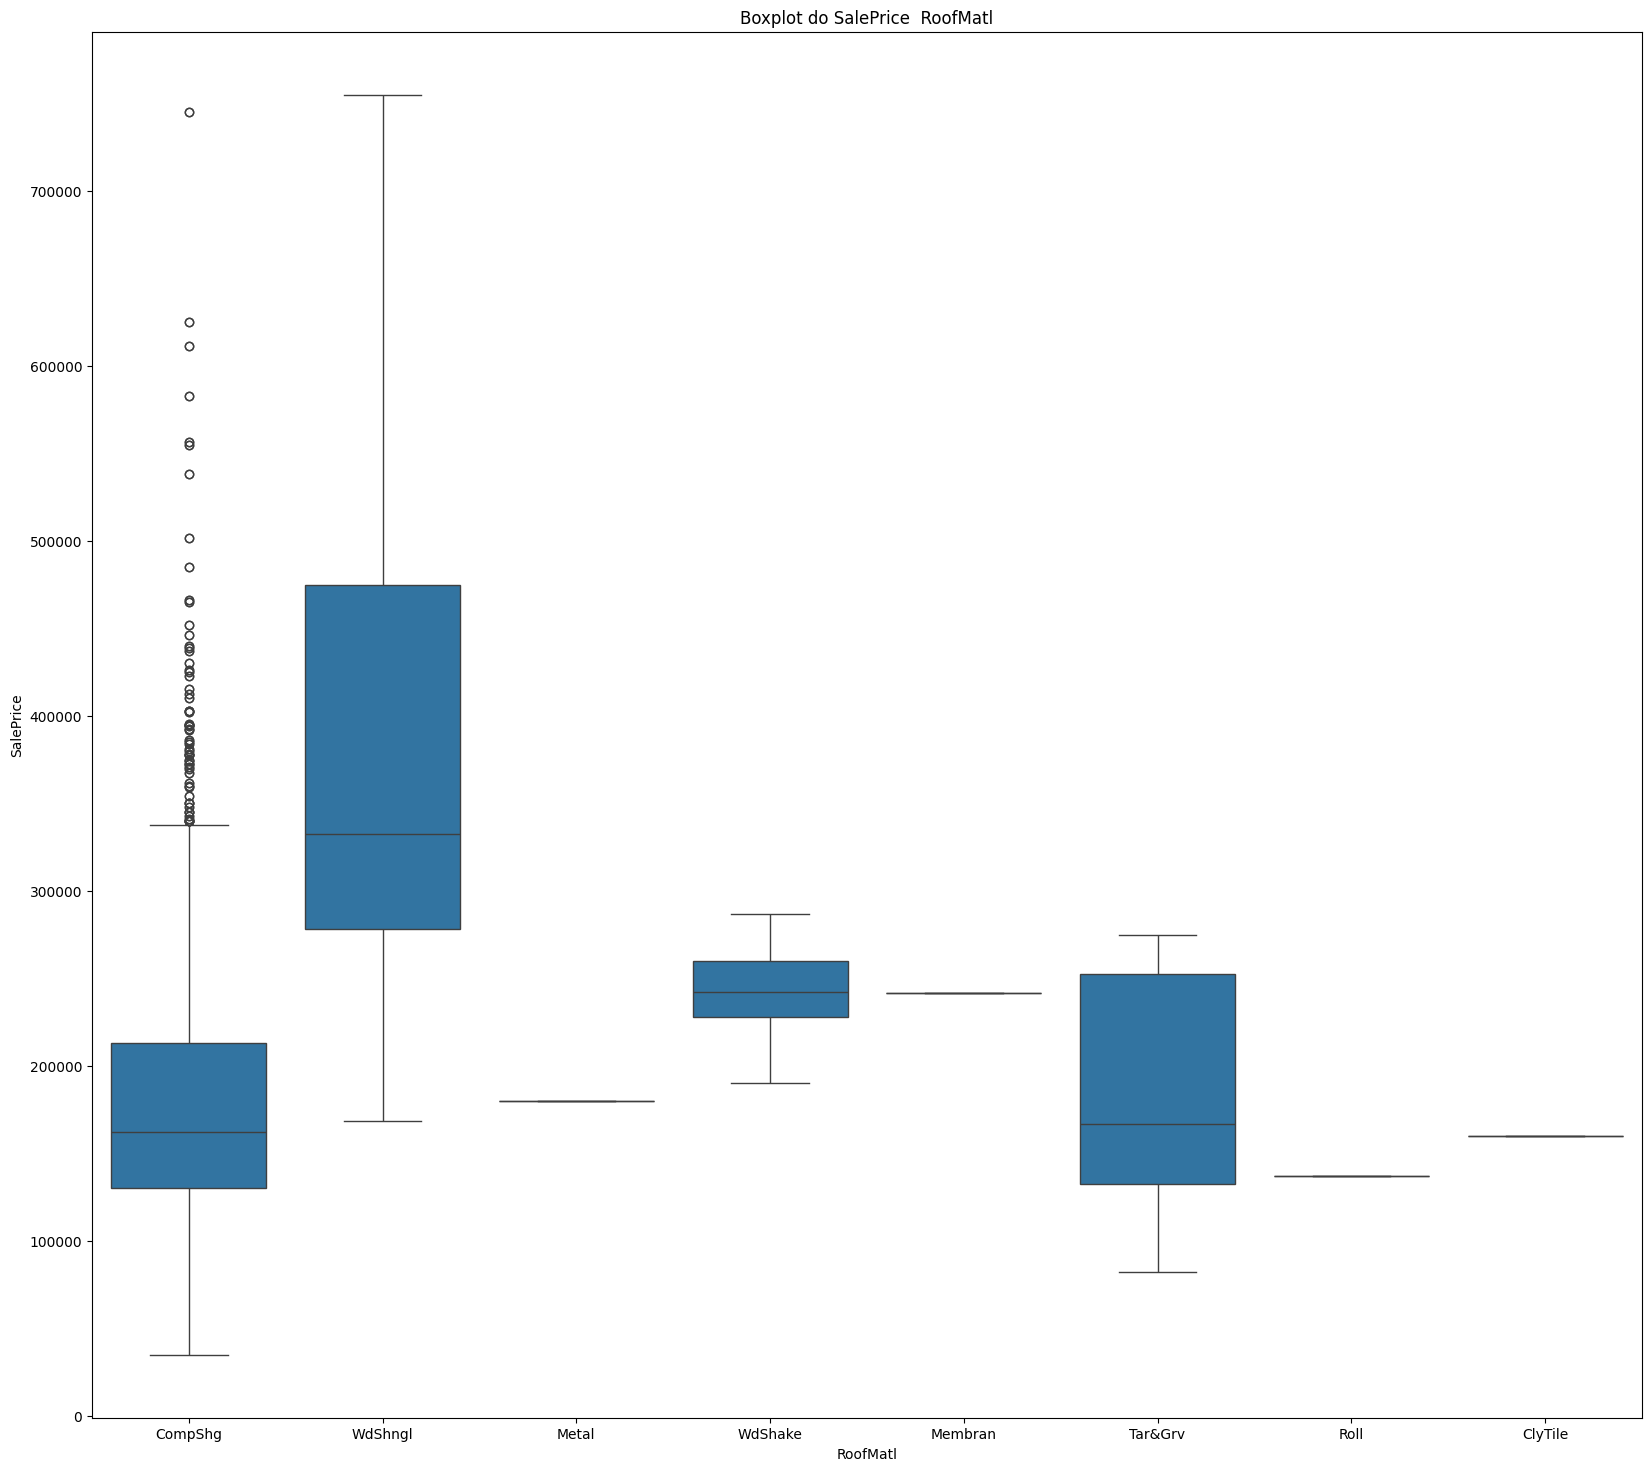

In [ ]:
box_plot('RoofMatl')

## **Exterior1st**

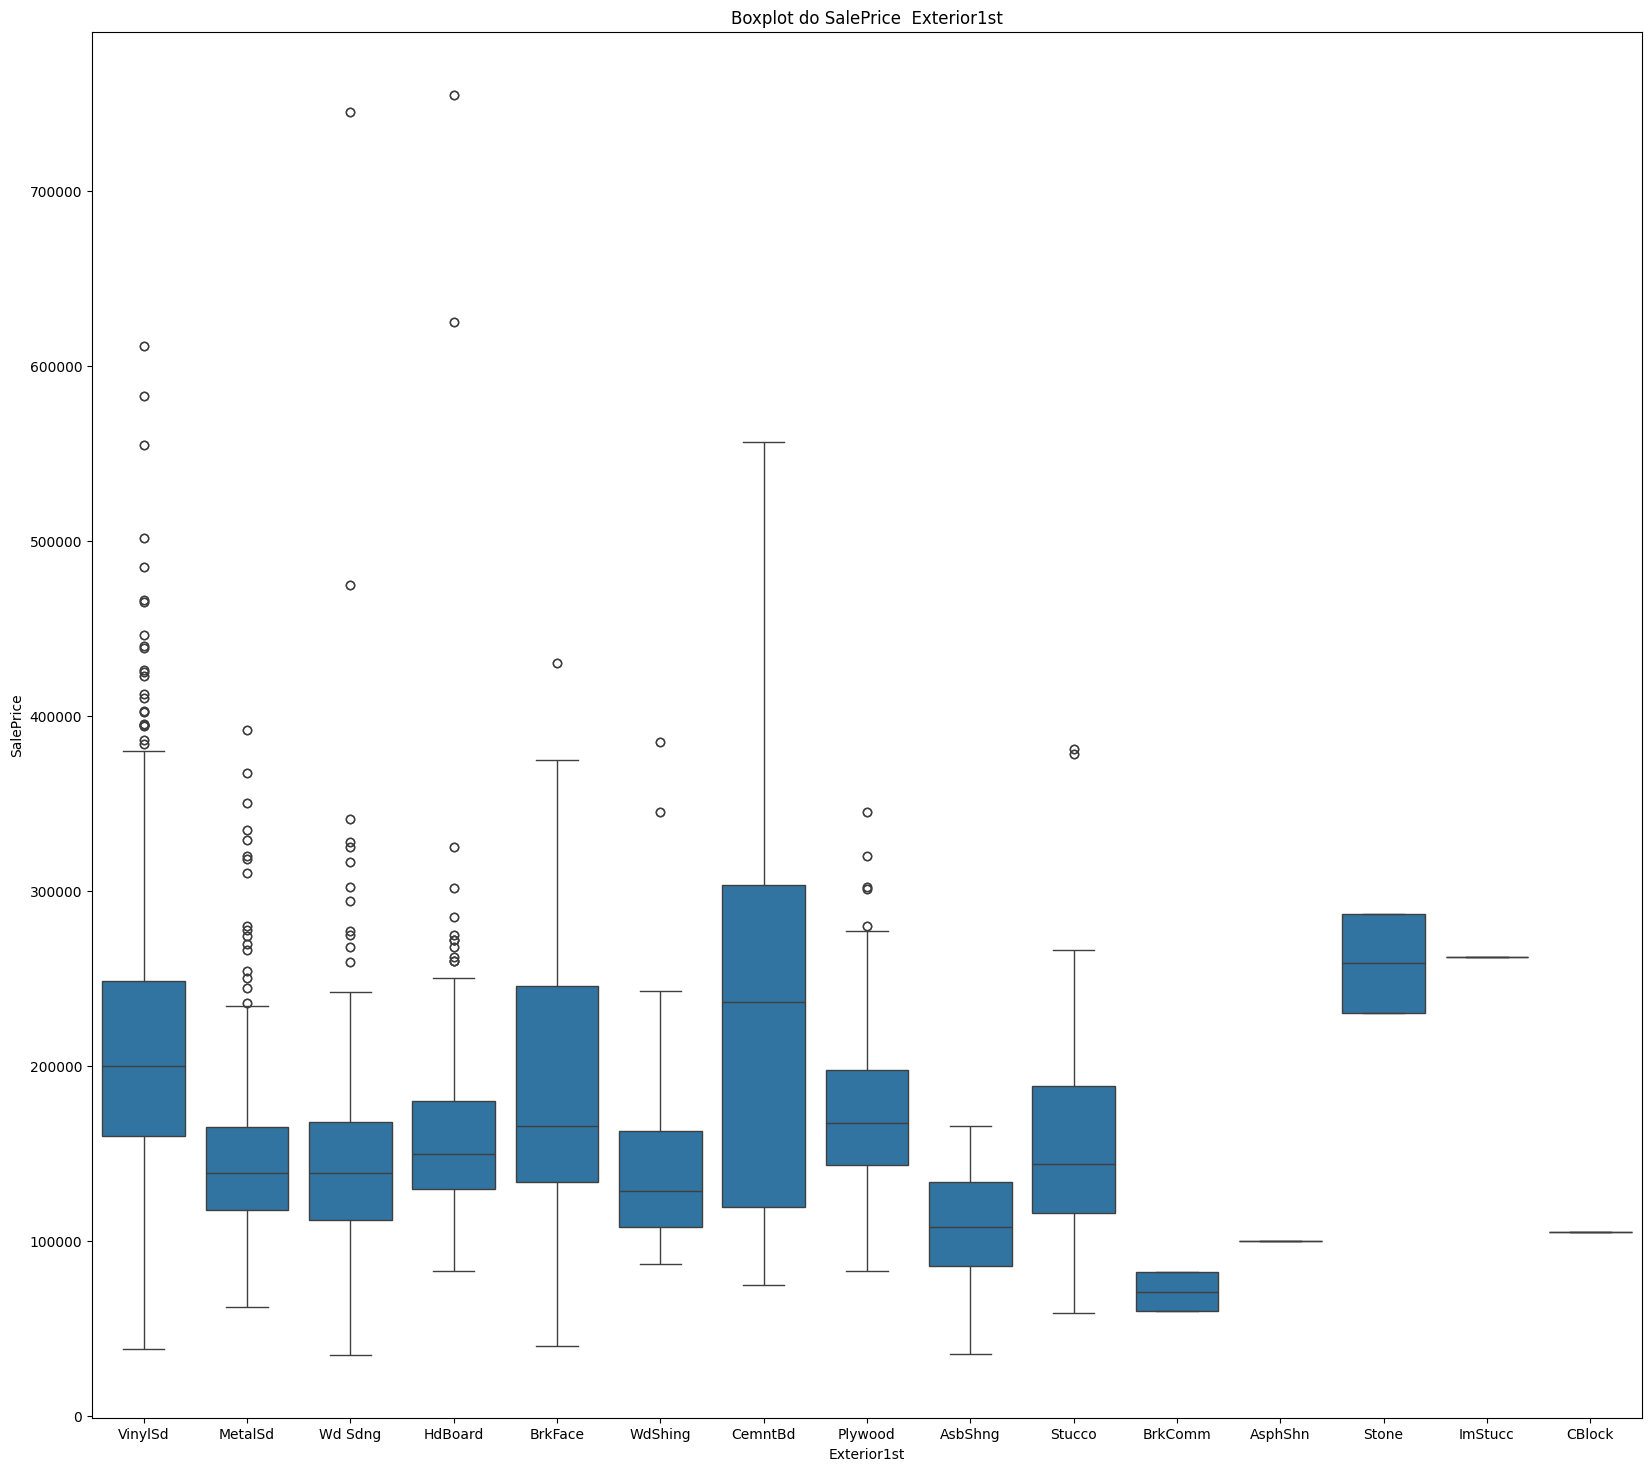

In [ ]:
box_plot('Exterior1st')

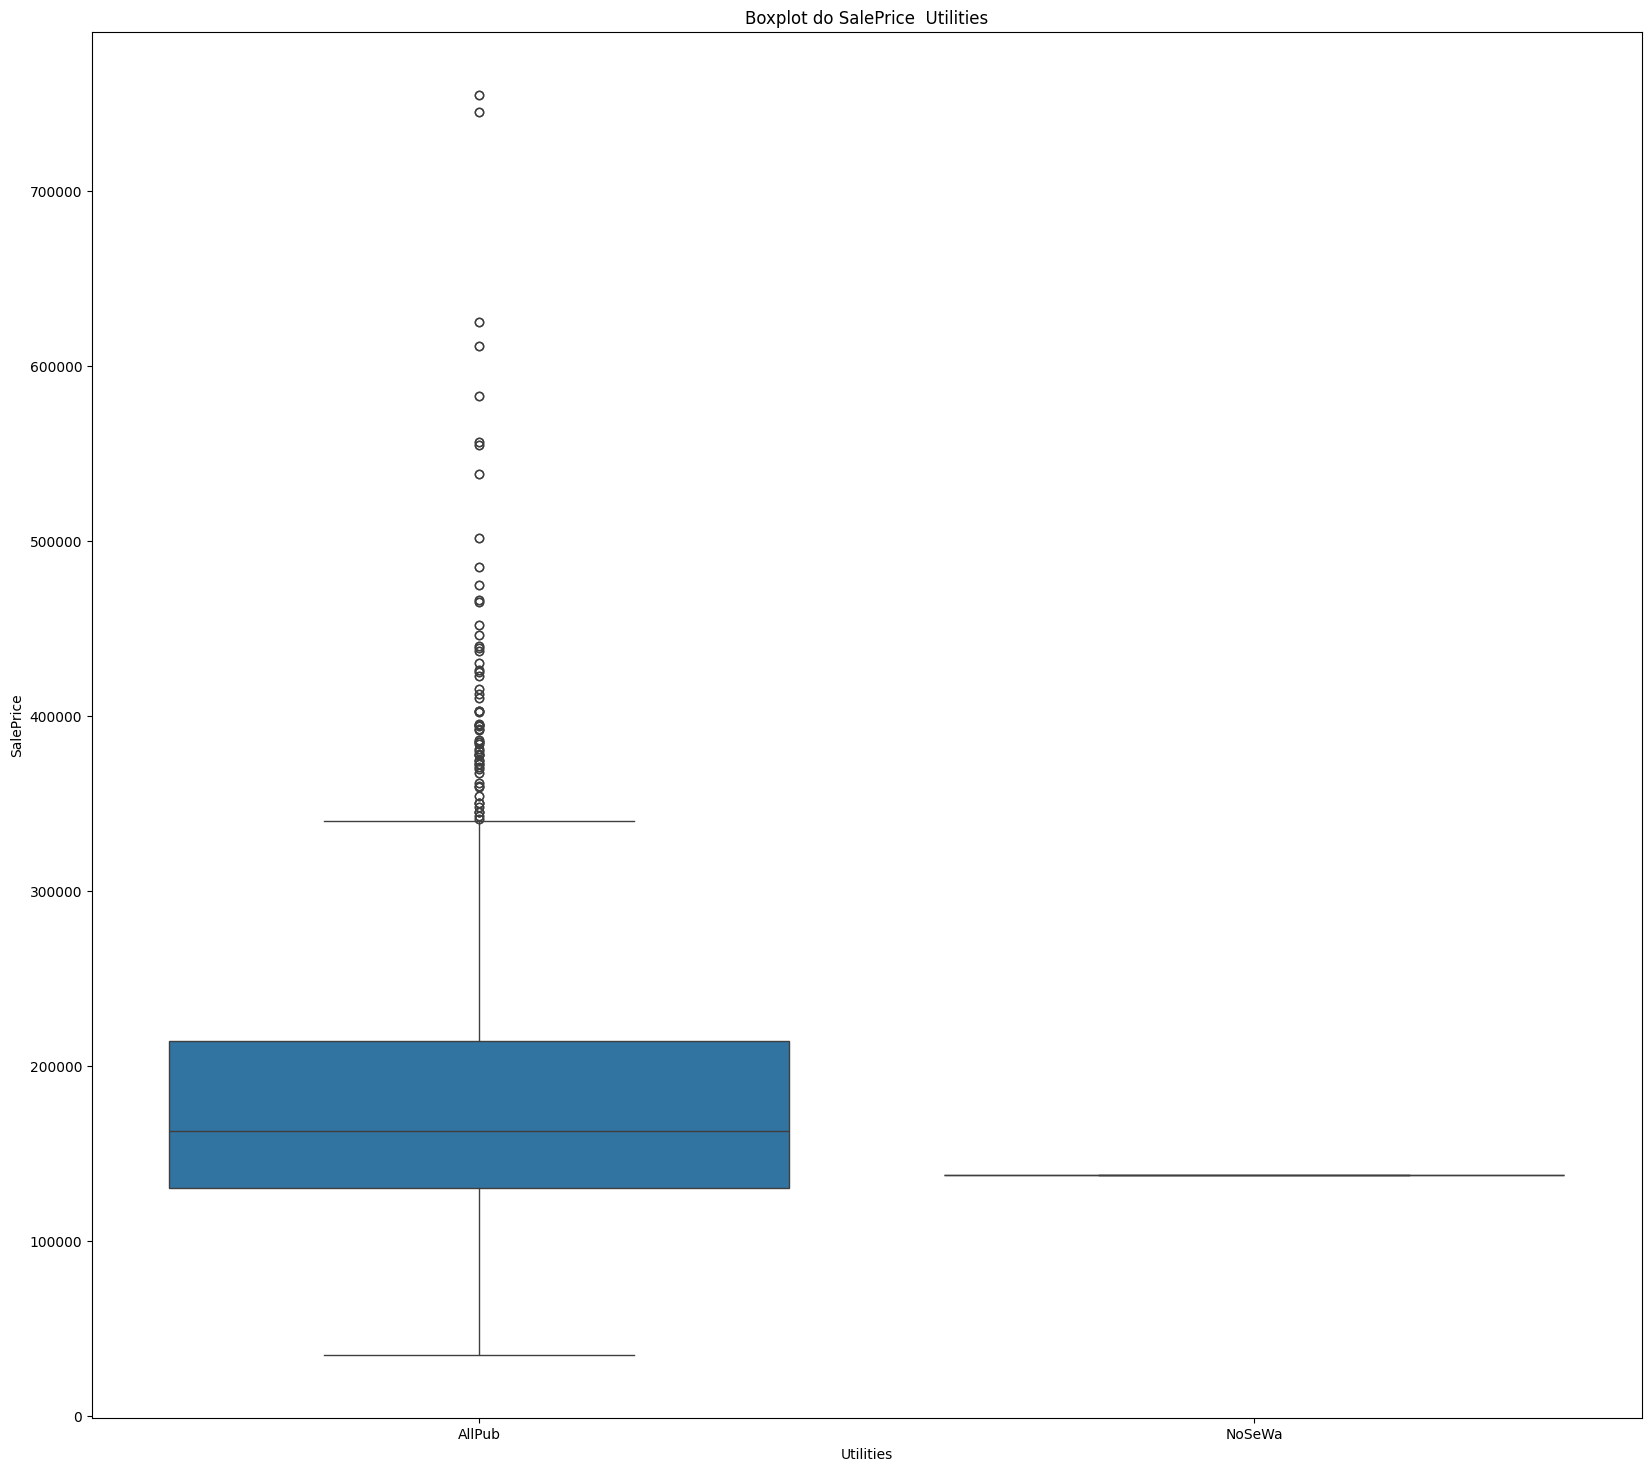

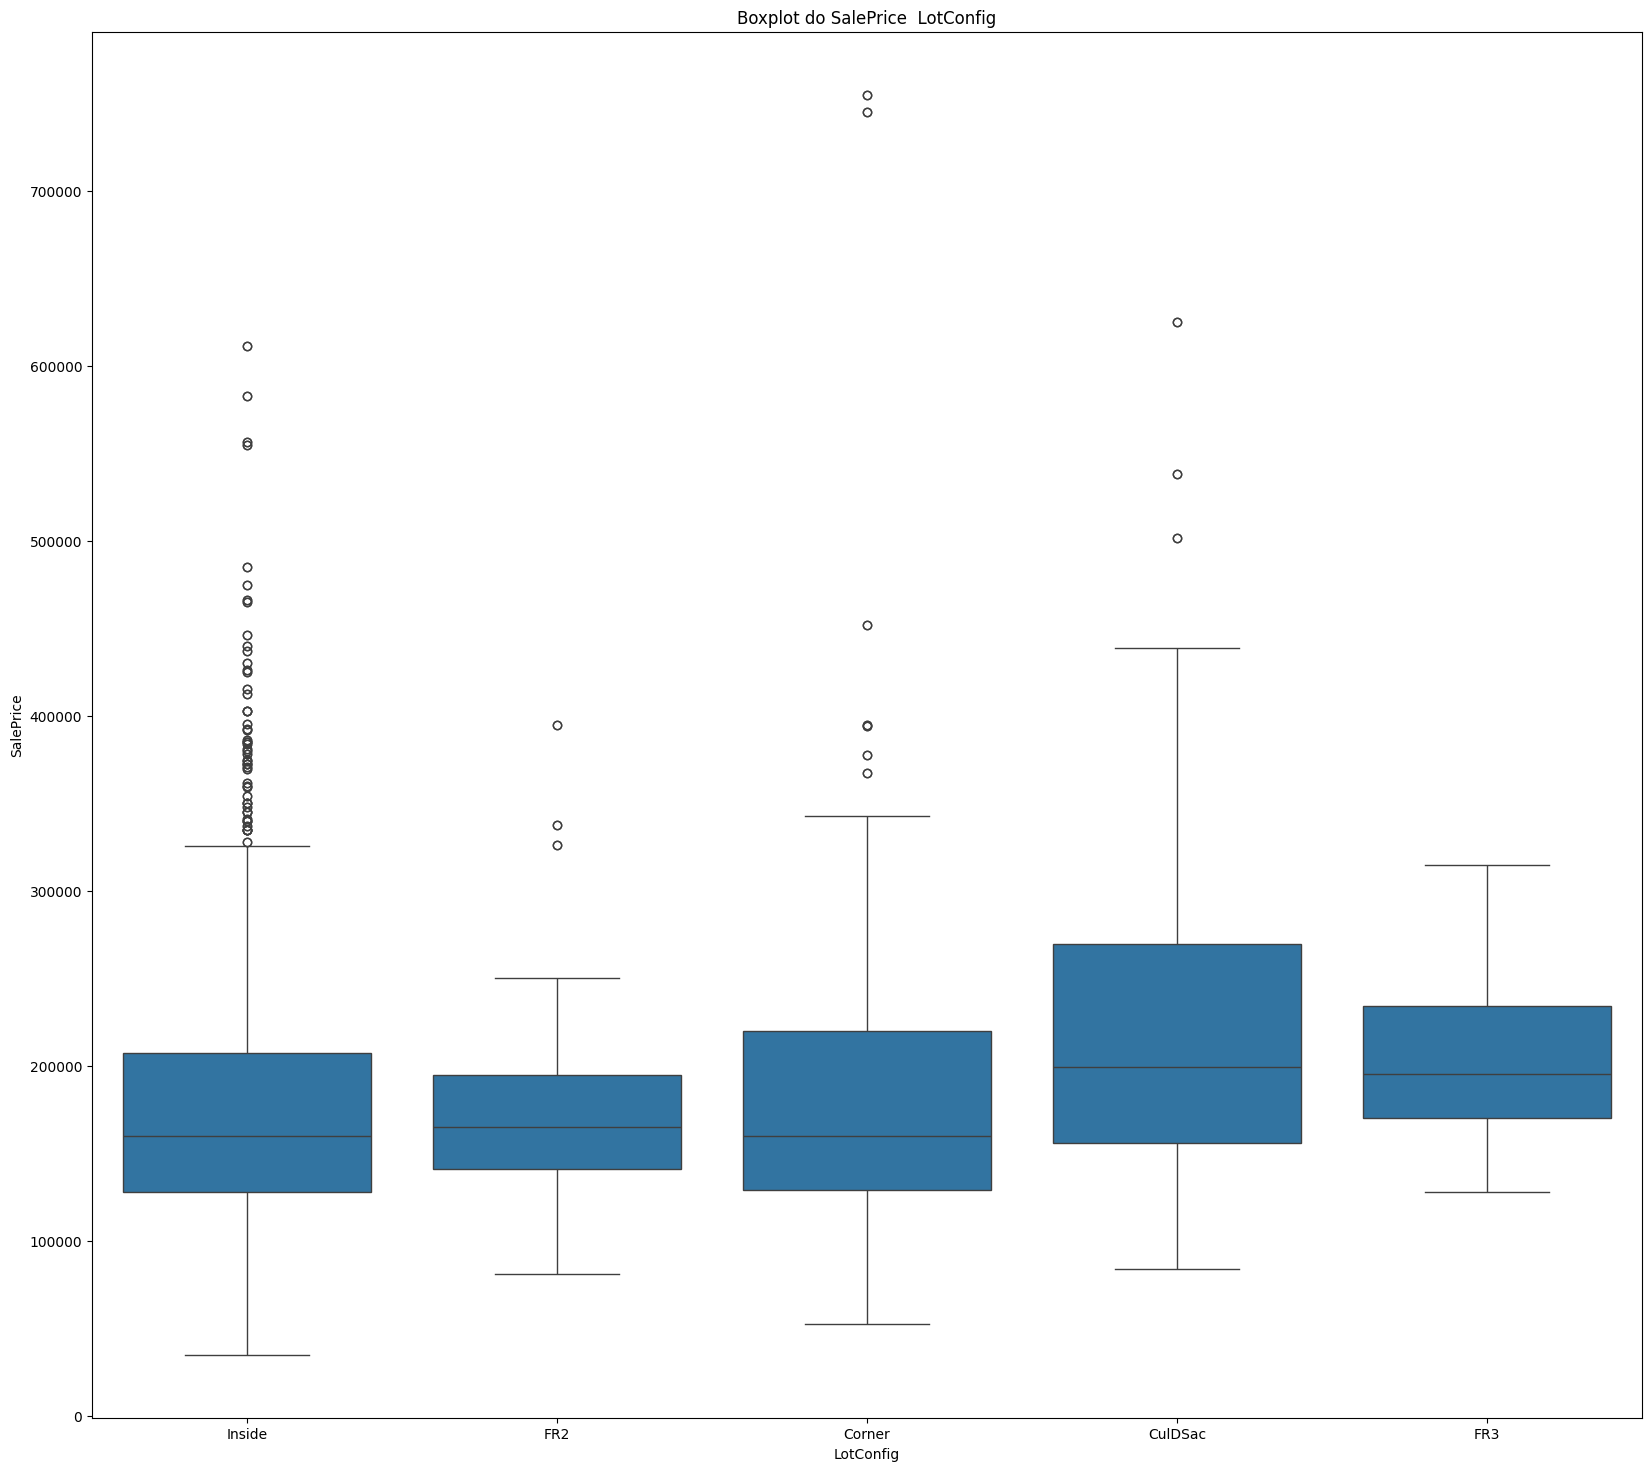

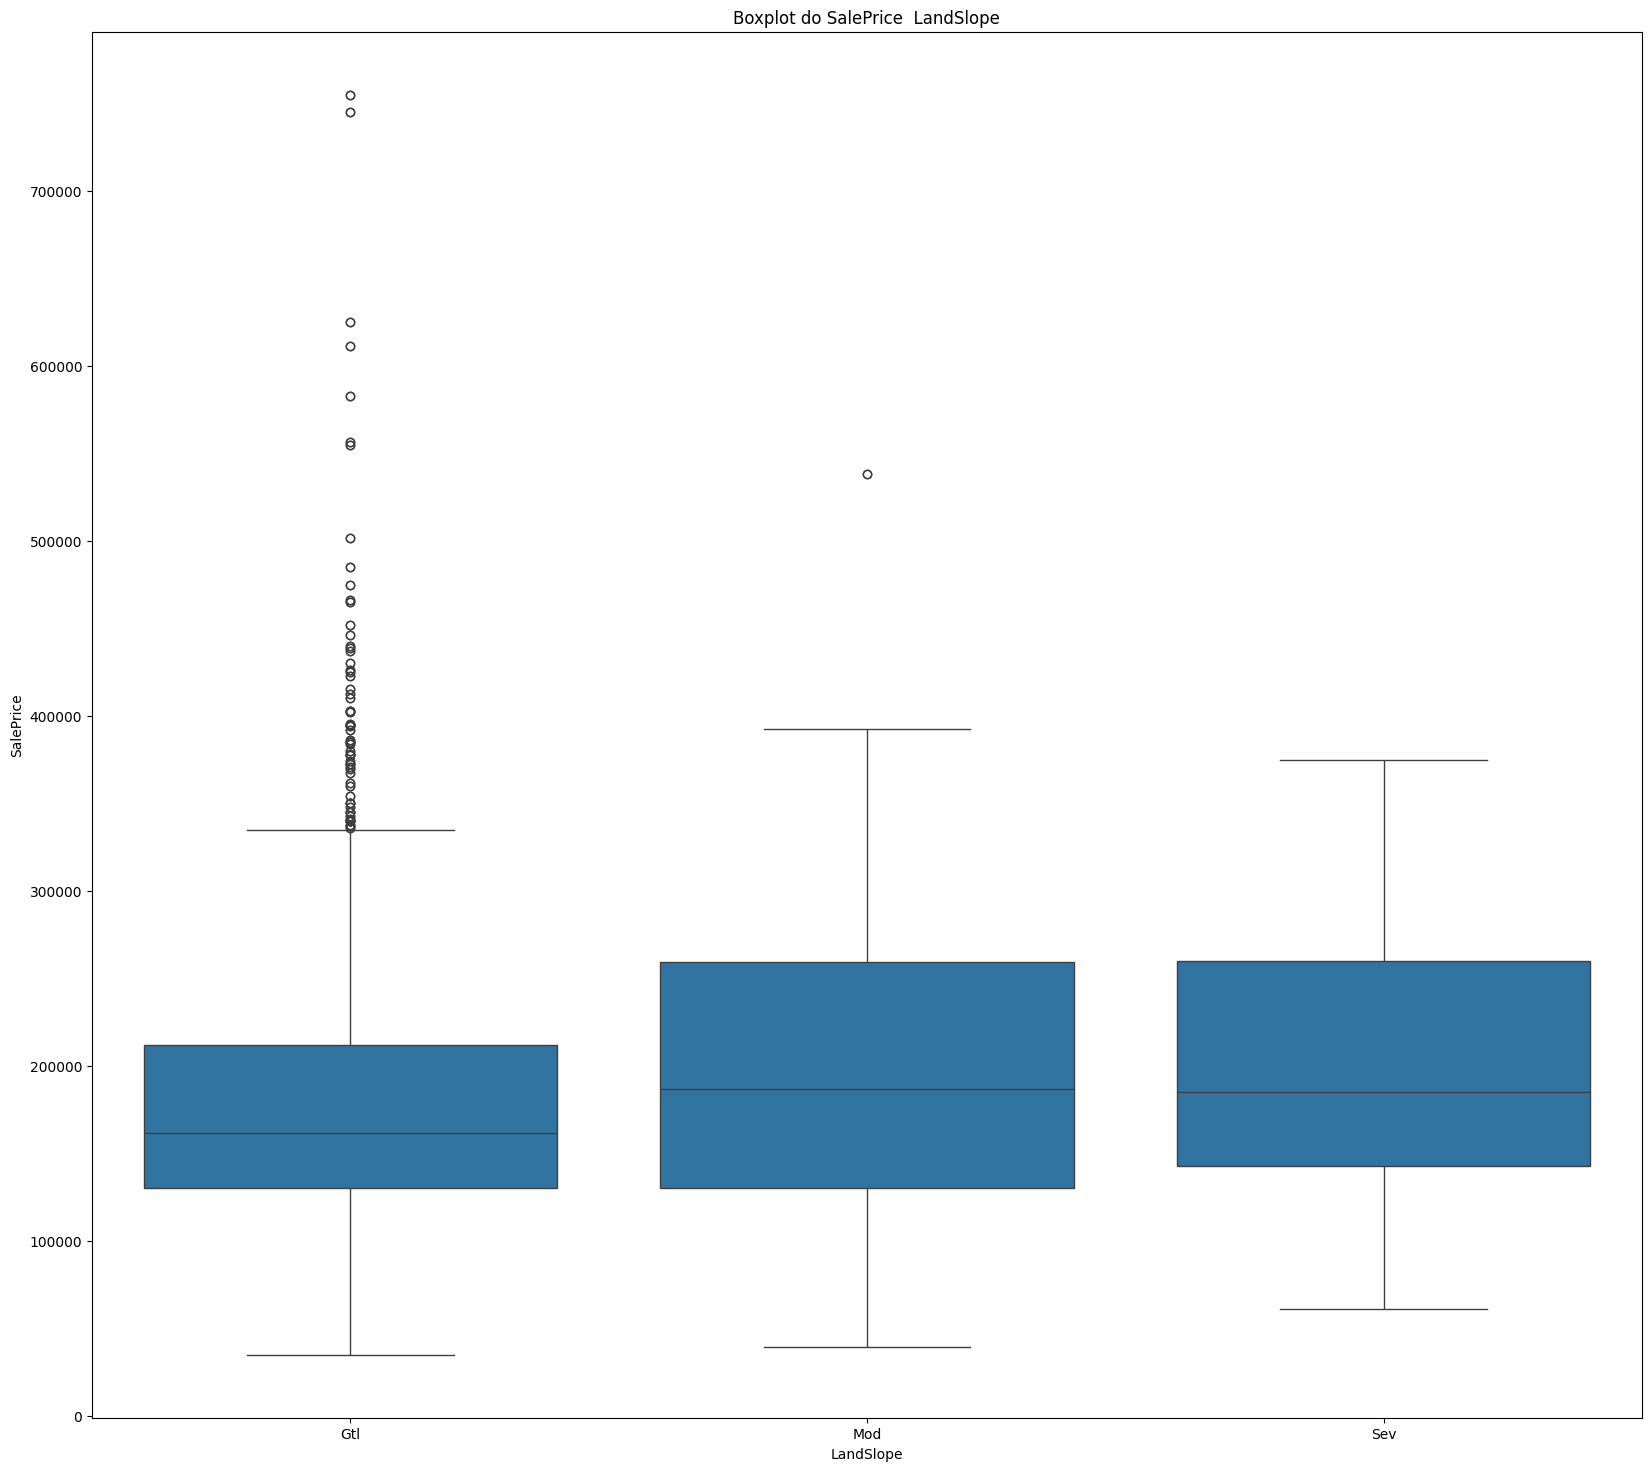

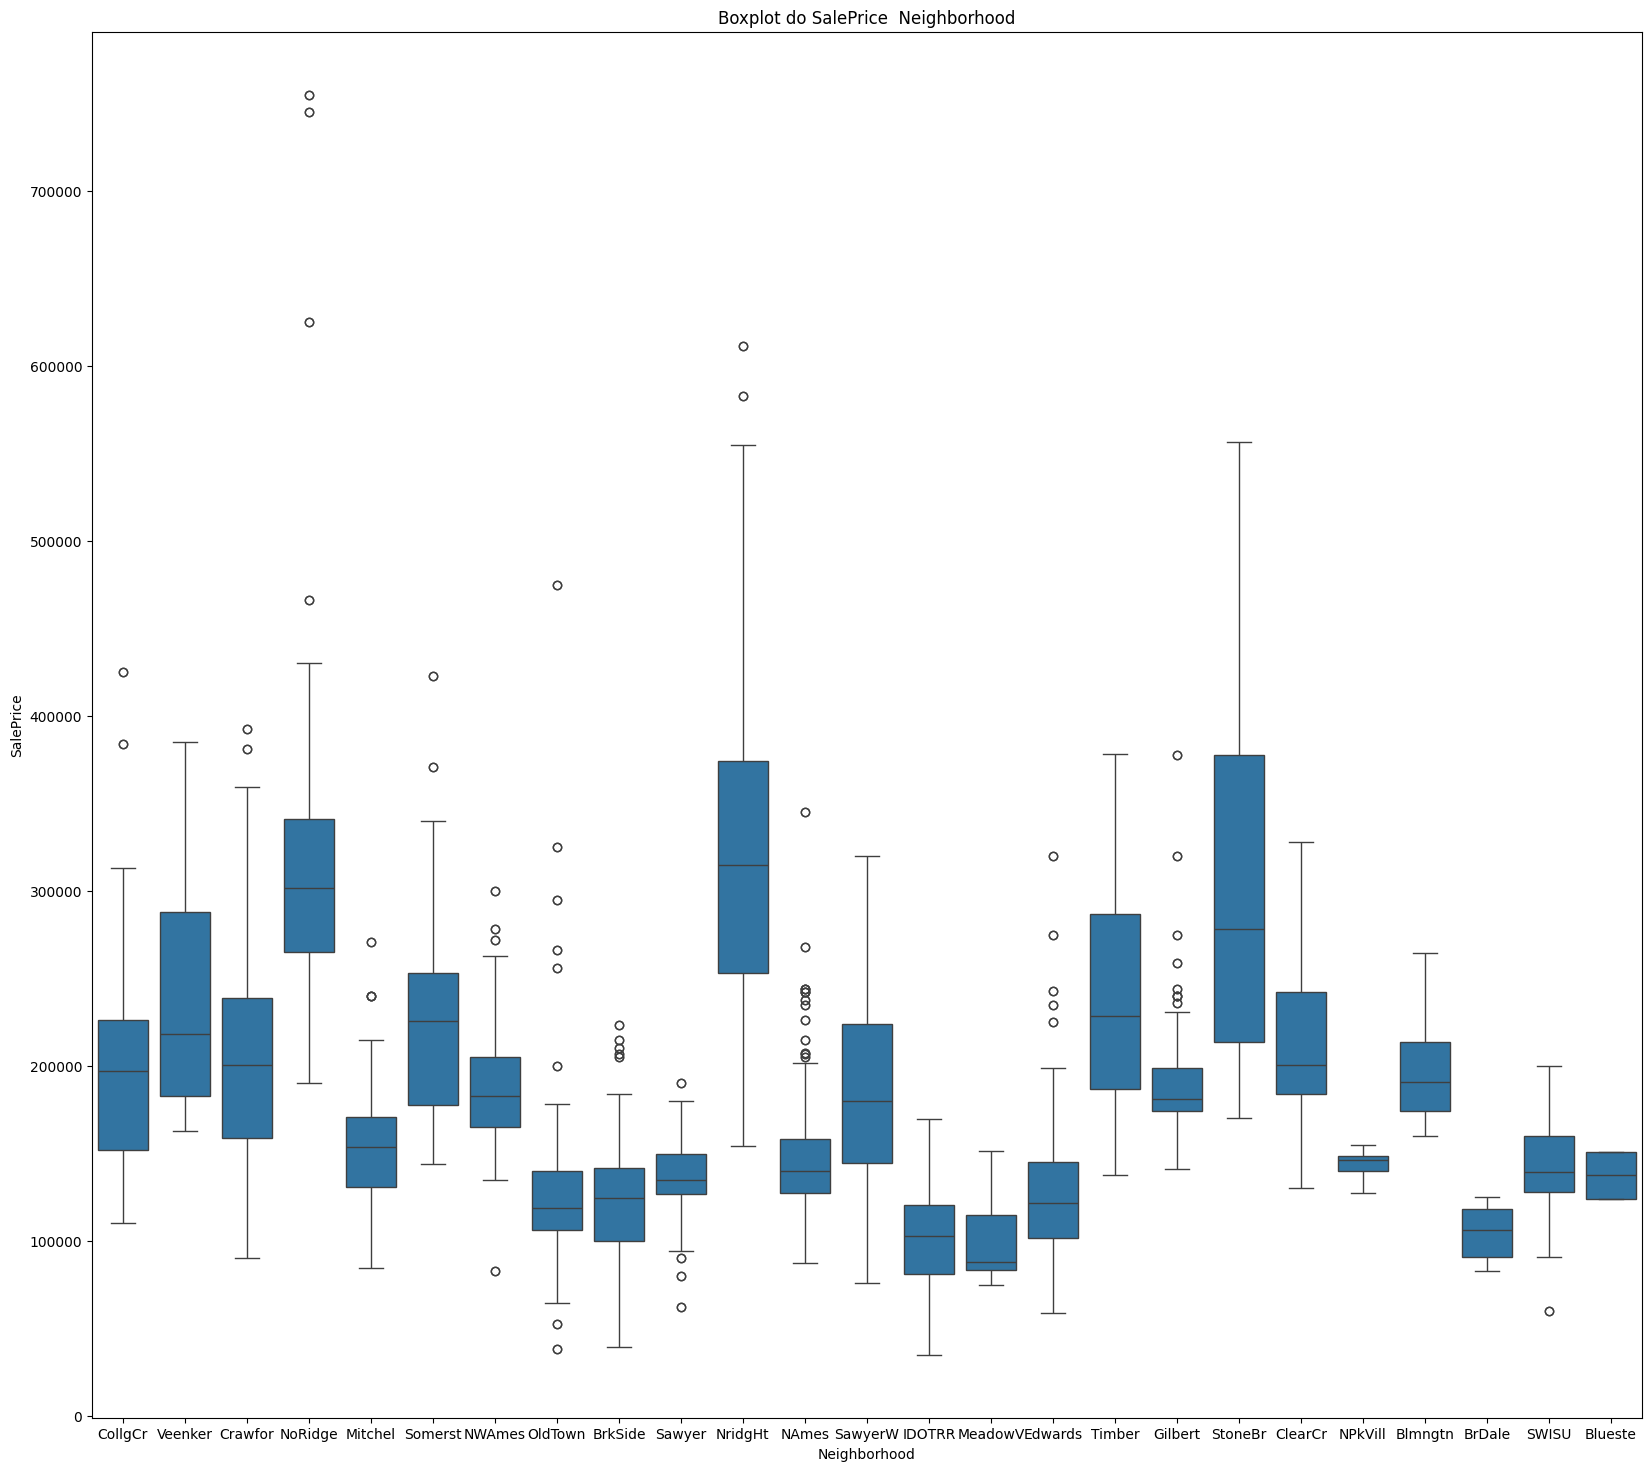

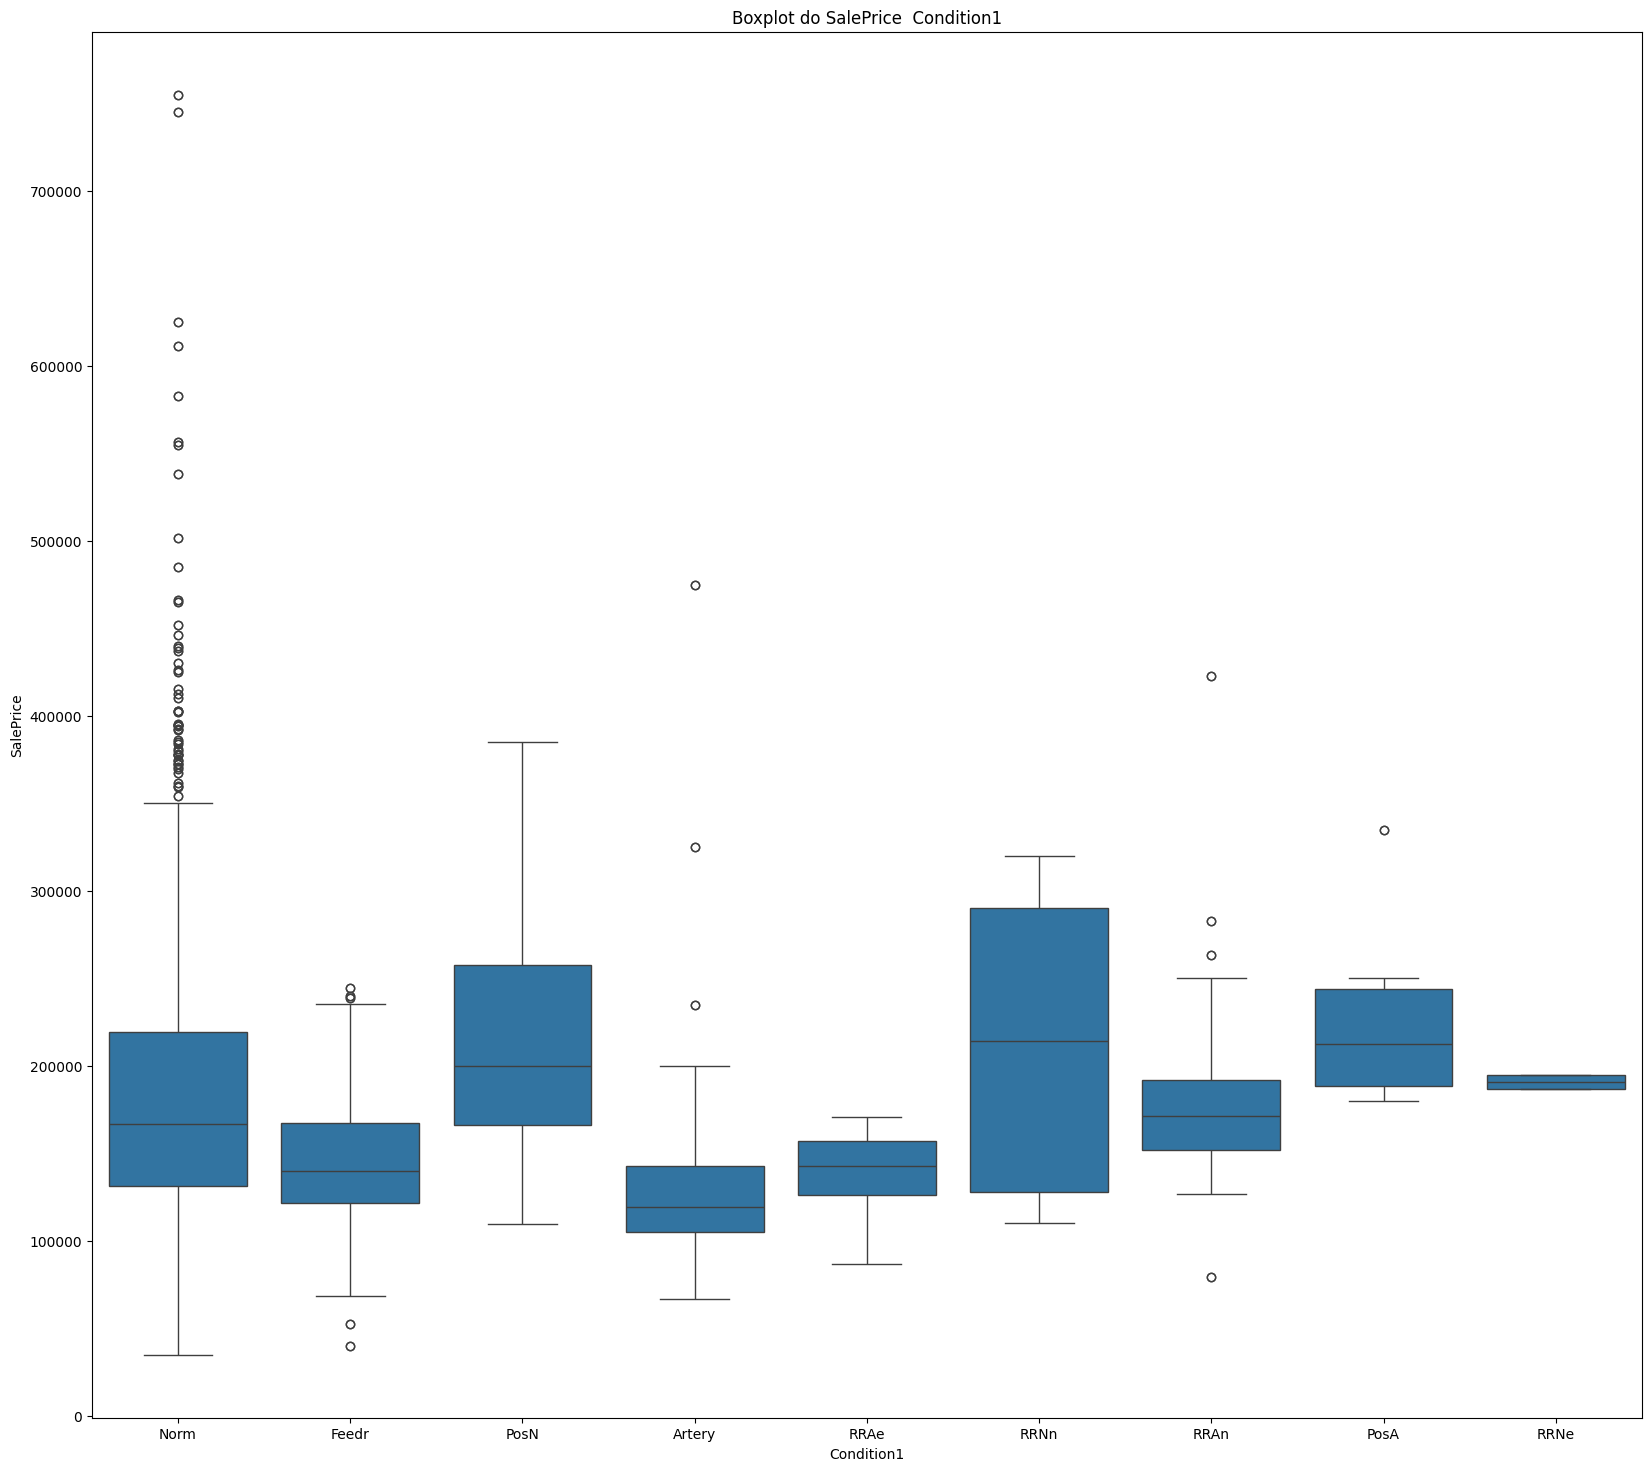

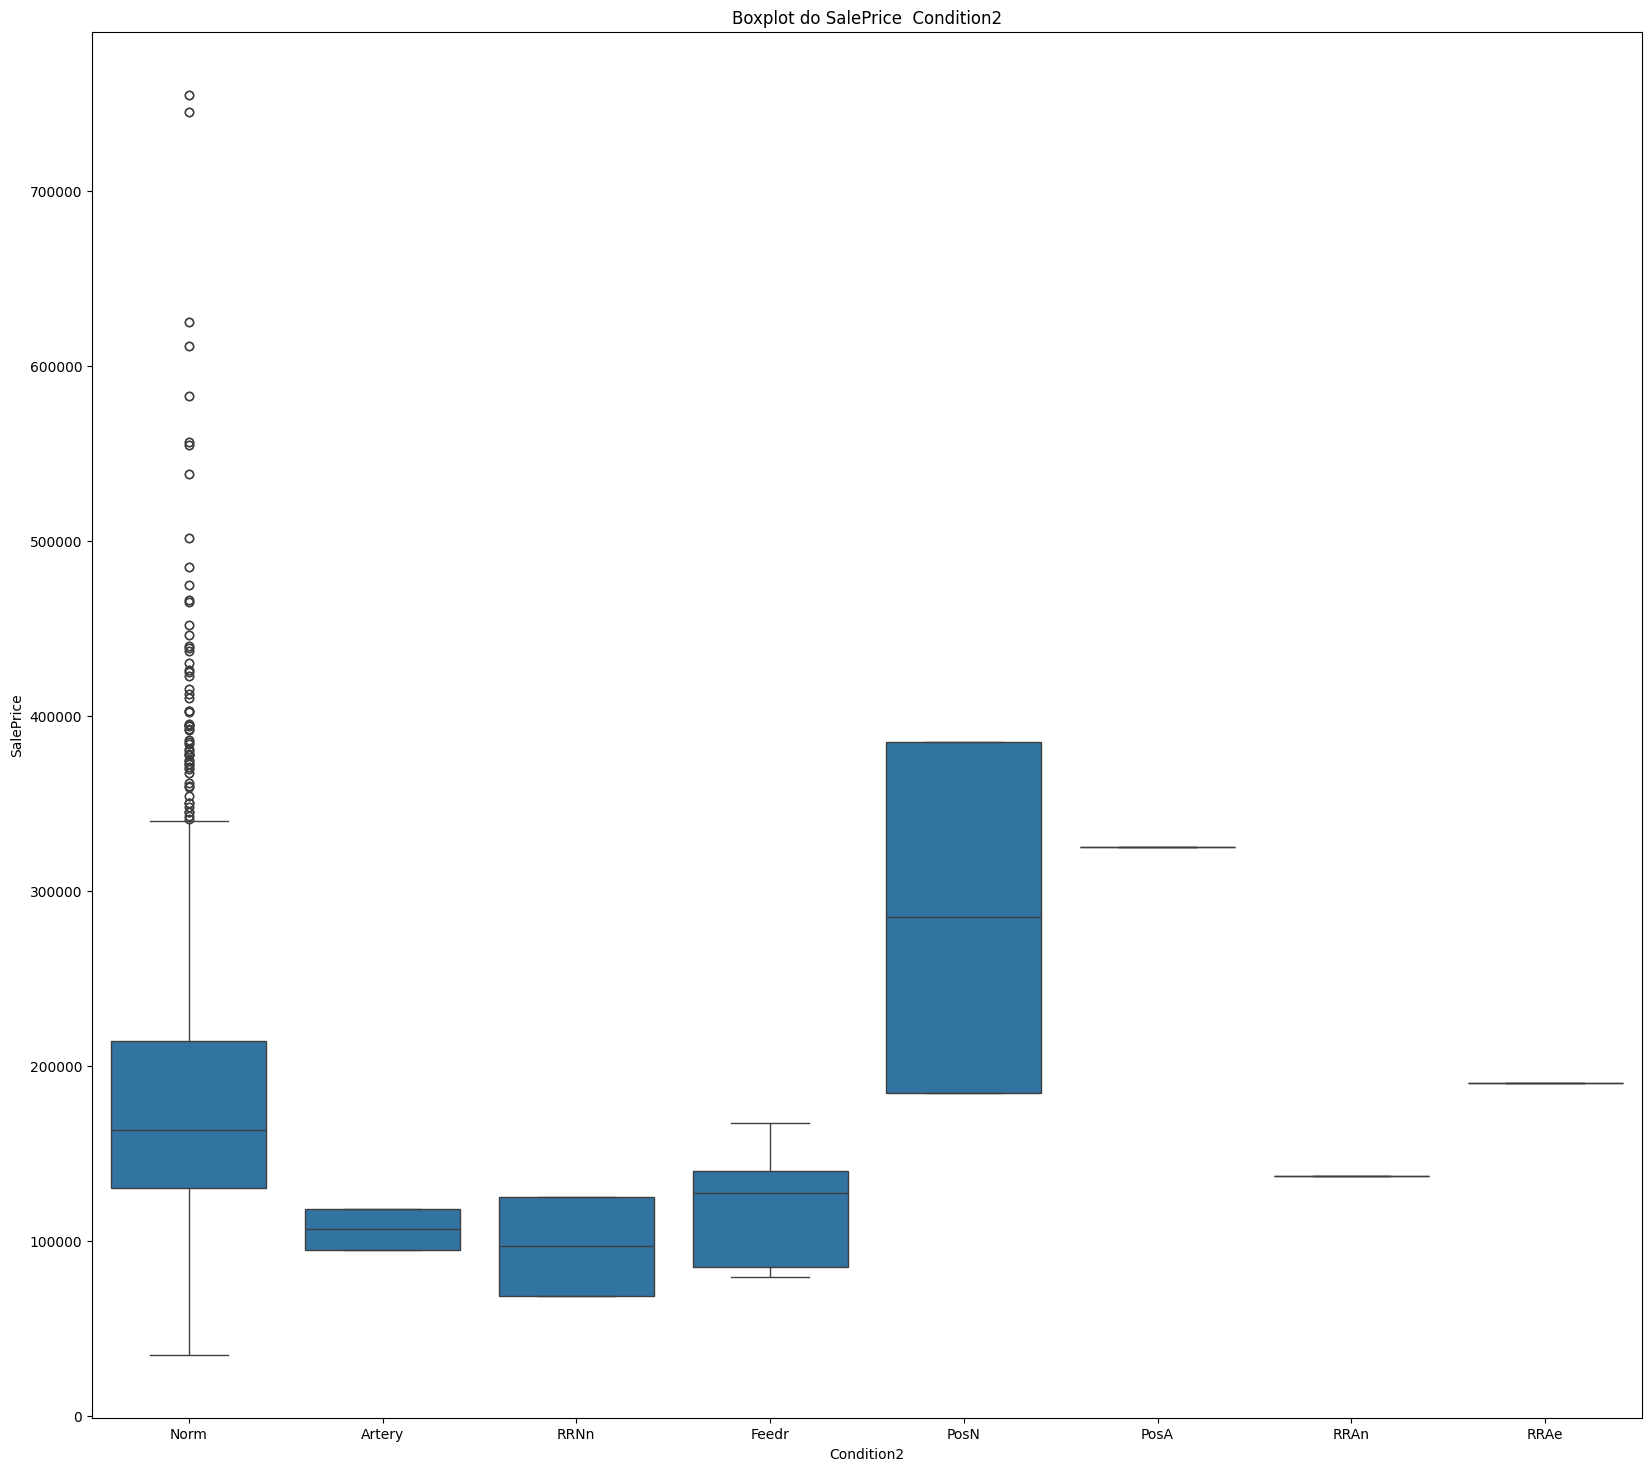

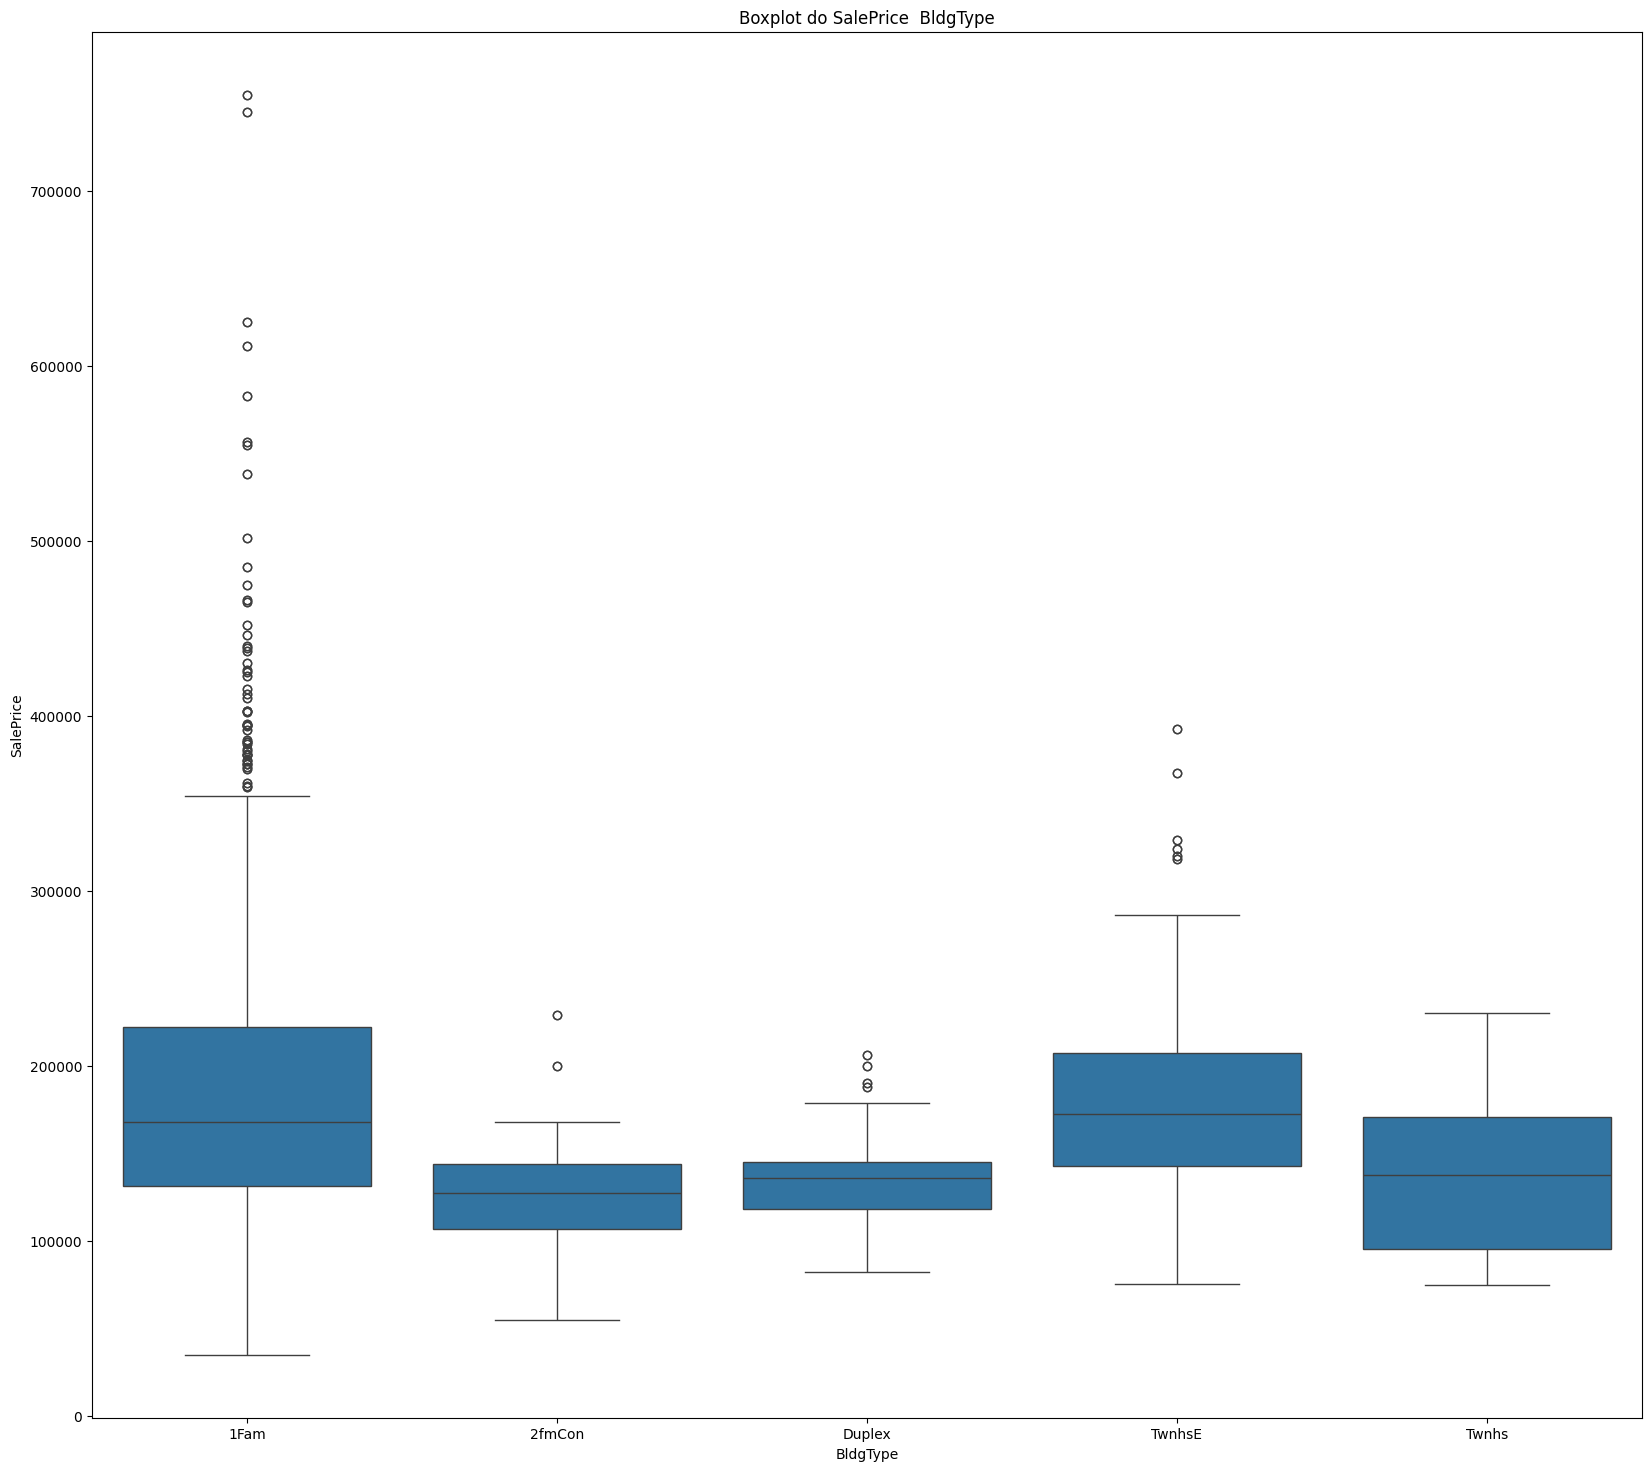

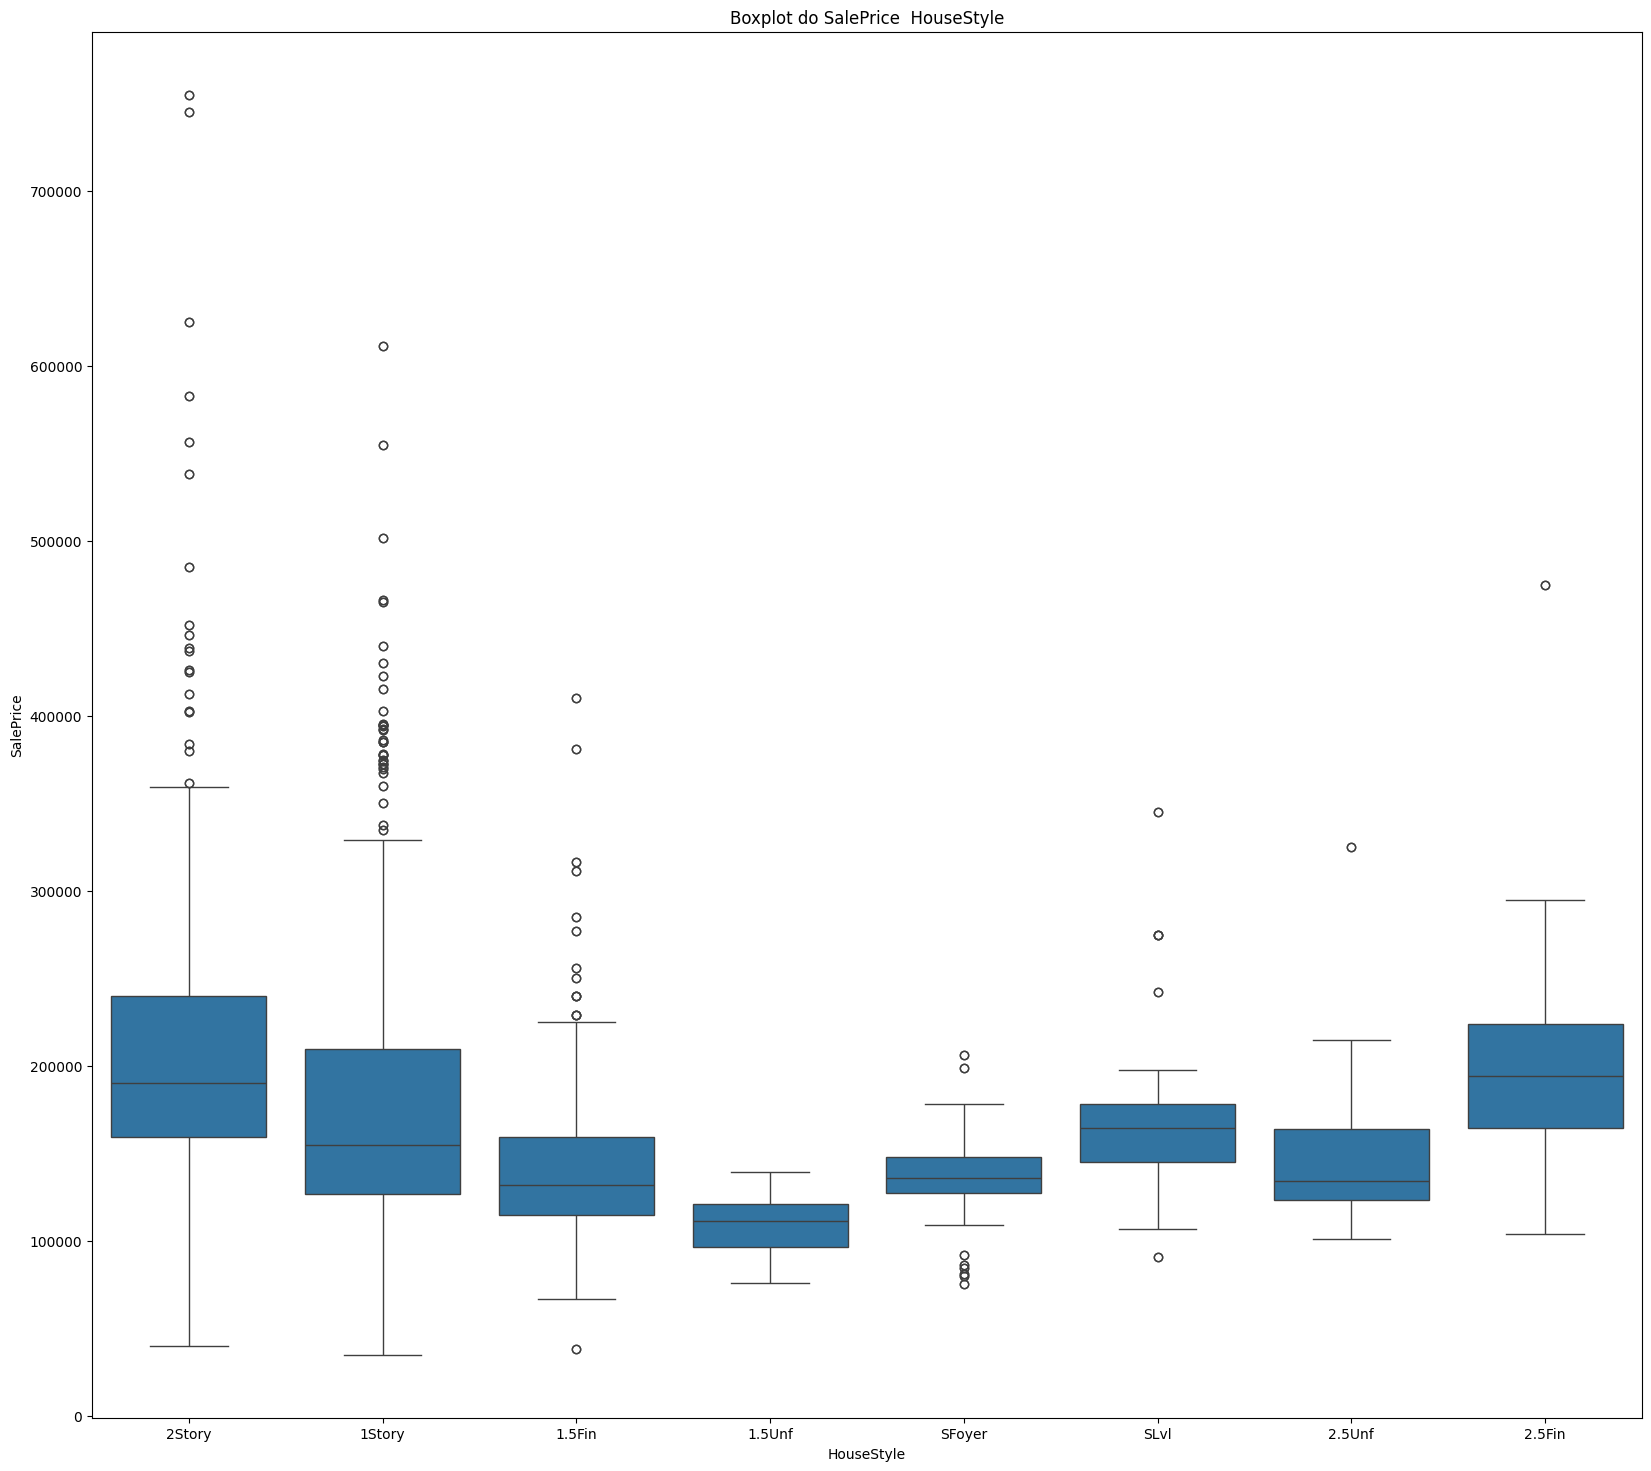

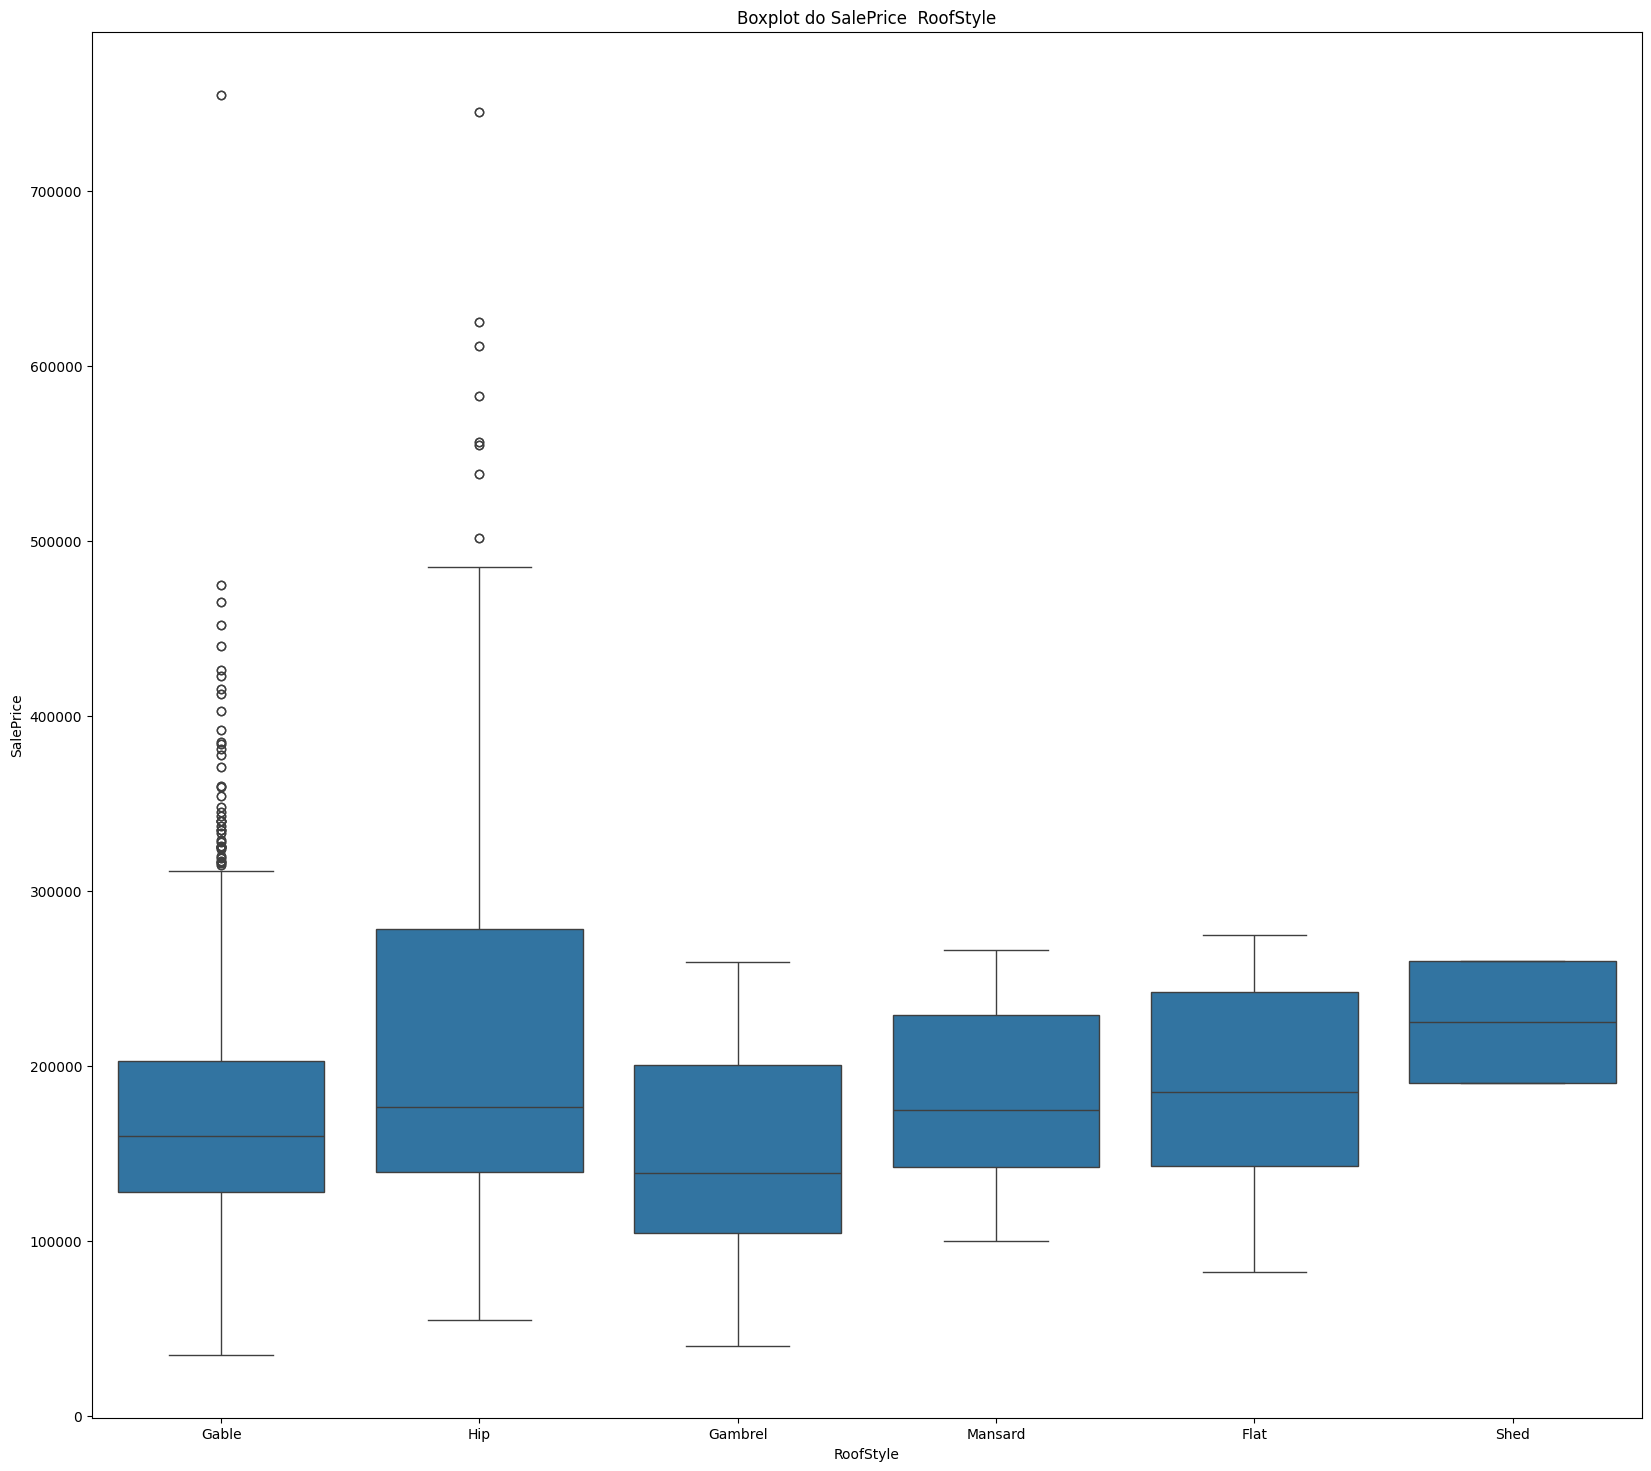

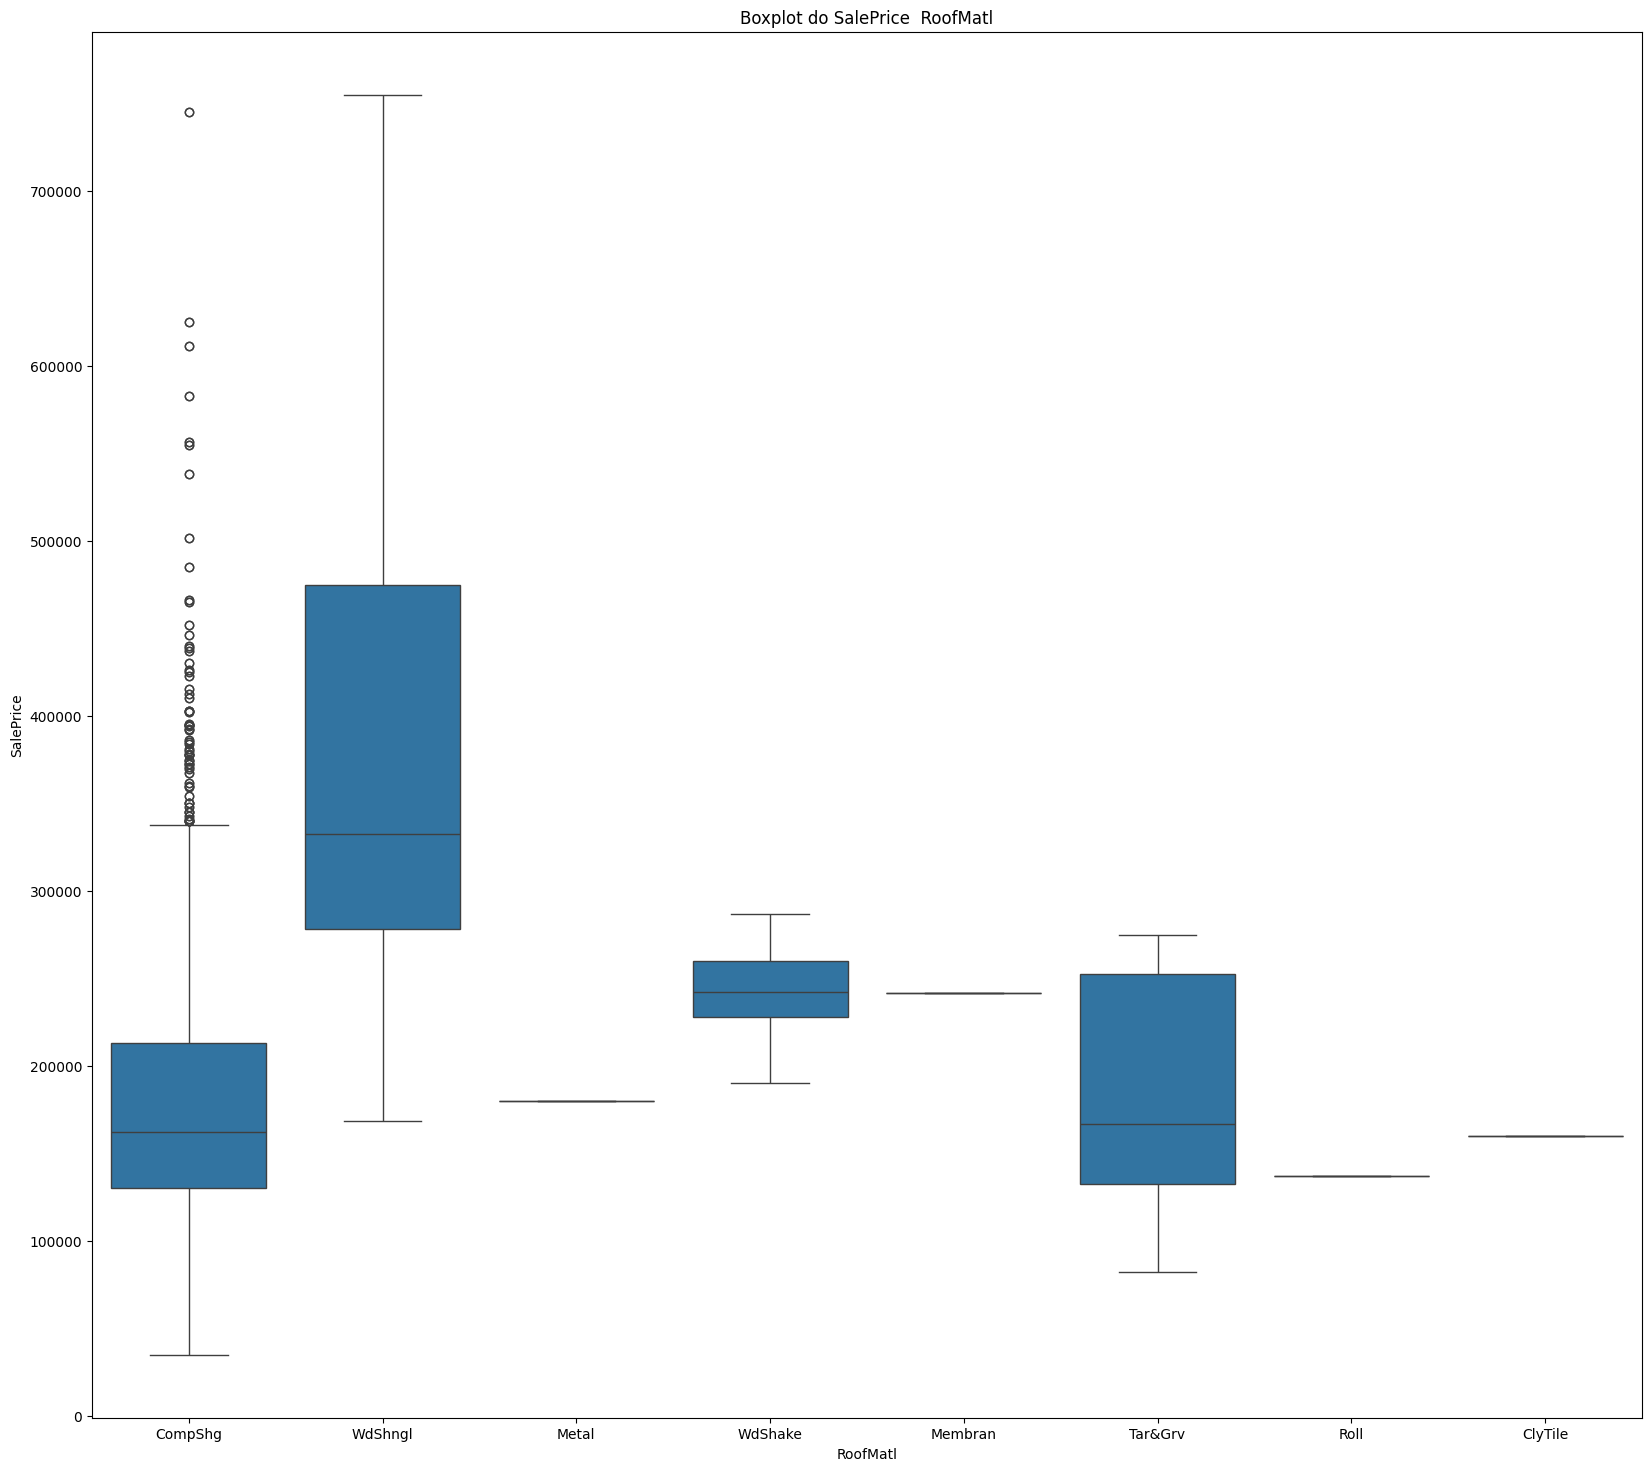

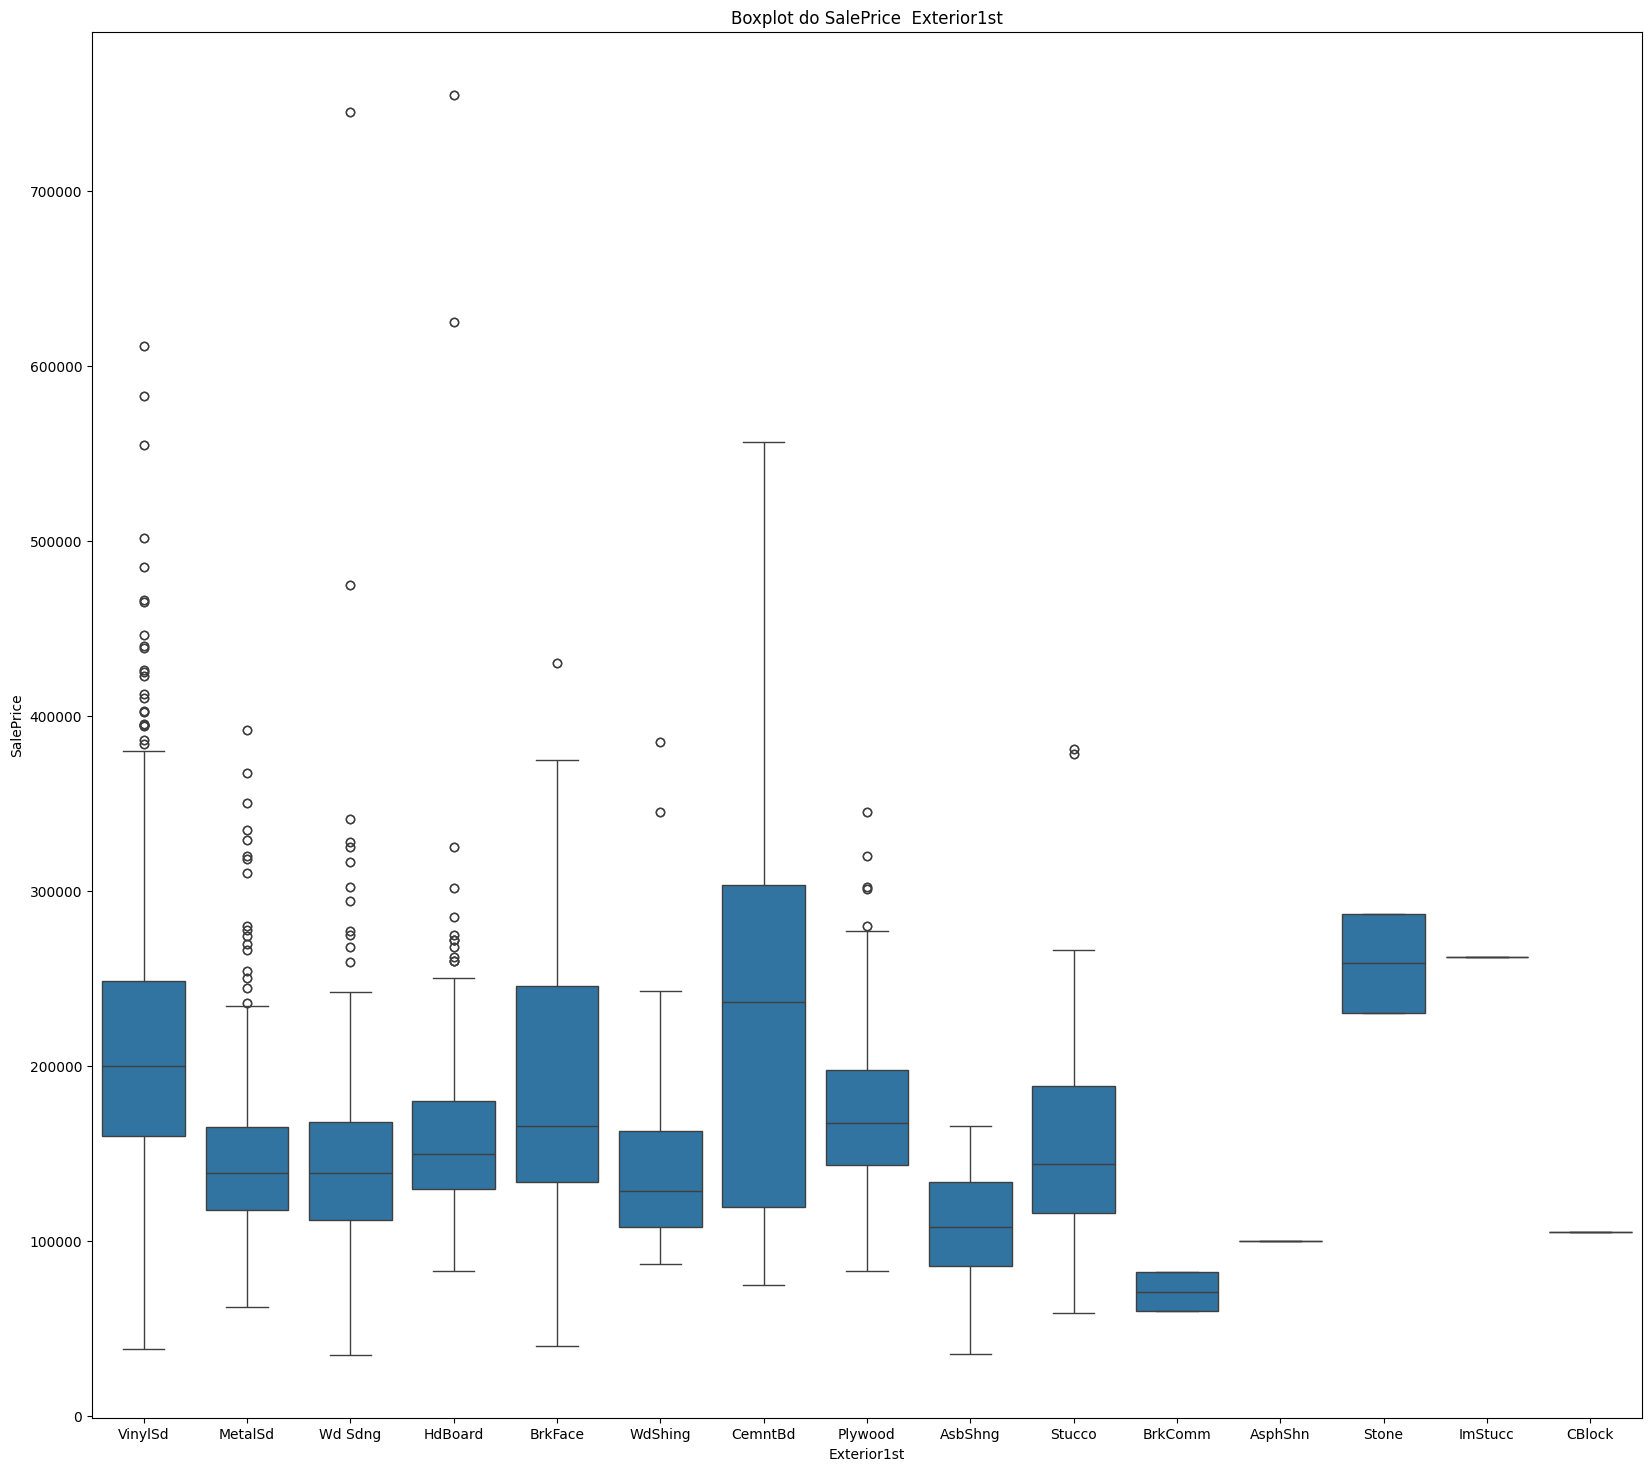

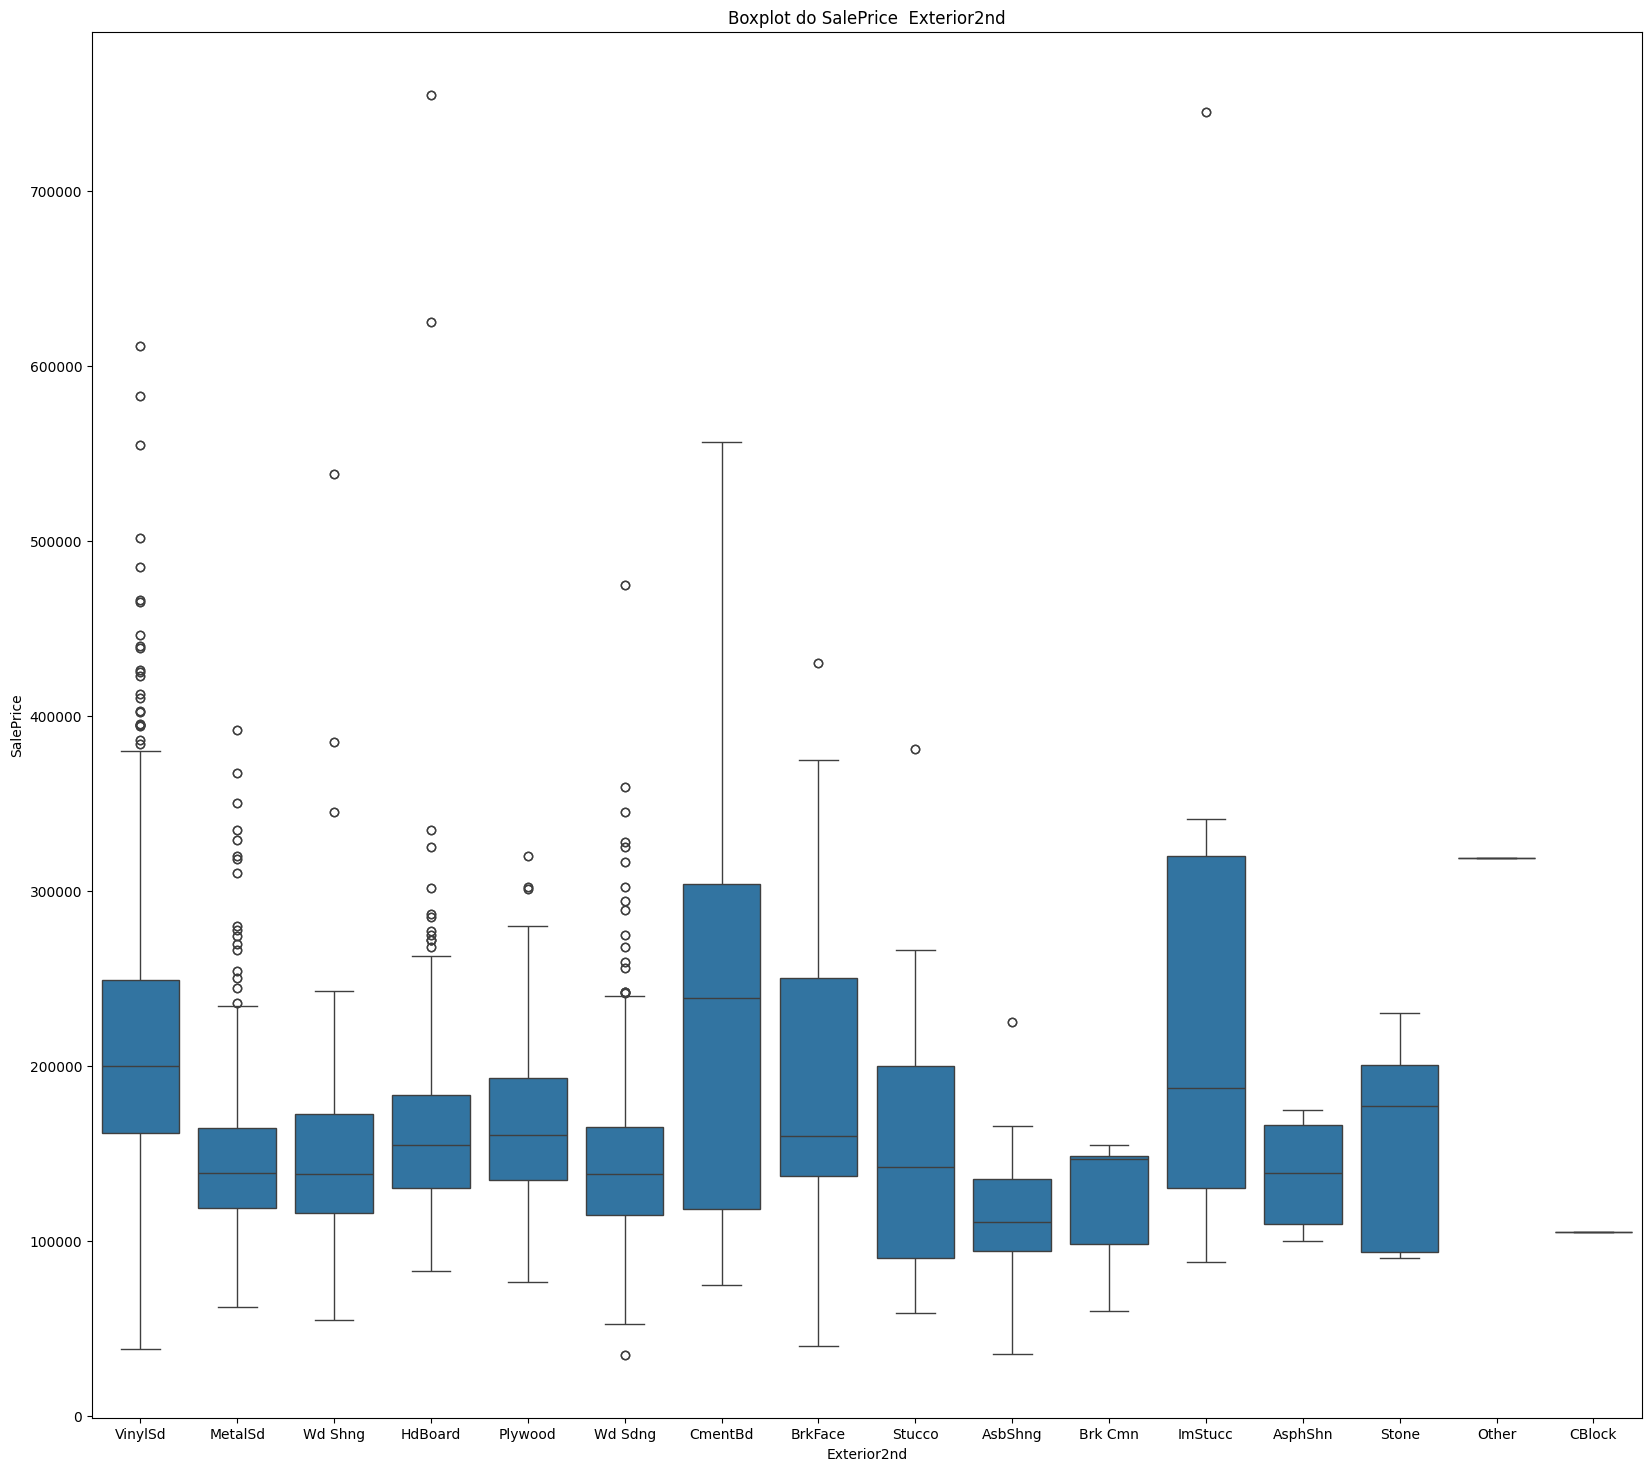

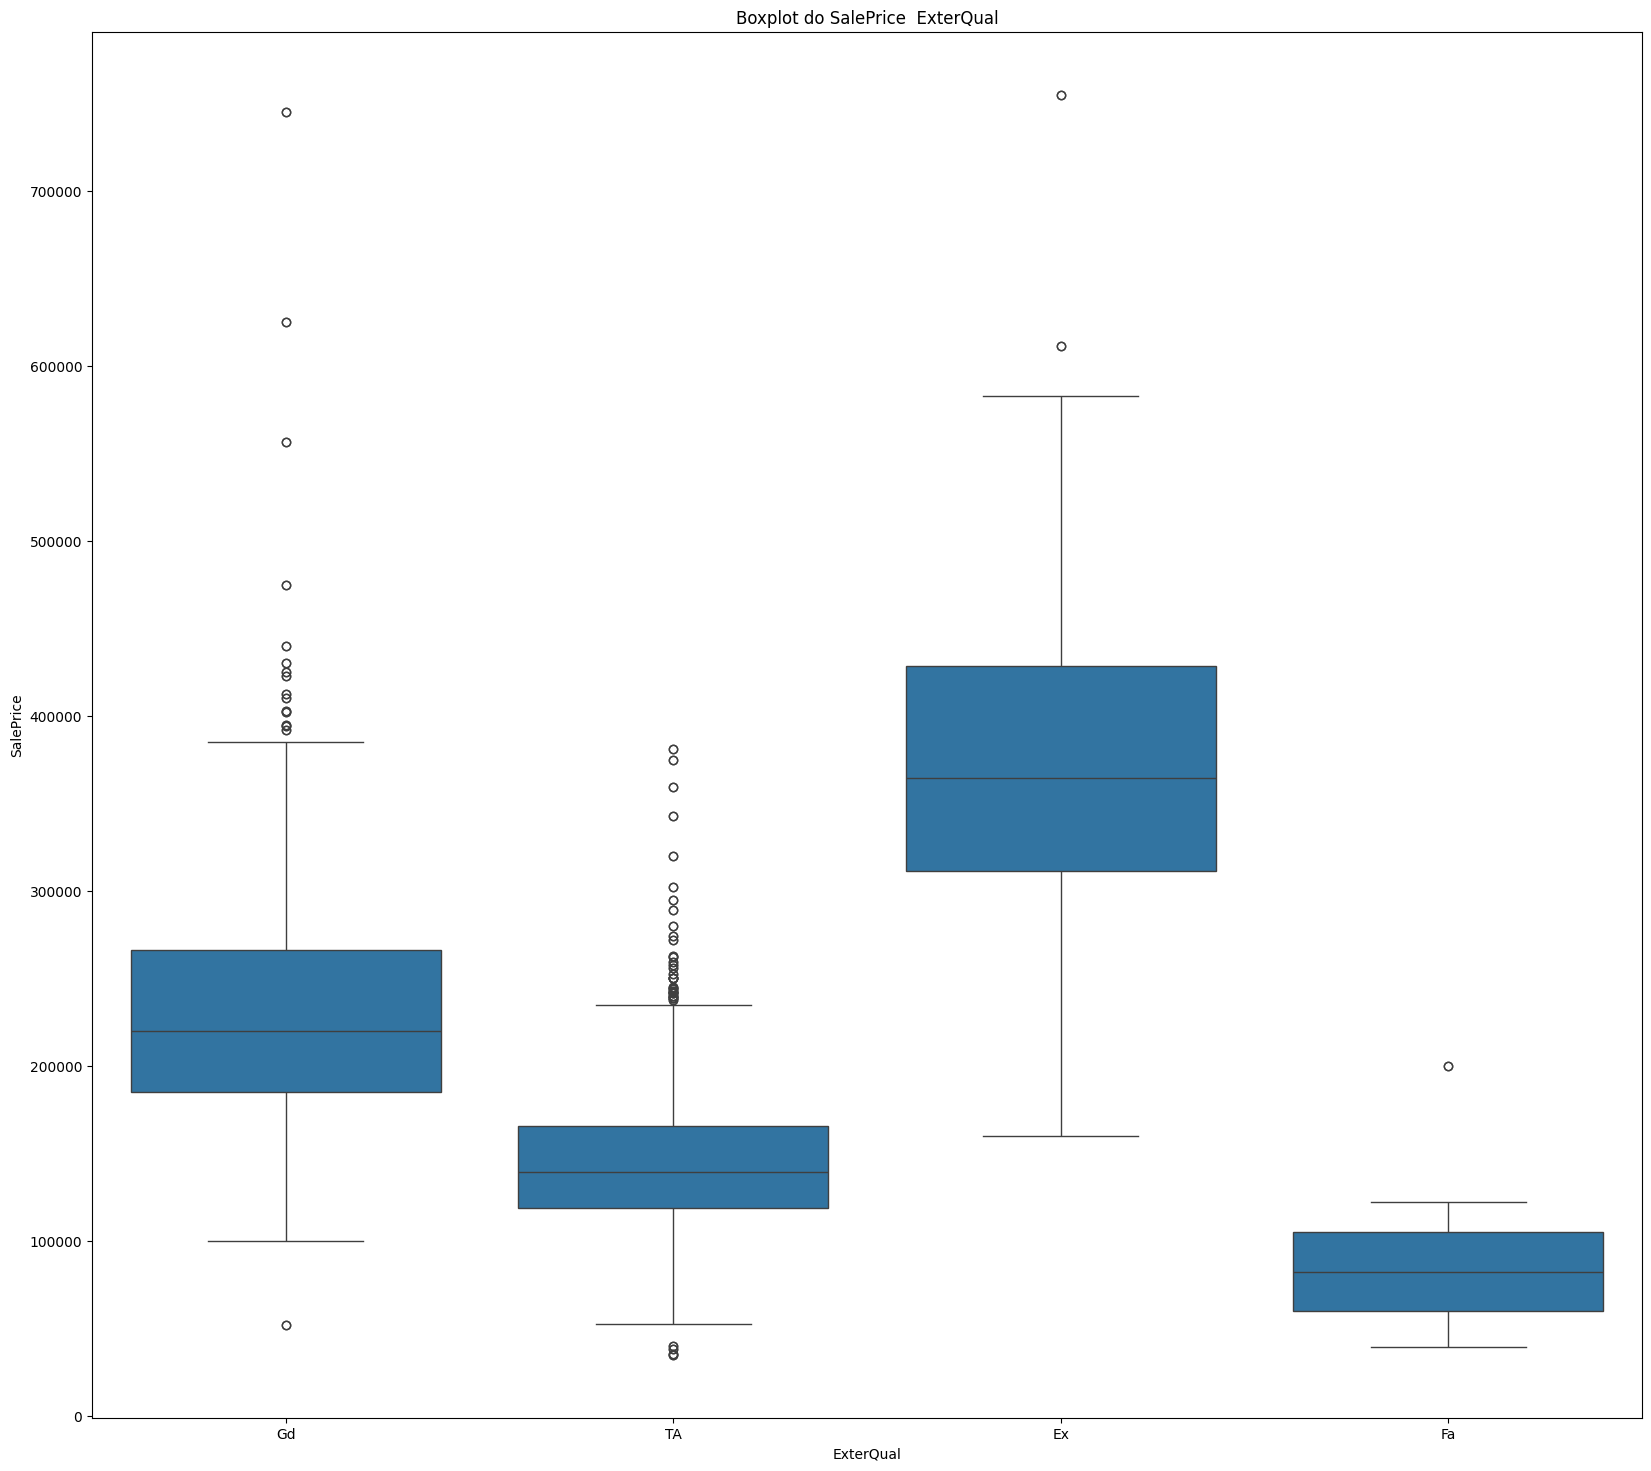

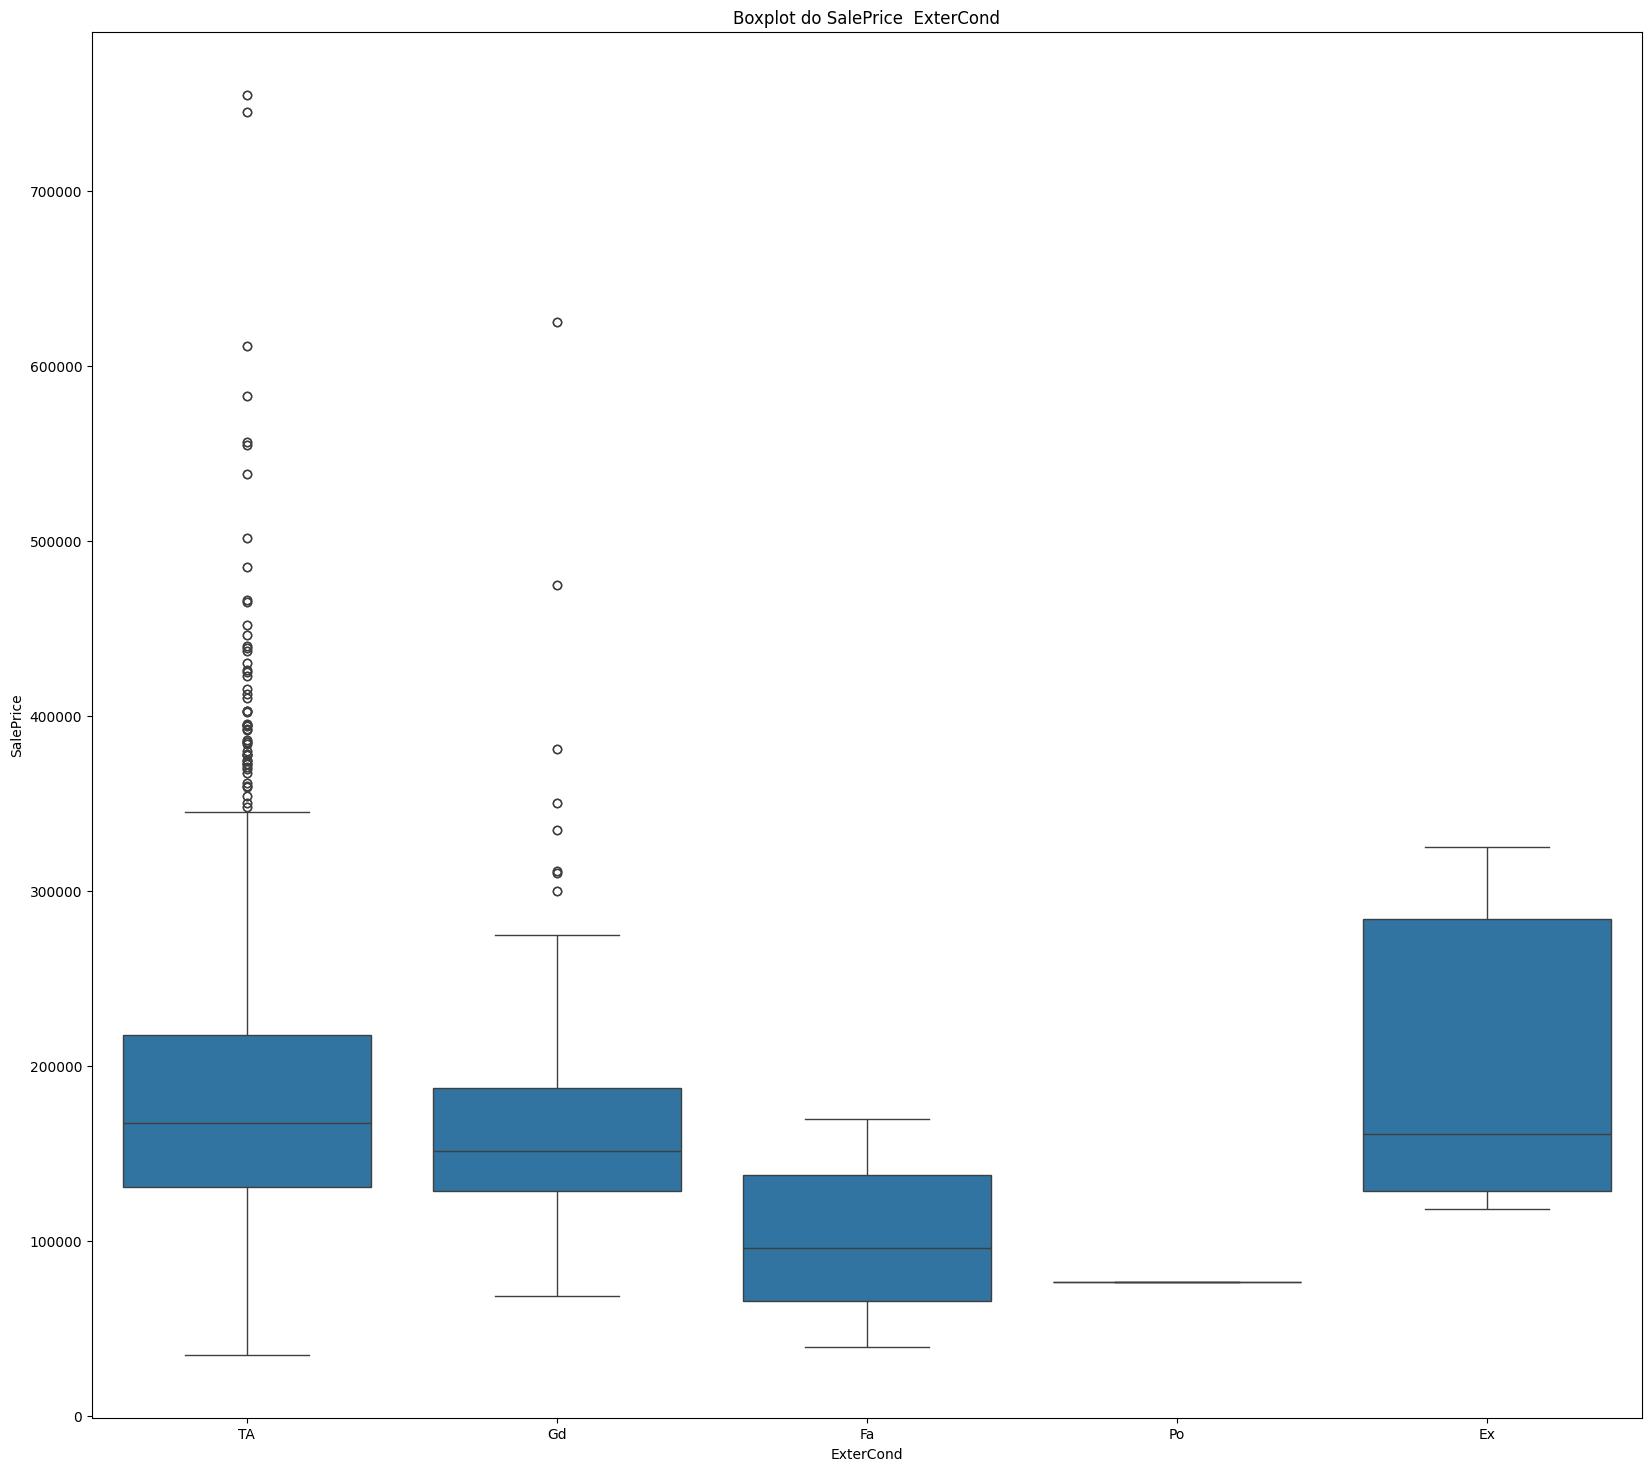

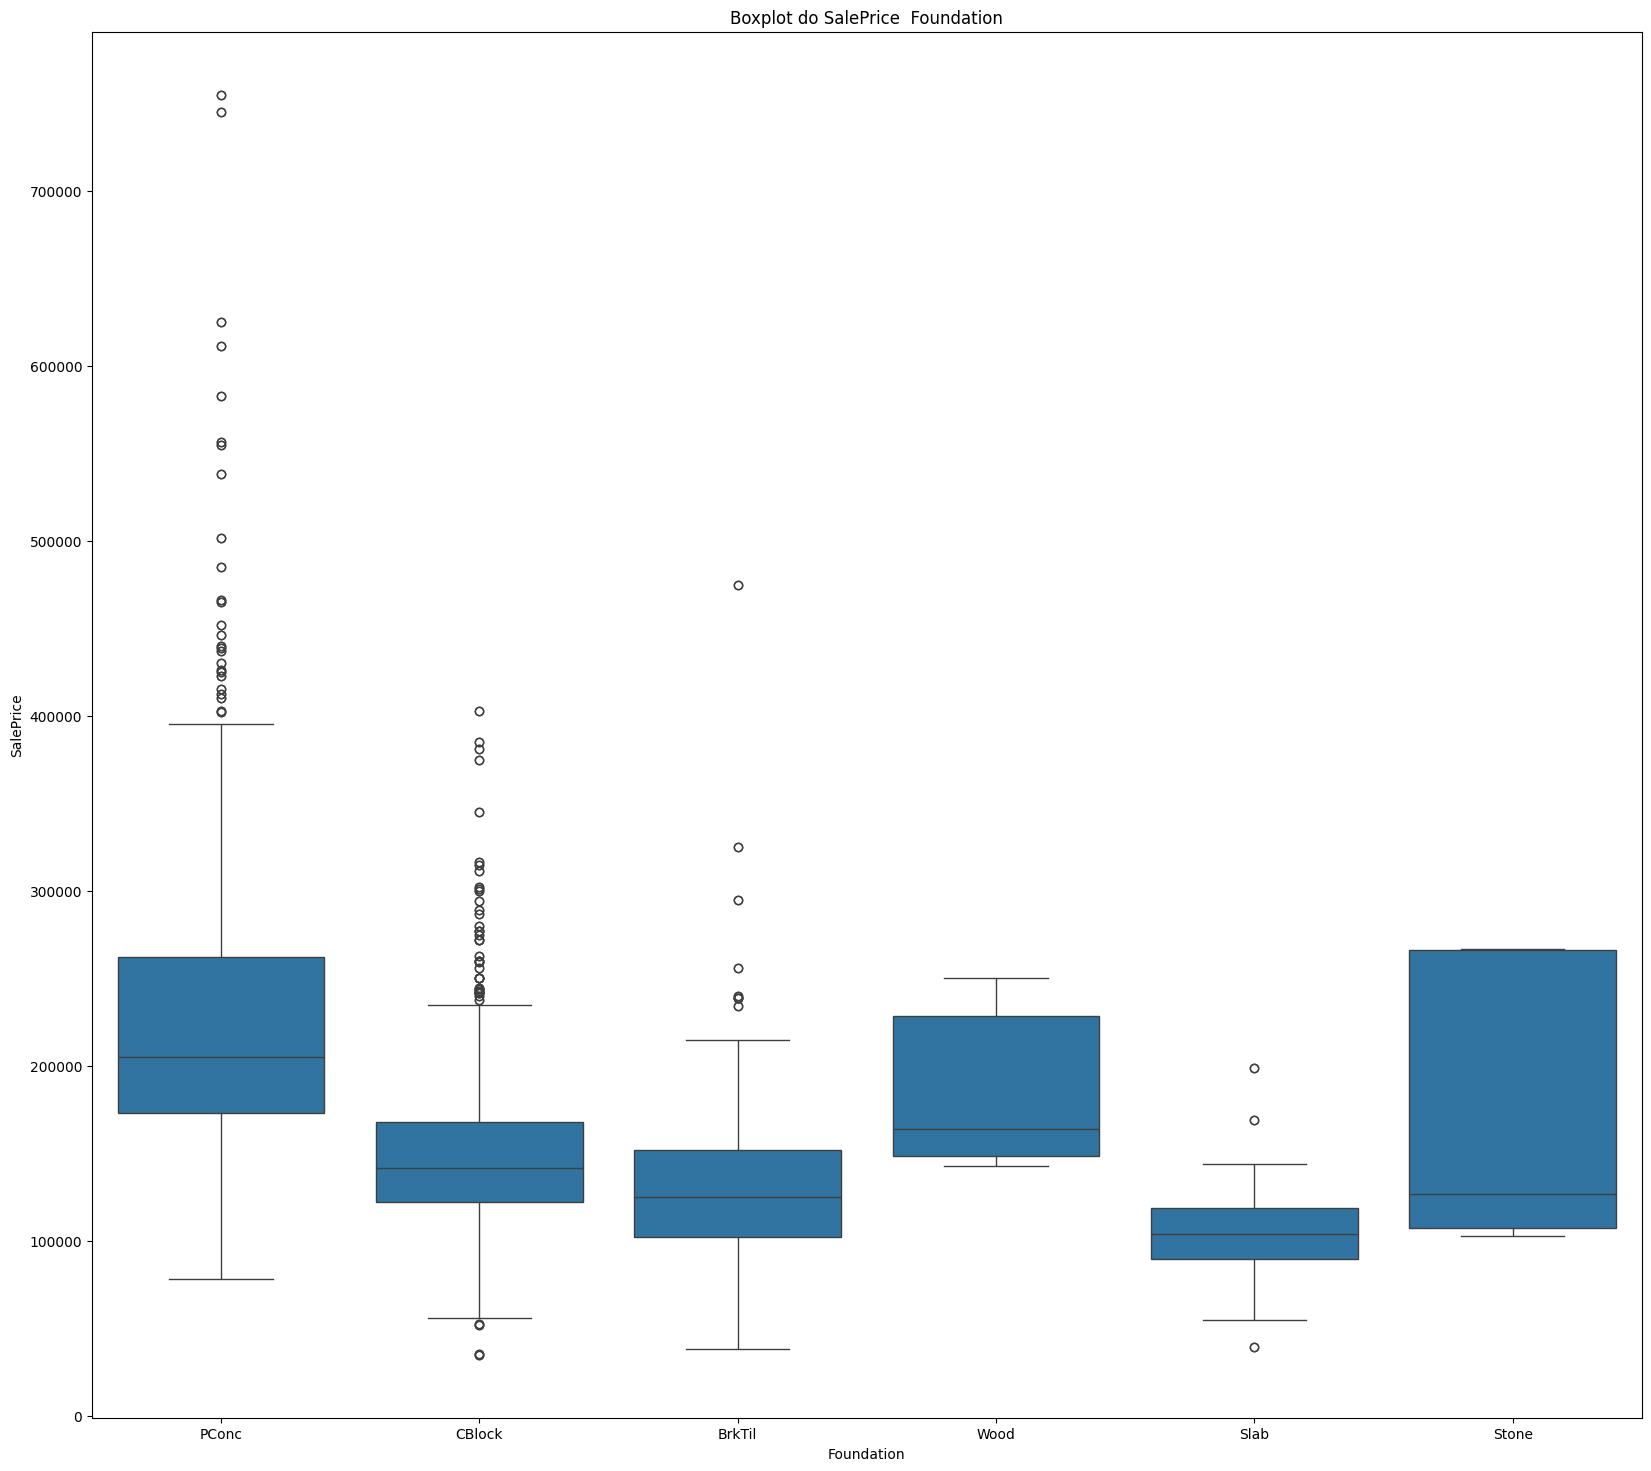

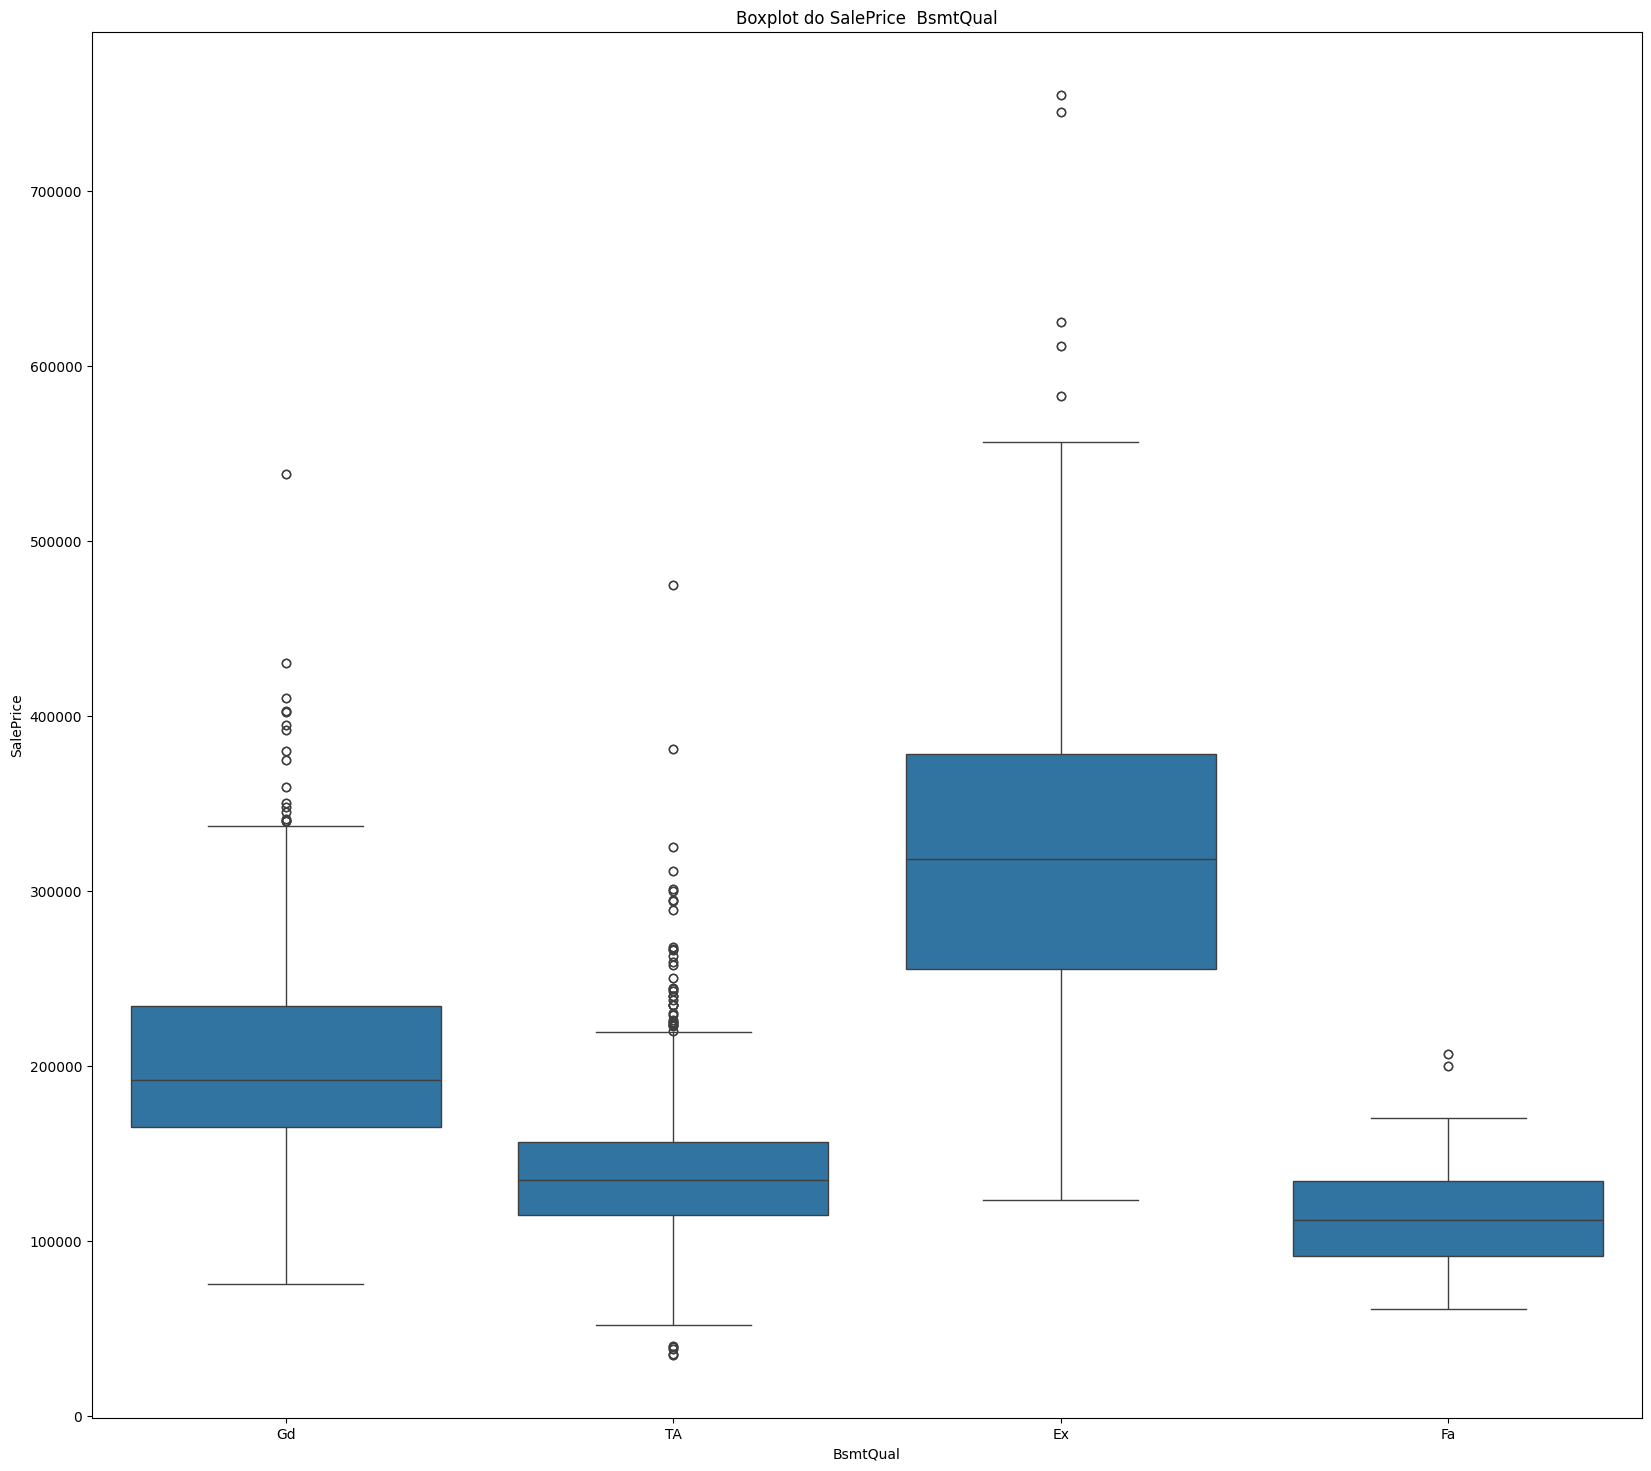

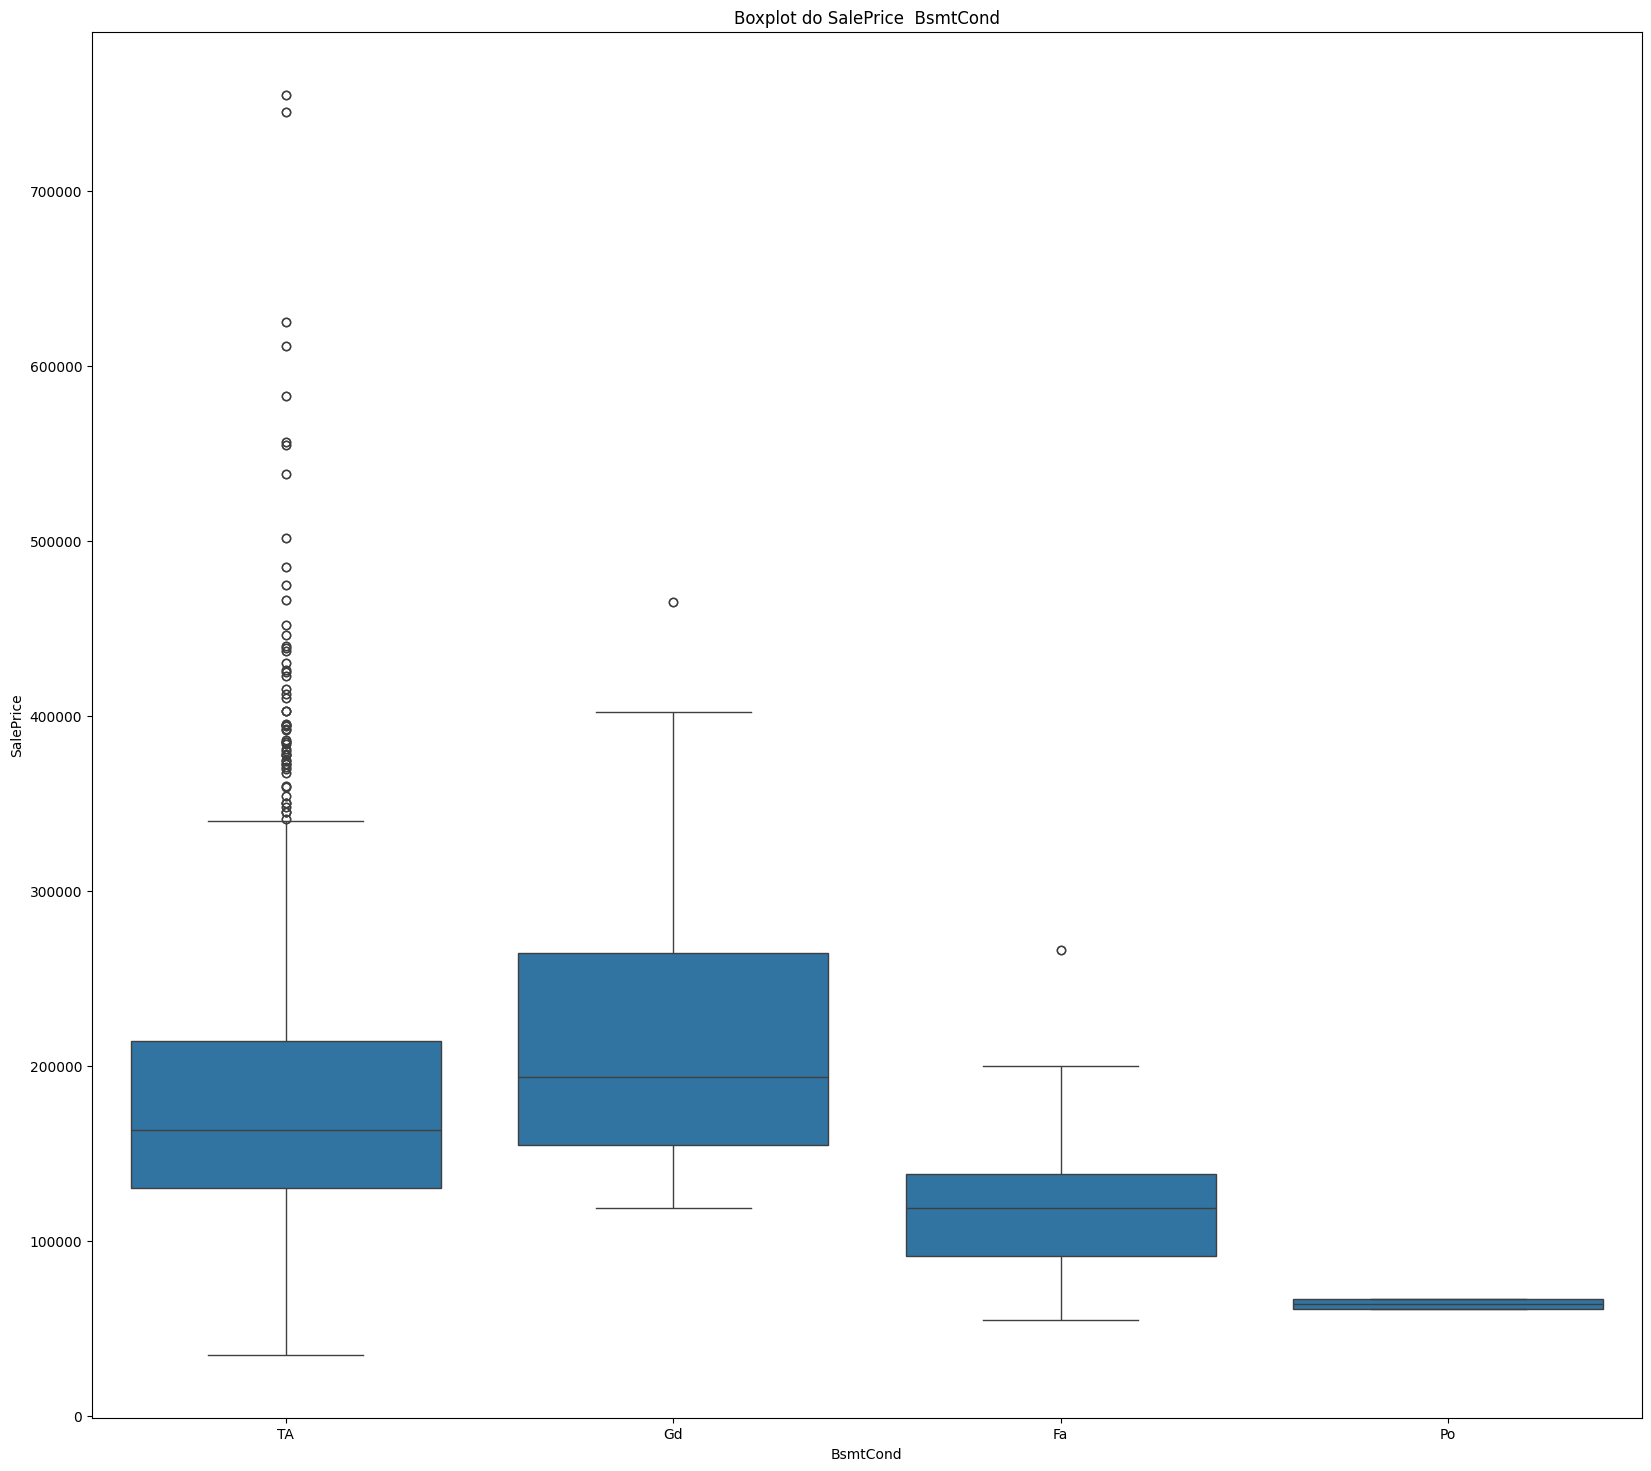

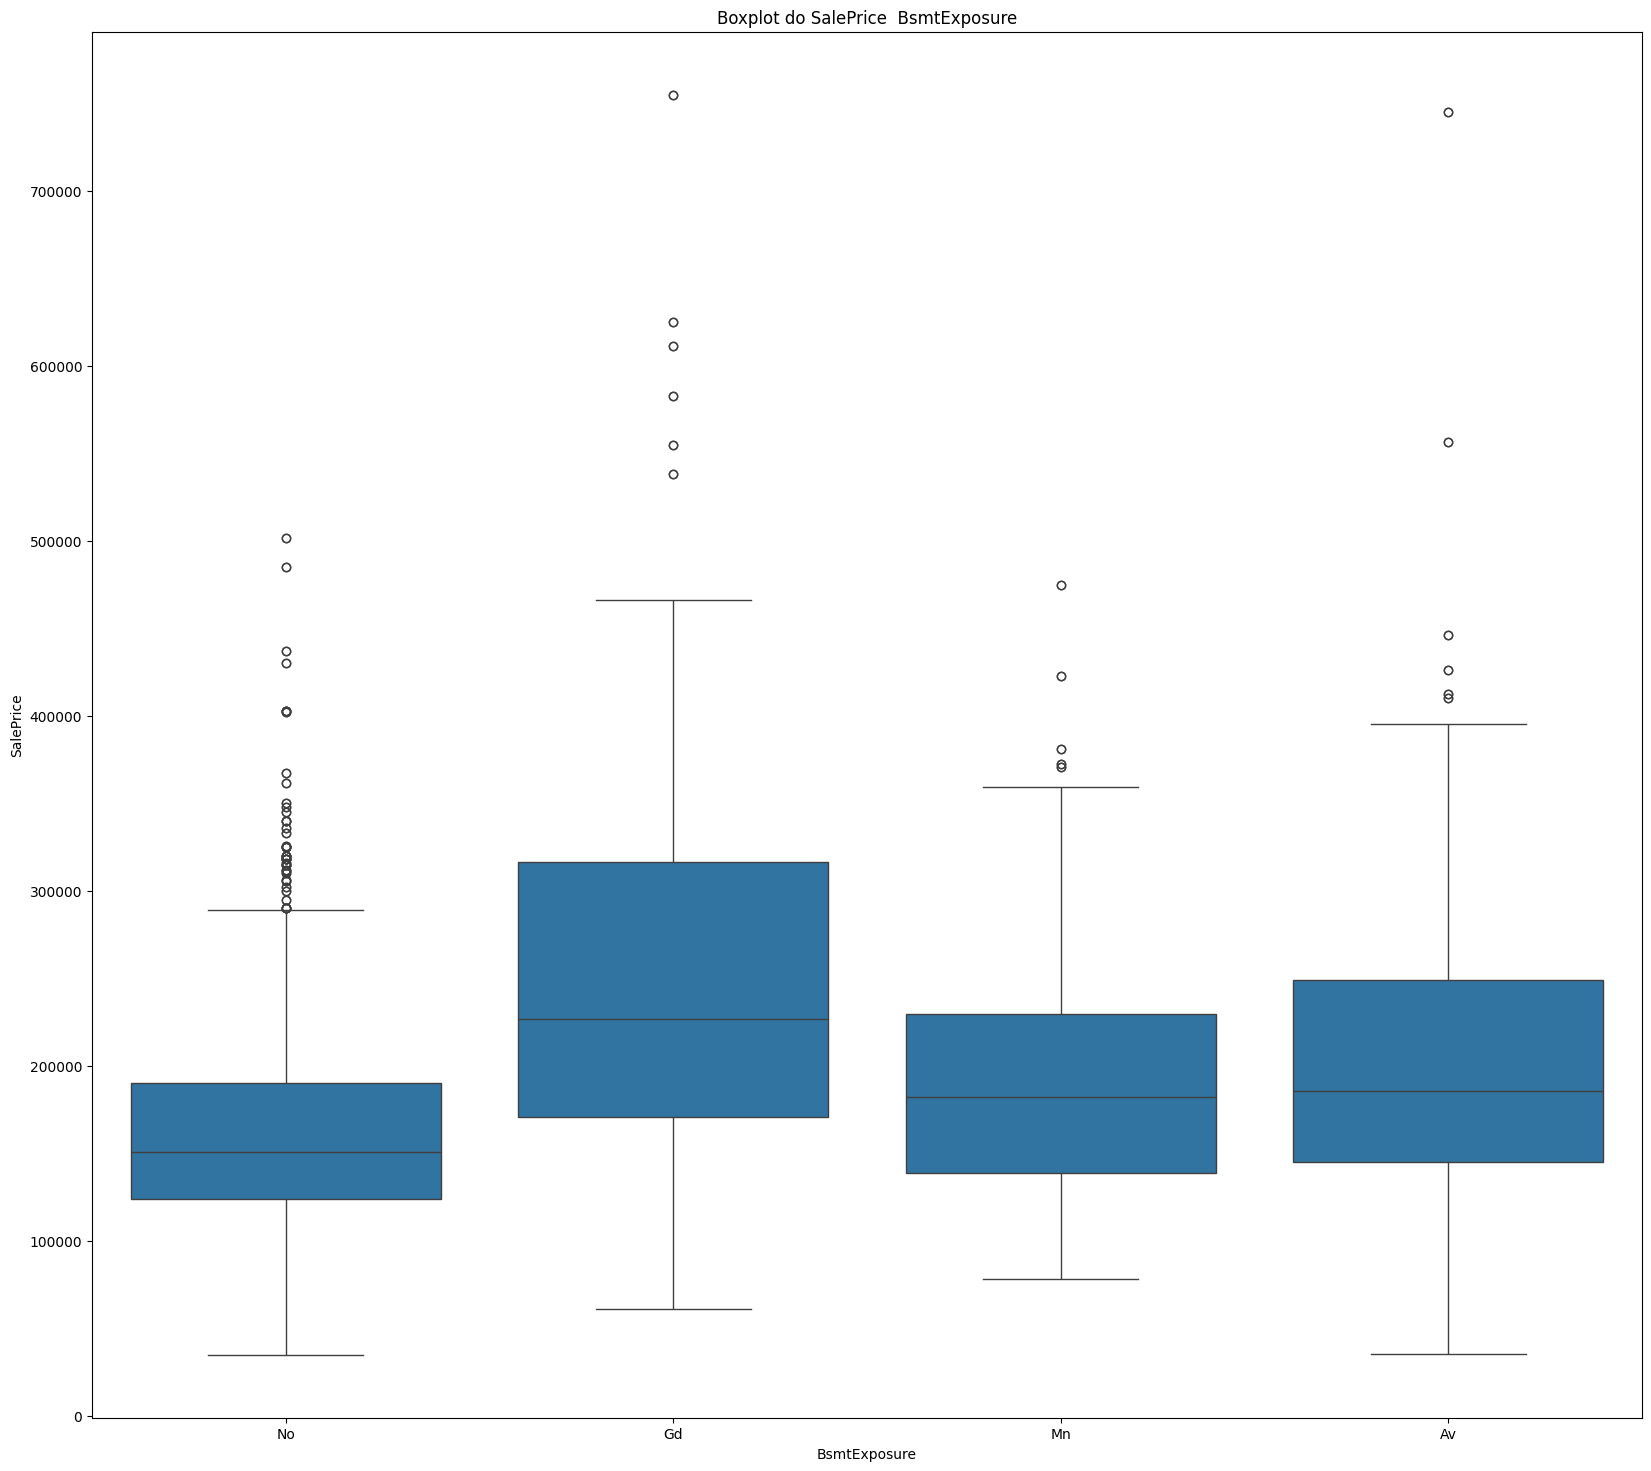

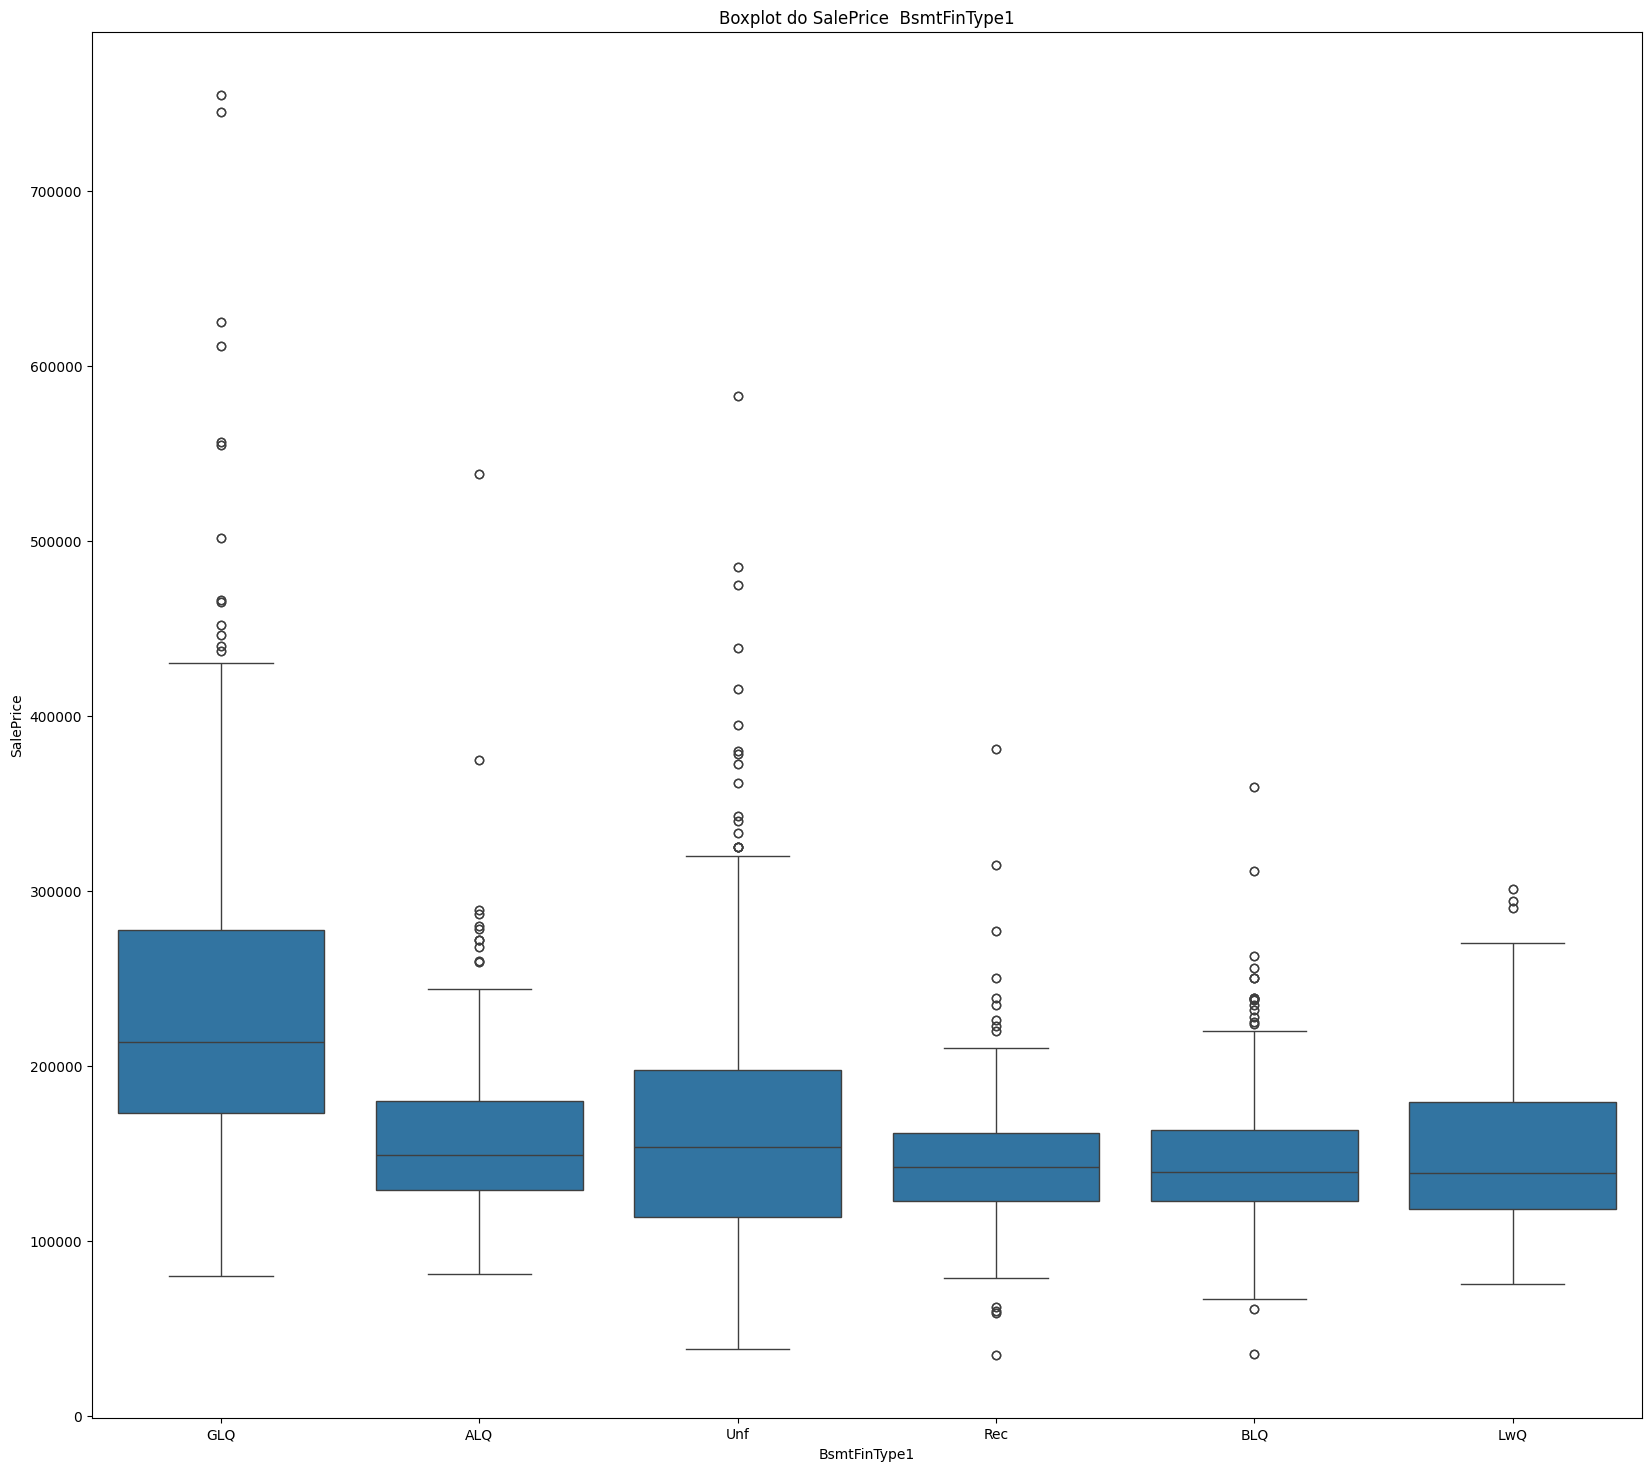

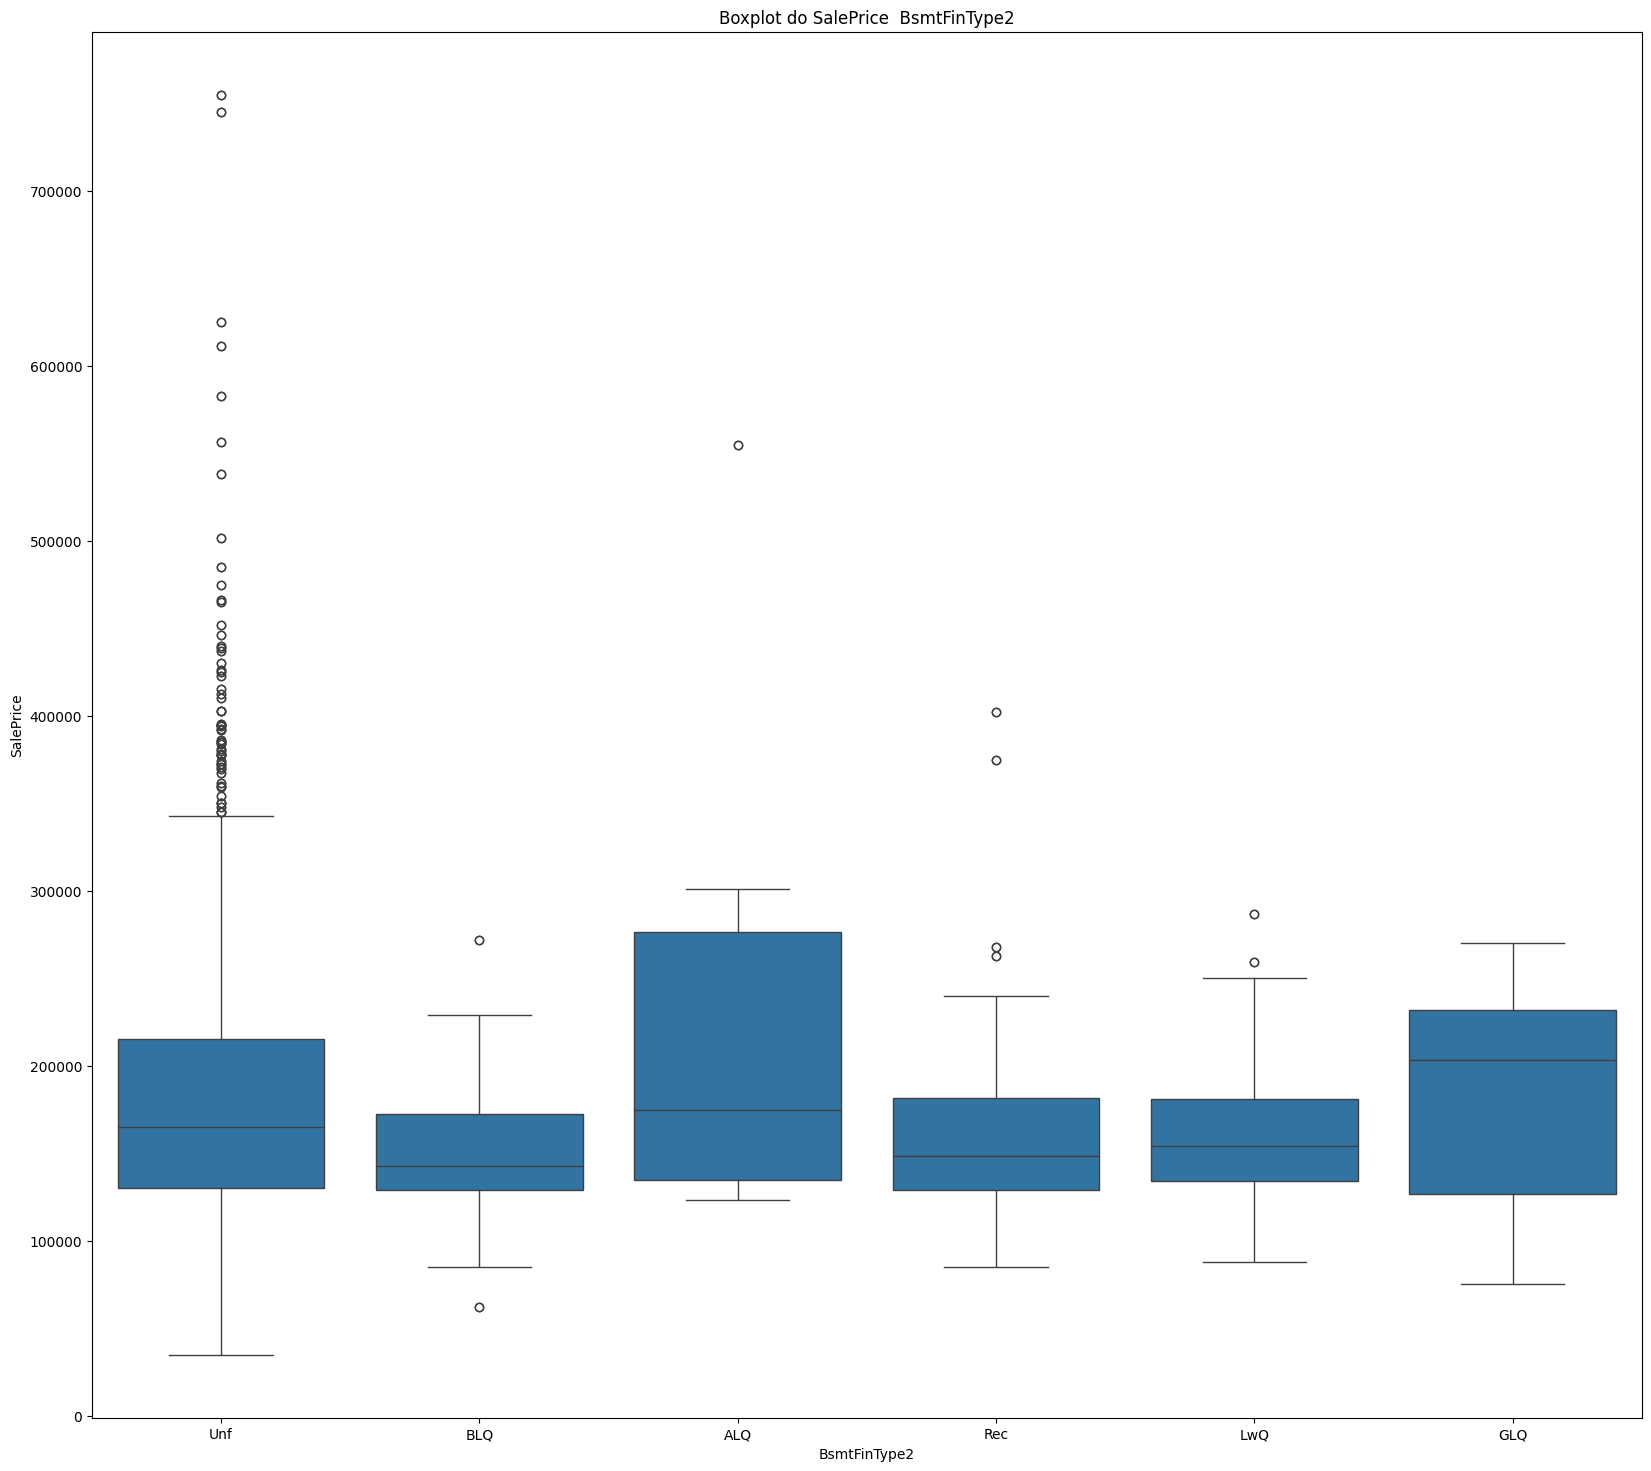

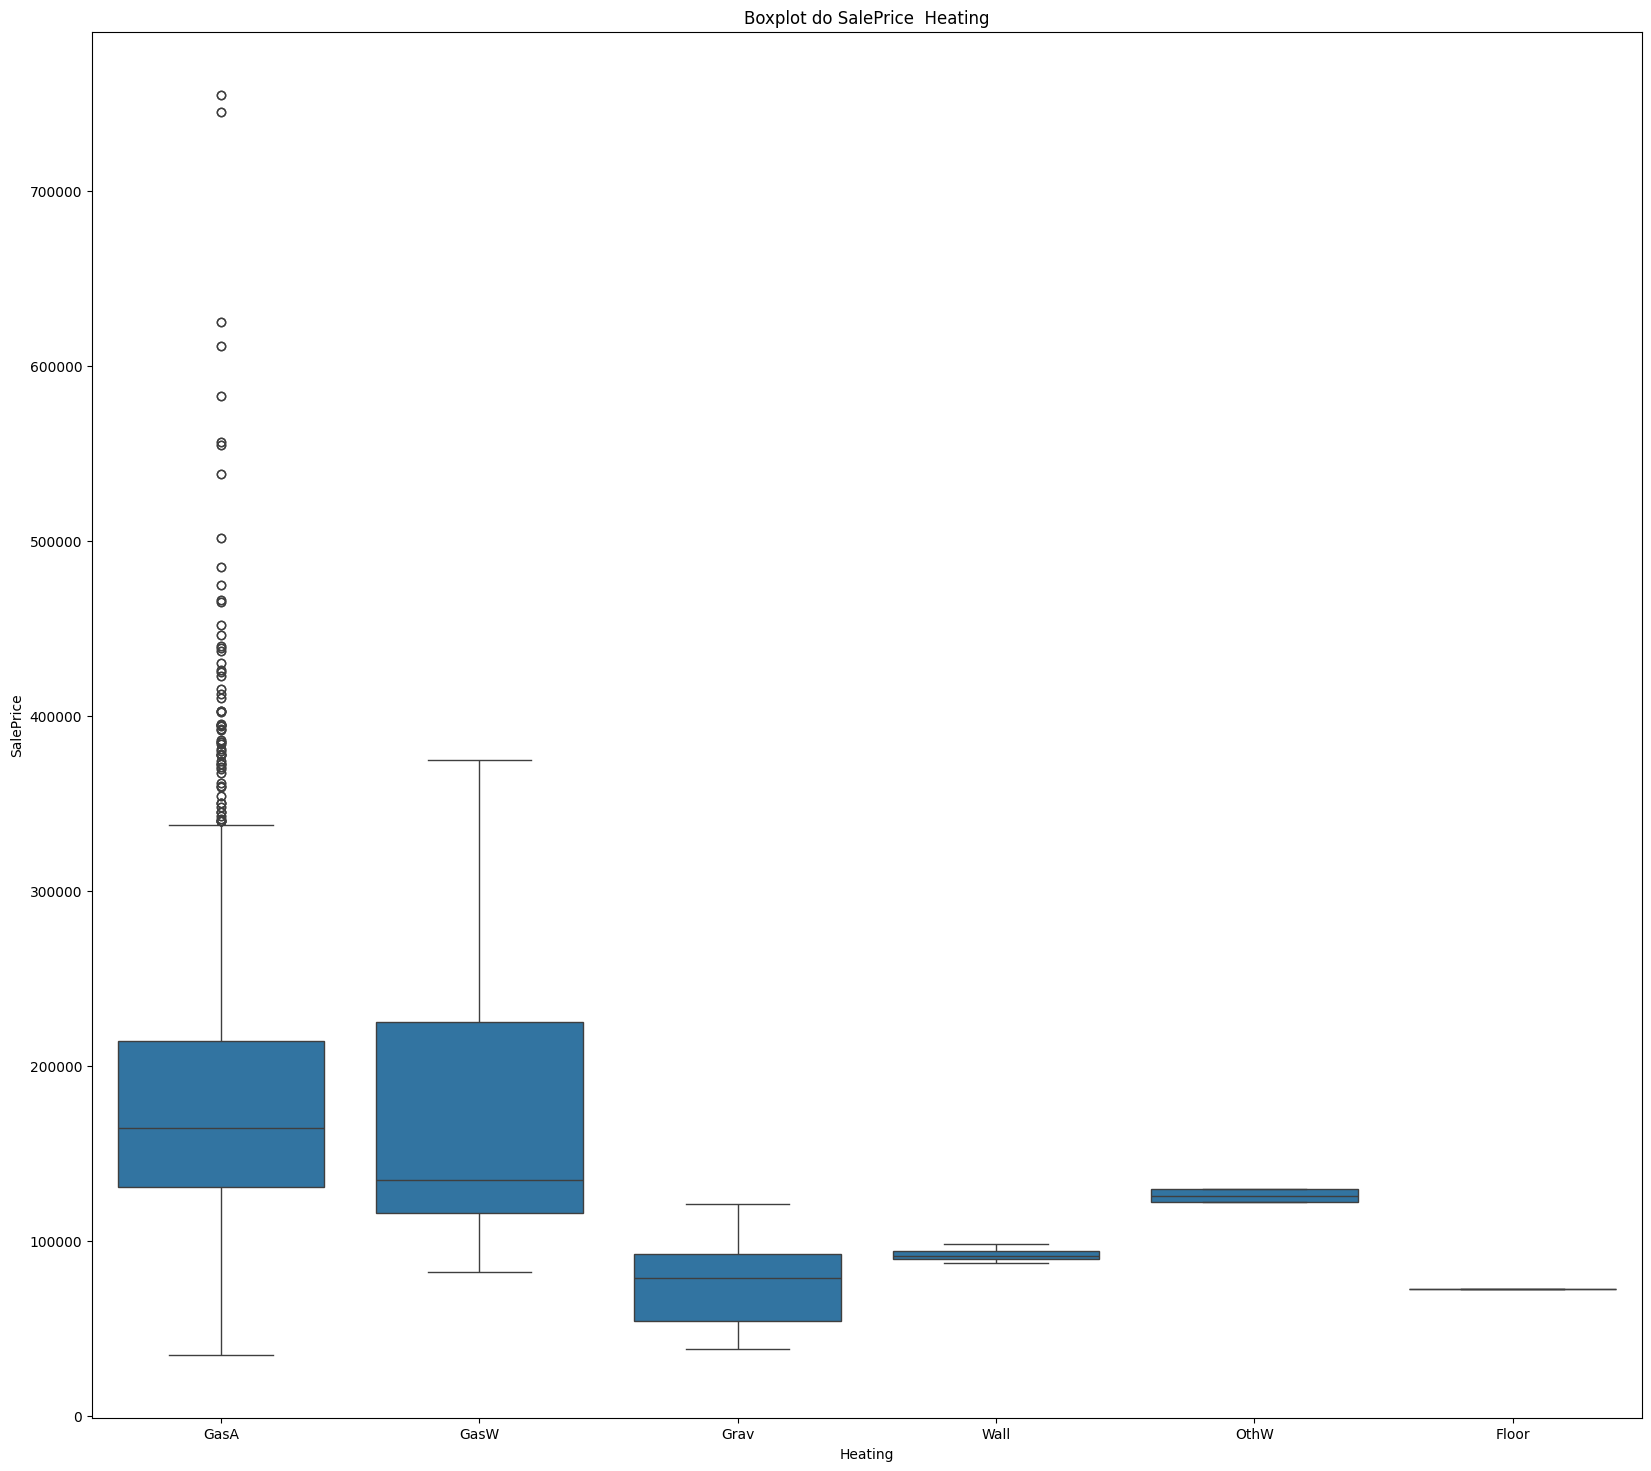

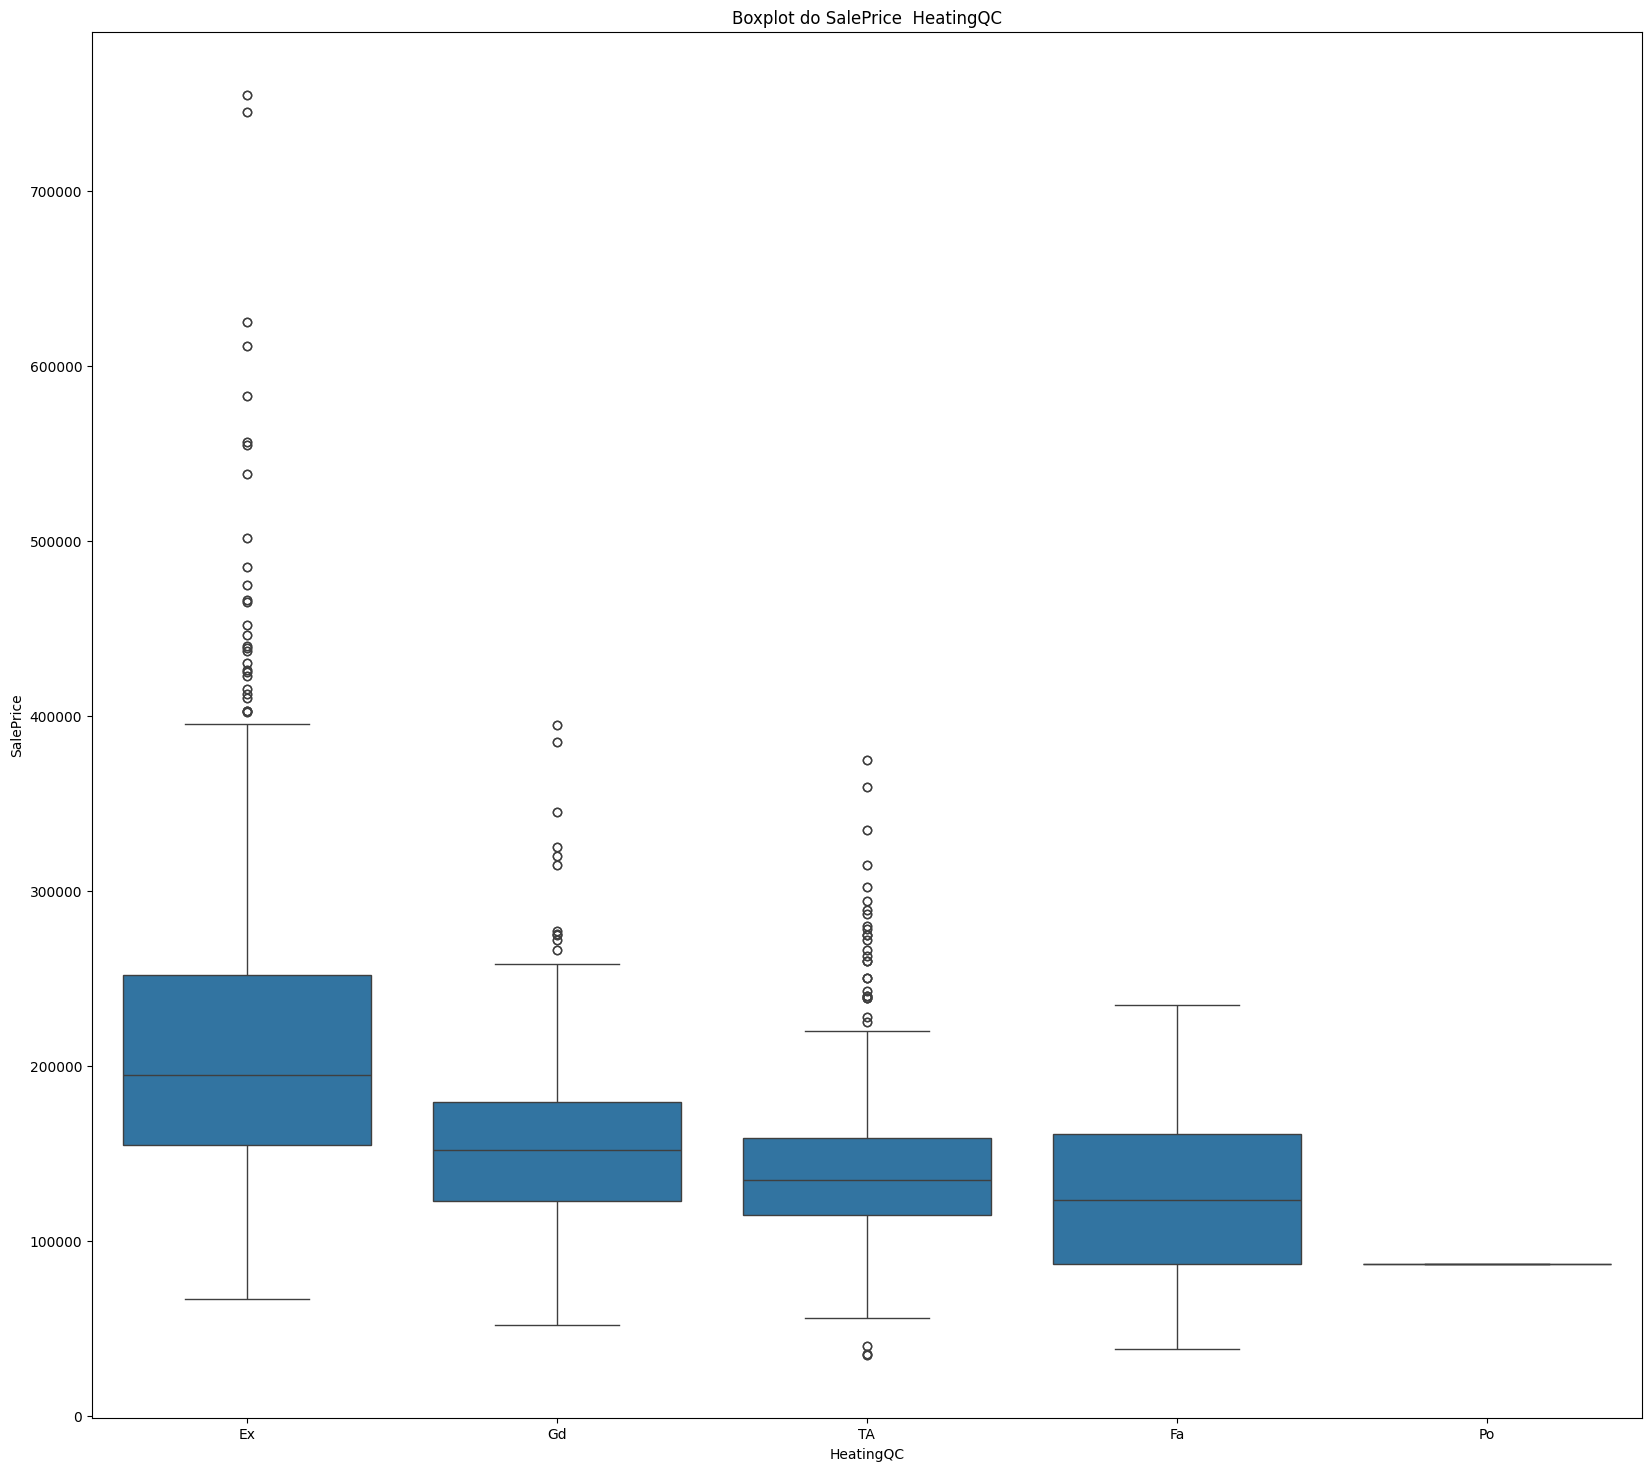

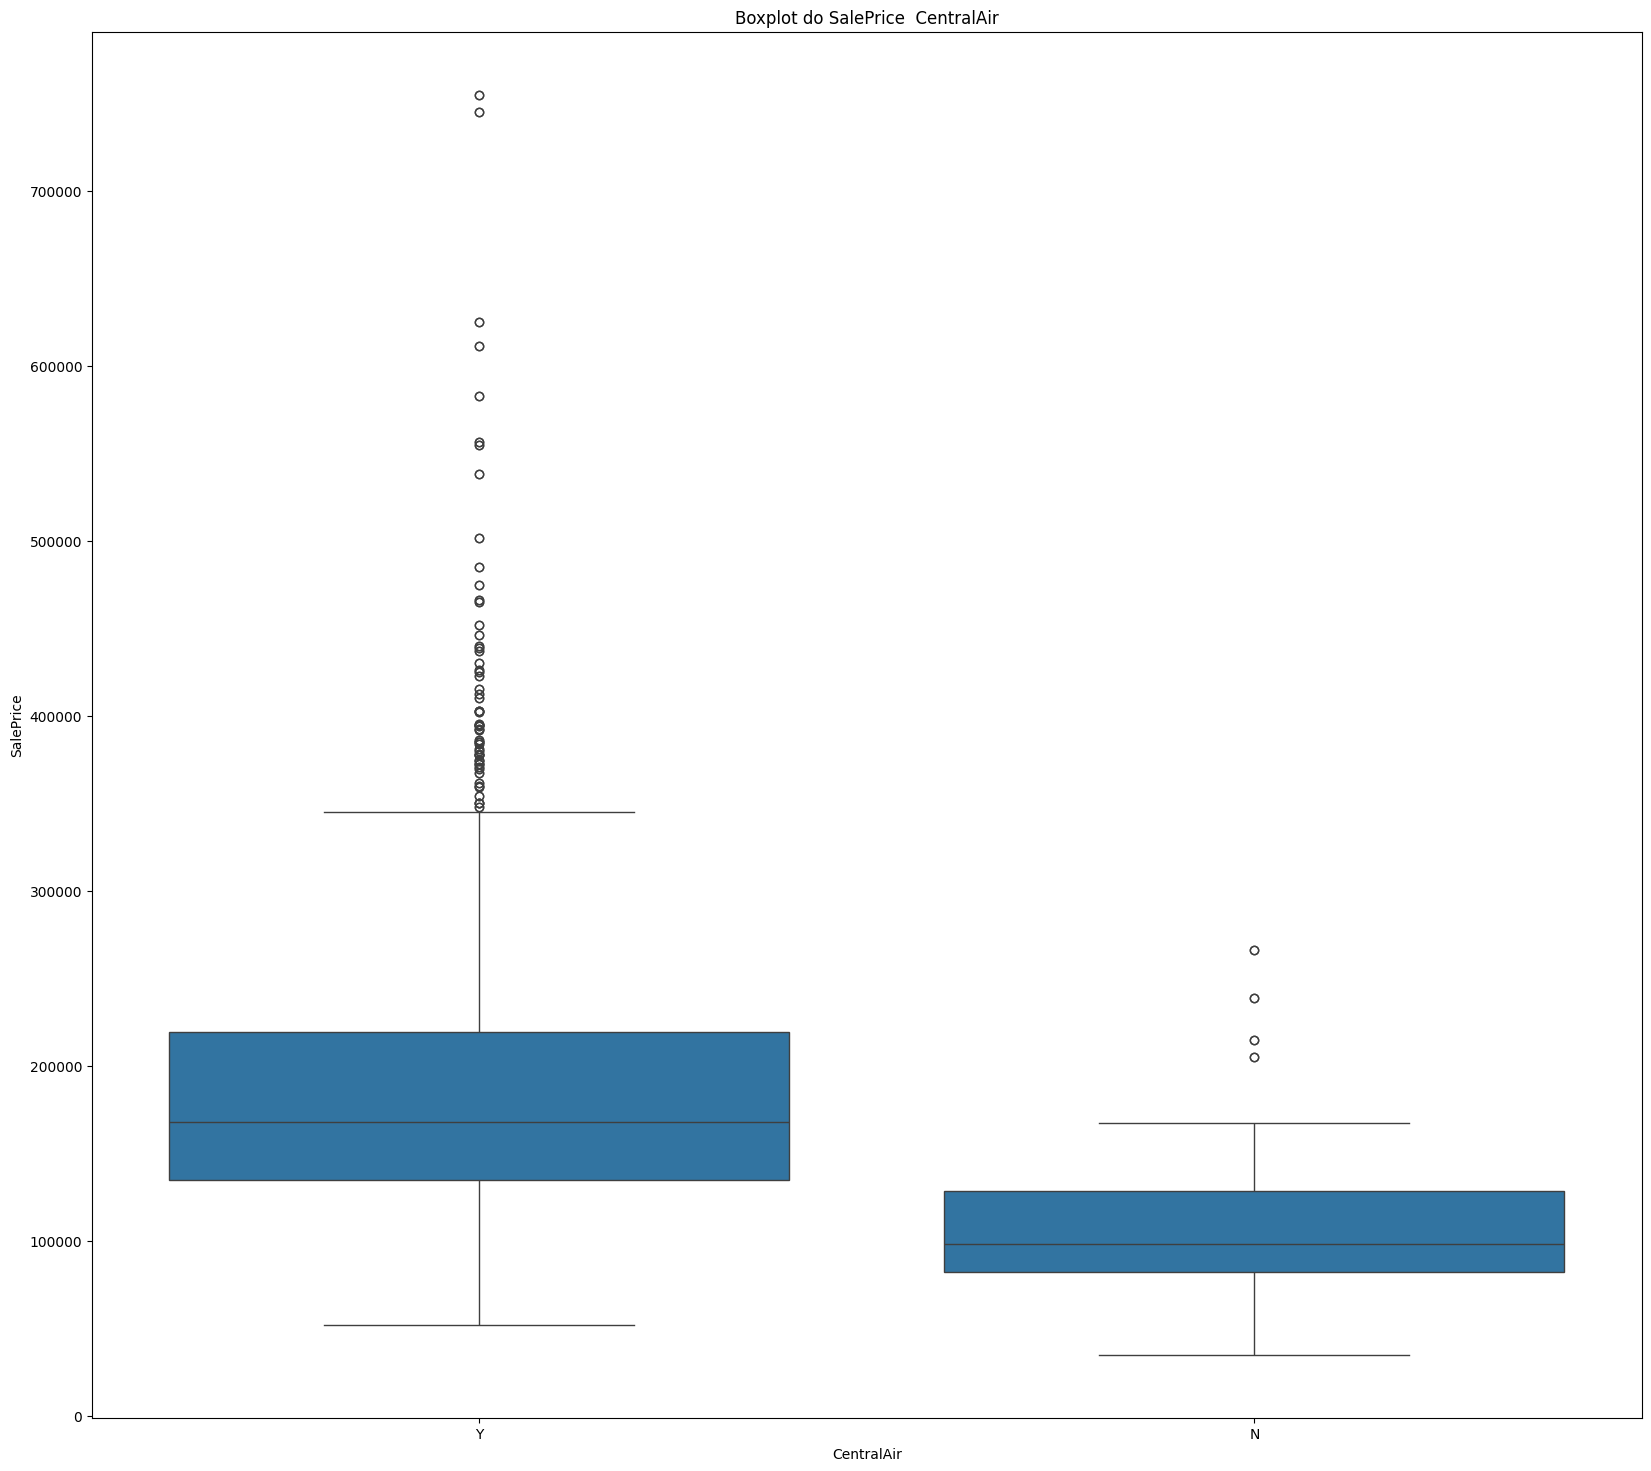

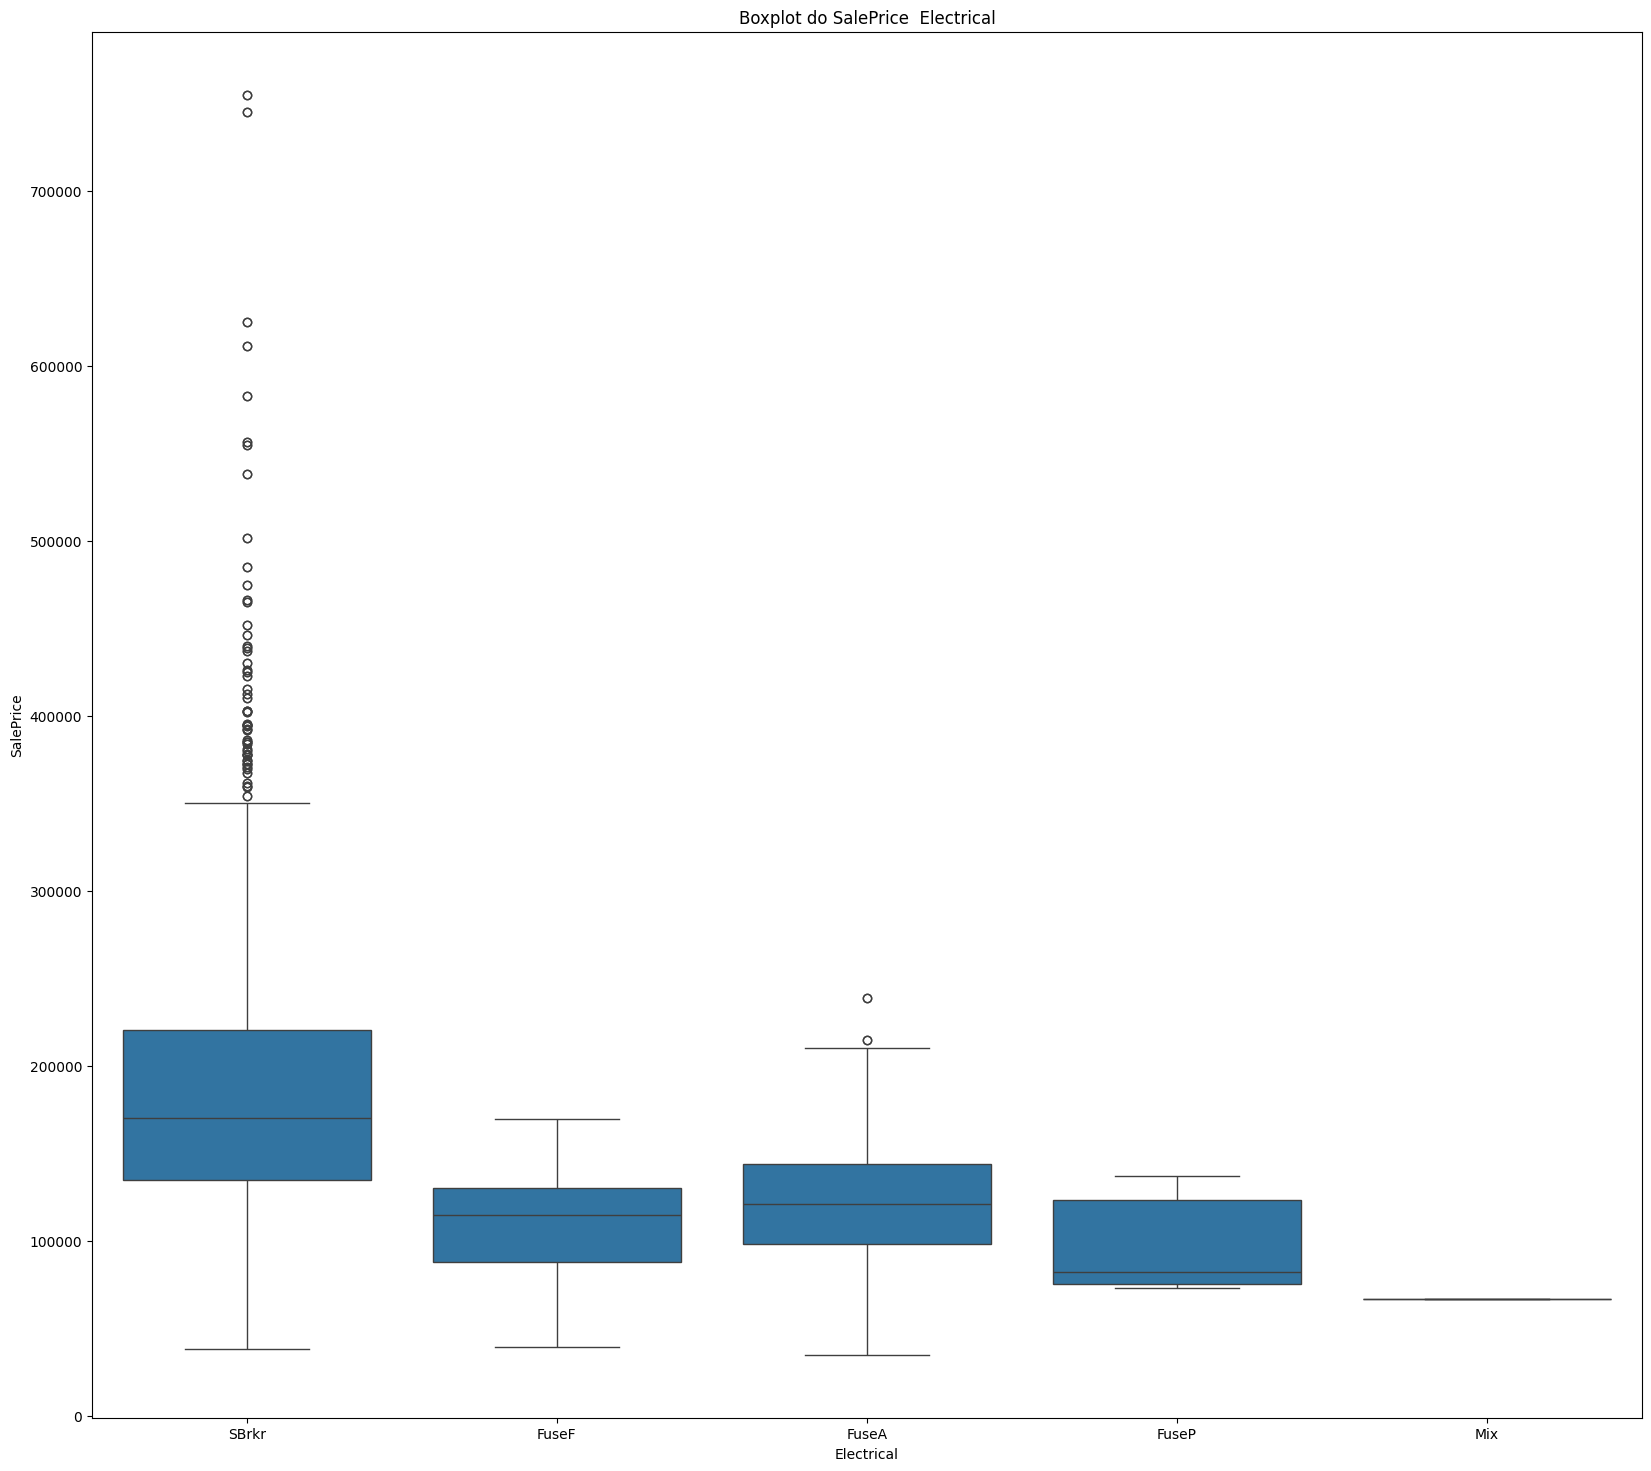

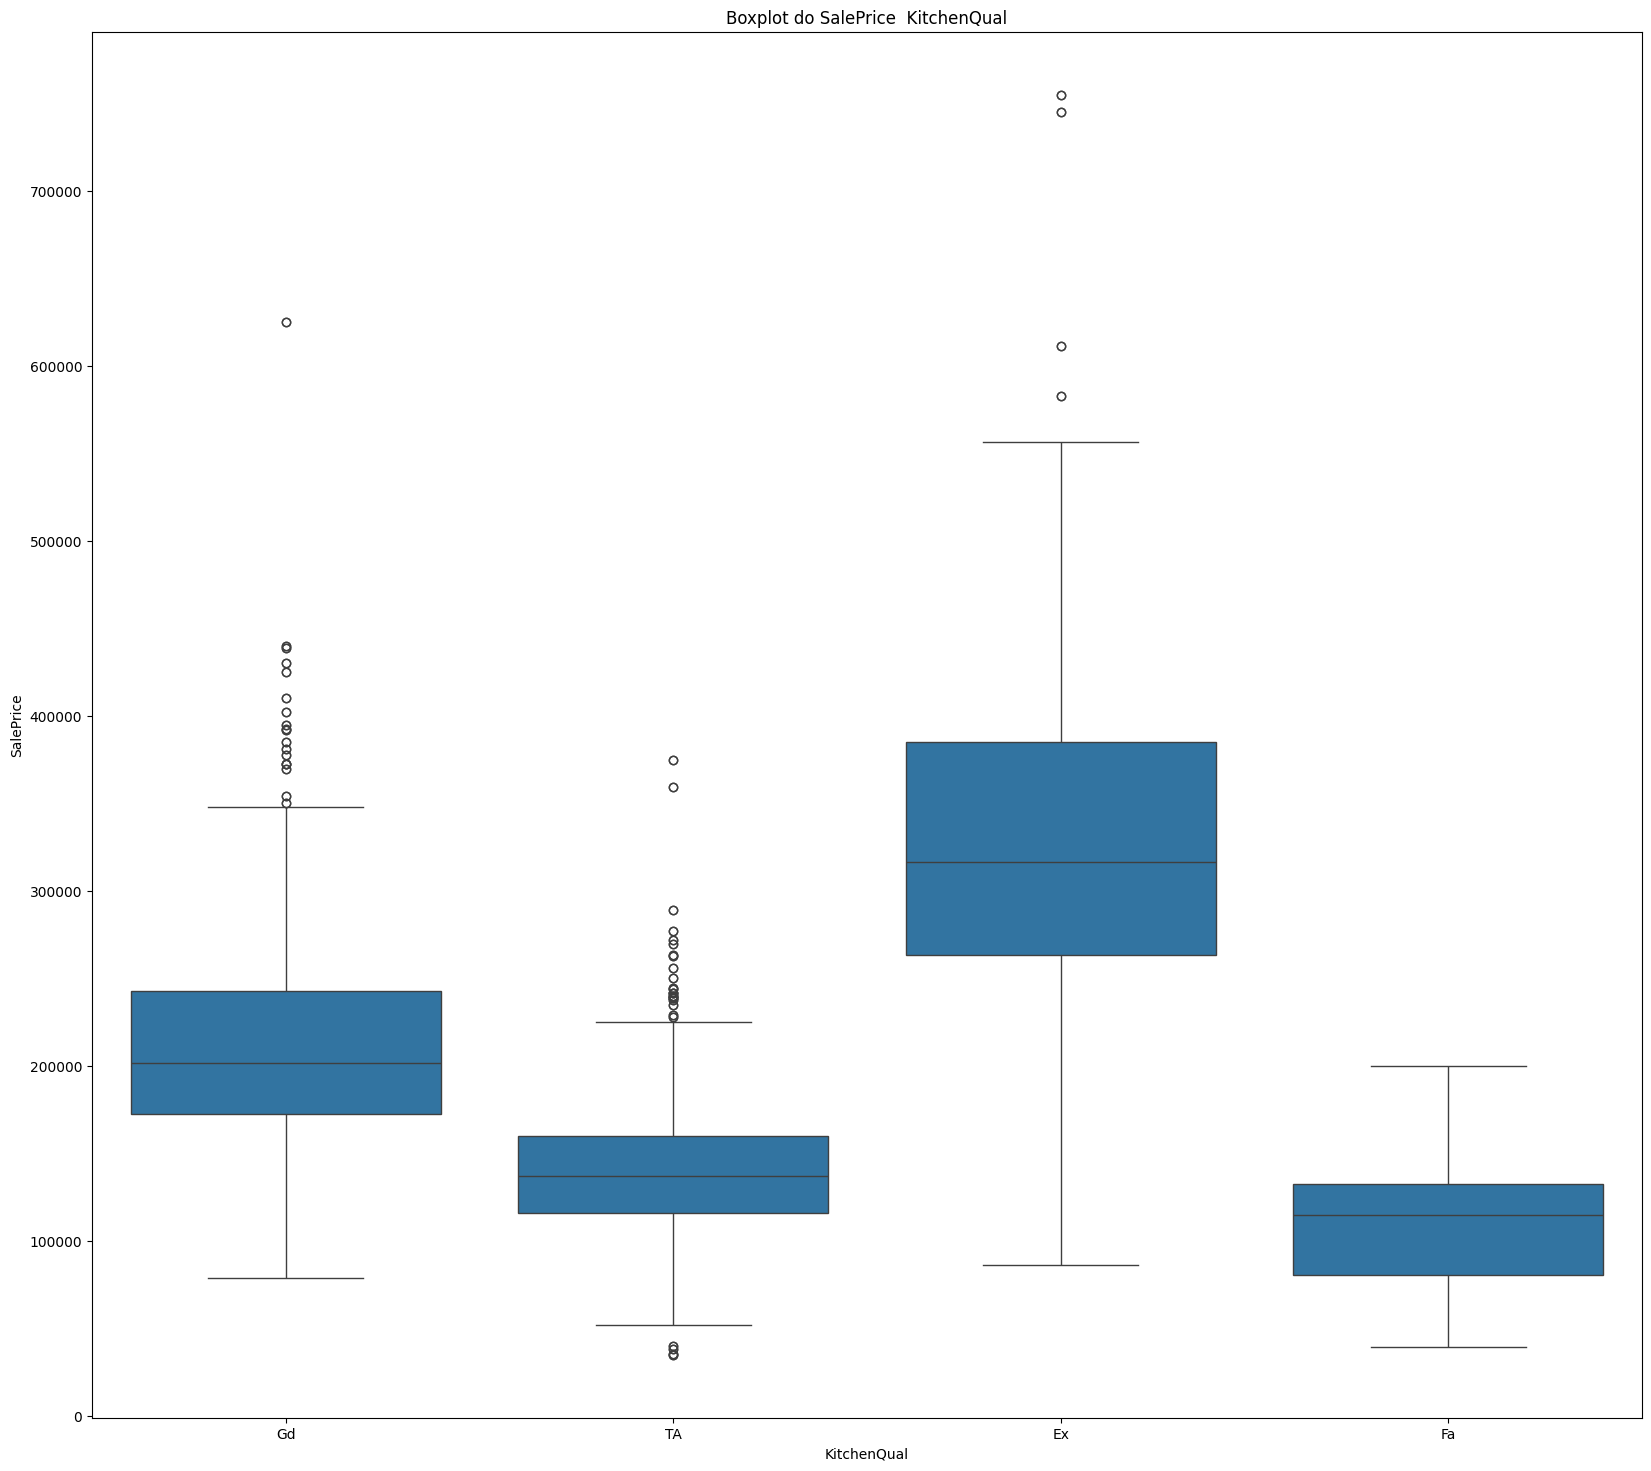

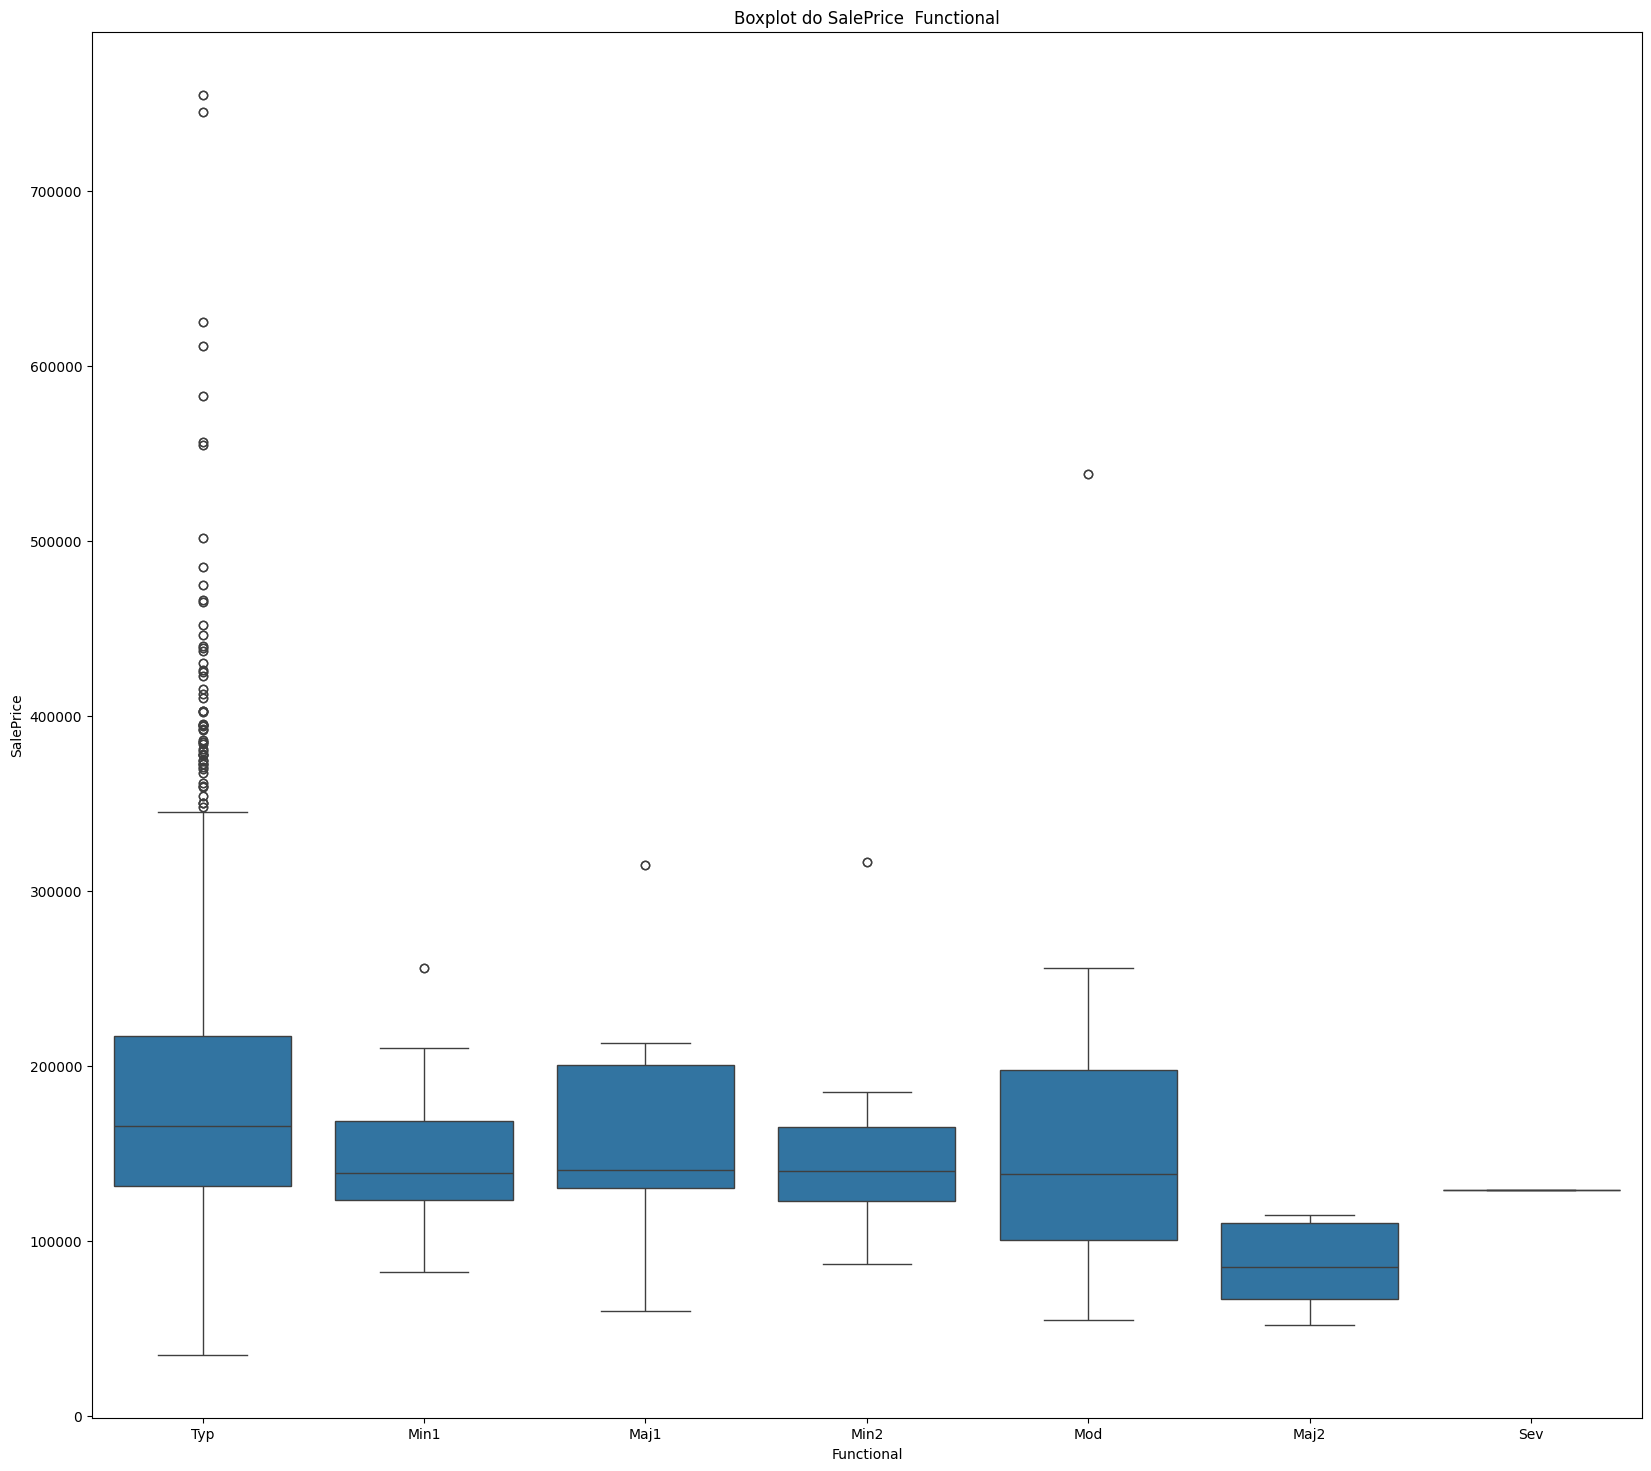

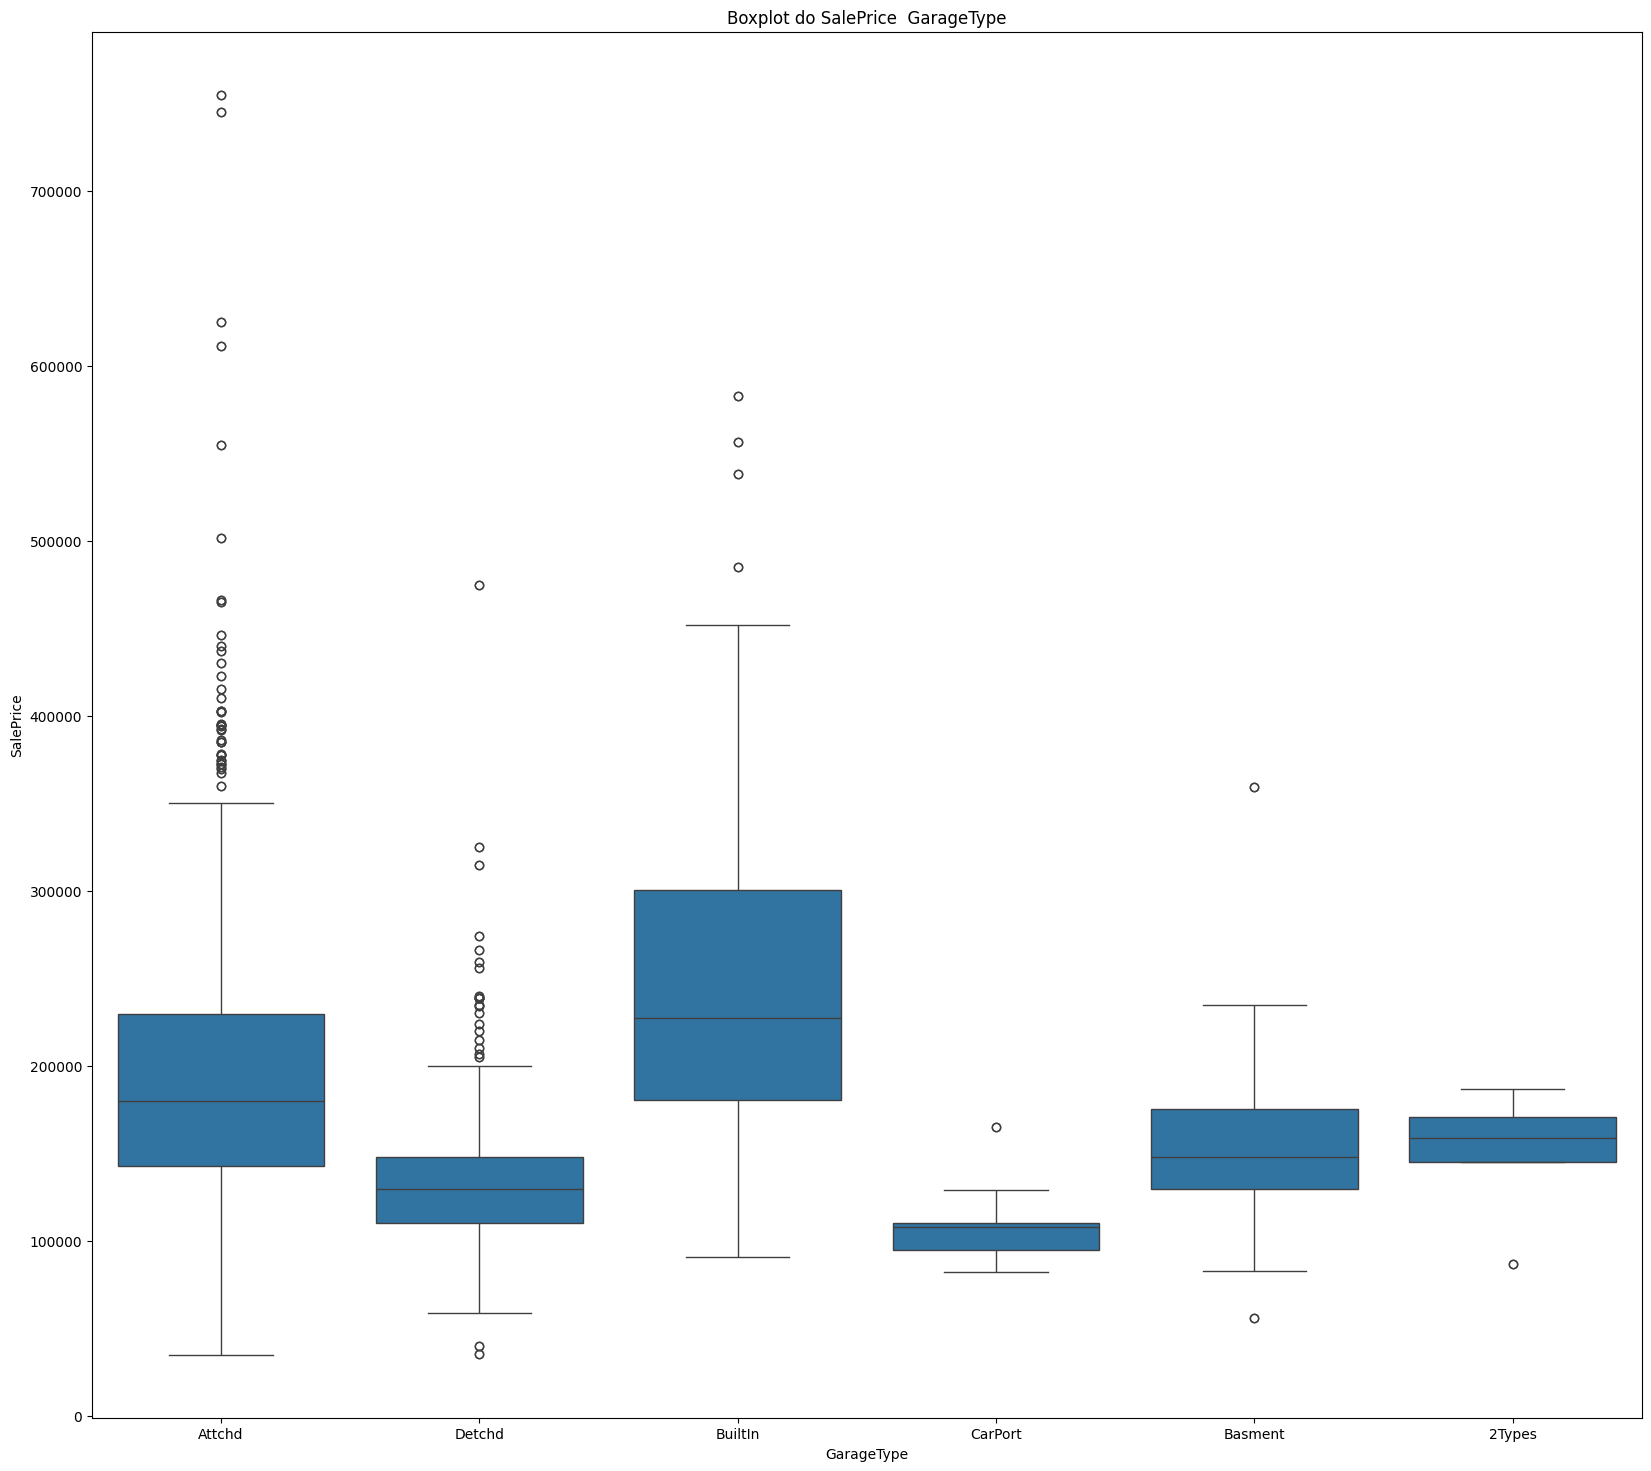

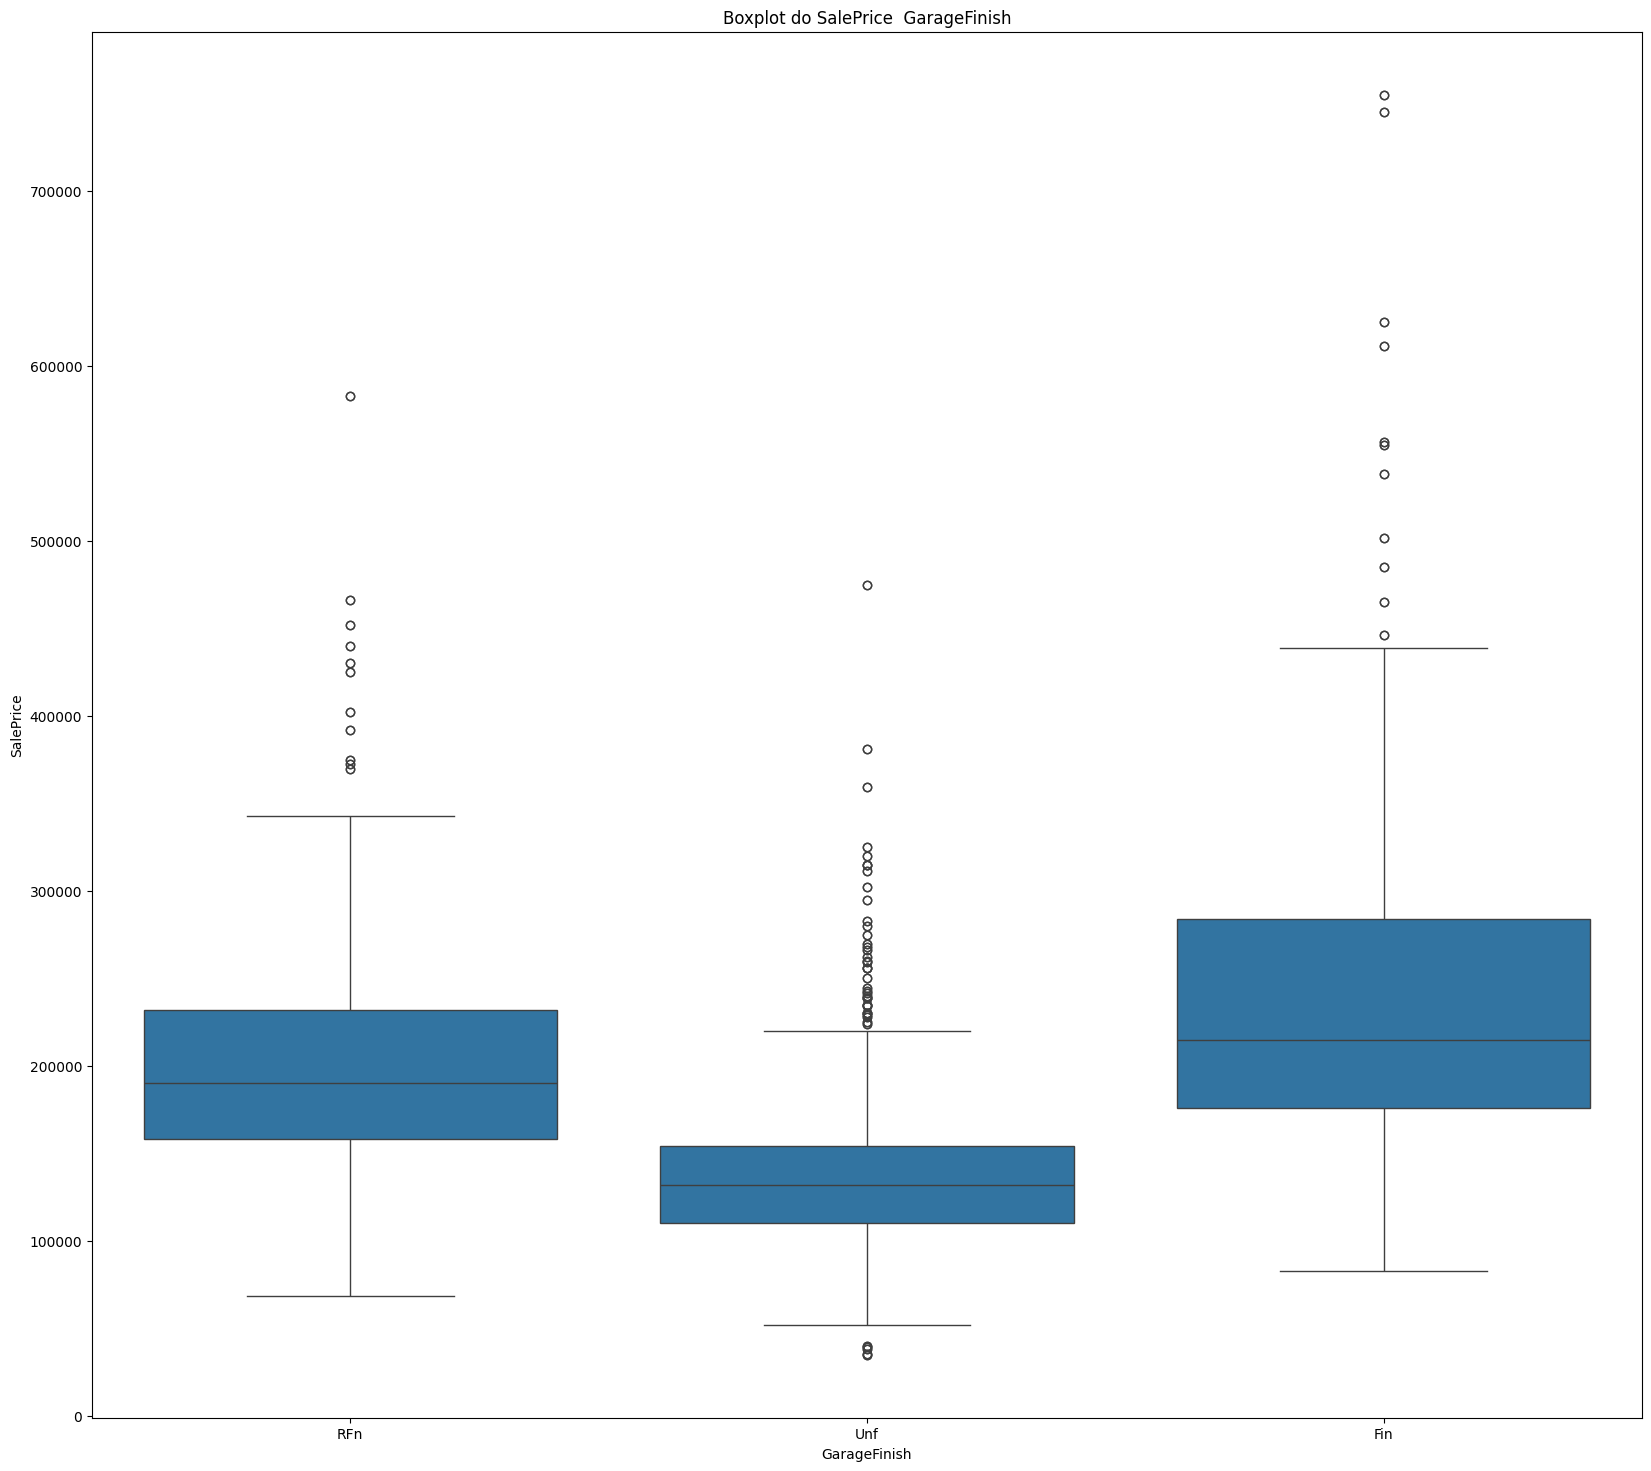

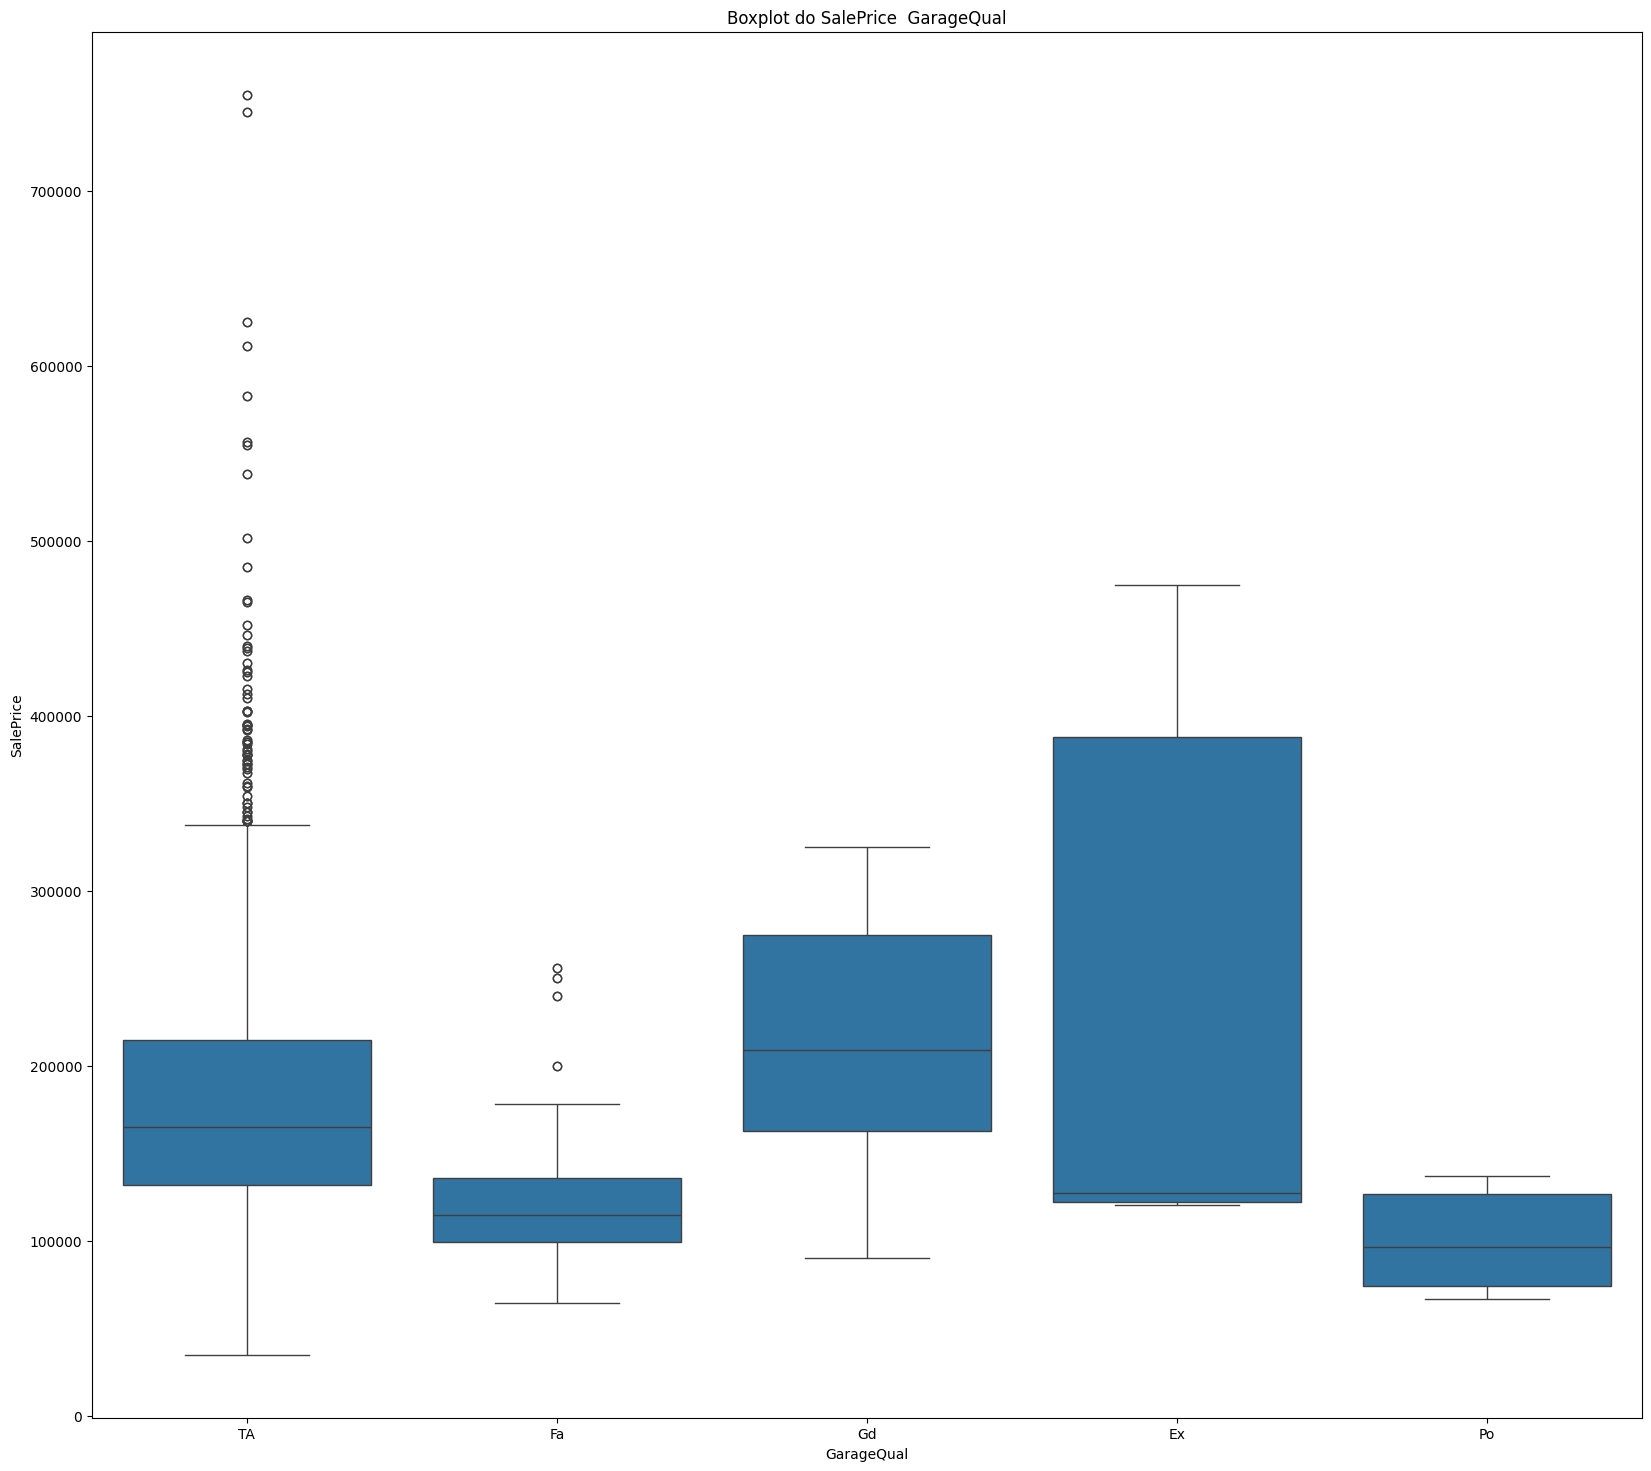

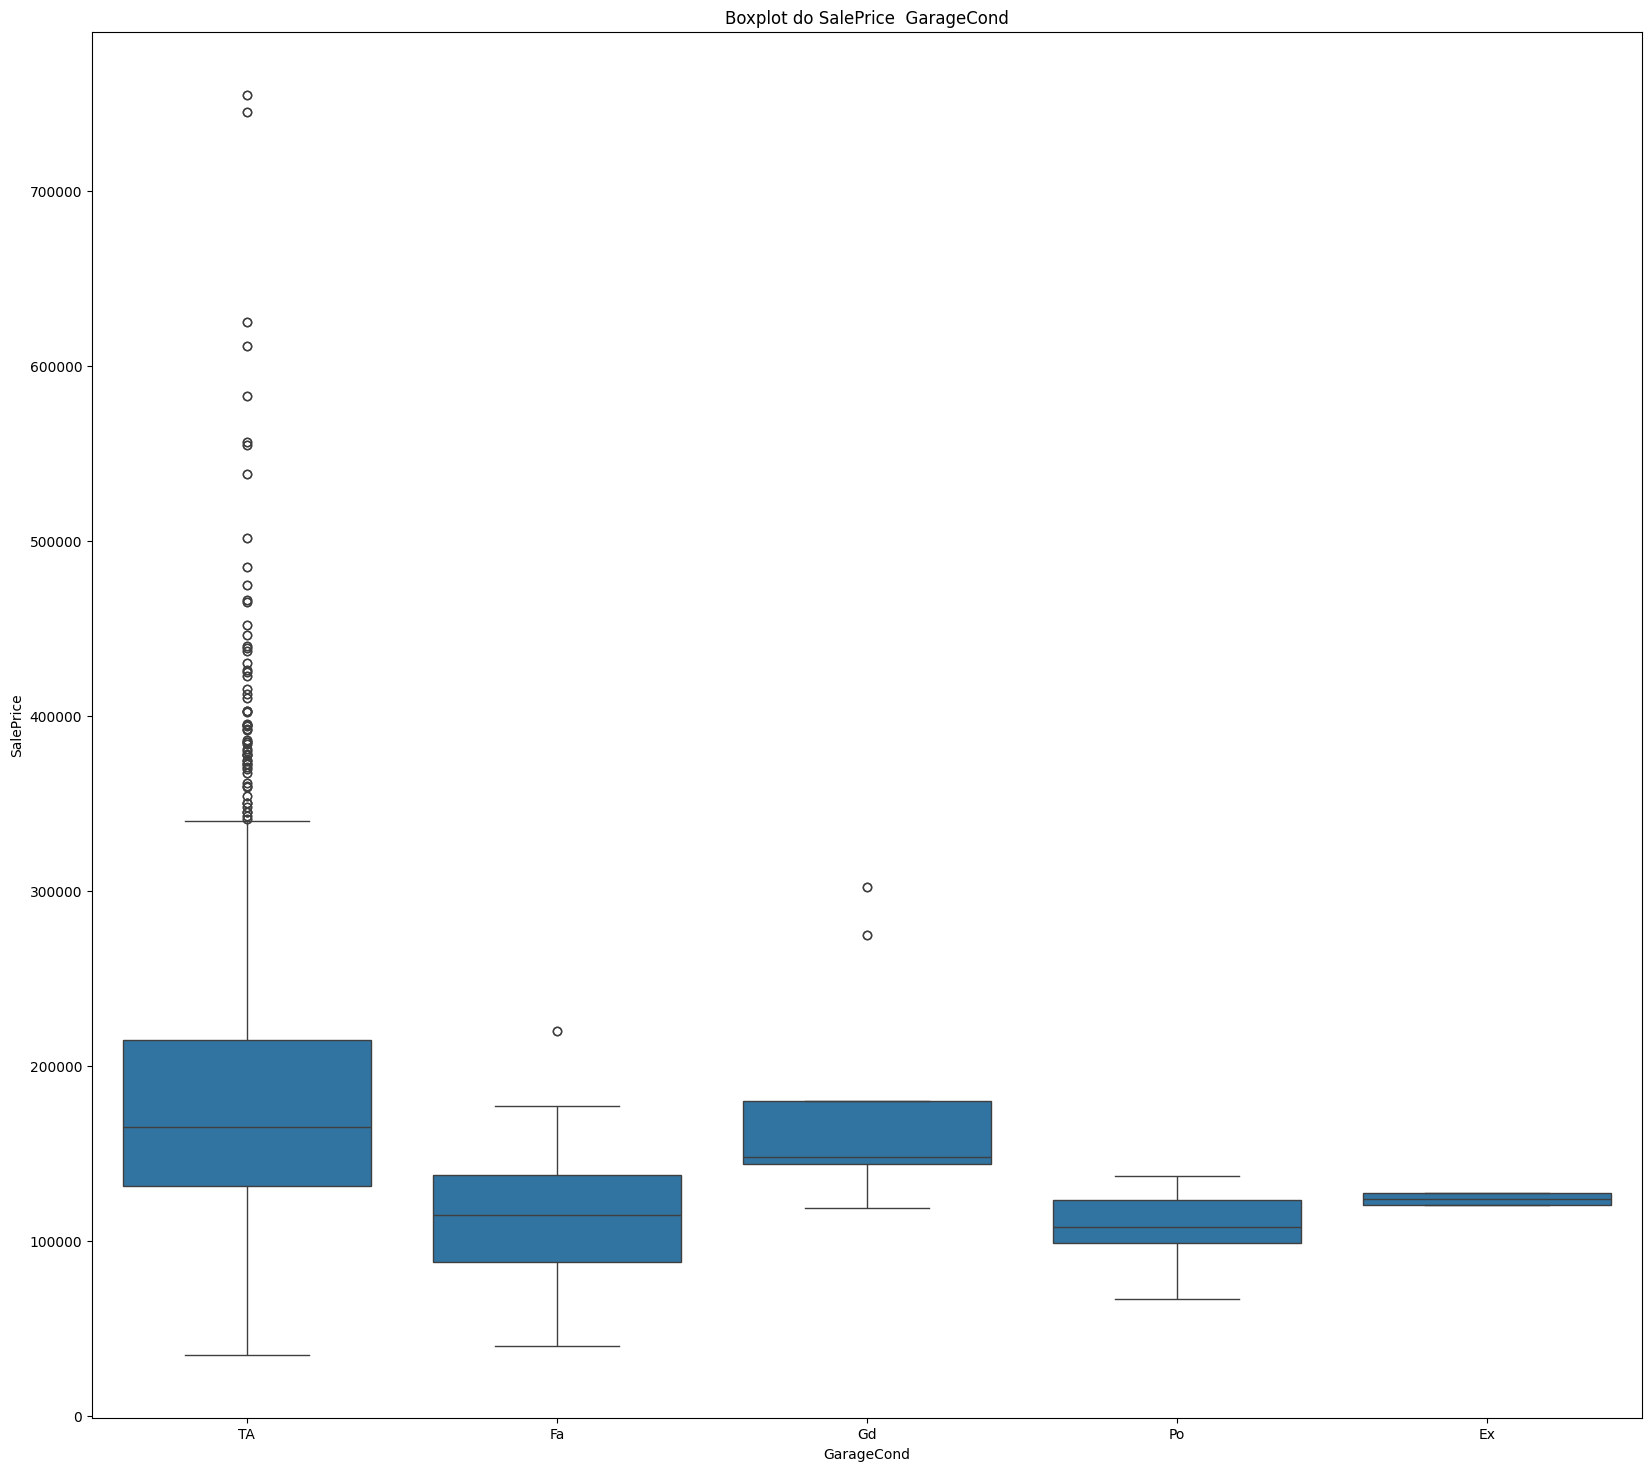

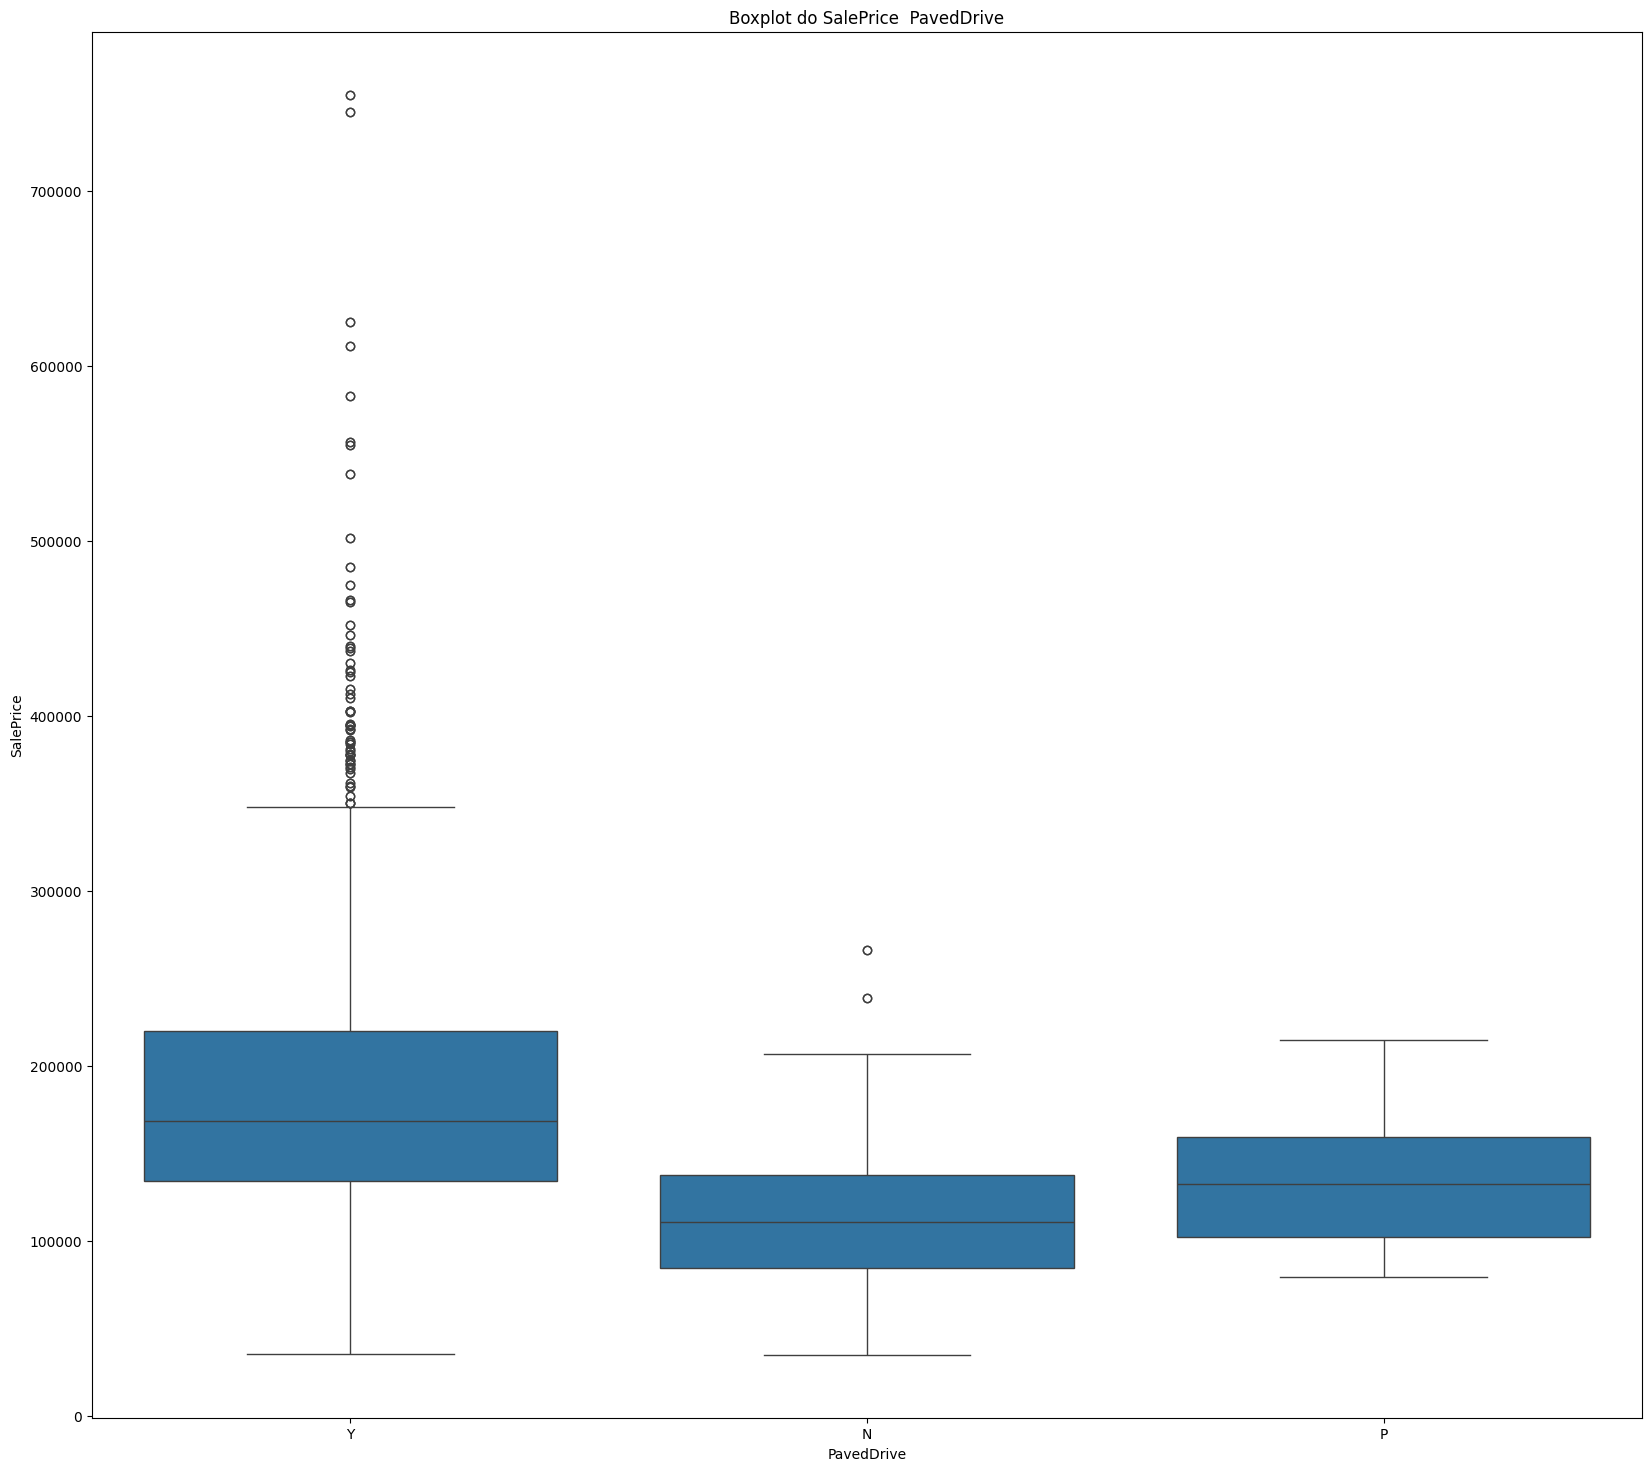

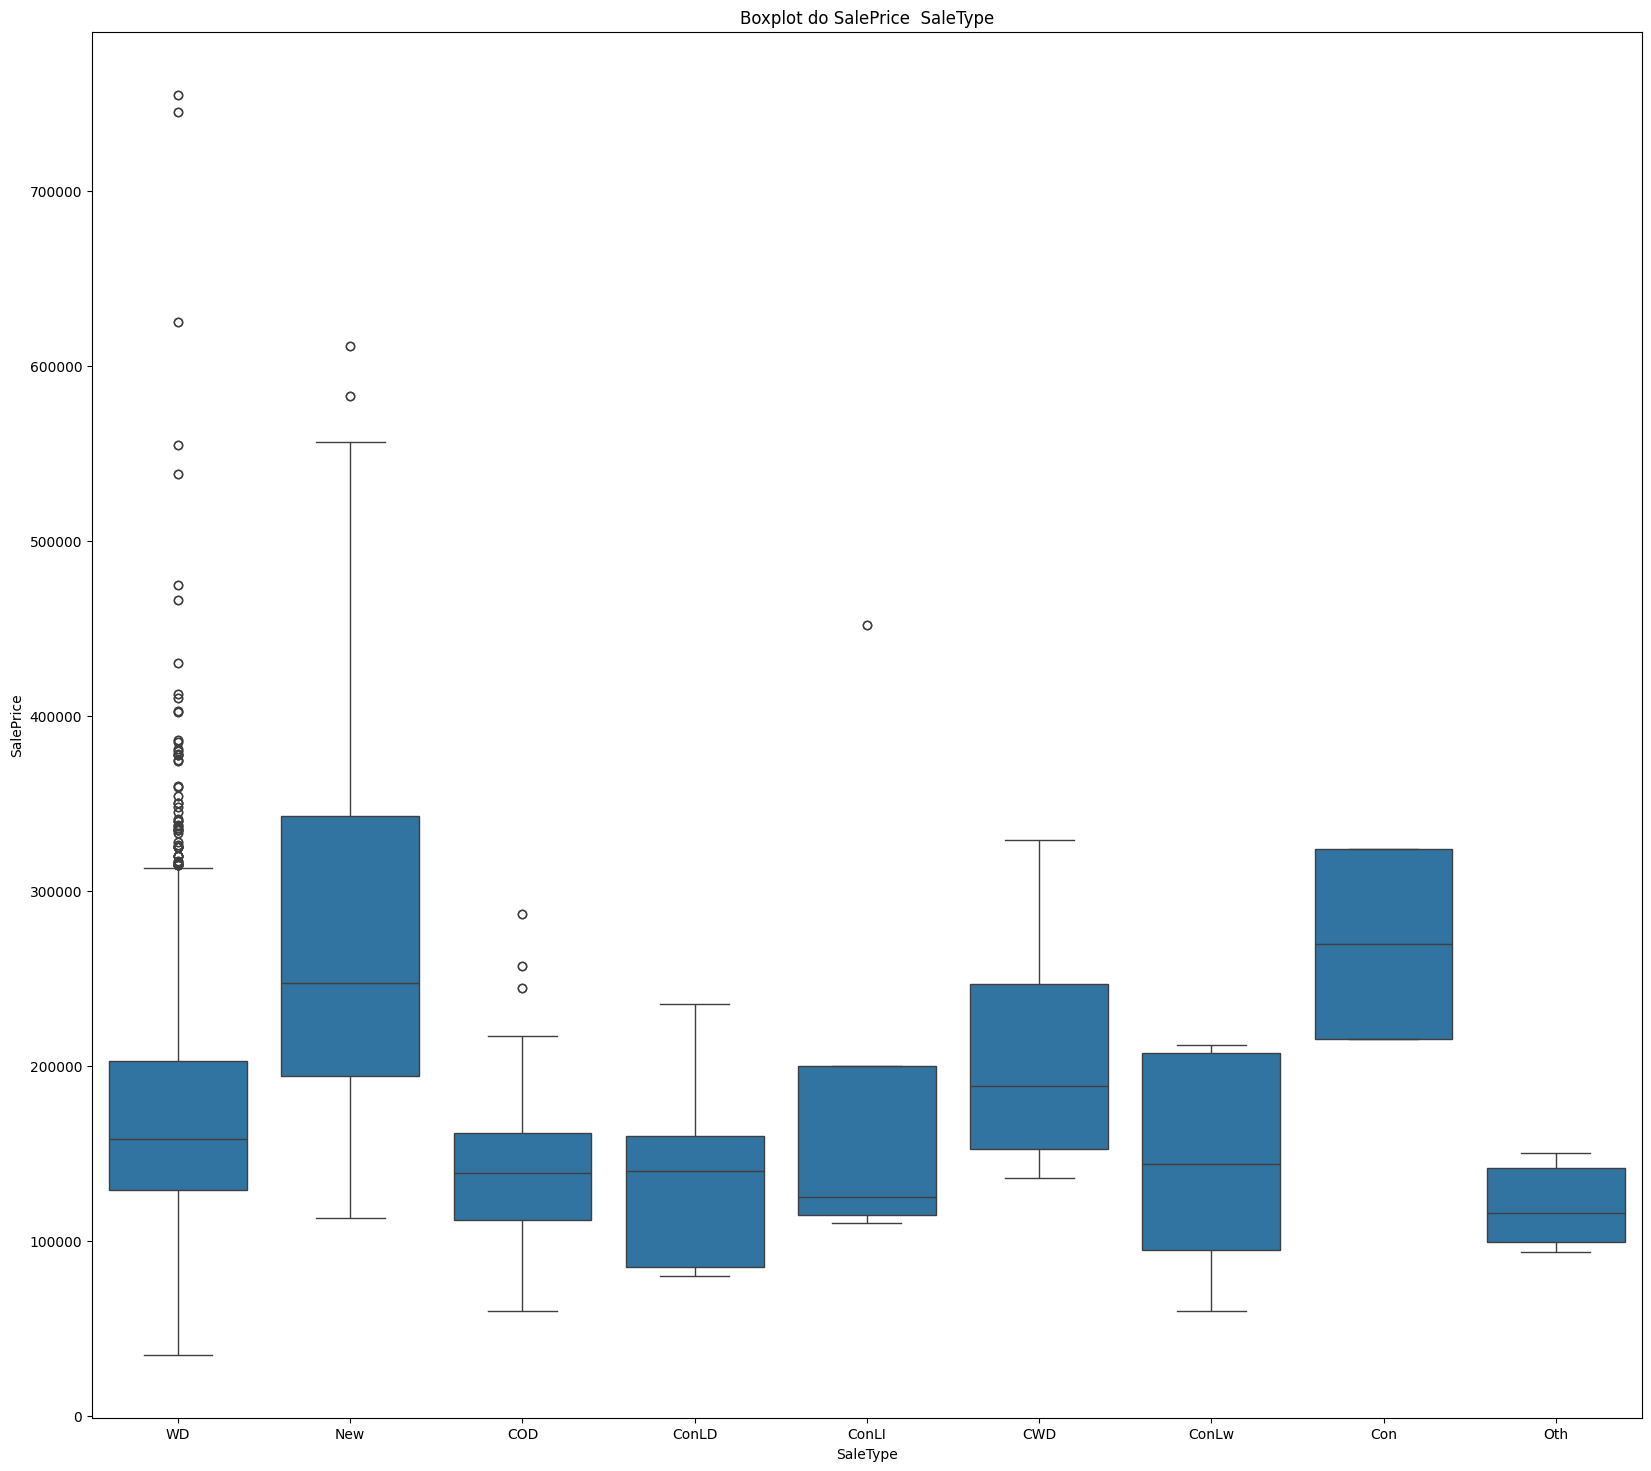

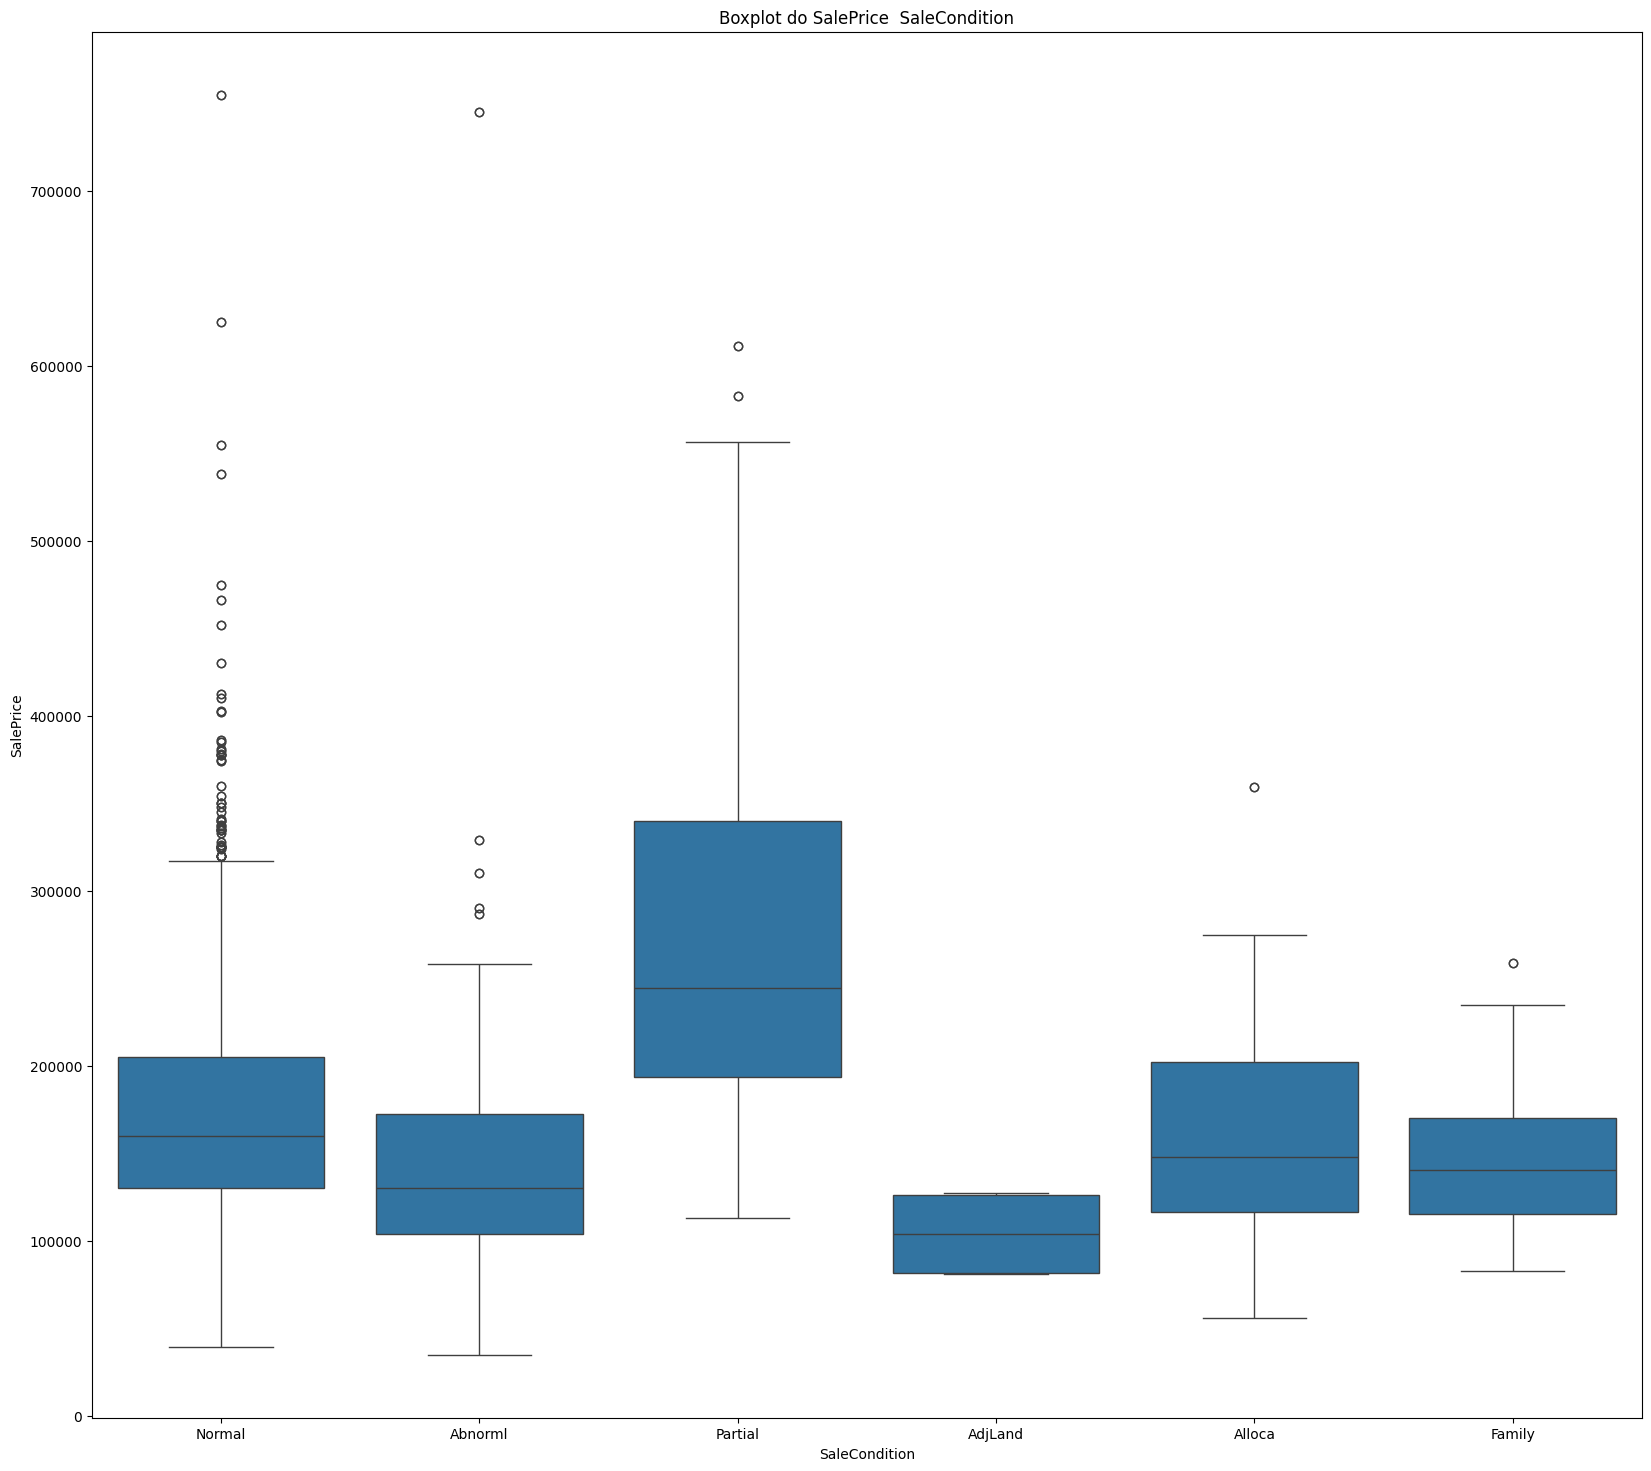

In [ ]:
object_colunas = df_copia.select_dtypes(include=['object']).columns

for coluna in object_colunas:
    box_plot(coluna)

## **Selecionando as colunas object**

In [ ]:
object_colunas

Index(['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
coluna_excluir = ['Utilities', 'LandSlope', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 
    'RoofStyle', 'Exterior1st', 'Exterior2nd', 
    'ExterQual', 'Foundation', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2', 'KitchenQual',
    'GarageFinish'
]

df_copia.drop(columns=coluna_excluir, inplace=True)

In [ ]:
object_colunas = df_copia.select_dtypes(include=['object']).columns
object_colunas

Index(['LotConfig', 'Neighborhood', 'RoofMatl', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
coluna_categorica = ['LotConfig', 'Neighborhood', 'RoofMatl', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'Heating', 'HeatingQC', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 
]

for variavel in coluna_categorica:
    ordenacao(variavel)
    print(f'Coluna: {variavel}')

Coluna: LotConfig
Coluna: Neighborhood
Coluna: RoofMatl
Coluna: ExterCond
Coluna: BsmtQual
Coluna: BsmtCond
Coluna: Heating
Coluna: HeatingQC
Coluna: Functional
Coluna: GarageType
Coluna: GarageQual
Coluna: GarageCond


In [ ]:
object_colunas_nominal = list(df_copia.select_dtypes(include=['object']).columns)

print(object_colunas_nominal)

['CentralAir', 'Electrical', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
coluna_nominal = ['CentralAir', 'Electrical', 'PavedDrive', 'SaleType', 'SaleCondition']

for objecto_nominal in coluna_nominal:
    ordenacao(objecto_nominal)

## **Correlação**

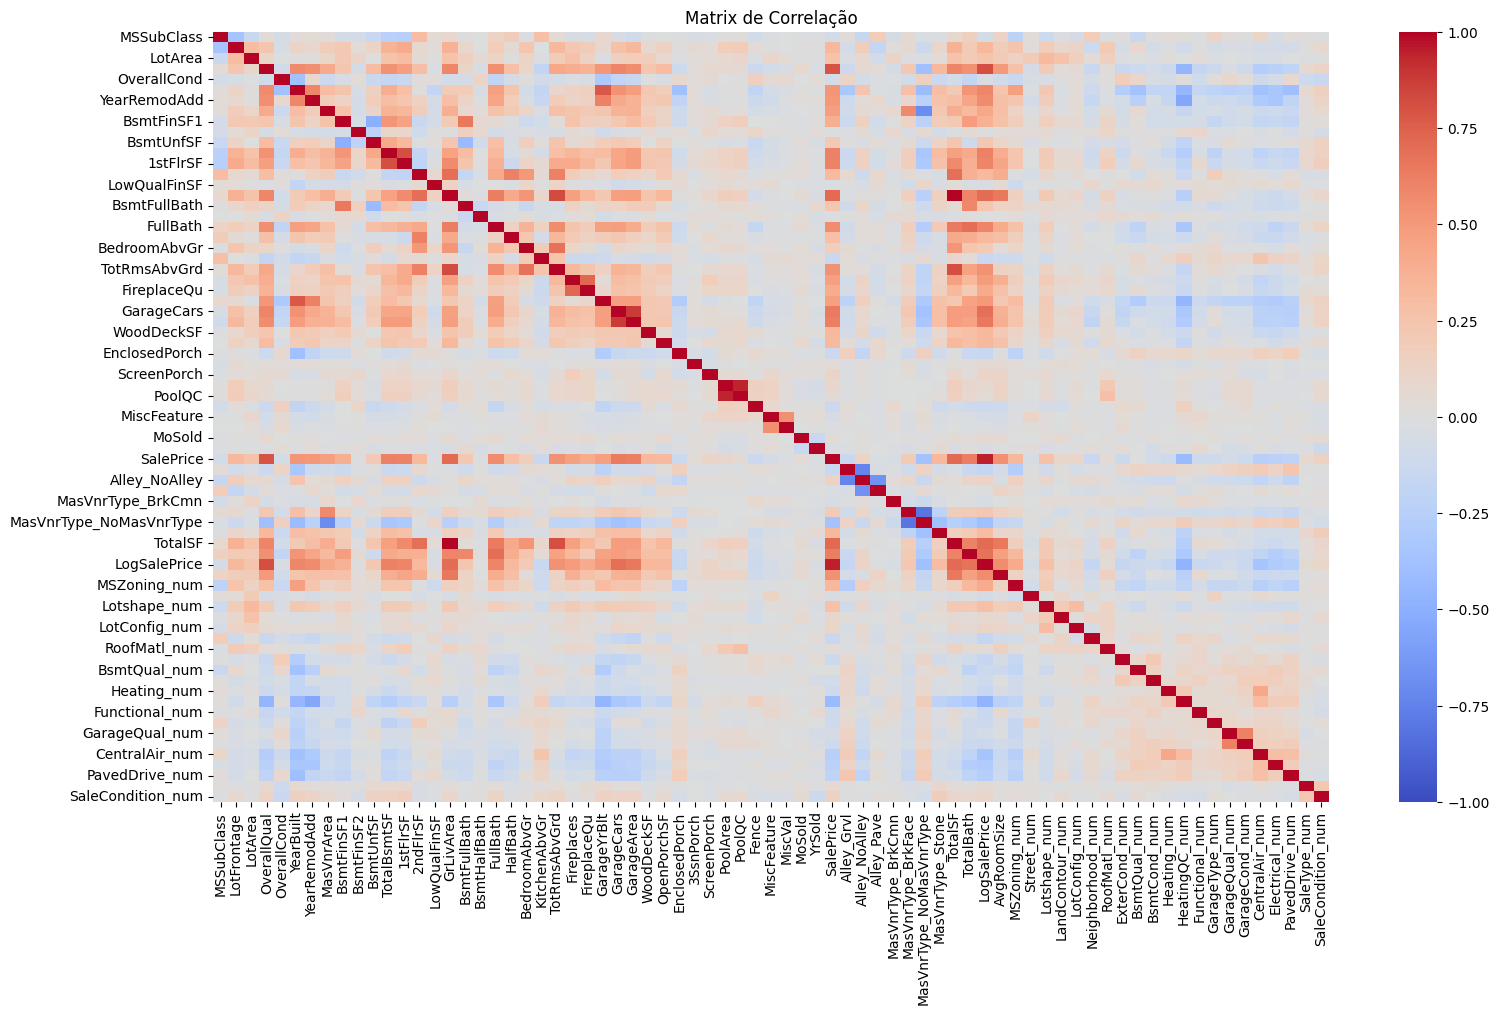

In [ ]:
correlation_matrix = df_copia.corr()

plt.figure(figsize=(18, 10))
sns.heatmap(
    correlation_matrix, 
    #annot=True, 
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1, 
    vmax=1
)
plt.title('Matrix de Correlação')
plt.show()

In [ ]:
# Separação das variaveis independentes(X) e dependente(y)
X = df_copia.drop(columns=['SalePrice'])
y = df_copia['SalePrice']

X = X.select_dtypes(include=['number'])

randomforest = RandomForestRegressor(n_jobs=-1, random_state=42)

boruta_select = BorutaPy(randomforest, n_estimators='auto', random_state=42)

boruta_select.fit(X.values, y.values)

important_features = X.columns[boruta_select.support_]
rejected_features = X.columns[~boruta_select.support_]

print(f'Variáveis importante: {list(important_features)}')
print(f'Variáveis rejeitadas: {list(rejected_features)}')

Variáveis importante: ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalSF', 'LogSalePrice', 'AvgRoomSize']
Variáveis rejeitadas: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'Alley_Grvl', 'Alley_NoAlley', 'Alley_Pave', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_NoMasVnrType', 'MasVnrType_Stone', 'TotalBath', 'MSZoning_num', 'Street_num', 'Lotshape_num', 'LandContour_num', 'LotConfig_num', 'Neighborhood_num', 'RoofMatl_num', 'ExterCond_num', 'BsmtQual_num', 'BsmtCond_num', 'Heating_num', 'HeatingQC_num', 'Functional_num'

In [ ]:
df_copia_boruta = df_copia[important_features.to_list() + ['SalePrice']]

## **Selecionando os conjuntos de dados**

In [ ]:
X_selected = X.loc[:, boruta_select.support_, ]

In [ ]:
X_train_Boruta, X_test_Boruta, y_train_Boruta, y_test_Boruta = train_test_split(
    X_selected, 
    y, 
    test_size=0.2,
    random_state=42
)

## **Rodando vários algoritmos de Machine Learning**

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'random forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_strate=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

resultados = {}

for name, model in models.items():
    model.fit(X_train_Boruta, y_train_Boruta)

    y_pred_Boruta = model.predict(X_test_Boruta)

    mse = mean_squared_error(y_test_Boruta, y_pred_Boruta)
    r2 = r2_score(y_test_Boruta, y_pred_Boruta)

    resultados[name] = {'MSE': mse, 'R²': r2}

for model_name, metrics in resultados.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R²']:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1528
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 6
[LightGBM] [Info] Start training from score 180260.572346
Linear Regression: MSE = 596569149.24, R² = 0.91
random forest: MSE = 1209564.00, R² = 1.00
Support Vector Machine: MSE = 6876007559.10, R² = -0.07
K-Nearest Neighbors: MSE = 2131764558.30, R² = 0.67
XGBoost: MSE = 525560.45, R² = 1.00
LightGBM: MSE = 53461449.79, R² = 0.99


### **Aplicando o Hiperparamentros**

In [ ]:
models_with_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Support Vector Machine': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

# Resultados para armazenar o melhor modelo e suas métricas
resultados = {}

# Loop pelos modelos e GridSearch
for name, model_info in models_with_params.items():
    print(f"\nAvaliando o modelo: {name}")
    
    model = model_info['model']
    param_grid = model_info['params']

    if param_grid:  # Só realiza o GridSearch se houver hiperparâmetros
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', verbose=1)
        grid_search.fit(X_train_Boruta, y_train_Boruta)
        
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Melhores parâmetros para {name}: {best_params}")
    else:
        # Para modelos sem hiperparâmetros a ajustar (ex: LinearRegression)
        best_model = model.fit(X_train_Boruta, y_train_Boruta)

    # Previsões e métricas no conjunto de teste
    y_pred_Boruta = best_model.predict(X_test_Boruta)
    mse = mean_squared_error(y_test_Boruta, y_pred_Boruta)
    r2 = r2_score(y_test_Boruta, y_pred_Boruta)

    resultados[name] = {
        'MSE': mse,
        'R²': r2,
        'Best Params': best_params if param_grid else "Default"
    }

# Exibir resultados
print("\nResumo dos Resultados:")
for model_name, metrics in resultados.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R²']:.2f}, Best Params = {metrics['Best Params']}")


Avaliando o modelo: Linear Regression

Avaliando o modelo: Random Forest
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Melhores parâmetros para Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Avaliando o modelo: Support Vector Machine
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhores parâmetros para Support Vector Machine: {'C': 10, 'kernel': 'linear'}

Avaliando o modelo: K-Nearest Neighbors
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhores parâmetros para K-Nearest Neighbors: {'n_neighbors': 7, 'weights': 'distance'}

Avaliando o modelo: XGBoost
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Melhores parâmetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

Avaliando o modelo: LightGBM
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can s